In [1]:
import pandas as pd
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("google_review_29_08_v3.csv")
df.head()

,SVAAS_ID,user_id,firstName,middleName,lastName,email,phone,description,pan,mci,...,numberFollowUp,followUpDuration,insuranceProviderId,isActive,ABDM_Healthcare_Professional_ID,SVAAS_DOCTOR_ID,svaasClinicId,tbl_user_phone_number,name,location
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[['firstName', 'middleName', 'lastName', 'name', 'baseCity']]
df.head()

,firstName,middleName,lastName,name,baseCity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

firstName       20
middleName    1532
lastName        18
name            19
baseCity        19
dtype: int64

In [5]:
df.describe()

,firstName,middleName,lastName,name,baseCity
count,1716,204,1718,1717,1717
unique,1228,68,1074,1583,15
top,Rahul,,K,SLG HOSPITALS,Hyderabad
freq,14,78,31,23,524


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   firstName   1716 non-null   object
 1   middleName  204 non-null    object
 2   lastName    1718 non-null   object
 3   name        1717 non-null   object
 4   baseCity    1717 non-null   object
dtypes: object(5)
memory usage: 67.9+ KB


### Let's calculate the % of missing values

In [7]:
(df.isna().sum())/len(df) * 100

firstName      1.152074
middleName    88.248848
lastName       1.036866
name           1.094470
baseCity       1.094470
dtype: float64

It's apparent that middleName columns has the most number of missing values here. 

<AxesSubplot:>

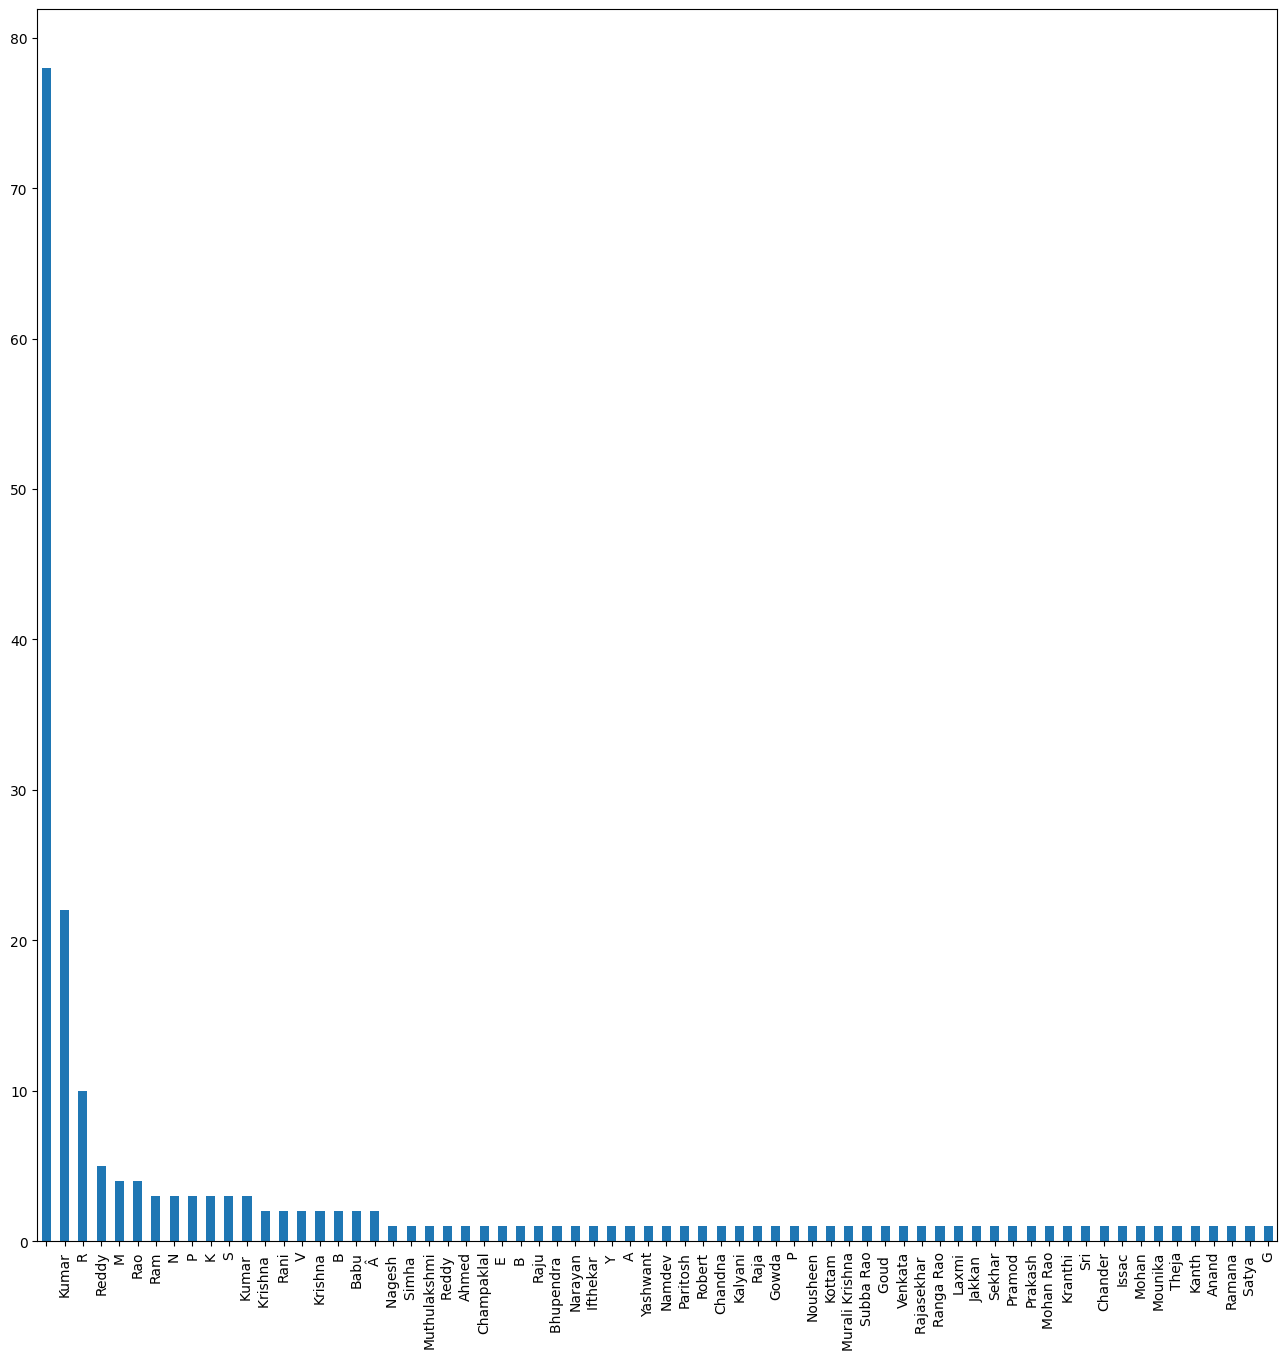

In [8]:
plt.figure(figsize=(16, 16))
df['middleName'].value_counts().plot.bar()

Kumar is the most common middle name we can observe here.

In [9]:
df[df['firstName'].isna() == False]

,firstName,middleName,lastName,name,baseCity
17,Divya,NaN,Kavuri,Apollo Clinic,Hyderabad
18,Shivam,NaN,P,Shivam hospitals,Hyderabad
19,Ranjan,NaN,Dey,Ranjan skin clinics,Hyderabad
20,Soumya,NaN,Sarkar,Soumya Multi speciality clinic,Hyderabad
21,Rishanku,NaN,Goyal,RKG Eye Center,Hyderabad
...,...,...,...,...,...
1731,Kushang,NaN,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad
1732,Dhaval,NaN,Akhani,Childhood Hospital,Ahmedabad
1733,Keval Patel,NaN,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad
1734,Jinal Patel,NaN,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad


### I think, it will be safe to drop the middleName column, and we can proceed with the firstName only here.

In [10]:
df.drop('middleName', axis=1, inplace=True)

## Let's seggregate the data based on missing vs non-missing row values

In [11]:
df_not_missing = df.dropna()

In [12]:
df_not_missing.head()

,firstName,lastName,name,baseCity
17,Divya,Kavuri,Apollo Clinic,Hyderabad
18,Shivam,P,Shivam hospitals,Hyderabad
19,Ranjan,Dey,Ranjan skin clinics,Hyderabad
20,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad
21,Rishanku,Goyal,RKG Eye Center,Hyderabad


In [13]:
df_not_missing.isna().sum()

firstName    0
lastName     0
name         0
baseCity     0
dtype: int64

In [14]:
df_not_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1715 entries, 17 to 1735
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstName  1715 non-null   object
 1   lastName   1715 non-null   object
 2   name       1715 non-null   object
 3   baseCity   1715 non-null   object
dtypes: object(4)
memory usage: 67.0+ KB


In [15]:
print(len(df_not_missing))

1715


In [16]:
len(df_not_missing)/len(df)

0.9879032258064516

In [17]:
df_not_missing['query'] = df_not_missing['firstName'].apply(lambda x:x.lower()) +"+" + df_not_missing['lastName'].apply(lambda x:x.lower()) \
                          +"+"+ df_not_missing['name'].apply(lambda x:x.lower()) + "+" + df_not_missing["baseCity"].apply(lambda x:x.lower())

/var/folders/z1/0tn2v83n6pzgl2m8lzz1phbc0000gn/T/ipykernel_86701/4047833984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_missing['query'] = df_not_missing['firstName'].apply(lambda x:x.lower()) +"+" + df_not_missing['lastName'].apply(lambda x:x.lower()) \


In [18]:
df_not_missing['query']

17                   divya+kavuri+apollo clinic+hyderabad
18                    shivam+p+shivam hospitals+hyderabad
19               ranjan+dey+ranjan skin clinics+hyderabad
20      soumya+sarkar+soumya multi speciality clinic+h...
21                rishanku+goyal+rkg eye center+hyderabad
                              ...                        
1731    kushang+mod+shivam children hospital and neona...
1732           dhaval+akhani+childhood hospital+ahmedabad
1733    keval patel+patel+jk dental hospital orthodont...
1734    jinal patel+patel+jk dental hospital orthodont...
1735                   lavanya+yasam+sai clinic+hyderabad
Name: query, Length: 1715, dtype: object

## For missing data

In [19]:
import preprocess_kgptalkie as ps
import re

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x




In [20]:
df_not_missing['query'] = df_not_missing['query'].apply(lambda x:ps.remove_accented_chars(x))
df_not_missing['query'].head()

/var/folders/z1/0tn2v83n6pzgl2m8lzz1phbc0000gn/T/ipykernel_86701/153722280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_missing['query'] = df_not_missing['query'].apply(lambda x:ps.remove_accented_chars(x))


17                 divya+kavuri+apollo clinic+hyderabad
18                  shivam+p+shivam hospitals+hyderabad
19             ranjan+dey+ranjan skin clinics+hyderabad
20    soumya+sarkar+soumya multi speciality clinic+h...
21              rishanku+goyal+rkg eye center+hyderabad
Name: query, dtype: object

In [21]:
len(df_not_missing['query'].values)

1715

In [22]:
from collections import defaultdict

final_df = defaultdict(list)

In [23]:
df_not_missing = df_not_missing[['firstName', 'lastName', 'name', 'baseCity','query']]

In [24]:
# df_ch = df_not_missing[df_not_missing['baseCity'] == 'Chennai']
# df_ch.isna().sum()

In [25]:
def isDigit(char):
    pattern = "^[-+]?[0-9]*\.?[0-9]+(e[-+]?[0-9]+)?$"
    reg = re.compile(pattern)
    if reg.match(char):
        return True
    return False

In [26]:
from bs4 import BeautifulSoup
import urllib.request
import numpy as np


queries = df_not_missing['query'].values

for i in tqdm(range(len(queries))):
    query = queries[i]
    query = "+".join(query.split(" "))
    url = 'https://google.com/search?q='+query
    print(url)
    
    request = urllib.request.Request(url)
    request.add_header('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')
    raw_response = urllib.request.urlopen(request).read()
    
    # Read the repsonse as a utf-8 string
    html = raw_response.decode("utf-8")
    
    soup = BeautifulSoup(html, 'html.parser')

    divs = soup.find_all("span", class_="Aq14fc")
    spans = soup.find_all("span", class_="hqzQac")

    if len(divs) > 0:
        for div, span in zip(divs, spans):
            # Search for a h3 tag
            rating = div.get_text()
            greviews = span.get_text()
            print(greviews)
            greviews = [ps.remove_special_chars(i) for i in greviews.split(" ")]
            greviews = [i for i in greviews if isDigit(i)][0]
            print("Rating: ", rating, "Number of Reviews: ", greviews)
            final_df['firstName'].append(df_not_missing.iloc[i]['firstName'])
            final_df['lastName'].append(df_not_missing.iloc[i]['lastName'])
            final_df['clinicName'].append(df_not_missing.iloc[i]['name'])
            final_df['baseCity'].append(df_not_missing.iloc[i]['baseCity'])
            print(df_not_missing.iloc[i]['baseCity'])
            final_df['GoogleNRs'].append(float(greviews))
            if rating is None:
                print("Appending None!")
                final_df['rating'].append("NA")
            else:
                final_df['rating'].append(rating)
            print(div.get_text())

  0%|                                                  | 0/1715 [00:00<?, ?it/s]

https://google.com/search?q=divya+kavuri+apollo+clinic+hyderabad


  0%|                                        | 1/1715 [00:04<2:00:52,  4.23s/it]

https://google.com/search?q=shivam+p+shivam+hospitals+hyderabad


  0%|                                        | 2/1715 [00:06<1:29:32,  3.14s/it]

https://google.com/search?q=ranjan+dey+ranjan+skin+clinics+hyderabad


  0%|                                        | 3/1715 [00:09<1:27:32,  3.07s/it]

176 Google reviews
Rating:  3.9 Number of Reviews:  176
Hyderabad
3.9
https://google.com/search?q=soumya+sarkar+soumya+multi+speciality+clinic+hyderabad


  0%|                                        | 4/1715 [00:12<1:21:58,  2.87s/it]

195 Google reviews
Rating:  3.9 Number of Reviews:  195
Hyderabad
3.9
https://google.com/search?q=rishanku+goyal+rkg+eye+center+hyderabad


  0%|                                        | 5/1715 [00:14<1:19:20,  2.78s/it]

174 Google reviews
Rating:  4.2 Number of Reviews:  174
Hyderabad
4.2
https://google.com/search?q=mamatha+r+mamatha+clinics+hyderabad


  0%|▏                                       | 6/1715 [00:17<1:18:16,  2.75s/it]

https://google.com/search?q=ravi+pallapolu+sai+keerthi+children+and+dental+clinic+hyderabad


  0%|▏                                       | 7/1715 [00:21<1:33:10,  3.27s/it]

105 Google reviews
Rating:  3.9 Number of Reviews:  105
Hyderabad
3.9
https://google.com/search?q=b++ramesh+aditya+medical+complex+visakhapatnam


  0%|▏                                       | 8/1715 [00:23<1:21:28,  2.86s/it]

https://google.com/search?q=v+v++satya+sekhar+mamata+hospital+visakhapatnam


  1%|▏                                       | 9/1715 [00:26<1:16:19,  2.68s/it]

23 Google reviews
Rating:  3.1 Number of Reviews:  23
Visakhapatnam
3.1
https://google.com/search?q=v+ravi+chandra+sg+ortho+care+visakhapatnam


  1%|▏                                      | 10/1715 [00:28<1:15:10,  2.65s/it]

77 Google reviews
Rating:  5.0 Number of Reviews:  77
Visakhapatnam
5.0
https://google.com/search?q=l+s++appala+naidu+visakha+multispeciality+clinics+visakhapatnam


  1%|▎                                      | 11/1715 [00:31<1:14:29,  2.62s/it]

80 Google reviews
Rating:  4.8 Number of Reviews:  80
Visakhapatnam
4.8
https://google.com/search?q=v++chandra+sekharam+chandra+sekharam+clinic+visakhapatnam


  1%|▎                                      | 12/1715 [00:33<1:13:18,  2.58s/it]

3 Google reviews
Rating:  3.7 Number of Reviews:  3
Visakhapatnam
3.7
https://google.com/search?q=sreeniavsa+rao+reddy+sri+srinivasa+gastro+&+liver+centre+visakhapatnam


  1%|▎                                      | 13/1715 [00:36<1:13:40,  2.60s/it]

https://google.com/search?q=j+k++vijay+kumar+urocare+visakhapatnam


  1%|▎                                      | 14/1715 [00:38<1:13:07,  2.58s/it]

11 Google reviews
Rating:  4.4 Number of Reviews:  11
Visakhapatnam
4.4
https://google.com/search?q=chodisetti++subbarao+samudra+hospital+visakhapatnam


  1%|▎                                      | 15/1715 [00:43<1:30:57,  3.21s/it]

17 Google reviews
Rating:  3.0 Number of Reviews:  17
Visakhapatnam
3.0
https://google.com/search?q=b+s++kalyani+dr.+b.+s+kalyani+bharathi+hospital+visakhapatnam


  1%|▎                                      | 16/1715 [00:45<1:24:04,  2.97s/it]

56 Google reviews
Rating:  3.2 Number of Reviews:  56
Visakhapatnam
3.2
https://google.com/search?q=k++v+nageswar+rao+kotagiri+clinic+visakhapatnam


  1%|▍                                      | 17/1715 [00:49<1:31:36,  3.24s/it]

https://google.com/search?q=mohammed+akbar+gastro+&+liver+clinic+visakhapatnam


  1%|▍                                      | 18/1715 [00:52<1:22:56,  2.93s/it]

14 Google reviews
Rating:  4.1 Number of Reviews:  14
Visakhapatnam
4.1
https://google.com/search?q=sravani++sandhya+aura+skin+&+hair+clinic+visakhapatnam


  1%|▍                                      | 19/1715 [00:54<1:21:26,  2.88s/it]

21 Google reviews
Rating:  4.3 Number of Reviews:  21
Visakhapatnam
4.3
https://google.com/search?q=komanapalli+sowjanya++padmaja+hospital+visakhapatnam


  1%|▍                                      | 20/1715 [00:59<1:33:16,  3.30s/it]

129 Google reviews
Rating:  3.0 Number of Reviews:  129
Visakhapatnam
3.0
https://google.com/search?q=a+meenakshi+sai+clinic+visakhapatnam


  1%|▍                                      | 21/1715 [01:03<1:41:11,  3.58s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Visakhapatnam
5.0
https://google.com/search?q=krishnam+penmatsa+onelife+clinic+visakhapatnam


  1%|▌                                      | 22/1715 [01:07<1:46:35,  3.78s/it]

11 Google reviews
Rating:  5.0 Number of Reviews:  11
Visakhapatnam
5.0
https://google.com/search?q=j+n++srinivasulu+sri+chaitra+kidney+clinic+visakhapatnam


  1%|▌                                      | 23/1715 [01:11<1:50:12,  3.91s/it]

9 Google reviews
Rating:  5.0 Number of Reviews:  9
Visakhapatnam
5.0
https://google.com/search?q=monitha+narendrula+eeshritha+skin+&+hair+institute++hyderabad


  1%|▌                                      | 24/1715 [01:14<1:39:13,  3.52s/it]

100 Google reviews
Rating:  3.5 Number of Reviews:  100
Hyderabad
3.5
https://google.com/search?q=mona+deva+apollo+sugar+clinic+hyderabad


  1%|▌                                      | 25/1715 [01:16<1:30:14,  3.20s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=shehzad+ruman+dr.shehzad+endocrine+&+diabetes+clinic+hyderabad


  2%|▌                                      | 26/1715 [01:19<1:26:54,  3.09s/it]

https://google.com/search?q=mushtaq+quadri+first+health+diagnostics+and+clinics+hyderabad


  2%|▌                                      | 27/1715 [01:22<1:23:12,  2.96s/it]

54 Google reviews
Rating:  3.2 Number of Reviews:  54
Hyderabad
3.2
https://google.com/search?q=fiazullah+khan+integro+hospital+hyderabad


  2%|▋                                      | 28/1715 [01:26<1:33:02,  3.31s/it]

77 Google reviews
Rating:  4.8 Number of Reviews:  77
Hyderabad
4.8
https://google.com/search?q=mohammed+asif+sameer+cardiac+care+hyderabad


  2%|▋                                      | 29/1715 [01:29<1:34:38,  3.37s/it]

https://google.com/search?q=kollipara++haritha+radha's+derma+care+visakhapatnam


  2%|▋                                      | 30/1715 [01:34<1:43:09,  3.67s/it]

33 Google reviews
Rating:  4.5 Number of Reviews:  33
Visakhapatnam
4.5
https://google.com/search?q=shilpa+bharatgiri+raghava+polyclinic+hyderabad


  2%|▋                                      | 31/1715 [01:36<1:32:40,  3.30s/it]

3 Google reviews
Rating:  4.7 Number of Reviews:  3
Hyderabad
4.7
https://google.com/search?q=sujitkumar+vakatir+orthopaedic+&+sports+injury+clinic+hyderabad


  2%|▋                                      | 32/1715 [01:39<1:23:46,  2.99s/it]

https://google.com/search?q=divyaswetha+narasapuram+sai+medha+speciality+clinics+hyderabad


  2%|▊                                      | 33/1715 [01:41<1:20:40,  2.88s/it]

81 Google reviews
Rating:  4.8 Number of Reviews:  81
Hyderabad
4.8
https://google.com/search?q=alekya+singapore+the+skin+sense+hyderabad


  2%|▊                                      | 34/1715 [01:45<1:27:51,  3.14s/it]

241 Google reviews
Rating:  4.9 Number of Reviews:  241
Hyderabad
4.9
https://google.com/search?q=suneetha++reddy+e+birthcare+hospital+hyderabad


  2%|▊                                      | 35/1715 [01:48<1:27:01,  3.11s/it]

154 Google reviews
Rating:  5.0 Number of Reviews:  154
Hyderabad
5.0
https://google.com/search?q=naveen+kumar+magna+code+clinic+hyderabad


  2%|▊                                      | 36/1715 [01:50<1:21:46,  2.92s/it]

100 Google reviews
Rating:  4.8 Number of Reviews:  100
Hyderabad
4.8
https://google.com/search?q=hariram+vuppaladadhiam+hari's+heart+clinic.+dr+v+hariram+hyderabad


  2%|▊                                      | 37/1715 [01:53<1:18:40,  2.81s/it]

22 Google reviews
Rating:  4.8 Number of Reviews:  22
Hyderabad
4.8
https://google.com/search?q=ramesh+raju+sneha+clinic+hyderabad


  2%|▊                                      | 38/1715 [01:56<1:17:32,  2.77s/it]

96 Google reviews
Rating:  3.7 Number of Reviews:  96
Hyderabad
3.7
https://google.com/search?q=venkata++arella+sri+sai+kalpana+clinic+hyderabad


  2%|▉                                      | 39/1715 [01:58<1:13:34,  2.63s/it]

11 Google reviews
Rating:  4.6 Number of Reviews:  11
Hyderabad
4.6
https://google.com/search?q=madhavi+aurangabadkar+skin+&+laser+clinic+hyderabad


  2%|▉                                      | 40/1715 [02:01<1:13:26,  2.63s/it]

159 Google reviews
Rating:  3.0 Number of Reviews:  159
Hyderabad
3.0
https://google.com/search?q=raghunath+babu+diabaid+diabetes+center+hyderabad


  2%|▉                                      | 41/1715 [02:03<1:10:32,  2.53s/it]

https://google.com/search?q=saketh+k+gk+polyclinic+hyderabad


  2%|▉                                      | 42/1715 [02:05<1:07:59,  2.44s/it]

https://google.com/search?q=samata+tulla+medihub+clinics+hyderabad


  3%|▉                                      | 43/1715 [02:07<1:04:28,  2.31s/it]

https://google.com/search?q=janaki+ram+reddy+sree+srinivasa+ent+center+hyderabad


  3%|█                                      | 44/1715 [02:10<1:06:34,  2.39s/it]

20 Google reviews
Rating:  4.6 Number of Reviews:  20
Hyderabad
4.6
https://google.com/search?q=manogna++vellala+mano's+skin+&+hair+clinic+hyderabad


  3%|█                                      | 45/1715 [02:11<1:01:09,  2.20s/it]

https://google.com/search?q=amishrita++chintawar++manasa+hospital+hyderabad


  3%|█                                      | 46/1715 [02:14<1:04:33,  2.32s/it]

253 Google reviews
Rating:  4.9 Number of Reviews:  253
Hyderabad
4.9
https://google.com/search?q=neelima+potluri+v+viva+skin+clinic+hyderabad


  3%|█                                      | 47/1715 [02:17<1:07:15,  2.42s/it]

51 Google reviews
Rating:  4.6 Number of Reviews:  51
Hyderabad
4.6
https://google.com/search?q=swapna++priya+cosmosure+clinic+hyderabad


  3%|█                                      | 48/1715 [02:20<1:15:55,  2.73s/it]

154 Google reviews
Rating:  4.8 Number of Reviews:  154
Hyderabad
4.8
https://google.com/search?q=babitha+++++++++maturi+parijatham+women+wellness+clinics+hyderabad


  3%|█                                      | 49/1715 [02:22<1:10:56,  2.56s/it]

https://google.com/search?q=sudha+shroff+dermdent+skin&dental+clinic+hyderabad


  3%|█▏                                     | 50/1715 [02:25<1:07:47,  2.44s/it]

https://google.com/search?q=suryaprakash+hedda+hedda+clinic+hyderabad


  3%|█▏                                     | 51/1715 [02:27<1:07:36,  2.44s/it]

33 Google reviews
Rating:  4.9 Number of Reviews:  33
Hyderabad
4.9
https://google.com/search?q=srikant+jawalkar+the+shoulder+centre+hyderabad


  3%|█▏                                     | 52/1715 [02:29<1:08:35,  2.47s/it]

31 Google reviews
Rating:  4.4 Number of Reviews:  31
Hyderabad
4.4
https://google.com/search?q=suraj+uppalapati+gastro+360+clinics+hyderabad


  3%|█▏                                     | 53/1715 [02:32<1:08:49,  2.48s/it]

144 Google reviews
Rating:  4.6 Number of Reviews:  144
Hyderabad
4.6
https://google.com/search?q=sivani+payneni+vito+specialty+clinic+hyderabad


  3%|█▏                                     | 54/1715 [02:35<1:11:47,  2.59s/it]

35 Google reviews
Rating:  5.0 Number of Reviews:  35
Hyderabad
5.0
https://google.com/search?q=saikiran+thipparthi+vito+specialty+clinics+hyderabad


  3%|█▎                                     | 55/1715 [02:37<1:09:20,  2.51s/it]

https://google.com/search?q=venkateswara++abburu+siri+children's+clinic+hyderabad


  3%|█▎                                     | 56/1715 [02:39<1:05:13,  2.36s/it]

https://google.com/search?q=gokul+mandala+drgokulreddy+hyderabad


  3%|█▎                                     | 57/1715 [02:41<1:04:43,  2.34s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Hyderabad
5.0
https://google.com/search?q=naresh+kanukunta++shreshta+sugar,thyroid+and+general+clinic++hyderabad


  3%|█▎                                     | 58/1715 [02:44<1:04:14,  2.33s/it]

9 Google reviews
Rating:  4.2 Number of Reviews:  9
Hyderabad
4.2
https://google.com/search?q=mukesh+khetan+khetan+children's+clinic+hyderabad


  3%|█▎                                     | 59/1715 [02:46<1:06:45,  2.42s/it]

117 Google reviews
Rating:  4.5 Number of Reviews:  117
Hyderabad
4.5
https://google.com/search?q=nitin+rai+vohra+vohra+e.n.t+care+centre+hyderabad


  3%|█▎                                     | 60/1715 [02:49<1:07:55,  2.46s/it]

79 Google reviews
Rating:  4.1 Number of Reviews:  79
Hyderabad
4.1
https://google.com/search?q=chandrasekhar+reddy+lavie+clinic+hyderabad


  4%|█▍                                     | 61/1715 [02:51<1:07:19,  2.44s/it]

10 Google reviews
Rating:  4.4 Number of Reviews:  10
Hyderabad
4.4
https://google.com/search?q=rafi+md+kids+care+the+childrens+hospital+hyderabad


  4%|█▍                                     | 62/1715 [02:55<1:19:23,  2.88s/it]

https://google.com/search?q=satish++reddy+sai+sohan+childrens+clinic+hyderabad


  4%|█▍                                     | 63/1715 [02:58<1:15:57,  2.76s/it]

17 Google reviews
Rating:  5.0 Number of Reviews:  17
Hyderabad
5.0
https://google.com/search?q=uday+goutam+goutam+neuro+care+hyderabad


  4%|█▍                                     | 64/1715 [03:00<1:15:45,  2.75s/it]

135 Google reviews
Rating:  4.4 Number of Reviews:  135
Hyderabad
4.4
https://google.com/search?q=mohammed+anfas+shine+specialty+clinics+hyderabad


  4%|█▍                                     | 65/1715 [03:04<1:18:56,  2.87s/it]

22 Google reviews
Rating:  4.6 Number of Reviews:  22
Hyderabad
4.6
https://google.com/search?q=navaneeth+raj+dr+romanas+hyderabad


  4%|█▌                                     | 66/1715 [03:06<1:17:32,  2.82s/it]

30 Google reviews
Rating:  4.6 Number of Reviews:  30
Hyderabad
4.6
https://google.com/search?q=raghuveer+reddy+sai+institute+of+sports+injury+&+arthroscopy+hyderabad


  4%|█▌                                     | 67/1715 [03:09<1:15:51,  2.76s/it]

239 Google reviews
Rating:  4.3 Number of Reviews:  239
Hyderabad
4.3
https://google.com/search?q=deepti+bandaru+pranada+childrens+clinic+hyderabad


  4%|█▌                                     | 68/1715 [03:11<1:09:58,  2.55s/it]

https://google.com/search?q=satish+andani+andani+hospital+for+women+&+children+hyderabad


  4%|█▌                                     | 69/1715 [03:14<1:10:52,  2.58s/it]

148 Google reviews
Rating:  4.4 Number of Reviews:  148
Hyderabad
4.4
https://google.com/search?q=lakkireddi+prabhat+regenio+lakki+scope+orthopaedics+hyderabad


  4%|█▌                                     | 70/1715 [03:15<1:03:11,  2.31s/it]

https://google.com/search?q=alluri+neeraja+goutam+neuro+care+hyderabad


  4%|█▋                                       | 71/1715 [03:17<57:05,  2.08s/it]

135 Google reviews
Rating:  4.4 Number of Reviews:  135
Hyderabad
4.4
https://google.com/search?q=swetha+v+v+swethas+skin+&+cosmetology+clinic+hyderabad


  4%|█▋                                     | 72/1715 [03:19<1:00:49,  2.22s/it]

8 Google reviews
Rating:  4.8 Number of Reviews:  8
Hyderabad
4.8
https://google.com/search?q=praneeth+moka+olive+diagnostics+hyderabad


  4%|█▋                                       | 73/1715 [03:21<58:52,  2.15s/it]

119 Google reviews
Rating:  4.6 Number of Reviews:  119
Hyderabad
4.6
https://google.com/search?q=manohar++n+n+m+reddy+skin+and+hair+clinic+hyderabad


  4%|█▊                                       | 74/1715 [03:23<57:53,  2.12s/it]

23 Google reviews
Rating:  4.4 Number of Reviews:  23
Hyderabad
4.4
https://google.com/search?q=indira+pavan+omega+clinics+hyderabad


  4%|█▊                                       | 75/1715 [03:25<56:12,  2.06s/it]

351 Google reviews
Rating:  4.8 Number of Reviews:  351
Hyderabad
4.8
https://google.com/search?q=boddepalli+srinivasarao+srinivasa+clinic+visakhapatnam


  4%|█▊                                       | 76/1715 [03:27<51:51,  1.90s/it]

https://google.com/search?q=gopi+palli+deepthi+nursing+home+visakhapatnam


  4%|█▊                                       | 77/1715 [03:28<47:59,  1.76s/it]

https://google.com/search?q=jayini+p+rammohen+jayini+multi-speciality+clinics+hyderabad


  5%|█▊                                       | 78/1715 [03:30<50:51,  1.86s/it]

507 Google reviews
Rating:  4.8 Number of Reviews:  507
Hyderabad
4.8
https://google.com/search?q=sriharsha++talabhaktula+alyve+skin+clinic+visakhapatnam


  5%|█▉                                       | 79/1715 [03:32<51:44,  1.90s/it]

217 Google reviews
Rating:  4.8 Number of Reviews:  217
Visakhapatnam
4.8
https://google.com/search?q=t+vijay+kumar+shree+sharan+poly+clinic+visakhapatnam


  5%|█▉                                       | 80/1715 [03:34<48:35,  1.78s/it]

https://google.com/search?q=b++rajendraprasad+sri+gayatri+clinic+visakhapatnam


  5%|█▉                                       | 81/1715 [03:36<49:40,  1.82s/it]

12 Google reviews
Rating:  3.7 Number of Reviews:  12
Visakhapatnam
3.7
https://google.com/search?q=p+kamakshi+sri+gayatri+clinic+visakhapatnam


  5%|█▉                                       | 82/1715 [03:38<50:05,  1.84s/it]

5 Google reviews
Rating:  4.6 Number of Reviews:  5
Visakhapatnam
4.6
https://google.com/search?q=r++krishna++krishna+clinic+visakhapatnam


  5%|█▉                                       | 83/1715 [03:39<45:46,  1.68s/it]

https://google.com/search?q=kvn+prasad+sri+rama+clinic+visakhapatnam


  5%|██                                       | 84/1715 [03:40<42:49,  1.58s/it]

https://google.com/search?q=a+lakshmi+manasi+sri+krishna+multispeciality+clinics+visakhapatnam


  5%|██                                       | 85/1715 [03:42<43:05,  1.59s/it]

27 Google reviews
Rating:  4.6 Number of Reviews:  27
Visakhapatnam
4.6
https://google.com/search?q=venkata+vaddiraju+visakhakneeclinic+visakhapatnam


  5%|██                                       | 86/1715 [03:44<43:27,  1.60s/it]

https://google.com/search?q=g+manohar+gayatri+doctors+care+visakhapatnam


  5%|██                                       | 87/1715 [03:45<42:59,  1.58s/it]

7 Google reviews
Rating:  3.9 Number of Reviews:  7
Visakhapatnam
3.9
https://google.com/search?q=m+madhusudhana+babu+somanath+enclave+visakhapatnam


  5%|██                                       | 88/1715 [03:47<42:34,  1.57s/it]

4 Google reviews
Rating:  2.0 Number of Reviews:  4
Visakhapatnam
2.0
https://google.com/search?q=naveen+kumar++madigani+dr.+naveen's+advanced+skin,+cosmetology,+laser+&+hair+transplantation+clinic++visakhapatnam


  5%|██▏                                      | 89/1715 [03:48<44:08,  1.63s/it]

33 Google reviews
Rating:  4.9 Number of Reviews:  33
Visakhapatnam
4.9
https://google.com/search?q=b+bhaskarrao+doctor's+enclave+visakhapatnam


  5%|██▏                                      | 90/1715 [03:50<43:31,  1.61s/it]

https://google.com/search?q=anup+gundu+blossoms+skin+and+hair+clinic+hyderabad


  5%|██▏                                      | 91/1715 [03:52<43:29,  1.61s/it]

17 Google reviews
Rating:  4.3 Number of Reviews:  17
Hyderabad
4.3
https://google.com/search?q=venkata++p++dr.+pvk+health+care+poly+clinic+and+diagnostics+hyderabad


  5%|██▏                                      | 92/1715 [03:53<43:07,  1.59s/it]

6 Google reviews
Rating:  4.7 Number of Reviews:  6
Hyderabad
4.7
https://google.com/search?q=pavan+kumar++k+omega+clinics+hyderabad


  5%|██▏                                      | 93/1715 [03:54<40:33,  1.50s/it]

https://google.com/search?q=vidya+m+kavya+narsing+home+hyderabad


  5%|██▏                                      | 94/1715 [03:56<42:44,  1.58s/it]

164 Google reviews
Rating:  4.4 Number of Reviews:  164
Hyderabad
4.4
https://google.com/search?q=aruna+k+shree+vaishnavi+childrens+clinic+hyderabad


  6%|██▎                                      | 95/1715 [03:58<42:49,  1.59s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
Hyderabad
5.0
https://google.com/search?q=jhansi+k+sri+bhargavi+hospital+hyderabad


  6%|██▎                                      | 96/1715 [03:59<42:24,  1.57s/it]

47 Google reviews
Rating:  4.0 Number of Reviews:  47
Hyderabad
4.0
https://google.com/search?q=i+chandrasekhar+harshitha+hospital+visakhapatnam


  6%|██▎                                      | 97/1715 [04:01<42:17,  1.57s/it]

43 Google reviews
Rating:  3.3 Number of Reviews:  43
Visakhapatnam
3.3
https://google.com/search?q=av+mohanrao+samudra+hospital+visakhapatnam


  6%|██▎                                      | 98/1715 [04:02<40:18,  1.50s/it]

23 Google reviews
Rating:  3.4 Number of Reviews:  23
Visakhapatnam
3.4
https://google.com/search?q=ranga+rao+m+v+kavya+nursing+home+hyderabad


  6%|██▎                                      | 99/1715 [04:04<38:35,  1.43s/it]

https://google.com/search?q=mithun+d+ashmita+ortho+spine+care+hyderabad


  6%|██▎                                     | 100/1715 [04:05<39:56,  1.48s/it]

114 Google reviews
Rating:  5.0 Number of Reviews:  114
Hyderabad
5.0
https://google.com/search?q=varun+bogadi+nithya+gastro+and+liver+clinic++hyderabad


  6%|██▎                                     | 101/1715 [04:07<40:25,  1.50s/it]

108 Google reviews
Rating:  4.4 Number of Reviews:  108
Hyderabad
4.4
https://google.com/search?q=shobha++p+maruthu+hospital+hyderabad


  6%|██▍                                     | 102/1715 [04:08<39:09,  1.46s/it]

https://google.com/search?q=ajay++paruchuri+ajay+orthopaedic+clinic+hyderabad


  6%|██▍                                     | 103/1715 [04:12<59:34,  2.22s/it]

40 Google reviews
Rating:  4.4 Number of Reviews:  40
Hyderabad
4.4
https://google.com/search?q=k+venkatachalam+sri+gayatri+skin+care+visakhapatnam


  6%|██▍                                     | 104/1715 [04:14<57:02,  2.12s/it]

74 Google reviews
Rating:  4.3 Number of Reviews:  74
Visakhapatnam
4.3
https://google.com/search?q=chandra+v+tanishka+clinic+hyderabad


  6%|██▍                                     | 105/1715 [04:16<53:21,  1.99s/it]

40 Google reviews
Rating:  4.8 Number of Reviews:  40
Hyderabad
4.8
https://google.com/search?q=kavitha+khola+sai+arogya+pharmacy+hyderabad


  6%|██▍                                     | 106/1715 [04:18<59:03,  2.20s/it]

3 Google reviews
Rating:  3.7 Number of Reviews:  3
Hyderabad
3.7
https://google.com/search?q=prabhat+kiran+reddy+k+prabhath+medical+center+hyderabad


  6%|██▎                                   | 107/1715 [04:22<1:13:44,  2.75s/it]

71 Google reviews
Rating:  4.9 Number of Reviews:  71
Hyderabad
4.9
https://google.com/search?q=swathi+c+ramdev+rao+hospital,house++hyderabad


  6%|██▍                                   | 108/1715 [04:25<1:13:47,  2.76s/it]

443 Google reviews
Rating:  3.6 Number of Reviews:  443
Hyderabad
3.6
https://google.com/search?q=arun+nadimpalli++magnum+orthopadic+clinic+hyderabad


  6%|██▍                                   | 109/1715 [04:27<1:10:38,  2.64s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
Hyderabad
5.0
https://google.com/search?q=sreekanth+appasani+shine+gastro+centre+sangareddy


  6%|██▍                                   | 110/1715 [04:30<1:09:25,  2.60s/it]

89 Google reviews
Rating:  3.9 Number of Reviews:  89
Sangareddy
3.9
https://google.com/search?q=madhavi+b+prathima+hospital+hyderabad


  6%|██▍                                   | 111/1715 [04:32<1:06:12,  2.48s/it]

1,118 Google reviews
Rating:  4.0 Number of Reviews:  1118
Hyderabad
4.0
https://google.com/search?q=aparna++m+prerana+hospital+hyderabad


  7%|██▍                                   | 112/1715 [04:34<1:01:18,  2.29s/it]

https://google.com/search?q=moningi+kedar+jyoti+ortho+care+visakhapatnam


  7%|██▋                                     | 113/1715 [04:36<58:22,  2.19s/it]

8 Google reviews
Rating:  5.0 Number of Reviews:  8
Visakhapatnam
5.0
https://google.com/search?q=nithya+chandra+nitya's+clinic+hyderabad


  7%|██▋                                     | 114/1715 [04:38<53:43,  2.01s/it]

https://google.com/search?q=manasa+tupkar++ananya+skin+hair+laser+&+multispecialty+clinic+hyderabad


  7%|██▋                                     | 115/1715 [04:40<58:13,  2.18s/it]

62 Google reviews
Rating:  4.6 Number of Reviews:  62
Hyderabad
4.6
https://google.com/search?q=gopi+tupkar+ananya+skin+hair+laser+&+multispecialty+clinic+hyderabad


  7%|██▋                                     | 116/1715 [04:42<57:46,  2.17s/it]

https://google.com/search?q=ganesh+mathan+mathans+medical+centre+hyderabad


  7%|██▌                                   | 117/1715 [04:45<1:01:53,  2.32s/it]

375 Google reviews
Rating:  4.9 Number of Reviews:  375
Hyderabad
4.9
https://google.com/search?q=nikita+deshmukh+nikitas+ent+hyderabad


  7%|██▌                                   | 118/1715 [04:48<1:04:32,  2.42s/it]

39 Google reviews
Rating:  4.0 Number of Reviews:  39
Hyderabad
4.0
https://google.com/search?q=raju+ch+dr+rajus+chest+and+eye+clinic+hyderabad


  7%|██▋                                   | 119/1715 [04:50<1:07:14,  2.53s/it]

168 Google reviews
Rating:  4.6 Number of Reviews:  168
Hyderabad
4.6
https://google.com/search?q=ans+varaprasad+vijaya+krishna+clinic+visakhapatnam


  7%|██▋                                   | 120/1715 [04:53<1:07:28,  2.54s/it]

37 Google reviews
Rating:  4.7 Number of Reviews:  37
Visakhapatnam
4.7
https://google.com/search?q=venkatesh+lagudu+dr.+venkatesh+clinic+visakhapatnam


  7%|██▋                                   | 121/1715 [04:55<1:03:00,  2.37s/it]

https://google.com/search?q=anirudh+b+medcare+clinic+hyderabad


  7%|██▋                                   | 122/1715 [04:57<1:03:10,  2.38s/it]

5 Google reviews
Rating:  5.0 Number of Reviews:  5
Hyderabad
5.0
https://google.com/search?q=rv++venkata+rao+best+super+speciality+clinics+hyderabad


  7%|██▋                                   | 123/1715 [05:00<1:01:23,  2.31s/it]

https://google.com/search?q=ravi+daksh+daksh+clinics+hyderabad


  7%|██▋                                   | 124/1715 [05:02<1:01:35,  2.32s/it]

41 Google reviews
Rating:  4.4 Number of Reviews:  41
Hyderabad
4.4
https://google.com/search?q=neelima++madireddy++best+super+speciality+clinics+hyderabad


  7%|██▊                                   | 125/1715 [05:04<1:00:32,  2.28s/it]

https://google.com/search?q=satyanarayana+batari+mediclinic+multispeciality+clinilc+hyderabad


  7%|██▊                                   | 126/1715 [05:06<1:01:25,  2.32s/it]

28 Google reviews
Rating:  2.6 Number of Reviews:  28
Hyderabad
2.6
https://google.com/search?q=pvijaya+lakshmi+vijayas+maternity+and+general+hosptials+hyderabad


  7%|██▊                                   | 127/1715 [05:09<1:03:44,  2.41s/it]

104 Google reviews
Rating:  4.4 Number of Reviews:  104
Hyderabad
4.4
https://google.com/search?q=puja+lavania+life+care+gynecology+hospital+hyderabad


  7%|██▊                                   | 128/1715 [05:11<1:02:25,  2.36s/it]

18 Google reviews
Rating:  3.2 Number of Reviews:  18
Hyderabad
3.2
https://google.com/search?q=guru+a+relief+clinic+hyderabad


  8%|██▊                                   | 129/1715 [05:14<1:01:03,  2.31s/it]

https://google.com/search?q=sunil+ch+relief+hospital+and+clinic+hyderabad


  8%|██▉                                   | 130/1715 [05:16<1:04:51,  2.46s/it]

137 Google reviews
Rating:  4.4 Number of Reviews:  137
Hyderabad
4.4
https://google.com/search?q=ashok+kumar+singh+singh+ent+clinic+hyderabad


  8%|██▉                                   | 131/1715 [05:19<1:03:31,  2.41s/it]

27 Google reviews
Rating:  3.3 Number of Reviews:  27
Hyderabad
3.3
https://google.com/search?q=bala+murali+krishna+kondala+atharv+gastro+&liver+clinic+hyderabad


  8%|██▉                                   | 132/1715 [05:21<1:00:22,  2.29s/it]

https://google.com/search?q=b+nithin+kumar+medihub+clinics+hyderabad


  8%|███                                     | 133/1715 [05:23<58:53,  2.23s/it]

https://google.com/search?q=sai+katepally++gastro+care+hyderabad


  8%|██▉                                   | 134/1715 [05:25<1:00:43,  2.30s/it]

28 Google reviews
Rating:  4.6 Number of Reviews:  28
Hyderabad
4.6
https://google.com/search?q=udaykiran+b+sai+polyclinic+hyderabad


  8%|██▉                                   | 135/1715 [05:28<1:04:43,  2.46s/it]

284 Google reviews
Rating:  4.5 Number of Reviews:  284
Hyderabad
4.5
https://google.com/search?q=nilofer+dr+dr.+nilofer+skin+clinic+hyderabad


  8%|███                                   | 136/1715 [05:30<1:01:08,  2.32s/it]

https://google.com/search?q=meghanadh+k+r+maa+ent+hospital+hyderabad


  8%|███                                   | 137/1715 [05:33<1:05:22,  2.49s/it]

817 Google reviews
Rating:  4.1 Number of Reviews:  817
Hyderabad
4.1
https://google.com/search?q=nataraj+perumalla+my+skin+hair+and+cosmetology+clinic+hyderabad


  8%|███                                   | 138/1715 [05:36<1:06:51,  2.54s/it]

46 Google reviews
Rating:  3.9 Number of Reviews:  46
Hyderabad
3.9
https://google.com/search?q=dwarakanatha+reddy+swati+ployclinic+hyderabad


  8%|███                                   | 139/1715 [05:38<1:04:57,  2.47s/it]

https://google.com/search?q=madan+mohan+rao+p+hope+children's+hospital+hyderabad


  8%|███                                   | 140/1715 [05:41<1:07:22,  2.57s/it]

179 Google reviews
Rating:  4.0 Number of Reviews:  179
Hyderabad
4.0
https://google.com/search?q=g+k+rao+chandra+clinic+hyderabad


  8%|███                                   | 141/1715 [05:43<1:04:48,  2.47s/it]

6 Google reviews
Rating:  4.8 Number of Reviews:  6
Hyderabad
4.8
https://google.com/search?q=pandu+ranga+rao+kondadasula+gastro+vision+hyderabad


  8%|███▏                                  | 142/1715 [05:45<1:05:41,  2.51s/it]

22 Google reviews
Rating:  3.4 Number of Reviews:  22
Hyderabad
3.4
https://google.com/search?q=ganesh+namani+sree+ganesh+endocrine+centre+hyderabad


  8%|███▏                                  | 143/1715 [05:48<1:05:02,  2.48s/it]

41 Google reviews
Rating:  4.9 Number of Reviews:  41
Hyderabad
4.9
https://google.com/search?q=kusuma+++sandhya+sandhya+children's+clinic+visakhapatnam


  8%|███▏                                  | 144/1715 [05:50<1:03:39,  2.43s/it]

6 Google reviews
Rating:  4.3 Number of Reviews:  6
Visakhapatnam
4.3
https://google.com/search?q=muzaffar+sharif+the+ent+care+hyderabad


  8%|███▏                                  | 145/1715 [05:53<1:06:23,  2.54s/it]

343 Google reviews
Rating:  4.6 Number of Reviews:  343
Hyderabad
4.6
https://google.com/search?q=kiran++reddy+bvs+dr+kiran's+ent+hyderabad


  9%|███▏                                  | 146/1715 [05:56<1:07:40,  2.59s/it]

29 Google reviews
Rating:  4.5 Number of Reviews:  29
Hyderabad
4.5
https://google.com/search?q=sandeep+reddy+karri+apple+clinic+hyderabad


  9%|███▎                                  | 147/1715 [05:58<1:05:29,  2.51s/it]

https://google.com/search?q=snitha+reddy++apple+clinic+hyderabad


  9%|███▎                                  | 148/1715 [06:01<1:08:17,  2.61s/it]

141 Google reviews
Rating:  4.8 Number of Reviews:  141
Hyderabad
4.8
https://google.com/search?q=geetha+k+sri+krishna+hospital+hyderabad


  9%|███▎                                  | 149/1715 [06:04<1:08:19,  2.62s/it]

37 Google reviews
Rating:  3.6 Number of Reviews:  37
Hyderabad
3.6
https://google.com/search?q=avinash+s+sri+krishna+hospital+hyderabad


  9%|███▎                                  | 150/1715 [06:06<1:03:48,  2.45s/it]

https://google.com/search?q=vasanth+suram+veda+clinic+hyderabad


  9%|███▎                                  | 151/1715 [06:08<1:03:02,  2.42s/it]

59 Google reviews
Rating:  5.0 Number of Reviews:  59
Hyderabad
5.0
https://google.com/search?q=ramesh+gajula+atharva+institute+of+spine+and+pain+hyderabad


  9%|███▎                                  | 152/1715 [06:11<1:05:07,  2.50s/it]

298 Google reviews
Rating:  4.9 Number of Reviews:  298
Hyderabad
4.9
https://google.com/search?q=kiran++reddy+chennuri+kindle+clinics+hyderabad


  9%|███▍                                  | 153/1715 [06:13<1:04:24,  2.47s/it]

221 Google reviews
Rating:  4.8 Number of Reviews:  221
Hyderabad
4.8
https://google.com/search?q=sudheer+reddy+chandra++health+hub+clinics+pvt+ltd+hyderabad


  9%|███▍                                  | 154/1715 [06:15<1:01:41,  2.37s/it]

https://google.com/search?q=komal+meettupalli+health+hub+clinics+pvt+ltd++hyderabad


  9%|███▍                                  | 155/1715 [06:18<1:02:11,  2.39s/it]

https://google.com/search?q=muneeb++mirza+fatima+hospital+hyderabad


  9%|███▍                                  | 156/1715 [06:20<1:01:23,  2.36s/it]

https://google.com/search?q=vaseem+fatima+mohammedi+memorial+hospital+hyderabad


  9%|███▍                                  | 157/1715 [06:23<1:04:17,  2.48s/it]

142 Google reviews
Rating:  3.8 Number of Reviews:  142
Hyderabad
3.8
https://google.com/search?q=ranjitha+k+raghavendra+ent+&+dental+clinic+hyderabad


  9%|███▋                                    | 158/1715 [06:24<59:09,  2.28s/it]

https://google.com/search?q=md+ashfaq+max+care+hospital+hyderabad


  9%|███▌                                  | 159/1715 [06:27<1:01:16,  2.36s/it]

25 Google reviews
Rating:  4.5 Number of Reviews:  25
Hyderabad
4.5
https://google.com/search?q=dilip+m+babu+renin+polyclinic+diabetic+and+kidney+center++hyderabad


  9%|███▌                                  | 160/1715 [06:30<1:03:04,  2.43s/it]

95 Google reviews
Rating:  5.0 Number of Reviews:  95
Hyderabad
5.0
https://google.com/search?q=dipika+aawar+renin+polyclinic+diabetes+&+kidney+care++hyderabad


  9%|███▊                                    | 161/1715 [06:31<58:27,  2.26s/it]

https://google.com/search?q=nalini++tellakula+amrutha+clinic+hyderabad


  9%|███▊                                    | 162/1715 [06:34<59:54,  2.31s/it]

https://google.com/search?q=b+ravi++shankar++ravi+gastroenterology+&+liver+clinic+&+diagnostics+hyderabad


 10%|███▌                                  | 163/1715 [06:36<1:01:41,  2.38s/it]

46 Google reviews
Rating:  4.4 Number of Reviews:  46
Hyderabad
4.4
https://google.com/search?q=n+ravisankar+reddy+hardhik's+gastro+liver+clinic+and+scan+center+hyderabad


 10%|███▋                                  | 164/1715 [06:39<1:02:52,  2.43s/it]

14 Google reviews
Rating:  3.9 Number of Reviews:  14
Hyderabad
3.9
https://google.com/search?q=naveen+kumar+k+raghavendra+ent+&+dental+clinic+hyderabad


 10%|███▊                                    | 165/1715 [06:41<57:07,  2.21s/it]

https://google.com/search?q=sitara+ganisetti+dr.sitara+skin+and+hair+clinic+hyderabad


 10%|███▋                                  | 166/1715 [06:43<1:00:15,  2.33s/it]

113 Google reviews
Rating:  4.9 Number of Reviews:  113
Hyderabad
4.9
https://google.com/search?q=nishant+jain+kalp+skin+hair+&+wellness+hyderabad


 10%|███▋                                  | 167/1715 [06:46<1:01:56,  2.40s/it]

43 Google reviews
Rating:  4.6 Number of Reviews:  43
Hyderabad
4.6
https://google.com/search?q=usha+p+samanvi+skin+clinic+hyderabad


 10%|███▋                                  | 168/1715 [06:48<1:03:25,  2.46s/it]

62 Google reviews
Rating:  3.7 Number of Reviews:  62
Hyderabad
3.7
https://google.com/search?q=gnaneswarao+c+dr+gnaneshwar+c+skin+&+std+clinc+hyderabad


 10%|███▋                                  | 169/1715 [06:51<1:02:21,  2.42s/it]

6 Google reviews
Rating:  4.3 Number of Reviews:  6
Hyderabad
4.3
https://google.com/search?q=syeda+nikhat+dr+syeda+nikhat+skin+care+center+hyderabad


 10%|███▊                                  | 170/1715 [06:53<1:00:02,  2.33s/it]

10 Google reviews
Rating:  4.9 Number of Reviews:  10
Hyderabad
4.9
https://google.com/search?q=sanjoy+paul+dr.+sanjoy+paul+-+best+diabetologist++hyderabad


 10%|███▊                                  | 171/1715 [06:55<1:00:45,  2.36s/it]

https://google.com/search?q=yasalapu+anitha+s+r+medical+care+visakhapatnam


 10%|████                                    | 172/1715 [06:58<59:48,  2.33s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Visakhapatnam
5.0
https://google.com/search?q=mohanreddy+m+nova+ent+head+and+neck+super+speciality+hospital+hyderabad


 10%|███▊                                  | 173/1715 [07:00<1:03:18,  2.46s/it]

196 Google reviews
Rating:  3.6 Number of Reviews:  196
Hyderabad
3.6
https://google.com/search?q=srilatha+s+dr.+srilatha+neuro+clinic+hyderabad


 10%|███▊                                  | 174/1715 [07:03<1:04:55,  2.53s/it]

26 Google reviews
Rating:  4.2 Number of Reviews:  26
Hyderabad
4.2
https://google.com/search?q=bhupin+singh++bakshi++astra+orthopedic+clinic+hyderabad


 10%|███▉                                  | 175/1715 [07:05<1:03:03,  2.46s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
Hyderabad
5.0
https://google.com/search?q=vikram+c+vicinity+multi-speciality+clinics+hyderabad


 10%|███▉                                  | 176/1715 [07:08<1:04:13,  2.50s/it]

126 Google reviews
Rating:  4.8 Number of Reviews:  126
Hyderabad
4.8
https://google.com/search?q=kodanda++ramu+ulala+chodimella+complex+visakhapatnam


 10%|████▏                                   | 177/1715 [07:10<57:21,  2.24s/it]

https://google.com/search?q=varudu++chiranjeevi+dr.+cure+speciality+clinics+visakhapatnam


 10%|████▏                                   | 178/1715 [07:12<57:09,  2.23s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Visakhapatnam
5.0
https://google.com/search?q=krishna++kishore+vdr+doctors+plaza+visakhapatnam


 10%|████▏                                   | 179/1715 [07:14<59:20,  2.32s/it]

26 Google reviews
Rating:  4.9 Number of Reviews:  26
Visakhapatnam
4.9
https://google.com/search?q=krishnaveni+kandru+krishnaveni+womens+wellness+clinic+hyderabad


 10%|███▉                                  | 180/1715 [07:17<1:03:27,  2.48s/it]

22 Google reviews
Rating:  3.1 Number of Reviews:  22
Hyderabad
3.1
https://google.com/search?q=b+v+k+prasad+bvk+prasad+clinic+visakhapatnam


 11%|████                                  | 181/1715 [07:19<1:01:20,  2.40s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Visakhapatnam
5.0
https://google.com/search?q=ramakrishna+reddy+m+mana+hospital+hyderabad


 11%|████                                  | 182/1715 [07:22<1:02:52,  2.46s/it]

254 Google reviews
Rating:  3.7 Number of Reviews:  254
Hyderabad
3.7
https://google.com/search?q=uma++g+mana+hospital+hyderabad


 11%|████                                  | 183/1715 [07:25<1:03:12,  2.48s/it]

254 Google reviews
Rating:  3.7 Number of Reviews:  254
Hyderabad
3.7
https://google.com/search?q=ramakrishna++p+nova+ent+clinic+hyderabad


 11%|████                                  | 184/1715 [07:27<1:03:43,  2.50s/it]

15 Google reviews
Rating:  4.9 Number of Reviews:  15
Hyderabad
4.9
https://google.com/search?q=divya+siddavaram+tatva+skin+clinic+hyderabad


 11%|████                                  | 185/1715 [07:30<1:04:35,  2.53s/it]

91 Google reviews
Rating:  5.0 Number of Reviews:  91
Hyderabad
5.0
https://google.com/search?q=sirisha+varala+tatva+skin+clinic+hyderabad


 11%|████                                  | 186/1715 [07:32<1:03:12,  2.48s/it]

91 Google reviews
Rating:  5.0 Number of Reviews:  91
Hyderabad
5.0
https://google.com/search?q=cma+mustaq+ahamed+a.n+beach+hospital+visakhapatnam


 11%|████▎                                   | 187/1715 [07:34<58:32,  2.30s/it]

https://google.com/search?q=chava+anjaneyulu+asian+ent+care+centre+hyderabad


 11%|████▏                                 | 188/1715 [07:37<1:01:29,  2.42s/it]

349 Google reviews
Rating:  4.6 Number of Reviews:  349
Hyderabad
4.6
https://google.com/search?q=nambada+muralidhar+center+for+liver+&+digestive+surgery+visakhapatnam


 11%|████▏                                 | 189/1715 [07:40<1:05:10,  2.56s/it]

22 Google reviews
Rating:  5.0 Number of Reviews:  22
Visakhapatnam
5.0
https://google.com/search?q=subbarao+mv+dr.+mv.+subba+rao+ent+clinic+hyderabad


 11%|████▏                                 | 190/1715 [07:42<1:03:15,  2.49s/it]

https://google.com/search?q=subhash+kumar+skin+clinic+hyderabad


 11%|████▏                                 | 191/1715 [07:44<1:00:43,  2.39s/it]

7 Google reviews
Rating:  3.3 Number of Reviews:  7
Hyderabad
3.3
https://google.com/search?q=vijay+kumar+rhema's+ent+&+dental+care+hyderabad


 11%|████▍                                   | 192/1715 [07:46<59:18,  2.34s/it]

https://google.com/search?q=ranjitha+nadendla+helthfirst+clinic+hyderabad


 11%|████▌                                   | 193/1715 [07:49<59:57,  2.36s/it]

110 Google reviews
Rating:  4.9 Number of Reviews:  110
Hyderabad
4.9
https://google.com/search?q=bhanu+pratap+chander+chintha+sanjeevini+healthacre+polyclinic+hyderabad


 11%|████▌                                   | 194/1715 [07:51<58:14,  2.30s/it]

https://google.com/search?q=nikhil+boda+nikhil+skin+clinic+hyderabad


 11%|████▌                                   | 195/1715 [07:53<59:55,  2.37s/it]

87 Google reviews
Rating:  4.5 Number of Reviews:  87
Hyderabad
4.5
https://google.com/search?q=vasudev+rao+shambhu++saptagiri+hospital++hyderabad


 11%|████▎                                 | 196/1715 [07:56<1:02:10,  2.46s/it]

260 Google reviews
Rating:  4.5 Number of Reviews:  260
Hyderabad
4.5
https://google.com/search?q=shiva+prasad+g+prime+heart+care+hyderabad


 11%|████▎                                 | 197/1715 [07:58<1:01:24,  2.43s/it]

6 Google reviews
Rating:  4.8 Number of Reviews:  6
Hyderabad
4.8
https://google.com/search?q=sri+ranga++prakash+gupta+sri+ranga+prakash+gupta+clinic+visakhapatnam


 12%|████▍                                 | 198/1715 [08:01<1:00:28,  2.39s/it]

https://google.com/search?q=utham+kumar+b+ishaa+skin+and+hair+clinic+hyderabad


 12%|████▍                                 | 199/1715 [08:03<1:01:17,  2.43s/it]

120 Google reviews
Rating:  4.8 Number of Reviews:  120
Hyderabad
4.8
https://google.com/search?q=ram+singh+keluth+sv+pooja+hospital+hyderabad


 12%|████▍                                 | 200/1715 [08:06<1:02:12,  2.46s/it]

111 Google reviews
Rating:  3.7 Number of Reviews:  111
Hyderabad
3.7
https://google.com/search?q=b+++sri+harsha+tirumala+vijaya+hospital+visakhapatnam


 12%|████▍                                 | 201/1715 [08:08<1:01:20,  2.43s/it]

570 Google reviews
Rating:  5.0 Number of Reviews:  570
Visakhapatnam
5.0
https://google.com/search?q=k+++vijay+krishna+kvk+child+clinic+visakhapatnam


 12%|████▍                                 | 202/1715 [08:10<1:00:03,  2.38s/it]

172 Google reviews
Rating:  4.9 Number of Reviews:  172
Visakhapatnam
4.9
https://google.com/search?q=naveenkumar+cheruku+vishruth+super+speciality+clinic+hyderabad


 12%|████▍                                 | 203/1715 [08:13<1:00:54,  2.42s/it]

16 Google reviews
Rating:  3.9 Number of Reviews:  16
Hyderabad
3.9
https://google.com/search?q=ravindra+nallagonda+ravindra+hospital+hyderabad


 12%|████▊                                   | 204/1715 [08:15<58:07,  2.31s/it]

https://google.com/search?q=venkatsh+butti+venkatesh+cardio+clinic+hyderabad


 12%|████▊                                   | 205/1715 [08:17<58:10,  2.31s/it]

https://google.com/search?q=abhilash+mudumala+gastro+care+clinic+hyderabad


 12%|████▌                                 | 206/1715 [08:21<1:06:06,  2.63s/it]

https://google.com/search?q=hidayatullah+g+kidney+care+clinic+hyderabad


 12%|████▌                                 | 207/1715 [08:23<1:05:02,  2.59s/it]

23 Google reviews
Rating:  3.2 Number of Reviews:  23
Hyderabad
3.2
https://google.com/search?q=santhosh+bukya++jeevan+hospital+hyderabad


 12%|████▌                                 | 208/1715 [08:26<1:04:42,  2.58s/it]

168 Google reviews
Rating:  3.8 Number of Reviews:  168
Hyderabad
3.8
https://google.com/search?q=ella+reddy++chinthala++hyderabad+diabetes,+thyroid,+endocrine+clinic+hyderabad


 12%|████▋                                 | 209/1715 [08:28<1:04:45,  2.58s/it]

110 Google reviews
Rating:  4.9 Number of Reviews:  110
Hyderabad
4.9
https://google.com/search?q=v+v+satyanarayana+eethakota+satya's+orthopaedic+clinic+hyderabad


 12%|████▋                                 | 210/1715 [08:30<1:01:33,  2.45s/it]

https://google.com/search?q=priya+b+anand+clinic+hyderabad


 12%|████▋                                 | 211/1715 [08:33<1:00:57,  2.43s/it]

19 Google reviews
Rating:  4.8 Number of Reviews:  19
Hyderabad
4.8
https://google.com/search?q=venkat+nagender+reddy+k+karthika+ent+&+orthopaedic+clinics+hyderabad


 12%|████▋                                 | 212/1715 [08:35<1:02:37,  2.50s/it]

35 Google reviews
Rating:  4.1 Number of Reviews:  35
Hyderabad
4.1
https://google.com/search?q=amit+goel+virinchi+clinic+hyderabad


 12%|████▋                                 | 213/1715 [08:38<1:04:43,  2.59s/it]

70 Google reviews
Rating:  4.9 Number of Reviews:  70
Hyderabad
4.9
https://google.com/search?q=sita+rama+raju+k+senses+e.n.t+speciality+hospital+hyderabad


 12%|████▋                                 | 214/1715 [08:41<1:04:56,  2.60s/it]

28 Google reviews
Rating:  4.9 Number of Reviews:  28
Hyderabad
4.9
https://google.com/search?q=deepak+goel+srishti+neuro+clinic+hyderabad


 13%|████▊                                 | 215/1715 [08:43<1:04:14,  2.57s/it]

58 Google reviews
Rating:  3.3 Number of Reviews:  58
Hyderabad
3.3
https://google.com/search?q=kondal++g+padmavati+medical+center+hyderabad


 13%|████▊                                 | 216/1715 [08:46<1:05:29,  2.62s/it]

36 Google reviews
Rating:  2.7 Number of Reviews:  36
Hyderabad
2.7
https://google.com/search?q=ridhima+gandrath+rs+skin,+hair,+laser+clinic+and+pain+management+clinic+hyderabad


 13%|████▊                                 | 217/1715 [08:49<1:05:49,  2.64s/it]

32 Google reviews
Rating:  4.8 Number of Reviews:  32
Hyderabad
4.8
https://google.com/search?q=deepa+srikonda+deepas+skin+clinic+hyderabad


 13%|████▊                                 | 218/1715 [08:51<1:06:50,  2.68s/it]

34 Google reviews
Rating:  3.1 Number of Reviews:  34
Hyderabad
3.1
https://google.com/search?q=gandi++vikram+sri+surya+gastro+&+liver+centre+visakhapatnam


 13%|████▊                                 | 219/1715 [08:54<1:07:17,  2.70s/it]

41 Google reviews
Rating:  4.0 Number of Reviews:  41
Visakhapatnam
4.0
https://google.com/search?q=g+j+madhuri+sri+sai+hospitals+visakhapatnam


 13%|████▊                                 | 220/1715 [08:57<1:04:34,  2.59s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Visakhapatnam
5.0
https://google.com/search?q=jagadeeswara+rao+child+clinic+visakhapatnam


 13%|████▉                                 | 221/1715 [08:59<1:01:53,  2.49s/it]

https://google.com/search?q=a+surya+lakshmi+sri+satya+sai+poly+clinic+visakhapatnam


 13%|████▉                                 | 222/1715 [09:01<1:01:32,  2.47s/it]

https://google.com/search?q=shanti+devi+shanthi+devi+hyderabad


 13%|████▉                                 | 223/1715 [09:04<1:00:53,  2.45s/it]

5 Google reviews
Rating:  4.4 Number of Reviews:  5
Hyderabad
4.4
https://google.com/search?q=t++leela+prasad+sai+nikhila+clinic+visakhapatnam


 13%|█████▏                                  | 224/1715 [09:06<58:56,  2.37s/it]

4 Google reviews
Rating:  3.8 Number of Reviews:  4
Visakhapatnam
3.8
https://google.com/search?q=ch+v+n+g+r+ramanujam+medi+links+polyclinic+visakhapatnam


 13%|████▉                                 | 225/1715 [09:09<1:01:30,  2.48s/it]

1,068 Google reviews
Rating:  4.2 Number of Reviews:  1068
Visakhapatnam
4.2
https://google.com/search?q=v+s+r+murthy+total+thyro+diabetic+diagnostic+center+hyderabad


 13%|█████                                 | 226/1715 [09:11<1:02:10,  2.51s/it]

20 Google reviews
Rating:  4.6 Number of Reviews:  20
Hyderabad
4.6
https://google.com/search?q=raghu++ram+reddy+radiance+skin,+hair+cosmetic+&+laser+center+hyderabad


 13%|█████                                 | 227/1715 [09:14<1:02:20,  2.51s/it]

37 Google reviews
Rating:  3.5 Number of Reviews:  37
Hyderabad
3.5
https://google.com/search?q=saritha+bandaru+ajay+children's+clinic+&+diabetic+center+hyderabad


 13%|█████▎                                  | 228/1715 [09:16<57:19,  2.31s/it]

https://google.com/search?q=prashanth+chandra+ny+med+express+hyderabad


 13%|█████▎                                  | 229/1715 [09:18<59:49,  2.42s/it]

39 Google reviews
Rating:  4.8 Number of Reviews:  39
Hyderabad
4.8
https://google.com/search?q=raghu+kishore+galla+cygnet+super+speciality+clinics+hyderabad


 13%|█████                                 | 230/1715 [09:21<1:01:26,  2.48s/it]

291 Google reviews
Rating:  5.0 Number of Reviews:  291
Hyderabad
5.0
https://google.com/search?q=raghuramulu+pemira+raghuramulu+pemira+hyderabad


 13%|█████                                 | 231/1715 [09:23<1:02:54,  2.54s/it]

https://google.com/search?q=triveni+reddy+doctors+chambers+visakhapatnam


 14%|█████▍                                  | 232/1715 [09:26<59:05,  2.39s/it]

https://google.com/search?q=murali+c+dr.c.murali+mohan.+children's+clinic+hyderabad


 14%|█████▍                                  | 233/1715 [09:28<57:58,  2.35s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=ch++mounika+anitha+dr.+mounika's+diabetes+&+endocrine+centre+visakhapatnam


 14%|█████▍                                  | 234/1715 [09:30<57:47,  2.34s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Visakhapatnam
5.0
https://google.com/search?q=kirthi+bommakanti+chaitra's+neurology+clinic+hyderabad


 14%|█████▍                                  | 235/1715 [09:32<57:54,  2.35s/it]

31 Google reviews
Rating:  4.8 Number of Reviews:  31
Hyderabad
4.8
https://google.com/search?q=p+raju+naidu+pothula+ayush+poly+clinic+visakhapatnam


 14%|█████▏                                | 236/1715 [09:35<1:00:58,  2.47s/it]

66 Google reviews
Rating:  5.0 Number of Reviews:  66
Visakhapatnam
5.0
https://google.com/search?q=syed+mustafa+ashraf+panacea+speciality+clinic+hyderabad


 14%|█████▌                                  | 237/1715 [09:38<59:33,  2.42s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=priyanka+d+hanika's+general+and+dental+hospital+hyderabad


 14%|█████▌                                  | 238/1715 [09:40<56:31,  2.30s/it]

https://google.com/search?q=alekhya+s+seven+hills+hospital+bn+reddy+nagar+near+vishal+mart+hyderabad


 14%|█████▌                                  | 239/1715 [09:41<53:58,  2.19s/it]

https://google.com/search?q=venkata+sai+shanthi+vision+tree+eye+hospital+and+lasik+centre+visakhapatnam


 14%|█████▌                                  | 240/1715 [09:44<59:24,  2.42s/it]

40 Google reviews
Rating:  4.9 Number of Reviews:  40
Visakhapatnam
4.9
https://google.com/search?q=harsha+vikaram+kattam+kadimi+nursing+home+hyderabad


 14%|█████▌                                  | 241/1715 [09:47<57:43,  2.35s/it]

https://google.com/search?q=gopinath+kadimi+kadimi+nursing+home+hyderabad


 14%|█████▋                                  | 242/1715 [09:49<57:35,  2.35s/it]

23 Google reviews
Rating:  4.3 Number of Reviews:  23
Hyderabad
4.3
https://google.com/search?q=amrutha+kadimi+kadimi+nursing+home+hyderabad


 14%|█████▋                                  | 243/1715 [09:51<58:31,  2.39s/it]

17 Google reviews
Rating:  5.0 Number of Reviews:  17
Hyderabad
5.0
https://google.com/search?q=harati+kadimi+kadimi+nursing+home+hyderabad


 14%|█████▋                                  | 244/1715 [09:54<57:53,  2.36s/it]

23 Google reviews
Rating:  4.3 Number of Reviews:  23
Hyderabad
4.3
https://google.com/search?q=lasya++mandadi+celestial+essence+skin,+hair+&+cosmetology+clinic+visakhapatnam


 14%|█████▋                                  | 245/1715 [09:56<57:49,  2.36s/it]

5 Google reviews
Rating:  5.0 Number of Reviews:  5
Visakhapatnam
5.0
https://google.com/search?q=shobha+k+sv+poly+clinic+hyderabad


 14%|█████▍                                | 246/1715 [09:59<1:00:12,  2.46s/it]

58 Google reviews
Rating:  4.3 Number of Reviews:  58
Hyderabad
4.3
https://google.com/search?q=krishna++prasad+dharani+hospital+hyderabad


 14%|█████▊                                  | 247/1715 [10:01<59:57,  2.45s/it]

44 Google reviews
Rating:  3.1 Number of Reviews:  44
Hyderabad
3.1
https://google.com/search?q=marathala+pradeep++reddy++hyderabad+multispecialty+hospital+hyderabad


 14%|█████▊                                  | 248/1715 [10:03<57:18,  2.34s/it]

100 Google reviews
Rating:  4.7 Number of Reviews:  100
Hyderabad
4.7
https://google.com/search?q=shasheendra++d+sai+ram+poly+clinic+hyderabad


 15%|█████▊                                  | 249/1715 [10:06<58:21,  2.39s/it]

https://google.com/search?q=srushanth+mukka+euderm+skin+and+hair+clinic+hyderabad


 15%|█████▌                                | 250/1715 [10:09<1:01:02,  2.50s/it]

135 Google reviews
Rating:  5.0 Number of Reviews:  135
Hyderabad
5.0
https://google.com/search?q=sudhir++prasad++prasad's+clinic+hyderabad


 15%|█████▌                                | 251/1715 [10:12<1:08:12,  2.80s/it]

https://google.com/search?q=hiran++reddy+dr+hiran's+diabetic+thyroid+&+general+clinic+hyderabad


 15%|█████▌                                | 252/1715 [10:15<1:06:50,  2.74s/it]

88 Google reviews
Rating:  4.8 Number of Reviews:  88
Hyderabad
4.8
https://google.com/search?q=md+mubasheer++ali+true+care+clinics+hyderabad


 15%|█████▌                                | 253/1715 [10:17<1:06:54,  2.75s/it]

141 Google reviews
Rating:  4.9 Number of Reviews:  141
Hyderabad
4.9
https://google.com/search?q=harish++nerella++heal+up+clinic+hyderabad


 15%|█████▋                                | 254/1715 [10:20<1:05:07,  2.67s/it]

28 Google reviews
Rating:  5.0 Number of Reviews:  28
Hyderabad
5.0
https://google.com/search?q=naveen+kumar++noothi+advanced+medcare+clinics+hyderabad


 15%|█████▋                                | 255/1715 [10:22<1:04:07,  2.64s/it]

49 Google reviews
Rating:  5.0 Number of Reviews:  49
Hyderabad
5.0
https://google.com/search?q=sushma+k+advanced+medcare+clinics+hyderabad


 15%|█████▋                                | 256/1715 [10:25<1:03:14,  2.60s/it]

16 Google reviews
Rating:  5.0 Number of Reviews:  16
Hyderabad
5.0
https://google.com/search?q=anish+kolly+jaya+bhushan+hospital+hyderabad


 15%|█████▋                                | 257/1715 [10:27<1:02:05,  2.56s/it]

73 Google reviews
Rating:  2.7 Number of Reviews:  73
Hyderabad
2.7
https://google.com/search?q=vanaja+d+gayathri+diabetic+care+hyderabad


 15%|██████                                  | 258/1715 [10:29<54:07,  2.23s/it]

23 Google reviews
Rating:  4.9 Number of Reviews:  23
Hyderabad
4.9
https://google.com/search?q=mukhesh+rao+sree+syamala+heart+clinic+hyderabad


 15%|██████                                  | 259/1715 [10:31<49:59,  2.06s/it]

54 Google reviews
Rating:  4.5 Number of Reviews:  54
Hyderabad
4.5
https://google.com/search?q=sandeep+ch+sainath+diagnostics+clinic+hyderabad


 15%|██████                                  | 260/1715 [10:33<51:11,  2.11s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Hyderabad
5.0
https://google.com/search?q=m+vasantha+vijaya+clinic+visakhapatnam


 15%|██████                                  | 261/1715 [10:35<53:18,  2.20s/it]

8 Google reviews
Rating:  3.4 Number of Reviews:  8
Visakhapatnam
3.4
https://google.com/search?q=sunil+dr+sunil+clinic+hyderabad


 15%|██████                                  | 262/1715 [10:37<48:33,  2.00s/it]

https://google.com/search?q=a+sai+kiran++maatru+sree+childern's+hospital++hyderabad


 15%|██████▏                                 | 263/1715 [10:38<44:05,  1.82s/it]

https://google.com/search?q=shankar++k+skin+glow+skin,+hair+&+cosmetic+clinics+hyderabad


 15%|██████▏                                 | 264/1715 [10:40<45:21,  1.88s/it]

191 Google reviews
Rating:  4.5 Number of Reviews:  191
Hyderabad
4.5
https://google.com/search?q=dishita+reddy+dishita+children's+clinic+hyderabad


 15%|██████▏                                 | 265/1715 [10:42<42:33,  1.76s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=sitaram+m+tenet+diagnostics+hyderabad


 16%|██████▏                                 | 266/1715 [10:43<42:07,  1.74s/it]

563 Google reviews
Rating:  4.0 Number of Reviews:  563
Hyderabad
4.0
https://google.com/search?q=charitha+reddy+sri+krishna+skin+and+heart+care+centre+hyderabad


 16%|██████▏                                 | 267/1715 [10:45<42:01,  1.74s/it]

17 Google reviews
Rating:  4.9 Number of Reviews:  17
Hyderabad
4.9
https://google.com/search?q=anand++c+palwai+ent+clinic+hyderabad


 16%|██████▎                                 | 268/1715 [10:47<41:17,  1.71s/it]

8 Google reviews
Rating:  5.0 Number of Reviews:  8
Hyderabad
5.0
https://google.com/search?q=satyanath+rv+patnaik's+skin+clinic+and+laser+centre+hyderabad


 16%|██████▎                                 | 269/1715 [10:48<41:03,  1.70s/it]

115 Google reviews
Rating:  3.0 Number of Reviews:  115
Hyderabad
3.0
https://google.com/search?q=som+nanu+swikriti+childrens+clinic+hyderabad


 16%|██████▎                                 | 270/1715 [10:50<37:45,  1.57s/it]

https://google.com/search?q=kiran+adabala+aaditya+hospital+hyderabad


 16%|██████▎                                 | 271/1715 [10:51<38:10,  1.59s/it]

6 Google reviews
Rating:  4.3 Number of Reviews:  6
Hyderabad
4.3
https://google.com/search?q=kiran+kumar+a+hair+and+skin+clinic+hyderabad


 16%|██████▎                                 | 272/1715 [10:53<38:59,  1.62s/it]

444 Google reviews
Rating:  4.4 Number of Reviews:  444
Hyderabad
4.4
https://google.com/search?q=bharathkanth++reddy+srujana+hospital+hyderabad


 16%|██████▎                                 | 273/1715 [10:55<39:55,  1.66s/it]

https://google.com/search?q=naresh+gundapaneni+renova+hospitals+hyderabad


 16%|██████▍                                 | 274/1715 [10:56<38:13,  1.59s/it]

898 Google reviews
Rating:  4.4 Number of Reviews:  898
Hyderabad
4.4
https://google.com/search?q=firdaus+fatima+ab+rheumatology+center+hyderabad


 16%|██████▍                                 | 275/1715 [10:58<36:22,  1.52s/it]

253 Google reviews
Rating:  4.7 Number of Reviews:  253
Hyderabad
4.7
https://google.com/search?q=sambasivarao+cheruvu+ss+heartcare+clinic+hyderabad


 16%|██████▍                                 | 276/1715 [11:02<55:04,  2.30s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=rajesh+vukkala+rajeshvukkula+hyderabad


 16%|██████▍                                 | 277/1715 [11:03<45:51,  1.91s/it]

https://google.com/search?q=payal+bhargava+praanadah+hospital+hyderabad


 16%|██████▏                               | 278/1715 [11:07<1:02:41,  2.62s/it]

29 Google reviews
Rating:  4.8 Number of Reviews:  29
Hyderabad
4.8
https://google.com/search?q=hari+kiran++p+v+s+c+kiran+heart+care,+kompally+hyderabad


 16%|██████▏                               | 279/1715 [11:11<1:15:37,  3.16s/it]

45 Google reviews
Rating:  4.9 Number of Reviews:  45
Hyderabad
4.9
https://google.com/search?q=anand+reddy+b+smilenglow+skin+and+dental+hospital+hyderabad


 16%|██████▏                               | 280/1715 [11:14<1:12:19,  3.02s/it]

166 Google reviews
Rating:  4.9 Number of Reviews:  166
Hyderabad
4.9
https://google.com/search?q=roshan+kosuri+dr.jeevan's+maruthi+clinic+visakhapatnam


 16%|██████▏                               | 281/1715 [11:18<1:20:50,  3.38s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Visakhapatnam
5.0
https://google.com/search?q=v++srinivasa+rao+satya+srinivas+gastro+&+gynaec+care+visakhapatnam


 16%|██████▏                               | 282/1715 [11:22<1:26:06,  3.61s/it]

7 Google reviews
Rating:  4.7 Number of Reviews:  7
Visakhapatnam
4.7
https://google.com/search?q=kaushik+reddy+m+dr+kaushik+reddy+|+orthopedic+surgeon+|+bone+&+joint+clinic+hyderabad


 17%|██████▎                               | 283/1715 [11:27<1:31:21,  3.83s/it]

268 Google reviews
Rating:  5.0 Number of Reviews:  268
Hyderabad
5.0
https://google.com/search?q=k+v+rao+dr.+k.+v.+rao's+clinic+hyderabad


 17%|██████▎                               | 284/1715 [11:29<1:19:59,  3.35s/it]

https://google.com/search?q=vvg+mohan+visakha+children+hospital+visakhapatnam


 17%|██████▎                               | 285/1715 [11:32<1:14:14,  3.11s/it]

22 Google reviews
Rating:  3.8 Number of Reviews:  22
Visakhapatnam
3.8
https://google.com/search?q=krishna+prasad++anne+pranam+hospital+hyderabad


 17%|██████▎                               | 286/1715 [11:33<1:01:57,  2.60s/it]

https://google.com/search?q=sudhir+reddy+++++++++++++++++++++++++++++k+landmark+hospitals+hyderabad


 17%|██████▎                               | 287/1715 [11:36<1:03:43,  2.68s/it]

65 Google reviews
Rating:  4.9 Number of Reviews:  65
Hyderabad
4.9
https://google.com/search?q=g+umamaheswara+rao+sri+sai+durga+nursing+home+visakhapatnam


 17%|██████▋                                 | 288/1715 [11:37<55:53,  2.35s/it]

8 Google reviews
Rating:  3.5 Number of Reviews:  8
Visakhapatnam
3.5
https://google.com/search?q=naga+murali+k+dr+murali+heart+care+hyderabad


 17%|██████▋                                 | 289/1715 [11:39<50:30,  2.13s/it]

11 Google reviews
Rating:  5.0 Number of Reviews:  11
Hyderabad
5.0
https://google.com/search?q=b+jaipal++reddy+jagannath+clinic+hyderabad


 17%|██████▊                                 | 290/1715 [11:40<45:08,  1.90s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=sushma+j+jagannath+clinic+hyderabad


 17%|██████▊                                 | 291/1715 [11:42<45:00,  1.90s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=r+l+praveen+sai+vihaan+gastro+and+liver+care+centre+visakhapatnam


 17%|██████▊                                 | 292/1715 [11:44<45:23,  1.91s/it]

https://google.com/search?q=nikhil+immadi+anupama+hospital+hyderabad


 17%|██████▊                                 | 293/1715 [11:46<43:42,  1.84s/it]

55 Google reviews
Rating:  5.0 Number of Reviews:  55
Hyderabad
5.0
https://google.com/search?q=teki+satya+sri+uday+skin+clinic+hyderabad


 17%|██████▊                                 | 294/1715 [11:48<42:06,  1.78s/it]

6 Google reviews
Rating:  3.7 Number of Reviews:  6
Hyderabad
3.7
https://google.com/search?q=t+vinay+kumar+sri+satya+aashrita+skin,+v.d.,+hair+&+cosmetology+clinic+visakhapatnam


 17%|██████▉                                 | 295/1715 [11:49<37:40,  1.59s/it]

https://google.com/search?q=kavitha+gone+bright+kidney+centre+hyderabad


 17%|██████▉                                 | 296/1715 [11:50<37:43,  1.60s/it]

44 Google reviews
Rating:  4.7 Number of Reviews:  44
Hyderabad
4.7
https://google.com/search?q=r++satyavathi+satya+srinivas+gastro+&+gynaec+care+visakhapatnam


 17%|██████▉                                 | 297/1715 [11:52<37:13,  1.58s/it]

7 Google reviews
Rating:  4.7 Number of Reviews:  7
Visakhapatnam
4.7
https://google.com/search?q=g+r+murthy+model+family+clinic+hyderabad


 17%|██████▉                                 | 298/1715 [11:54<39:48,  1.69s/it]

https://google.com/search?q=kishore+kumar+reddy+kk+reddy++hospital+hyderabad


 17%|██████▉                                 | 299/1715 [11:55<39:16,  1.66s/it]

320 Google reviews
Rating:  3.8 Number of Reviews:  320
Hyderabad
3.8
https://google.com/search?q=k+sadandam+sadanand+nursing+home+hyderabad


 17%|██████▉                                 | 300/1715 [11:57<40:51,  1.73s/it]

18 Google reviews
Rating:  4.0 Number of Reviews:  18
Hyderabad
4.0
https://google.com/search?q=archana+daftardar+dr+archana's+kidney+clinic+hyderabad


 18%|███████                                 | 301/1715 [11:59<39:24,  1.67s/it]

https://google.com/search?q=praveen++++k+dr+praveen+breath+easy+lung+care+center+hyderabad


 18%|███████                                 | 302/1715 [12:00<39:30,  1.68s/it]

16 Google reviews
Rating:  5.0 Number of Reviews:  16
Hyderabad
5.0
https://google.com/search?q=veerendra+mudnoor+vihaortho+care++hyderabad


 18%|███████                                 | 303/1715 [12:02<40:53,  1.74s/it]

41 Google reviews
Rating:  4.9 Number of Reviews:  41
Hyderabad
4.9
https://google.com/search?q=faraz+farishta+f+s+endocrinology+&+diabetic+center+hyderabad


 18%|███████                                 | 304/1715 [12:04<38:59,  1.66s/it]

https://google.com/search?q=ashok+b+happy+health+clinic+hyderabad


 18%|███████                                 | 305/1715 [12:06<45:59,  1.96s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Hyderabad
5.0
https://google.com/search?q=seetha++ram++b+venkat+kripa+diabetic+centre+hyderabad


 18%|██████▊                               | 306/1715 [12:11<1:02:35,  2.67s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=sudhakar+barla+sudhakar+multispeciality+clinic+hyderabad


 18%|██████▊                               | 307/1715 [12:14<1:02:59,  2.68s/it]

229 Google reviews
Rating:  4.9 Number of Reviews:  229
Hyderabad
4.9
https://google.com/search?q=akurathi+padma+dr.padmas+skin+clinic+hyderabad


 18%|██████▊                               | 308/1715 [12:17<1:10:59,  3.03s/it]

81 Google reviews
Rating:  2.8 Number of Reviews:  81
Hyderabad
2.8
https://google.com/search?q=shiva+prasad+i+v+dr+i.+v.+siva+prasad+prasad's+clinic+hyderabad


 18%|██████▊                               | 309/1715 [12:20<1:05:18,  2.79s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Hyderabad
5.0
https://google.com/search?q=meghanath+yenni+mvp+hospital+visakhapatnam


 18%|██████▊                               | 310/1715 [12:23<1:06:36,  2.84s/it]

277 Google reviews
Rating:  4.9 Number of Reviews:  277
Visakhapatnam
4.9
https://google.com/search?q=abhinandana+c+sai+triyas+clinic+and+diagnostic+centre+hyderabad


 18%|██████▉                               | 311/1715 [12:25<1:02:55,  2.69s/it]

https://google.com/search?q=j+v+srujan+united+home+health+care+visakhapatnam


 18%|██████▉                               | 312/1715 [12:29<1:11:26,  3.06s/it]

https://google.com/search?q=kalyan+varma++++++++++++++++++++++++++k+pragathi+clinic+hyderabad


 18%|██████▉                               | 313/1715 [12:33<1:21:04,  3.47s/it]

88 Google reviews
Rating:  4.9 Number of Reviews:  88
Hyderabad
4.9
https://google.com/search?q=rama+prathyusha+pragathi+clinic+hyderabad


 18%|██████▉                               | 314/1715 [12:36<1:19:10,  3.39s/it]

24 Google reviews
Rating:  5.0 Number of Reviews:  24
Hyderabad
5.0
https://google.com/search?q=vineeta+samanthula+jayakrishna+ent+clinic+hyderabad


 18%|██████▉                               | 315/1715 [12:39<1:12:06,  3.09s/it]

6 Google reviews
Rating:  5.0 Number of Reviews:  6
Hyderabad
5.0
https://google.com/search?q=vamsi+krishna+p+dr.+vamsi's+urology+clinic+hyderabad


 18%|███████                               | 316/1715 [12:41<1:04:24,  2.76s/it]

https://google.com/search?q=ravi+av+sn+specality+wellness+clinic+hyderabad


 18%|███████                               | 317/1715 [12:43<1:02:24,  2.68s/it]

21 Google reviews
Rating:  5.0 Number of Reviews:  21
Hyderabad
5.0
https://google.com/search?q=zipah+sheikh+romanas+hyderabad


 19%|███████▍                                | 318/1715 [12:45<57:03,  2.45s/it]

https://google.com/search?q=nagendra+babu+dr+romanas+dental+clinic+hyderabad


 19%|███████▍                                | 319/1715 [12:47<53:38,  2.31s/it]

https://google.com/search?q=binod+sharma+dr+mohan+rao+health+care+clinic+hyderabad


 19%|███████                               | 320/1715 [12:51<1:04:41,  2.78s/it]

https://google.com/search?q=neeraja++kapavarapu+tirumala+clinics+visakhapatnam


 19%|███████▍                                | 321/1715 [12:53<59:15,  2.55s/it]

https://google.com/search?q=b+sivananda++reddy+dr+siva's+gastrocare+&+dental+care++hyderabad


 19%|███████▏                              | 322/1715 [12:56<1:01:25,  2.65s/it]

439 Google reviews
Rating:  4.5 Number of Reviews:  439
Hyderabad
4.5
https://google.com/search?q=sreehari+t+vaamans+sugar+clinic+hyderabad


 19%|███████▏                              | 323/1715 [12:59<1:03:03,  2.72s/it]

21 Google reviews
Rating:  4.8 Number of Reviews:  21
Hyderabad
4.8
https://google.com/search?q=kalyan++chakravarthy++bsr+ent+&+eye+hospital+hyderabad


 19%|███████▏                              | 324/1715 [13:02<1:03:37,  2.74s/it]

87 Google reviews
Rating:  3.7 Number of Reviews:  87
Hyderabad
3.7
https://google.com/search?q=u+victor++emmanuel+prajwala+clinics+hyderabad


 19%|███████▏                              | 325/1715 [13:04<1:02:08,  2.68s/it]

925 Google reviews
Rating:  5.0 Number of Reviews:  925
Hyderabad
5.0
https://google.com/search?q=ravi+kumar++magnas+ent+super+speciality+hospitals+hyderabad


 19%|███████▏                              | 326/1715 [13:07<1:01:48,  2.67s/it]

1,245 Google reviews
Rating:  4.7 Number of Reviews:  1245
Hyderabad
4.7
https://google.com/search?q=rama+devi+gali+soumya+hospital+hyderabad


 19%|███████▏                              | 327/1715 [13:09<1:01:11,  2.65s/it]

73 Google reviews
Rating:  3.6 Number of Reviews:  73
Hyderabad
3.6
https://google.com/search?q=gautham+krishna+reddy+g+dr+g.sudarshan+reddy+skin+clinic+hyderabad


 19%|███████▎                              | 328/1715 [13:12<1:02:03,  2.68s/it]

14 Google reviews
Rating:  4.6 Number of Reviews:  14
Hyderabad
4.6
https://google.com/search?q=anitha+kotha+brain+and+spine+neuro+clinic+hyderabad


 19%|███████▋                                | 329/1715 [13:14<59:17,  2.57s/it]

35 Google reviews
Rating:  5.0 Number of Reviews:  35
Hyderabad
5.0
https://google.com/search?q=md+naseeruddin+mujahid+dr+naseer+ent+clinic++hyderabad


 19%|███████▋                                | 330/1715 [13:17<59:08,  2.56s/it]

32 Google reviews
Rating:  4.8 Number of Reviews:  32
Hyderabad
4.8
https://google.com/search?q=kotamarthi+ravi+teja+sri+vishnu+clinc+visakhapatnam


 19%|███████▋                                | 331/1715 [13:19<55:25,  2.40s/it]

https://google.com/search?q=sandhya+gurubasappa+nanomedix+eye+&+diabetic+center+hyderabad


 19%|███████▋                                | 332/1715 [13:22<57:43,  2.50s/it]

20 Google reviews
Rating:  3.8 Number of Reviews:  20
Hyderabad
3.8
https://google.com/search?q=siva+kumar+yanamadala+nanomedix+eye+and+diabetes+care+hyderabad


 19%|███████▊                                | 333/1715 [13:25<59:02,  2.56s/it]

20 Google reviews
Rating:  3.8 Number of Reviews:  20
Hyderabad
3.8
https://google.com/search?q=t+sateesh+kumar+satya+hasini+neuro+clinic+visakhapatnam


 19%|███████▊                                | 334/1715 [13:27<57:40,  2.51s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Visakhapatnam
5.0
https://google.com/search?q=ajay+kumar+seva+skin+and+child+care+clinic+visakhapatnam


 20%|███████▊                                | 335/1715 [13:30<58:54,  2.56s/it]

24 Google reviews
Rating:  5.0 Number of Reviews:  24
Visakhapatnam
5.0
https://google.com/search?q=butchi+raju+garuda+doctor's+enclave+visakhapatnam


 20%|███████▊                                | 336/1715 [13:32<58:48,  2.56s/it]

22 Google reviews
Rating:  4.2 Number of Reviews:  22
Visakhapatnam
4.2
https://google.com/search?q=sumanth+yadav+s+derma+glow+advanced+skin+hair+&+laser+clinic++hyderabad


 20%|███████▊                                | 337/1715 [13:34<53:39,  2.34s/it]

https://google.com/search?q=lakshmi+sameeri+swasthya+clinic+hyderabad


 20%|███████▉                                | 338/1715 [13:36<53:22,  2.33s/it]

https://google.com/search?q=ramesh+muthyapu+sai+sanjeevini+children's+clinic++hyderabad


 20%|███████▉                                | 339/1715 [13:39<53:42,  2.34s/it]

20 Google reviews
Rating:  5.0 Number of Reviews:  20
Hyderabad
5.0
https://google.com/search?q=babu+mrm+dr+mrm+babu+heart+clinic+hyderabad


 20%|███████▉                                | 340/1715 [13:41<54:48,  2.39s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=ravinder+mehetrey++mehetrey+orthopedic+clinic+hyderabad


 20%|███████▉                                | 341/1715 [13:44<54:45,  2.39s/it]

120 Google reviews
Rating:  5.0 Number of Reviews:  120
Hyderabad
5.0
https://google.com/search?q=nazia+siddiqua+skin&+hair+clinic+hyderabad


 20%|███████▉                                | 342/1715 [13:45<51:13,  2.24s/it]

https://google.com/search?q=y+rami+reddy+y+rami+reddy's+gastro+&+liver+center+hyderabad


 20%|████████                                | 343/1715 [13:48<53:17,  2.33s/it]

157 Google reviews
Rating:  4.8 Number of Reviews:  157
Hyderabad
4.8
https://google.com/search?q=sudheer+d+akshara+poly+clinic+hyderabad


 20%|████████                                | 344/1715 [13:50<49:35,  2.17s/it]

https://google.com/search?q=himabindu++kona+pratima+hospital+hyderabad


 20%|████████                                | 345/1715 [13:52<50:17,  2.20s/it]

https://google.com/search?q=rakesh+jaiswal+dr+jaiswal's+pain+management+centre+hyderabad


 20%|████████                                | 346/1715 [13:54<51:40,  2.26s/it]

6 Google reviews
Rating:  4.2 Number of Reviews:  6
Hyderabad
4.2
https://google.com/search?q=eluru+stephen+dr+stephens+clinic+cardio+diabetes+clinic+hyderabad


 20%|████████                                | 347/1715 [13:57<51:42,  2.27s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=rajeshwari+v+sai+durga+clinic+hyderabad


 20%|████████                                | 348/1715 [13:59<50:47,  2.23s/it]

https://google.com/search?q=ushakiran+k+meghana+women+infertility+clinic+hyderabad


 20%|████████▏                               | 349/1715 [14:01<51:44,  2.27s/it]

16 Google reviews
Rating:  4.7 Number of Reviews:  16
Hyderabad
4.7
https://google.com/search?q=nuzhat++jahan+maxsuper+specialty+medical+center+hyderabad


 20%|████████▏                               | 350/1715 [14:04<53:23,  2.35s/it]

36 Google reviews
Rating:  5.0 Number of Reviews:  36
Hyderabad
5.0
https://google.com/search?q=kashinatham+d+habsiguda+speciality+clinic++hyderabad


 20%|████████▏                               | 351/1715 [14:06<53:49,  2.37s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=mallikarjuna+reddy+v+shree+krishna+clinic+for+women+and+children+hyderabad


 21%|████████▏                               | 352/1715 [14:09<55:42,  2.45s/it]

72 Google reviews
Rating:  4.6 Number of Reviews:  72
Hyderabad
4.6
https://google.com/search?q=pavitra+reddy+v+shree+krishna+clinic+for+women+and+children+hyderabad


 21%|████████▏                               | 353/1715 [14:12<57:24,  2.53s/it]

72 Google reviews
Rating:  4.6 Number of Reviews:  72
Hyderabad
4.6
https://google.com/search?q=lokesh+b+heallth+care+clinics+hyderabad


 21%|████████▎                               | 354/1715 [14:14<58:41,  2.59s/it]

https://google.com/search?q=manish++gour+++pranaam+hospital+hyderabad


 21%|████████▎                               | 355/1715 [14:17<56:37,  2.50s/it]

21 Google reviews
Rating:  3.1 Number of Reviews:  21
Hyderabad
3.1
https://google.com/search?q=hari+babu+++++++++++++++++++++++++++++++k+anitha+nursing+home+hyderabad


 21%|████████▎                               | 356/1715 [14:19<55:36,  2.45s/it]

10 Google reviews
Rating:  1.7 Number of Reviews:  10
Hyderabad
1.7
https://google.com/search?q=deepa+rani++++++++++++++++++++++++++++++bv+sai+deepa+hospital+hyderabad


 21%|████████▎                               | 357/1715 [14:22<57:39,  2.55s/it]

113 Google reviews
Rating:  4.9 Number of Reviews:  113
Hyderabad
4.9
https://google.com/search?q=ganapathy+reddy++++++++++++++++++++++++++++b+sai+deepa+hospital+hyderabad


 21%|████████▎                               | 358/1715 [14:24<55:58,  2.47s/it]

113 Google reviews
Rating:  4.9 Number of Reviews:  113
Hyderabad
4.9
https://google.com/search?q=kranthi+kumar+pasupulati+swecha+gastro+&+liver+care+clinic+hyderabad


 21%|████████▎                               | 359/1715 [14:26<52:02,  2.30s/it]

https://google.com/search?q=a+vidyullatha+vidyullatha+clinic+visakhapatnam


 21%|████████▍                               | 360/1715 [14:28<52:56,  2.34s/it]

https://google.com/search?q=deepthi+kondagari+endorheumacare++hyderabad


 21%|████████▍                               | 361/1715 [14:30<47:20,  2.10s/it]

https://google.com/search?q=nishant++sunkaraineni+nikhil+hospital+hyderabad


 21%|████████▍                               | 362/1715 [14:31<44:17,  1.96s/it]

https://google.com/search?q=venkateswara++rao++sujatha+eye+care+&+poly+care++hyderabad


 21%|████████▍                               | 363/1715 [14:33<40:23,  1.79s/it]

https://google.com/search?q=hanumantha++rao+t+rama+krishna+hospital+hyderabad


 21%|████████▍                               | 364/1715 [14:35<41:38,  1.85s/it]

29 Google reviews
Rating:  4.0 Number of Reviews:  29
Hyderabad
4.0
https://google.com/search?q=prashanth+kumar++roma+speciality+clinic+hyderabad


 21%|████████▌                               | 365/1715 [14:37<42:30,  1.89s/it]

25 Google reviews
Rating:  3.4 Number of Reviews:  25
Hyderabad
3.4
https://google.com/search?q=rama+krishna+t+dr.+t.+ramakrishna+orthopaedic+&+fracture+clinic+hyderabad


 21%|████████▌                               | 366/1715 [14:41<58:00,  2.58s/it]

39 Google reviews
Rating:  4.3 Number of Reviews:  39
Hyderabad
4.3
https://google.com/search?q=sruthi+m+sai+nursing+home++hyderabad


 21%|████████▏                             | 367/1715 [14:45<1:09:49,  3.11s/it]

102 Google reviews
Rating:  3.6 Number of Reviews:  102
Hyderabad
3.6
https://google.com/search?q=shankar++anand++sai+nursing+home++hyderabad


 21%|████████▏                             | 368/1715 [14:48<1:05:21,  2.91s/it]

102 Google reviews
Rating:  3.6 Number of Reviews:  102
Hyderabad
3.6
https://google.com/search?q=krishna+mohan+rao+a+avinash+orthopaedic+clinics+hyderabad


 22%|████████▏                             | 369/1715 [14:52<1:14:21,  3.31s/it]

12 Google reviews
Rating:  3.3 Number of Reviews:  12
Hyderabad
3.3
https://google.com/search?q=prem++sagar++padmavati+medical+center+hyderabad


 22%|████████▏                             | 370/1715 [14:55<1:09:18,  3.09s/it]

36 Google reviews
Rating:  2.7 Number of Reviews:  36
Hyderabad
2.7
https://google.com/search?q=rakesh+adi+sandozi+health+-+the+gastro,+liver+&+pancreas+centre+hyderabad


 22%|████████▏                             | 371/1715 [14:57<1:03:41,  2.84s/it]

8 Google reviews
Rating:  5.0 Number of Reviews:  8
Hyderabad
5.0
https://google.com/search?q=kapardhi+p+l+n+dr.jp+kotlas+medical+centre.diabetes+thyroid+obesity+infertility+hyderabad


 22%|████████▏                             | 372/1715 [14:59<1:01:58,  2.77s/it]

110 Google reviews
Rating:  4.9 Number of Reviews:  110
Hyderabad
4.9
https://google.com/search?q=akbar++hussain+mohammedi+memorial+hospital+hyderabad


 22%|████████▎                             | 373/1715 [15:02<1:00:53,  2.72s/it]

142 Google reviews
Rating:  3.8 Number of Reviews:  142
Hyderabad
3.8
https://google.com/search?q=vijaya+iyer++sri+balaji+nursing+home+hyderabad


 22%|████████▋                               | 374/1715 [15:05<58:53,  2.63s/it]

21 Google reviews
Rating:  3.0 Number of Reviews:  21
Hyderabad
3.0
https://google.com/search?q=vasanth+periketi+kamala+kidney+centre+hyderabad


 22%|████████▋                               | 375/1715 [15:07<57:51,  2.59s/it]

11 Google reviews
Rating:  4.6 Number of Reviews:  11
Hyderabad
4.6
https://google.com/search?q=vamshidhar++reddy+v+sandozi+health+-+the+gastro,+liver+&+pancreas+centre+hyderabad


 22%|████████▊                               | 376/1715 [15:09<54:39,  2.45s/it]

1 Google review
Rating:  1.0 Number of Reviews:  1
Hyderabad
1.0
https://google.com/search?q=harish+rachuri+avigna+childern's+clinic+hyderabad


 22%|████████▊                               | 377/1715 [15:12<55:15,  2.48s/it]

141 Google reviews
Rating:  4.9 Number of Reviews:  141
Hyderabad
4.9
https://google.com/search?q=pranathi+b+bsr+ent+&+eye+hospital+hyderabad


 22%|████████▊                               | 378/1715 [15:14<55:12,  2.48s/it]

87 Google reviews
Rating:  3.7 Number of Reviews:  87
Hyderabad
3.7
https://google.com/search?q=sungunakar+reddy+b+sunita+childern's+hospital+hyderabad


 22%|████████▊                               | 379/1715 [15:17<54:55,  2.47s/it]

113 Google reviews
Rating:  3.6 Number of Reviews:  113
Hyderabad
3.6
https://google.com/search?q=kiran+kumar+mukku++universal+clinics+hyderabad


 22%|████████▊                               | 380/1715 [15:19<55:22,  2.49s/it]

52 Google reviews
Rating:  4.8 Number of Reviews:  52
Hyderabad
4.8
https://google.com/search?q=vanaja+reddy+l+sree+teja+clinic+hyderabad


 22%|████████▉                               | 381/1715 [15:21<53:53,  2.42s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Hyderabad
5.0
https://google.com/search?q=svp+reddy+cugnus+institute+of+gastroentrology+hyderabad


 22%|████████▉                               | 382/1715 [15:24<55:30,  2.50s/it]

1,555 Google reviews
Rating:  4.5 Number of Reviews:  1555
Hyderabad
4.5
https://google.com/search?q=niranjan+nomula+++kadimi+nursing+home+hyderabad


 22%|████████▉                               | 383/1715 [15:26<53:17,  2.40s/it]

23 Google reviews
Rating:  4.3 Number of Reviews:  23
Hyderabad
4.3
https://google.com/search?q=srikar+krishna+++++++++++++++++++++++++++++pullela++apollo+clinic+and+sugar+center+hyderabad


 22%|████████▉                               | 384/1715 [15:29<56:20,  2.54s/it]

10 Google reviews
Rating:  3.0 Number of Reviews:  10
Hyderabad
3.0
https://google.com/search?q=johnaiah++watts+trichos+hair+transplant+institute+hyderabad


 22%|████████▉                               | 385/1715 [15:32<56:52,  2.57s/it]

236 Google reviews
Rating:  4.8 Number of Reviews:  236
Hyderabad
4.8
https://google.com/search?q=lily+rodrigues++surakshaka+hospital+hyderabad


 23%|█████████                               | 386/1715 [15:34<56:12,  2.54s/it]

43 Google reviews
Rating:  3.6 Number of Reviews:  43
Hyderabad
3.6
https://google.com/search?q=prathyusha++thanuku+dr.+prathyusha's+skin+and+hair+clinic+hyderabad


 23%|█████████                               | 387/1715 [15:37<56:59,  2.57s/it]

112 Google reviews
Rating:  4.9 Number of Reviews:  112
Hyderabad
4.9
https://google.com/search?q=venkata+sudheer+muraharishetti++suraksha+children+clinic+hyderabad


 23%|█████████                               | 388/1715 [15:39<56:34,  2.56s/it]

113 Google reviews
Rating:  4.2 Number of Reviews:  113
Hyderabad
4.2
https://google.com/search?q=ch+vijay+vijay+sai+neuro+care+visakhapatnam


 23%|█████████                               | 389/1715 [15:42<55:57,  2.53s/it]

12 Google reviews
Rating:  5.0 Number of Reviews:  12
Visakhapatnam
5.0
https://google.com/search?q=janaki+shirisha+m+suraksha+children+clinic+hyderabad


 23%|█████████                               | 390/1715 [15:44<56:15,  2.55s/it]

113 Google reviews
Rating:  4.2 Number of Reviews:  113
Hyderabad
4.2
https://google.com/search?q=sudhakar++g+srinivasa+clinic+hyderabad


 23%|█████████                               | 391/1715 [15:47<54:10,  2.46s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=venkata+madhavi+ravinuthala+suraksha+children+clinic+hyderabad


 23%|█████████▏                              | 392/1715 [15:49<52:44,  2.39s/it]

6 Google reviews
Rating:  4.0 Number of Reviews:  6
Hyderabad
4.0
https://google.com/search?q=archana+b+srinivasa+clinic+hyderabad


 23%|█████████▏                              | 393/1715 [15:51<52:43,  2.39s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Hyderabad
5.0
https://google.com/search?q=thrivikram+chander+care+plus+poly+clinic+and+diagnostics++hyderabad


 23%|█████████▏                              | 394/1715 [15:54<52:51,  2.40s/it]

224 Google reviews
Rating:  4.8 Number of Reviews:  224
Hyderabad
4.8
https://google.com/search?q=vamshidhar++reddy+t+pioneer+gastro+&+liver+clinic+hyderabad


 23%|█████████▏                              | 395/1715 [15:56<54:21,  2.47s/it]

94 Google reviews
Rating:  4.7 Number of Reviews:  94
Hyderabad
4.7
https://google.com/search?q=sreekanth++burri+sreekanth's+kidney+centre+hyderabad


 23%|█████████▏                              | 396/1715 [15:59<53:06,  2.42s/it]

9 Google reviews
Rating:  4.7 Number of Reviews:  9
Hyderabad
4.7
https://google.com/search?q=prashanthi+s+alekhya+ent+care+hyderabad


 23%|████████▊                             | 397/1715 [16:03<1:03:43,  2.90s/it]

104 Google reviews
Rating:  3.9 Number of Reviews:  104
Hyderabad
3.9
https://google.com/search?q=vikrant+vijay+sanjeevani+orthopedic+and+paediatric+centre+hyderabad


 23%|████████▊                             | 398/1715 [16:05<1:00:49,  2.77s/it]

72 Google reviews
Rating:  4.2 Number of Reviews:  72
Hyderabad
4.2
https://google.com/search?q=pratima+s+amrutha+diabetic+centre+hyderabad


 23%|█████████▎                              | 399/1715 [16:07<57:24,  2.62s/it]

12 Google reviews
Rating:  4.4 Number of Reviews:  12
Hyderabad
4.4
https://google.com/search?q=ashok+rao+t+pavithra+nursing+home+hyderabad


 23%|█████████▎                              | 400/1715 [16:10<56:51,  2.59s/it]

3 Google reviews
Rating:  3.0 Number of Reviews:  3
Hyderabad
3.0
https://google.com/search?q=anand++paritosh+ica+clinic+hyderabad


 23%|█████████▎                              | 401/1715 [16:12<56:16,  2.57s/it]

15 Google reviews
Rating:  3.9 Number of Reviews:  15
Hyderabad
3.9
https://google.com/search?q=krishna+prasad+v+prabhath+medical+center+childrens+clinic+hyderabad


 23%|█████████▍                              | 402/1715 [16:15<56:22,  2.58s/it]

4 Google reviews
Rating:  4.8 Number of Reviews:  4
Hyderabad
4.8
https://google.com/search?q=geethika++nutakki+med9+health+care+hyderabad


 23%|█████████▍                              | 403/1715 [16:18<55:24,  2.53s/it]

84 Google reviews
Rating:  4.6 Number of Reviews:  84
Hyderabad
4.6
https://google.com/search?q=rakesh+kodati++med9+health+care+hyderabad


 24%|█████████▍                              | 404/1715 [16:20<53:24,  2.44s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=taher+khan+md+sagar+hospital+hyderabad


 24%|█████████▍                              | 405/1715 [16:22<53:33,  2.45s/it]

183 Google reviews
Rating:  4.8 Number of Reviews:  183
Hyderabad
4.8
https://google.com/search?q=srinivas++boga+sriram+clinics+orthopaedics+and+paediatrics+hyderabad


 24%|█████████▍                              | 406/1715 [16:25<53:37,  2.46s/it]

756 Google reviews
Rating:  4.8 Number of Reviews:  756
Hyderabad
4.8
https://google.com/search?q=sivanagaraja+bsv++adithya+children's+clinic+hyderabad


 24%|█████████▍                              | 407/1715 [16:27<54:00,  2.48s/it]

389 Google reviews
Rating:  4.4 Number of Reviews:  389
Hyderabad
4.4
https://google.com/search?q=vamshi+krishna+sirpa+madhus+mother+&+child+clinic+hyderabad


 24%|█████████▌                              | 408/1715 [16:29<49:34,  2.28s/it]

https://google.com/search?q=md+ghouse+mohiuddin+bliss+hospital+hyderabad


 24%|█████████▌                              | 409/1715 [16:31<48:36,  2.23s/it]

https://google.com/search?q=kaviraj+kumar++++++++++++++++++++++++++++++++++kancherla+gokul+clinics+hyderabad


 24%|█████████▌                              | 410/1715 [16:34<55:30,  2.55s/it]

https://google.com/search?q=shrikant++ega+spinesure+clinic+hyderabad


 24%|█████████▌                              | 411/1715 [16:37<52:50,  2.43s/it]

https://google.com/search?q=rakesh+boppana+dr.rakesh's+endocrine+and+diabetes+centre+hyderabad


 24%|█████████▌                              | 412/1715 [16:39<51:29,  2.37s/it]

190 Google reviews
Rating:  4.8 Number of Reviews:  190
Hyderabad
4.8
https://google.com/search?q=ramesh++maturi+parijatham+woman's+health+redifined+hyderabad


 24%|█████████▋                              | 413/1715 [16:41<53:20,  2.46s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=sreekanth+vemula++magna+neurology+hyderabad


 24%|█████████▋                              | 414/1715 [16:44<51:12,  2.36s/it]

53 Google reviews
Rating:  4.3 Number of Reviews:  53
Hyderabad
4.3
https://google.com/search?q=pradnya+kamble+nirmata+health+care+hyderabad


 24%|█████████▋                              | 415/1715 [16:47<55:45,  2.57s/it]

11 Google reviews
Rating:  4.4 Number of Reviews:  11
Hyderabad
4.4
https://google.com/search?q=suchitra+p+children's+clinic+hyderabad


 24%|█████████▋                              | 416/1715 [16:50<57:20,  2.65s/it]

https://google.com/search?q=rahul+chirag++medics+healthcare+hyderabad


 24%|█████████▋                              | 417/1715 [16:52<55:26,  2.56s/it]

236 Google reviews
Rating:  4.9 Number of Reviews:  236
Hyderabad
4.9
https://google.com/search?q=prasanna+b+sanjeevini+diabetes,+thyroid+&+endocrine+clinic++hyderabad


 24%|█████████▋                              | 418/1715 [16:54<50:59,  2.36s/it]

https://google.com/search?q=t+rajashekhar+visakha+multi+speciality+clinic+visakhapatnam


 24%|█████████▊                              | 419/1715 [16:56<52:21,  2.42s/it]

80 Google reviews
Rating:  4.8 Number of Reviews:  80
Visakhapatnam
4.8
https://google.com/search?q=vijay+kumar+kolkunda++medione+family+clinics+hyderabad


 24%|█████████▊                              | 420/1715 [16:59<51:41,  2.40s/it]

70 Google reviews
Rating:  4.8 Number of Reviews:  70
Hyderabad
4.8
https://google.com/search?q=jayasree++mecharla+jayasree+clinic+hyderabad


 25%|█████████▊                              | 421/1715 [17:01<51:59,  2.41s/it]

37 Google reviews
Rating:  4.4 Number of Reviews:  37
Hyderabad
4.4
https://google.com/search?q=gumperla++badrinath+vikhyathi+hospital+visakhapatnam


 25%|█████████▊                              | 422/1715 [17:03<51:03,  2.37s/it]

https://google.com/search?q=pavan+kumar+u+olive+medical+centre+-+multi+speciality+clinic+hyderabad


 25%|█████████▊                              | 423/1715 [17:06<53:18,  2.48s/it]

119 Google reviews
Rating:  4.6 Number of Reviews:  119
Hyderabad
4.6
https://google.com/search?q=rambabu+k+apollo+health+city+hyderabad


 25%|█████████▉                              | 424/1715 [17:09<53:03,  2.47s/it]

20 Google reviews
Rating:  4.4 Number of Reviews:  20
Hyderabad
4.4
https://google.com/search?q=bhanu+kiran+reddy+maddi+olive+medical+centre+-+multi+speciality+clinic+hyderabad


 25%|█████████▉                              | 425/1715 [17:11<52:41,  2.45s/it]

https://google.com/search?q=chithamadaka+sairam+swarna+sai+hospital+hyderabad


 25%|█████████▉                              | 426/1715 [17:13<50:05,  2.33s/it]

https://google.com/search?q=p++padmalatha+dr.+padmalatha+clinic+sanjeevi+poly+clinic+visakhapatnam


 25%|█████████▉                              | 427/1715 [17:15<49:58,  2.33s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Visakhapatnam
5.0
https://google.com/search?q=gauthami+n+av+clinic+hyderabad


 25%|█████████▉                              | 428/1715 [17:17<48:28,  2.26s/it]

https://google.com/search?q=neehar++potluri+neehar+neuro+center+hyderabad


 25%|██████████                              | 429/1715 [17:20<50:42,  2.37s/it]

567 Google reviews
Rating:  4.7 Number of Reviews:  567
Hyderabad
4.7
https://google.com/search?q=shripad+kumar+shripad+hospital+hyderabad


 25%|██████████                              | 430/1715 [17:22<49:18,  2.30s/it]

https://google.com/search?q=sita+ch+raveena+neuro+care+hyderabad


 25%|██████████                              | 431/1715 [17:25<51:41,  2.42s/it]

22 Google reviews
Rating:  3.3 Number of Reviews:  22
Hyderabad
3.3
https://google.com/search?q=swaroopa+k+ritu's+skin+care++hyderabad


 25%|██████████                              | 432/1715 [17:27<48:59,  2.29s/it]

https://google.com/search?q=ravi+teja++reddy+prabhath+medical+center+hyderabad


 25%|██████████                              | 433/1715 [17:30<51:05,  2.39s/it]

37 Google reviews
Rating:  4.8 Number of Reviews:  37
Hyderabad
4.8
https://google.com/search?q=srinivas++gutta+med9+health+care+hyderabad


 25%|██████████                              | 434/1715 [17:32<53:58,  2.53s/it]

84 Google reviews
Rating:  4.6 Number of Reviews:  84
Hyderabad
4.6
https://google.com/search?q=g+ravi+kumar+ravikumar+clinic+visakhapatnam


 25%|██████████▏                             | 435/1715 [17:34<50:05,  2.35s/it]

https://google.com/search?q=sundar++rao+k+kgh+family+hospital+hyderabad


 25%|██████████▏                             | 436/1715 [17:37<51:13,  2.40s/it]

68 Google reviews
Rating:  3.5 Number of Reviews:  68
Hyderabad
3.5
https://google.com/search?q=duvvada++vijaya+babu+sai+prasanna+clinic+visakhapatnam


 25%|██████████▏                             | 437/1715 [17:39<50:25,  2.37s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Visakhapatnam
5.0
https://google.com/search?q=d+manoj+kumar+skml+nursing+home+visakhapatnam


 26%|██████████▏                             | 438/1715 [17:41<50:25,  2.37s/it]

40 Google reviews
Rating:  5.0 Number of Reviews:  40
Visakhapatnam
5.0
https://google.com/search?q=sitha+laxmi+++++++++++++++++++++++++++sanagavarapu++balaji+clinic+hyderabad


 26%|██████████▏                             | 439/1715 [17:43<46:29,  2.19s/it]

https://google.com/search?q=sridhar++d+health+care+clinics++hyderabad


 26%|██████████▎                             | 440/1715 [17:46<48:44,  2.29s/it]

69 Google reviews
Rating:  5.0 Number of Reviews:  69
Hyderabad
5.0
https://google.com/search?q=suhasini+k+health+care+clinics++hyderabad


 26%|██████████▎                             | 441/1715 [17:49<53:49,  2.53s/it]

https://google.com/search?q=m+naga+vani+dr+satyavani+diabetes,+thyroid+&+endocrine+center+hyderabad


 26%|██████████▎                             | 442/1715 [17:51<52:46,  2.49s/it]

138 Google reviews
Rating:  4.8 Number of Reviews:  138
Hyderabad
4.8
https://google.com/search?q=sreedevi+sunkara+dr.+sreedevi's+gastro+liver+&+endoscopy+clinic+visakhapatnam


 26%|██████████▎                             | 443/1715 [17:53<50:11,  2.37s/it]

https://google.com/search?q=sudheer++reddy+k+anvik+ortho+&+childern's+clinic++hyderabad


 26%|██████████▎                             | 444/1715 [17:56<50:38,  2.39s/it]

97 Google reviews
Rating:  4.9 Number of Reviews:  97
Hyderabad
4.9
https://google.com/search?q=prapulla++reddy+k+anvik+ortho+&+childerns+clinic+hyderabad


 26%|██████████▍                             | 445/1715 [17:58<48:56,  2.31s/it]

11 Google reviews
Rating:  5.0 Number of Reviews:  11
Hyderabad
5.0
https://google.com/search?q=manoj+kumar+katragadda+visakha+neuro+care+visakhapatnam


 26%|██████████▍                             | 446/1715 [18:00<50:15,  2.38s/it]

20 Google reviews
Rating:  5.0 Number of Reviews:  20
Visakhapatnam
5.0
https://google.com/search?q=vijaya++deepika+dermiq+clinic+hyderabad


 26%|██████████▍                             | 447/1715 [18:03<51:43,  2.45s/it]

349 Google reviews
Rating:  4.8 Number of Reviews:  349
Hyderabad
4.8
https://google.com/search?q=sirisha+p+anish+speciality+clinic+hyderabad


 26%|██████████▍                             | 448/1715 [18:05<51:04,  2.42s/it]

https://google.com/search?q=veeresh+h++prabhath+medical+center+hyderabad


 26%|██████████▍                             | 449/1715 [18:07<46:31,  2.20s/it]

https://google.com/search?q=rajasekhar+reddy++++++++++++++++++++++++++++++++++++kandi+kandi+clinic+hyderabad


 26%|██████████▍                             | 450/1715 [18:09<44:59,  2.13s/it]

https://google.com/search?q=vani++v+cleo+skin+clinic+-+skin+and+hair+clinic+in+kphb+hyderabad


 26%|██████████▌                             | 451/1715 [18:12<48:28,  2.30s/it]

209 Google reviews
Rating:  4.6 Number of Reviews:  209
Hyderabad
4.6
https://google.com/search?q=nagaraju+d+shweta+dental,+skin+&+hair+clinic+hyderabad


 26%|██████████▌                             | 452/1715 [18:14<50:33,  2.40s/it]

283 Google reviews
Rating:  4.5 Number of Reviews:  283
Hyderabad
4.5
https://google.com/search?q=siva+kumar+reddy+++++++++++++++++++++++++++++++++++s+sri+vaishnavi+heart+clinic+hyderabad


 26%|██████████▌                             | 453/1715 [18:17<51:41,  2.46s/it]

251 Google reviews
Rating:  4.9 Number of Reviews:  251
Hyderabad
4.9
https://google.com/search?q=boddepalli+satheesh+babu+sanjeevani+health+park+visakhapatnam


 26%|██████████▌                             | 454/1715 [18:19<51:08,  2.43s/it]

https://google.com/search?q=md++shaezor+khan+family+medical+clinic+hyderabad


 27%|██████████▌                             | 455/1715 [18:22<49:49,  2.37s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=anand++b+anand+clinic+hyderabad


 27%|██████████▋                             | 456/1715 [18:24<49:19,  2.35s/it]

https://google.com/search?q=rakesh+gali+sri+venkateswara+ent+clinic+hyderabad


 27%|██████████▋                             | 457/1715 [18:26<49:10,  2.35s/it]

https://google.com/search?q=a+jeevan++reddy++vanaja+hospital+hyderabad


 27%|██████████▋                             | 458/1715 [18:29<49:53,  2.38s/it]

75 Google reviews
Rating:  3.2 Number of Reviews:  75
Hyderabad
3.2
https://google.com/search?q=meragani+kishore+good+hope+health+clinics+visakhapatnam


 27%|██████████▋                             | 459/1715 [18:31<51:20,  2.45s/it]

6 Google reviews
Rating:  5.0 Number of Reviews:  6
Visakhapatnam
5.0
https://google.com/search?q=ravi+kumar+dr+ram+prasad+memorial+clinic+hyderabad


 27%|██████████▋                             | 460/1715 [18:34<52:17,  2.50s/it]

6 Google reviews
Rating:  3.8 Number of Reviews:  6
Hyderabad
3.8
https://google.com/search?q=pav+ram+sai+good+hope+health+clinics+visakhapatnam


 27%|██████████▊                             | 461/1715 [18:37<53:33,  2.56s/it]

118 Google reviews
Rating:  5.0 Number of Reviews:  118
Visakhapatnam
5.0
https://google.com/search?q=yousuf+khan+dr.yousuf+health+care+hyderabad


 27%|██████████▊                             | 462/1715 [18:39<54:02,  2.59s/it]

75 Google reviews
Rating:  4.9 Number of Reviews:  75
Hyderabad
4.9
https://google.com/search?q=r+prem+kumar++yashoda+women+&+childern's+clinic+hyderabad


 27%|██████████▊                             | 463/1715 [18:42<52:15,  2.50s/it]

https://google.com/search?q=laxman+bellamkonda++hyderabad+urology+and+andrology+hospital+hyderabad


 27%|██████████▊                             | 464/1715 [18:44<54:01,  2.59s/it]

136 Google reviews
Rating:  4.4 Number of Reviews:  136
Hyderabad
4.4
https://google.com/search?q=jayesh+shah+dr.+jayesh+shah+diabetes+clinic+hyderabad


 27%|██████████▊                             | 465/1715 [18:47<52:03,  2.50s/it]

5 Google reviews
Rating:  5.0 Number of Reviews:  5
Hyderabad
5.0
https://google.com/search?q=srinivas+ravuri+kiran+swetha+children+clinic+hyderabad


 27%|██████████▊                             | 466/1715 [18:49<52:28,  2.52s/it]

50 Google reviews
Rating:  4.0 Number of Reviews:  50
Hyderabad
4.0
https://google.com/search?q=gopala+krishna+v+gastrocare+-liver,pancreas&endoscopy+clinic+hyderabad


 27%|██████████▉                             | 467/1715 [18:51<47:42,  2.29s/it]

https://google.com/search?q=srivenu+itha+cygnus+institute+of+gastroenterology+hyderabad


 27%|██████████▉                             | 468/1715 [18:54<49:08,  2.36s/it]

1,555 Google reviews
Rating:  4.5 Number of Reviews:  1555
Hyderabad
4.5
https://google.com/search?q=padma++potluri+++sri+sai+krishna+laser+ent+clinic+hyderabad


 27%|██████████▉                             | 469/1715 [18:56<49:40,  2.39s/it]

14 Google reviews
Rating:  4.3 Number of Reviews:  14
Hyderabad
4.3
https://google.com/search?q=prasanna+kumar+p+rise+ent+speciality+hospital+hyderabad


 27%|██████████▉                             | 470/1715 [18:59<51:17,  2.47s/it]

34 Google reviews
Rating:  4.2 Number of Reviews:  34
Hyderabad
4.2
https://google.com/search?q=madhavi+reddy+c+sri+nitya+hospital+hyderabad


 27%|██████████▉                             | 471/1715 [19:01<52:10,  2.52s/it]

35 Google reviews
Rating:  2.7 Number of Reviews:  35
Hyderabad
2.7
https://google.com/search?q=g+suryanarayana+satyam+skin+&+cosmetology+clinic+visakhapatnam


 28%|███████████                             | 472/1715 [19:03<48:32,  2.34s/it]

https://google.com/search?q=sowjanya+reddy+b+cure+hospitals+hyderabad


 28%|███████████                             | 473/1715 [19:05<47:51,  2.31s/it]

https://google.com/search?q=prashant++utage++utage+instite+of+child+neuro,epilepsy+&+rehabiliation+centre++hyderabad


 28%|███████████                             | 474/1715 [19:08<50:19,  2.43s/it]

160 Google reviews
Rating:  4.7 Number of Reviews:  160
Hyderabad
4.7
https://google.com/search?q=k+siva+rama+raju+siva+rama+raju+clinic+visakhapatnam


 28%|███████████                             | 475/1715 [19:10<48:23,  2.34s/it]

https://google.com/search?q=farzana++md++cutis+skin+&+hair+clinic+visakhapatnam


 28%|███████████                             | 476/1715 [19:13<50:59,  2.47s/it]

https://google.com/search?q=prahalad+ajmara+healthcare+clinic+hyderabad


 28%|███████████▏                            | 477/1715 [19:15<50:20,  2.44s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Hyderabad
5.0
https://google.com/search?q=n+naidu+ch+krishna+urology+&+andrology+centre+visakhapatnam


 28%|███████████▏                            | 478/1715 [19:18<49:18,  2.39s/it]

97 Google reviews
Rating:  4.9 Number of Reviews:  97
Visakhapatnam
4.9
https://google.com/search?q=shiny++shulamite+b+capstone+clinic+hyderabad


 28%|███████████▏                            | 479/1715 [19:20<49:40,  2.41s/it]

138 Google reviews
Rating:  4.9 Number of Reviews:  138
Hyderabad
4.9
https://google.com/search?q=raj+kumar+k+sai+surya+fracture+&+ortho+clinic++hyderabad


 28%|███████████▏                            | 480/1715 [19:22<46:18,  2.25s/it]

https://google.com/search?q=m+n+shyam+sunder+m+n+shyam+sunder+diabetic+centre+hyderabad


 28%|███████████▏                            | 481/1715 [19:25<48:57,  2.38s/it]

https://google.com/search?q=sangeeta+k+sai+surya+diabetic+clinic++hyderabad


 28%|███████████▏                            | 482/1715 [19:27<49:08,  2.39s/it]

15 Google reviews
Rating:  5.0 Number of Reviews:  15
Hyderabad
5.0
https://google.com/search?q=surendra++bathula+hyderabad+cancer+centre+hyderabad


 28%|███████████▎                            | 483/1715 [19:29<48:00,  2.34s/it]

3 Google reviews
Rating:  3.7 Number of Reviews:  3
Hyderabad
3.7
https://google.com/search?q=venkata+ramana+v+greenleaf+health+centre+hyderabad


 28%|███████████▎                            | 484/1715 [19:32<50:15,  2.45s/it]

365 Google reviews
Rating:  4.4 Number of Reviews:  365
Hyderabad
4.4
https://google.com/search?q=vijaya+laxmi+sharadha+++++++++++++++++++++++++kondapalli+deeksha+hospital+hyderabad


 28%|███████████▎                            | 485/1715 [19:34<49:44,  2.43s/it]

37 Google reviews
Rating:  3.9 Number of Reviews:  37
Hyderabad
3.9
https://google.com/search?q=rajashekar++kona+udbhava+hospital+for+women+and+children+hyderabad


 28%|███████████▎                            | 486/1715 [19:37<49:51,  2.43s/it]

229 Google reviews
Rating:  2.9 Number of Reviews:  229
Hyderabad
2.9
https://google.com/search?q=k+vasanthi+anupama+surgical+&+children's+hospital+visakhapatnam


 28%|███████████▎                            | 487/1715 [19:39<50:08,  2.45s/it]

43 Google reviews
Rating:  3.6 Number of Reviews:  43
Visakhapatnam
3.6
https://google.com/search?q=nirmala++purohit+dr.nirmalas+skin+and+heart+clinic+hyderabad


 28%|███████████▍                            | 488/1715 [19:42<50:31,  2.47s/it]

63 Google reviews
Rating:  4.0 Number of Reviews:  63
Hyderabad
4.0
https://google.com/search?q=ravi+sekhar+reddy+++++++++++++++++++++++++++++++++++d+dhanvi+speciality+clinic+hyderabad


 29%|███████████▍                            | 489/1715 [19:45<56:58,  2.79s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
Hyderabad
5.0
https://google.com/search?q=shalini+patlolla+dr.+shalini's+diabetes,+thyroid+&+endocrine+super+speciality+centre+hyderabad


 29%|███████████▍                            | 490/1715 [19:48<56:20,  2.76s/it]

43 Google reviews
Rating:  4.3 Number of Reviews:  43
Hyderabad
4.3
https://google.com/search?q=bhumesh+perika+shiva+sai+children's+&+skin+clinic+hyderabad


 29%|███████████▍                            | 491/1715 [19:50<53:40,  2.63s/it]

20 Google reviews
Rating:  3.2 Number of Reviews:  20
Hyderabad
3.2
https://google.com/search?q=farhan+hamid++the+birthzone+hospital+hyderabad


 29%|███████████▍                            | 492/1715 [19:53<53:02,  2.60s/it]

38 Google reviews
Rating:  4.0 Number of Reviews:  38
Hyderabad
4.0
https://google.com/search?q=ghousia+nausheen+the+birthzone+hospital+hyderabad


 29%|███████████▍                            | 493/1715 [19:55<52:13,  2.56s/it]

38 Google reviews
Rating:  4.0 Number of Reviews:  38
Hyderabad
4.0
https://google.com/search?q=suryanarayana+b+sruthi+clinic+hyderabad


 29%|███████████▌                            | 494/1715 [19:58<50:38,  2.49s/it]

8 Google reviews
Rating:  3.0 Number of Reviews:  8
Hyderabad
3.0
https://google.com/search?q=vamshi+krishna+mamidela+chandamama+hospital+hyderabad


 29%|███████████▌                            | 495/1715 [20:02<58:13,  2.86s/it]

https://google.com/search?q=sri+lalitha+savithri+batchu+chandamma+hospital+hyderabad


 29%|███████████▌                            | 496/1715 [20:03<52:08,  2.57s/it]

https://google.com/search?q=dilip+kumar+++++++++++++++++s++dr+dilip's+care+clinic+hyderabad


 29%|███████████▌                            | 497/1715 [20:06<51:03,  2.52s/it]

17 Google reviews
Rating:  4.8 Number of Reviews:  17
Hyderabad
4.8
https://google.com/search?q=greeshma+++pulluri+++amrita+ent+head+and+neck+hospital+hyderabad


 29%|███████████▌                            | 498/1715 [20:08<51:52,  2.56s/it]

562 Google reviews
Rating:  4.0 Number of Reviews:  562
Hyderabad
4.0
https://google.com/search?q=k++rajeswara+rao+anupama+surgical+&+children+hospital+visakhapatnam


 29%|███████████▋                            | 499/1715 [20:10<47:13,  2.33s/it]

https://google.com/search?q=srinivas+nistala+nistala+srinivas+clinic+visakhapatnam


 29%|███████████▋                            | 500/1715 [20:13<48:10,  2.38s/it]

18 Google reviews
Rating:  4.2 Number of Reviews:  18
Visakhapatnam
4.2
https://google.com/search?q=mahesh+chandra+suvvari+sree+neelamani+durga+orthopaedic+centre+&+dental+clinic+visakhapatnam


 29%|███████████▋                            | 501/1715 [20:14<43:29,  2.15s/it]

https://google.com/search?q=g+venkateswara+reddy+doctors&+doctors+plaza+visakhapatnam


 29%|███████████▋                            | 502/1715 [20:16<42:35,  2.11s/it]

https://google.com/search?q=ramakoteswararao+badana+krishna+children's+hospital+visakhapatnam


 29%|███████████▋                            | 503/1715 [20:19<42:45,  2.12s/it]

https://google.com/search?q=ch+phani+krishna+krishna+children's+hospital+visakhapatnam


 29%|███████████▊                            | 504/1715 [20:21<44:07,  2.19s/it]

36 Google reviews
Rating:  4.3 Number of Reviews:  36
Visakhapatnam
4.3
https://google.com/search?q=krishnaveni+r+yashoda+women+and+childrens+clinic+hyderabad


 29%|███████████▊                            | 505/1715 [20:25<54:59,  2.73s/it]

26 Google reviews
Rating:  4.5 Number of Reviews:  26
Hyderabad
4.5
https://google.com/search?q=pvs+kumararaja+sri+vanamali+comprehensive+ent+clinic+visakhapatnam


 30%|███████████▊                            | 506/1715 [20:27<52:38,  2.61s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Visakhapatnam
5.0
https://google.com/search?q=ramcharan+reddy+narreddy++sai+charan+hospital+hyderabad


 30%|███████████▊                            | 507/1715 [20:30<52:14,  2.59s/it]

110 Google reviews
Rating:  4.4 Number of Reviews:  110
Hyderabad
4.4
https://google.com/search?q=d+vamsi+yadav+shreyansh+liver&+gastro+clinic+visakhapatnam


 30%|███████████▊                            | 508/1715 [20:32<47:53,  2.38s/it]

https://google.com/search?q=ambarish+rajagiri++kidds+priority+childrens+clinic+hyderabad


 30%|███████████▊                            | 509/1715 [20:34<48:03,  2.39s/it]

13 Google reviews
Rating:  5.0 Number of Reviews:  13
Hyderabad
5.0
https://google.com/search?q=naga+jyothi++++++chintalapati+j.k.+hospital+hyderabad


 30%|███████████▉                            | 510/1715 [20:37<49:51,  2.48s/it]

36 Google reviews
Rating:  3.6 Number of Reviews:  36
Hyderabad
3.6
https://google.com/search?q=satish+kumar++sharma+akshara+polyclinic+hyderabad


 30%|███████████▉                            | 511/1715 [20:39<46:26,  2.31s/it]

https://google.com/search?q=sandya+swaroopa+m+dr+sandhya+lung+care+centre(miyapur)+hyderabad


 30%|███████████▉                            | 512/1715 [20:41<47:52,  2.39s/it]

69 Google reviews
Rating:  4.8 Number of Reviews:  69
Hyderabad
4.8
https://google.com/search?q=kiranmayi+pagadala+pagadala+medident+multispeciality+poly+clinic+hyderabad


 30%|███████████▉                            | 513/1715 [20:44<48:19,  2.41s/it]

9 Google reviews
Rating:  3.1 Number of Reviews:  9
Hyderabad
3.1
https://google.com/search?q=venkata+pavan+kumar+++++++++++++++++++++++++++++++ch+dr.radhika's+fertility+and+surgical+center+hyderabad


 30%|███████████▉                            | 514/1715 [20:46<47:39,  2.38s/it]

https://google.com/search?q=swetha+vanamala+madhus+mother+&+child+clinic+hyderabad


 30%|████████████                            | 515/1715 [20:49<48:56,  2.45s/it]

74 Google reviews
Rating:  4.7 Number of Reviews:  74
Hyderabad
4.7
https://google.com/search?q=vijay+bharath+reddy++cr+remedy+hospitals+hyderabad


 30%|████████████                            | 516/1715 [20:51<49:30,  2.48s/it]

1 Google review
Rating:  4.0 Number of Reviews:  1
Hyderabad
4.0
https://google.com/search?q=jagdish++singh+sai+diabetic+clinic+hyderabad


 30%|████████████                            | 517/1715 [20:54<48:58,  2.45s/it]

3 Google reviews
Rating:  3.3 Number of Reviews:  3
Hyderabad
3.3
https://google.com/search?q=kakumanu+ravi+kiran+yeswanth+hospital+visakhapatnam


 30%|████████████                            | 518/1715 [20:56<49:21,  2.47s/it]

117 Google reviews
Rating:  4.4 Number of Reviews:  117
Visakhapatnam
4.4
https://google.com/search?q=sudheer++padashetty+++padshetty+ent+care+center+hyderabad


 30%|████████████                            | 519/1715 [20:58<46:52,  2.35s/it]

https://google.com/search?q=gautham+gundabolu++hyderabad+neuro+centre+hyderabad


 30%|████████████▏                           | 520/1715 [21:01<48:43,  2.45s/it]

216 Google reviews
Rating:  4.8 Number of Reviews:  216
Hyderabad
4.8
https://google.com/search?q=kranthi+p+kranthi+ent+&+allergy+clinic+hyderabad


 30%|████████████▏                           | 521/1715 [21:03<44:22,  2.23s/it]

https://google.com/search?q=vasanth+kumar+madela+vaidya+clinic+hyderabad


 30%|████████████▏                           | 522/1715 [21:05<46:57,  2.36s/it]

https://google.com/search?q=g+suman+kshemam+clinic+visakhapatnam


 30%|████████████▏                           | 523/1715 [21:08<46:43,  2.35s/it]

19 Google reviews
Rating:  4.6 Number of Reviews:  19
Visakhapatnam
4.6
https://google.com/search?q=sathish+kumar+s++korum+ent+superspeciality+centre+hyderabad


 31%|████████████▏                           | 524/1715 [21:10<48:40,  2.45s/it]

183 Google reviews
Rating:  4.3 Number of Reviews:  183
Hyderabad
4.3
https://google.com/search?q=anil+kumar++darivemula+vijaya+clinic+hyderabad


 31%|████████████▏                           | 525/1715 [21:13<47:48,  2.41s/it]

21 Google reviews
Rating:  3.9 Number of Reviews:  21
Hyderabad
3.9
https://google.com/search?q=kavya+meesala+kavya+nursing+home+hyderabad


 31%|████████████▎                           | 526/1715 [21:15<48:24,  2.44s/it]

https://google.com/search?q=shilpa++kandipalli++sv+cancer+care+visakhapatnam


 31%|████████████▎                           | 527/1715 [21:17<47:28,  2.40s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Visakhapatnam
5.0
https://google.com/search?q=chaitanya++kotla++dr+j+p+kotla's+medical+center+hyderabad


 31%|████████████▎                           | 528/1715 [21:19<45:39,  2.31s/it]

https://google.com/search?q=k+v+ram+kumar+lakshmi+gayatri+clinic+visakhapatnam


 31%|████████████▎                           | 529/1715 [21:21<43:54,  2.22s/it]

https://google.com/search?q=swathi+kotla+dr.jp+kotla+medical+centre.diabetes+thyroid+obesity+infertility+hyderabad


 31%|████████████▎                           | 530/1715 [21:24<46:04,  2.33s/it]

110 Google reviews
Rating:  4.9 Number of Reviews:  110
Hyderabad
4.9
https://google.com/search?q=kamal+jamnani+abhiridh+specialty+clinic+hyderabad


 31%|████████████▍                           | 531/1715 [21:27<47:26,  2.40s/it]

68 Google reviews
Rating:  4.8 Number of Reviews:  68
Hyderabad
4.8
https://google.com/search?q=sudhir++m+m+sudhir+clinic++hyderabad


 31%|████████████▍                           | 532/1715 [21:29<46:18,  2.35s/it]

https://google.com/search?q=n+narasimha+murthy+sri+satya+health+care+centre+visakhapatnam


 31%|████████████▍                           | 533/1715 [21:31<46:28,  2.36s/it]

6 Google reviews
Rating:  4.7 Number of Reviews:  6
Visakhapatnam
4.7
https://google.com/search?q=m+ramesh+kumar+mvr+diabetes+&+foot+care+hospital+visakhapatnam


 31%|████████████▍                           | 534/1715 [21:33<45:07,  2.29s/it]

4 Google reviews
Rating:  4.0 Number of Reviews:  4
Visakhapatnam
4.0
https://google.com/search?q=r+vasudev+kundan+clinic+visakhapatnam


 31%|████████████▍                           | 535/1715 [21:36<45:12,  2.30s/it]

6 Google reviews
Rating:  4.7 Number of Reviews:  6
Visakhapatnam
4.7
https://google.com/search?q=bvrn+varma+dr.+varma's+joint+replace+clinic+visakhapatnam


 31%|████████████▌                           | 536/1715 [21:38<44:05,  2.24s/it]

https://google.com/search?q=m+hema+sundar+krithi+children+clinic+visakhapatnam


 31%|████████████▌                           | 537/1715 [21:40<46:02,  2.35s/it]

252 Google reviews
Rating:  4.9 Number of Reviews:  252
Visakhapatnam
4.9
https://google.com/search?q=k+v+t+gopal+skin+care+clinic+visakhapatnam


 31%|████████████▌                           | 538/1715 [21:43<47:49,  2.44s/it]

40 Google reviews
Rating:  3.4 Number of Reviews:  40
Visakhapatnam
3.4
https://google.com/search?q=girish++narayan+girish+narayan+hyderabad


 31%|████████████▌                           | 539/1715 [21:45<47:41,  2.43s/it]

https://google.com/search?q=dheeraj+kondagari+endorheumacare+hyderabad


 31%|████████████▌                           | 540/1715 [21:48<47:54,  2.45s/it]

171 Google reviews
Rating:  4.9 Number of Reviews:  171
Hyderabad
4.9
https://google.com/search?q=s+arun+n-care+health+clinics+hyderabad


 32%|████████████▌                           | 541/1715 [21:51<49:13,  2.52s/it]

129 Google reviews
Rating:  5.0 Number of Reviews:  129
Hyderabad
5.0
https://google.com/search?q=n+jyothsna+n+care+health+clinics+hyderabad


 32%|████████████▋                           | 542/1715 [21:53<50:26,  2.58s/it]

21 Google reviews
Rating:  5.0 Number of Reviews:  21
Hyderabad
5.0
https://google.com/search?q=mvv+gandhi+samudra+hospital+visakhapatnam


 32%|████████████▋                           | 543/1715 [21:56<48:46,  2.50s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Visakhapatnam
5.0
https://google.com/search?q=ranganath+j+al+mallika+kidney+care+center+hyderabad


 32%|████████████▋                           | 544/1715 [21:58<48:32,  2.49s/it]

75 Google reviews
Rating:  4.2 Number of Reviews:  75
Hyderabad
4.2
https://google.com/search?q=abdul++fatah+kam+hospital+hyderabad


 32%|████████████▋                           | 545/1715 [22:01<49:10,  2.52s/it]

772 Google reviews
Rating:  3.6 Number of Reviews:  772
Hyderabad
3.6
https://google.com/search?q=b+rama+vani+bharathi+hospital+visakhapatnam


 32%|████████████▋                           | 546/1715 [22:03<46:56,  2.41s/it]

https://google.com/search?q=jayanthi++reddy+l+j+j+hospital+hyderabad


 32%|████████████▊                           | 547/1715 [22:06<48:30,  2.49s/it]

340 Google reviews
Rating:  3.3 Number of Reviews:  340
Hyderabad
3.3
https://google.com/search?q=jaya+ram+reddy+s+hyderabad+kidney+&+laparoscopic+centre+hyderabad


 32%|████████████▊                           | 548/1715 [22:08<47:33,  2.45s/it]

3 Google reviews
Rating:  3.7 Number of Reviews:  3
Hyderabad
3.7
https://google.com/search?q=harika+surapaneni++++ent+care+hospital+hyderabad


 32%|████████████▊                           | 549/1715 [22:11<49:26,  2.54s/it]

167 Google reviews
Rating:  4.2 Number of Reviews:  167
Hyderabad
4.2
https://google.com/search?q=santosh+kumar++chennamaneni++evya+hospitals+and+diabetes+research+center+hyderabad


 32%|████████████▊                           | 550/1715 [22:14<52:00,  2.68s/it]

2,414 Google reviews
Rating:  3.8 Number of Reviews:  2414
Hyderabad
3.8
https://google.com/search?q=harika+r+rajagiri+hospital+hyderabad


 32%|████████████▊                           | 551/1715 [22:16<51:42,  2.67s/it]

24 Google reviews
Rating:  3.5 Number of Reviews:  24
Hyderabad
3.5
https://google.com/search?q=sudheer++reddy+t++3+senses+ent+specialty+clinic+hyderabad


 32%|████████████▊                           | 552/1715 [22:19<52:43,  2.72s/it]

114 Google reviews
Rating:  4.5 Number of Reviews:  114
Hyderabad
4.5
https://google.com/search?q=devi+j+vito+speciality+clinics+hyderabad


 32%|████████████▉                           | 553/1715 [22:21<47:38,  2.46s/it]

https://google.com/search?q=a+sashi+kiran+habsiguda+speciality+clinics+hyderabad


 32%|████████████▉                           | 554/1715 [22:23<47:48,  2.47s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Hyderabad
5.0
https://google.com/search?q=rohan++reddy++gastro+care+clinic+hyderabad


 32%|████████████▉                           | 555/1715 [22:26<47:59,  2.48s/it]

330 Google reviews
Rating:  4.9 Number of Reviews:  330
Hyderabad
4.9
https://google.com/search?q=srinidhi+t+blooming+buds+childrens+clinic+hyderabad


 32%|████████████▉                           | 556/1715 [22:28<46:58,  2.43s/it]

13 Google reviews
Rating:  4.4 Number of Reviews:  13
Hyderabad
4.4
https://google.com/search?q=p+eswar+rao+sree+chaitra+hospital+visakhapatnam


 32%|████████████▉                           | 557/1715 [22:30<43:50,  2.27s/it]

https://google.com/search?q=radhika+r+national+skin+clinic+hyderabad


 33%|█████████████                           | 558/1715 [22:33<45:28,  2.36s/it]

208 Google reviews
Rating:  4.6 Number of Reviews:  208
Hyderabad
4.6
https://google.com/search?q=k+rama+krishna+sri+meenakshi+speciality+clinics+hyderabad


 33%|█████████████                           | 559/1715 [22:36<51:52,  2.69s/it]

1 Google review
Rating:  4.0 Number of Reviews:  1
Hyderabad
4.0
https://google.com/search?q=radha+penumatsa+veda+skin+&+hair+clinic++hyderabad


 33%|█████████████                           | 560/1715 [22:39<51:11,  2.66s/it]

119 Google reviews
Rating:  4.9 Number of Reviews:  119
Hyderabad
4.9
https://google.com/search?q=neeraja+valli+g++dr+neeraja's+fertility+and+gynaec+center+hyderabad


 33%|█████████████                           | 561/1715 [22:41<48:47,  2.54s/it]

18 Google reviews
Rating:  5.0 Number of Reviews:  18
Hyderabad
5.0
https://google.com/search?q=neil+trivedi+vijaya+health+care+hyderabad


 33%|█████████████                           | 562/1715 [22:44<53:01,  2.76s/it]

7 Google reviews
Rating:  3.3 Number of Reviews:  7
Hyderabad
3.3
https://google.com/search?q=himakanth++rao+l+medihub+medical+clinic++hyderabad


 33%|█████████████▏                          | 563/1715 [22:47<53:26,  2.78s/it]

123 Google reviews
Rating:  4.5 Number of Reviews:  123
Hyderabad
4.5
https://google.com/search?q=kushal+donkada++medihub+medical+clinic++hyderabad


 33%|█████████████▏                          | 564/1715 [22:51<58:10,  3.03s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Hyderabad
5.0
https://google.com/search?q=sita+reddy+m+kindle+clinics++hyderabad


 33%|█████████████▏                          | 565/1715 [22:53<55:52,  2.91s/it]

246 Google reviews
Rating:  4.8 Number of Reviews:  246
Hyderabad
4.8
https://google.com/search?q=capt+a+alam+kindle+clinics++hyderabad


 33%|█████████████▏                          | 566/1715 [22:56<53:41,  2.80s/it]

246 Google reviews
Rating:  4.8 Number of Reviews:  246
Hyderabad
4.8
https://google.com/search?q=jagan+mohan+reddy+velpula+slg+hospital+hyderabad


 33%|█████████████▏                          | 567/1715 [22:59<52:21,  2.74s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=gaddam+gopi+krishna+reddy+slg+hospital+hyderabad


 33%|█████████████▏                          | 568/1715 [23:00<47:16,  2.47s/it]

https://google.com/search?q=krishna+chaitanya++slg+hospital+hyderabad


 33%|█████████████▎                          | 569/1715 [23:03<48:55,  2.56s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=keerthan+kalva+kindle+clinic+hyderabad


 33%|█████████████▎                          | 570/1715 [23:05<47:07,  2.47s/it]

https://google.com/search?q=bhanu+kiran+reddy+slg+hospitals+hyderabad


 33%|█████████████▎                          | 571/1715 [23:08<47:21,  2.48s/it]

https://google.com/search?q=vikas+kumar+shukla+slg+hospitals+hyderabad


 33%|█████████████▎                          | 572/1715 [23:11<48:11,  2.53s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=bhasker+tripathi+slg+hospitals+hyderabad


 33%|█████████████▎                          | 573/1715 [23:13<48:00,  2.52s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=kiran+reddy+c+kindle+clinic+hyderabad


 33%|█████████████▍                          | 574/1715 [23:16<47:58,  2.52s/it]

221 Google reviews
Rating:  4.8 Number of Reviews:  221
Hyderabad
4.8
https://google.com/search?q=vallabhu+venu+slg+hospitals+hyderabad


 34%|█████████████▍                          | 575/1715 [23:18<47:58,  2.53s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=kavitha+a+manjula++slg+hospital+hyderabad


 34%|█████████████▍                          | 576/1715 [23:21<48:27,  2.55s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=vivek+babu+bojjawar+slg+hospital+hyderabad


 34%|█████████████▍                          | 577/1715 [23:23<44:33,  2.35s/it]

https://google.com/search?q=adithya+dr++slg+hospitals+hyderabad


 34%|█████████████▍                          | 578/1715 [23:25<46:52,  2.47s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=suma+k+slg+hospitals+hyderabad


 34%|█████████████▌                          | 579/1715 [23:28<48:04,  2.54s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=abhinay+h+slg+hospital+hyderabad


 34%|█████████████▌                          | 580/1715 [23:31<49:49,  2.63s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=raghavena+b+slg+hospitals+hyderabad


 34%|█████████████▌                          | 581/1715 [23:34<50:04,  2.65s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=anitha+p+slg+hospitals+hyderabad


 34%|█████████████▌                          | 582/1715 [23:36<50:01,  2.65s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=prashanth++kulkarni+kindle+clinic++hyderabad


 34%|█████████████▌                          | 583/1715 [23:39<49:05,  2.60s/it]

246 Google reviews
Rating:  4.8 Number of Reviews:  246
Hyderabad
4.8
https://google.com/search?q=pradeep+kumar+panigrahi+slg+hospital+hyderabad


 34%|█████████████▌                          | 584/1715 [23:41<47:23,  2.51s/it]

https://google.com/search?q=reena+dr+slg+hospital+hyderabad


 34%|█████████████▋                          | 585/1715 [23:44<47:27,  2.52s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=sk+naveed+hussain+slg+hospitals+hyderabad


 34%|█████████████▋                          | 586/1715 [23:46<43:56,  2.34s/it]

https://google.com/search?q=kishore+kumar+slg+hospitals+hyderabad


 34%|█████████████▋                          | 587/1715 [23:49<48:18,  2.57s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=sirisha+b+slg+hospitals+hyderabad


 34%|█████████████▋                          | 588/1715 [23:51<49:10,  2.62s/it]

57 Google reviews
Rating:  5.0 Number of Reviews:  57
Hyderabad
5.0
https://google.com/search?q=suvarna+rai+slg+hospitals+hyderabad


 34%|█████████████▋                          | 589/1715 [23:54<47:45,  2.54s/it]

35 Google reviews
Rating:  5.0 Number of Reviews:  35
Hyderabad
5.0
https://google.com/search?q=shilpa+gatta+slg+hospital+hyderabad


 34%|█████████████▊                          | 590/1715 [23:56<46:11,  2.46s/it]

9 Google reviews
Rating:  5.0 Number of Reviews:  9
Hyderabad
5.0
https://google.com/search?q=j+v+subba+reddy+slg+hospitals+hyderabad


 34%|█████████████▊                          | 591/1715 [23:59<47:54,  2.56s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=p+vijay+varma+slg+hospitals+hyderabad


 35%|█████████████▊                          | 592/1715 [24:01<48:01,  2.57s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=kalyan+chakravarthy++gurazada+idea+clinics++hyderabad


 35%|█████████████▊                          | 593/1715 [24:05<56:22,  3.01s/it]

7 Google reviews
Rating:  3.9 Number of Reviews:  7
Hyderabad
3.9
https://google.com/search?q=bhargaw+ilapakurty+slg+hospitals+hyderabad


 35%|█████████████▊                          | 594/1715 [24:08<53:32,  2.87s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=ch+swarna+kumari+slg+hospital+hyderabad


 35%|█████████████▉                          | 595/1715 [24:11<52:45,  2.83s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=arvind+kumar+m+slg+hospital+hyderabad


 35%|█████████████▉                          | 596/1715 [24:13<52:07,  2.79s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=jyothshna+a+slg+hospitals+hyderabad


 35%|█████████████▉                          | 597/1715 [24:16<51:33,  2.77s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=aarathi+bellary++slg+hospitals+hyderabad


 35%|█████████████▉                          | 598/1715 [24:19<50:49,  2.73s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=p+sree+nandita+slg+hospitals+hyderabad


 35%|█████████████▉                          | 599/1715 [24:22<51:02,  2.74s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=shyam+sunder++k+idea+clinic++hyderabad


 35%|█████████████▉                          | 600/1715 [24:24<50:08,  2.70s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=ravina+b+slg+hospitals+hyderabad


 35%|██████████████                          | 601/1715 [24:27<49:13,  2.65s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=m++vamsi+krishna+slg+hospitals+hyderabad


 35%|██████████████                          | 602/1715 [24:29<48:59,  2.64s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=t+appi+reddy+slg+hospitals+hyderabad


 35%|██████████████                          | 603/1715 [24:32<48:51,  2.64s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=niharika+chadalapaka+slg+hospitals+hyderabad


 35%|██████████████                          | 604/1715 [24:34<47:34,  2.57s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=anand+paul+gautam+slg+hospitals+hyderabad


 35%|██████████████                          | 605/1715 [24:37<47:59,  2.59s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=sudheesh+chalasani+slg+hospital+hyderabad


 35%|██████████████▏                         | 606/1715 [24:39<47:33,  2.57s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=durga+bhavani+kalavalapalli++idea+clinic+hyderabad


 35%|██████████████▏                         | 607/1715 [24:42<47:05,  2.55s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=srinivas+varkala+slg+hospital+hyderabad


 35%|██████████████▏                         | 608/1715 [24:45<47:26,  2.57s/it]

2,133 Google reviews
Rating:  4.3 Number of Reviews:  2133
Hyderabad
4.3
https://google.com/search?q=uma++chaktavadhanulu+idea+cinic++hyderabad


 36%|██████████████▏                         | 609/1715 [24:47<47:11,  2.56s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=perlin++v+s++idea+clinics++hyderabad


 36%|██████████████▏                         | 610/1715 [24:50<46:59,  2.55s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=jyothsna+dr++idea+clinic+hyderabad


 36%|██████████████▎                         | 611/1715 [24:52<47:07,  2.56s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=siddharth+dr++idea+clinics+hyderabad


 36%|██████████████▎                         | 612/1715 [24:54<44:40,  2.43s/it]

https://google.com/search?q=siddaratha+chakravarthy+idea+clinics+hyderabad


 36%|██████████████▎                         | 613/1715 [24:56<39:42,  2.16s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=arun++g+idea+clinics+hyderabad


 36%|██████████████▎                         | 614/1715 [24:57<36:04,  1.97s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=vrinda++agarwal+idea+clinic+hyderabad


 36%|██████████████▎                         | 615/1715 [24:59<32:38,  1.78s/it]

https://google.com/search?q=anil++reddy++idea+clinics++hyderabad


 36%|██████████████▎                         | 616/1715 [25:00<31:40,  1.73s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=sudha++madhuri+idea+clinics++hyderabad


 36%|██████████████▍                         | 617/1715 [25:02<30:27,  1.66s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=srinivas++rao+idea+clinic+hyderabad


 36%|██████████████▍                         | 618/1715 [25:03<28:39,  1.57s/it]

https://google.com/search?q=sudhakar+rao+idea+clinics++hyderabad


 36%|██████████████▍                         | 619/1715 [25:05<29:45,  1.63s/it]

112 Google reviews
Rating:  4.9 Number of Reviews:  112
Hyderabad
4.9
https://google.com/search?q=kavitha++reddy++idea+clinics++hyderabad


 36%|██████████████▍                         | 620/1715 [25:06<28:46,  1.58s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=sravani+dr++idea+clinics++hyderabad


 36%|██████████████▍                         | 621/1715 [25:08<28:20,  1.55s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=rakesh+sahay++idea+clinics++hyderabad


 36%|██████████████▌                         | 622/1715 [25:09<27:33,  1.51s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=rama+krishna++idea+clinics++hyderabad


 36%|██████████████▌                         | 623/1715 [25:11<26:54,  1.48s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=sudhakar++reddy+idea+clinics+hyderabad


 36%|██████████████▌                         | 624/1715 [25:12<25:41,  1.41s/it]

https://google.com/search?q=jaisimha+reddy+idea+clinic+hyderabad


 36%|██████████████▌                         | 625/1715 [25:14<26:23,  1.45s/it]

504 Google reviews
Rating:  4.7 Number of Reviews:  504
Hyderabad
4.7
https://google.com/search?q=guru+prasad++prolife+hospital+hyderabad


 37%|██████████████▌                         | 626/1715 [25:15<27:25,  1.51s/it]

148 Google reviews
Rating:  3.7 Number of Reviews:  148
Hyderabad
3.7
https://google.com/search?q=arun++kumar++prolife+hospital+hyderabad


 37%|██████████████▌                         | 627/1715 [25:17<26:06,  1.44s/it]

https://google.com/search?q=srinidhi++reddy++prolife+hospital+hyderabad


 37%|██████████████▋                         | 628/1715 [25:18<26:04,  1.44s/it]

https://google.com/search?q=sajjd+dr++prolife+hospital+hyderabad


 37%|██████████████▋                         | 629/1715 [25:20<26:47,  1.48s/it]

148 Google reviews
Rating:  3.7 Number of Reviews:  148
Hyderabad
3.7
https://google.com/search?q=sharmila++dr++prolife+hospital+hyderabad


 37%|██████████████▋                         | 630/1715 [25:21<26:02,  1.44s/it]

https://google.com/search?q=vinod+w+chahara+prolife+hospital+hyderabad


 37%|██████████████▋                         | 631/1715 [25:22<25:48,  1.43s/it]

148 Google reviews
Rating:  3.7 Number of Reviews:  148
Hyderabad
3.7
https://google.com/search?q=kazi+jawad+hussain+prolife+hospital+hyderabad


 37%|██████████████▋                         | 632/1715 [25:24<26:24,  1.46s/it]

https://google.com/search?q=balaji+babu+prolife+hospital+hyderabad


 37%|██████████████▊                         | 633/1715 [25:25<25:17,  1.40s/it]

https://google.com/search?q=manikante++vijaya+vani+mvr+diabetes+&+foot+care+hospital+visakhapatnam


 37%|██████████████▊                         | 634/1715 [25:26<23:32,  1.31s/it]

https://google.com/search?q=kvs+mahesh+dr.+k+v+s+mahesh+diabetic+centre+bangalore


 37%|██████████████▊                         | 635/1715 [25:28<25:12,  1.40s/it]

10 Google reviews
Rating:  4.1 Number of Reviews:  10
Bangalore
4.1
https://google.com/search?q=hareesha+k+dryhareeshaybabu'sykidney+&+hypertension+carey+bangalore


 37%|██████████████▊                         | 636/1715 [25:29<22:14,  1.24s/it]

https://google.com/search?q=kiran+shashi+iskin+clinic-advanced+skin+and+hair+clinic+bangalore


 37%|██████████████▊                         | 637/1715 [25:30<24:35,  1.37s/it]

125 Google reviews
Rating:  4.9 Number of Reviews:  125
Bangalore
4.9
https://google.com/search?q=raja+selvarajan+kaveri+healthcare+bangalore


 37%|██████████████▉                         | 638/1715 [25:32<25:29,  1.42s/it]

11 Google reviews
Rating:  4.0 Number of Reviews:  11
Bangalore
4.0
https://google.com/search?q=anantharaman+r+magna+centres+for+obesity+diabetes+and+endocrinology+bangalore


 37%|██████████████▉                         | 639/1715 [25:33<25:33,  1.43s/it]

890 Google reviews
Rating:  4.8 Number of Reviews:  890
Bangalore
4.8
https://google.com/search?q=hari+kishan+kumar+dr+kishan`s+skin+care+&+aesthetic+research+centre+bangalore


 37%|██████████████▉                         | 640/1715 [25:35<27:10,  1.52s/it]

61 Google reviews
Rating:  3.8 Number of Reviews:  61
Bangalore
3.8
https://google.com/search?q=sunil+gowda+rajajinagar+kidney+care+hospital+bangalore


 37%|██████████████▉                         | 641/1715 [25:37<28:26,  1.59s/it]

43 Google reviews
Rating:  4.6 Number of Reviews:  43
Bangalore
4.6
https://google.com/search?q=anand+arumugam+bangalore+urology+clinic+bangalore


 37%|██████████████▉                         | 642/1715 [25:38<28:12,  1.58s/it]

https://google.com/search?q=suneela+nayak+nayak+clinic+bangalore


 37%|██████████████▉                         | 643/1715 [25:40<27:45,  1.55s/it]

31 Google reviews
Rating:  5.0 Number of Reviews:  31
Bangalore
5.0
https://google.com/search?q=tauseef+mohammed+medicare+health+centre+bangalore


 38%|███████████████                         | 644/1715 [25:41<26:20,  1.48s/it]

https://google.com/search?q=srinivas+c+revive+skin+&+hair+clinic+bangalore


 38%|███████████████                         | 645/1715 [25:43<26:14,  1.47s/it]

34 Google reviews
Rating:  4.1 Number of Reviews:  34
Bangalore
4.1
https://google.com/search?q=sneha+sood+beautiful+mind+health+care+bangalore


 38%|███████████████                         | 646/1715 [25:44<26:58,  1.51s/it]

30 Google reviews
Rating:  4.2 Number of Reviews:  30
Bangalore
4.2
https://google.com/search?q=adil+iqbal+health+green+diagnostics+bangalore


 38%|███████████████                         | 647/1715 [25:46<28:00,  1.57s/it]

168 Google reviews
Rating:  4.8 Number of Reviews:  168
Bangalore
4.8
https://google.com/search?q=vasunethra+kasargod+vr+breathe+-+well+clinic+bangalore


 38%|███████████████                         | 648/1715 [25:47<27:07,  1.53s/it]

161 Google reviews
Rating:  4.9 Number of Reviews:  161
Bangalore
4.9
https://google.com/search?q=naveen+m+care+speciality+clinics++bangalore


 38%|███████████████▏                        | 649/1715 [25:49<26:11,  1.47s/it]

https://google.com/search?q=jaidev+nc+blue+bliss+hospital+bangalore


 38%|███████████████▏                        | 650/1715 [25:50<26:32,  1.50s/it]

322 Google reviews
Rating:  4.3 Number of Reviews:  322
Bangalore
4.3
https://google.com/search?q=sharada+c+meghana+nursing+and+maternity+hospital+bangalore


 38%|███████████████▏                        | 651/1715 [25:52<25:52,  1.46s/it]

136 Google reviews
Rating:  2.6 Number of Reviews:  136
Bangalore
2.6
https://google.com/search?q=mahendra+jain+best+urology+clinic+bangalore


 38%|███████████████▏                        | 652/1715 [25:53<24:04,  1.36s/it]

https://google.com/search?q=vasantha+ramu+padmashree+nursing+home+bangalore


 38%|███████████████▏                        | 653/1715 [25:54<24:54,  1.41s/it]

56 Google reviews
Rating:  4.3 Number of Reviews:  56
Bangalore
4.3
https://google.com/search?q=niran+uthaiah+hsr+diabetes+centre+bangalore


 38%|███████████████▎                        | 654/1715 [25:56<25:25,  1.44s/it]

101 Google reviews
Rating:  4.6 Number of Reviews:  101
Bangalore
4.6
https://google.com/search?q=nagaraj+s+infilife+multispeciality+centre+bangalore


 38%|███████████████▎                        | 655/1715 [25:58<27:05,  1.53s/it]

300 Google reviews
Rating:  4.7 Number of Reviews:  300
Bangalore
4.7
https://google.com/search?q=vinitha+l+advaya+skin+clinic+bangalore


 38%|███████████████▎                        | 656/1715 [25:59<27:45,  1.57s/it]

58 Google reviews
Rating:  4.7 Number of Reviews:  58
Bangalore
4.7
https://google.com/search?q=ravikeerthy+m+v2k+diagnostics+and+speciality+clinic+bangalore


 38%|███████████████▎                        | 657/1715 [26:01<28:25,  1.61s/it]

22 Google reviews
Rating:  2.5 Number of Reviews:  22
Bangalore
2.5
https://google.com/search?q=chidananda+g+c+sanjeevini+heart+care+bangalore


 38%|███████████████▎                        | 658/1715 [26:02<26:58,  1.53s/it]

441 Google reviews
Rating:  4.5 Number of Reviews:  441
Bangalore
4.5
https://google.com/search?q=wahida+murthy+swasthyaniketan+bangalore


 38%|███████████████▎                        | 659/1715 [26:04<25:42,  1.46s/it]

https://google.com/search?q=harish+n+s+kshipra+health+clinic+bangalore


 38%|███████████████▍                        | 660/1715 [26:05<26:56,  1.53s/it]

12 Google reviews
Rating:  4.7 Number of Reviews:  12
Bangalore
4.7
https://google.com/search?q=chethana+chethana+namma+clinics+bangalore


 39%|███████████████▍                        | 661/1715 [26:06<25:11,  1.43s/it]

https://google.com/search?q=sudhamshu+reddy+aayushman+clinic+bangalore


 39%|███████████████▍                        | 662/1715 [26:08<26:09,  1.49s/it]

8 Google reviews
Rating:  3.5 Number of Reviews:  8
Bangalore
3.5
https://google.com/search?q=mahesh+g+ramachandra+hospital+bangalore


 39%|███████████████▍                        | 663/1715 [26:10<27:37,  1.58s/it]

39 Google reviews
Rating:  2.8 Number of Reviews:  39
Bangalore
2.8
https://google.com/search?q=rohan+naick+rubix+lung+care+centre+bangalore


 39%|███████████████▍                        | 664/1715 [26:11<26:35,  1.52s/it]

120 Google reviews
Rating:  4.9 Number of Reviews:  120
Bangalore
4.9
https://google.com/search?q=uma+rao+rama+clinic+bangalore


 39%|███████████████▌                        | 665/1715 [26:13<27:08,  1.55s/it]

https://google.com/search?q=rajeshwari+k+a+tvacha+skin+clinic+bangalore


 39%|███████████████▌                        | 666/1715 [26:15<28:14,  1.62s/it]

56 Google reviews
Rating:  3.7 Number of Reviews:  56
Bangalore
3.7
https://google.com/search?q=praveen+baliga+dr+praveen+baliga+s+children+clinic+bangalore


 39%|███████████████▌                        | 667/1715 [26:16<28:02,  1.61s/it]

49 Google reviews
Rating:  4.3 Number of Reviews:  49
Bangalore
4.3
https://google.com/search?q=aniruddha+tj+agastya+specailty+clinics+bangalore


 39%|███████████████▌                        | 668/1715 [26:18<29:42,  1.70s/it]

27 Google reviews
Rating:  5.0 Number of Reviews:  27
Bangalore
5.0
https://google.com/search?q=sreekanta+swamy+neuro+care+bangalore


 39%|███████████████▌                        | 669/1715 [26:19<27:51,  1.60s/it]

1 Google review
Rating:  1.0 Number of Reviews:  1
Bangalore
1.0
https://google.com/search?q=rajdeep+mysore+charma+clinic+bangalore


 39%|███████████████▋                        | 670/1715 [26:21<27:55,  1.60s/it]

69 Google reviews
Rating:  4.7 Number of Reviews:  69
Bangalore
4.7
https://google.com/search?q=madhusudhan+l+lalitha+clinic+bangalore


 39%|███████████████▋                        | 671/1715 [26:23<27:28,  1.58s/it]

6 Google reviews
Rating:  5.0 Number of Reviews:  6
Bangalore
5.0
https://google.com/search?q=priyadarshini+gaddagimath+revive+clinics+bangalore


 39%|███████████████▋                        | 672/1715 [26:24<27:11,  1.56s/it]

36 Google reviews
Rating:  4.9 Number of Reviews:  36
Bangalore
4.9
https://google.com/search?q=sumathi+sampath+grihis+diabetic+centre+bangalore


 39%|███████████████▋                        | 673/1715 [26:26<29:03,  1.67s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
Bangalore
5.0
https://google.com/search?q=pallavi+rao+nava+chetana+hospital,+yelahanka+bangalore


 39%|███████████████▋                        | 674/1715 [26:28<29:15,  1.69s/it]

560 Google reviews
Rating:  3.6 Number of Reviews:  560
Bangalore
3.6
https://google.com/search?q=sheetal+kamath+deepesh+clinic+bangalore


 39%|███████████████▋                        | 675/1715 [26:29<27:39,  1.60s/it]

https://google.com/search?q=shenoy+v+shenoy's+children+clinic+bangalore


 39%|███████████████▊                        | 676/1715 [26:31<27:49,  1.61s/it]

28 Google reviews
Rating:  4.2 Number of Reviews:  28
Bangalore
4.2
https://google.com/search?q=joshy+v+dr.joshy'syholistic+neurology+bangalore


 39%|███████████████▊                        | 677/1715 [26:32<27:26,  1.59s/it]

https://google.com/search?q=sreenivasa++d+n+n+gastrology+centre+bangalore


 40%|███████████████▊                        | 678/1715 [26:34<26:55,  1.56s/it]

https://google.com/search?q=aneesh+dr+mruthi+children+clinic+bangalore


 40%|███████████████▊                        | 679/1715 [26:35<26:58,  1.56s/it]

439 Google reviews
Rating:  4.5 Number of Reviews:  439
Bangalore
4.5
https://google.com/search?q=sushant+swamy+tolasi-+the+skin+clinic+bangalore


 40%|███████████████▊                        | 680/1715 [26:37<29:43,  1.72s/it]

145 Google reviews
Rating:  4.8 Number of Reviews:  145
Bangalore
4.8
https://google.com/search?q=basavaraj+c+sujala+polyclinic+&+laboratory+bangalore


 40%|███████████████▉                        | 681/1715 [26:39<30:20,  1.76s/it]

82 Google reviews
Rating:  4.2 Number of Reviews:  82
Bangalore
4.2
https://google.com/search?q=naveen+ganjoo+anugraha+speciality+clinics+&+diagnostics++bangalore


 40%|███████████████▉                        | 682/1715 [26:41<29:06,  1.69s/it]

11 Google reviews
Rating:  4.9 Number of Reviews:  11
Bangalore
4.9
https://google.com/search?q=deepak+devakar+lotus+multi+speciality+health+care+bangalore


 40%|███████████████▉                        | 683/1715 [26:43<29:11,  1.70s/it]

16 Google reviews
Rating:  4.3 Number of Reviews:  16
Bangalore
4.3
https://google.com/search?q=harihara+murthy+padithem+health+care+bangalore


 40%|███████████████▉                        | 684/1715 [26:44<27:16,  1.59s/it]

703 Google reviews
Rating:  4.7 Number of Reviews:  703
Bangalore
4.7
https://google.com/search?q=swetha+hoskeri+srishti+healthcare+bangalore


 40%|███████████████▉                        | 685/1715 [26:45<23:56,  1.39s/it]

https://google.com/search?q=belliappa+r+derma+clear+bangalore


 40%|████████████████                        | 686/1715 [26:47<26:14,  1.53s/it]

67 Google reviews
Rating:  4.8 Number of Reviews:  67
Bangalore
4.8
https://google.com/search?q=anil+patil+the+orthopedic+and+sports+med+clinic+bangalore


 40%|████████████████                        | 687/1715 [26:48<26:15,  1.53s/it]

251 Google reviews
Rating:  4.9 Number of Reviews:  251
Bangalore
4.9
https://google.com/search?q=leela+mohan+dr+harsha's+skin+care+&+cosmotology+centre+bangalore


 40%|████████████████                        | 688/1715 [26:50<26:30,  1.55s/it]

28 Google reviews
Rating:  4.9 Number of Reviews:  28
Bangalore
4.9
https://google.com/search?q=sabapathi+dr+sri+ranganatha+clinic+bangalore


 40%|████████████████                        | 689/1715 [26:51<25:57,  1.52s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Bangalore
5.0
https://google.com/search?q=manjula+r+ent+care++bangalore


 40%|████████████████                        | 690/1715 [26:53<29:05,  1.70s/it]

https://google.com/search?q=manjula+r+dr+kishan`s+skin+care+&+aesthetic+research+centre+bangalore


 40%|████████████████                        | 691/1715 [26:55<28:10,  1.65s/it]

61 Google reviews
Rating:  3.8 Number of Reviews:  61
Bangalore
3.8
https://google.com/search?q=manjula+r+ent+care++bangalore


 40%|████████████████▏                       | 692/1715 [26:56<25:48,  1.51s/it]

https://google.com/search?q=manjula+r+dr+kishan`s+skin+care+&+aesthetic+research+centre+bangalore


 40%|████████████████▏                       | 693/1715 [26:58<25:45,  1.51s/it]

61 Google reviews
Rating:  3.8 Number of Reviews:  61
Bangalore
3.8
https://google.com/search?q=n+chidananda+murthy+health+and+research+centre+bangalore


 40%|████████████████▏                       | 694/1715 [26:59<26:21,  1.55s/it]

30 Google reviews
Rating:  3.9 Number of Reviews:  30
Bangalore
3.9
https://google.com/search?q=manoj+parekh+proderma+clinic+bangalore


 41%|████████████████▏                       | 695/1715 [27:01<26:32,  1.56s/it]

18 Google reviews
Rating:  4.1 Number of Reviews:  18
Bangalore
4.1
https://google.com/search?q=k+bhat+sharada+clinic+bangalore


 41%|████████████████▏                       | 696/1715 [27:02<25:53,  1.52s/it]

https://google.com/search?q=vivek+gundappa+usiru+specaility+clinics+bangalore


 41%|████████████████▎                       | 697/1715 [27:04<26:29,  1.56s/it]

18 Google reviews
Rating:  5.0 Number of Reviews:  18
Bangalore
5.0
https://google.com/search?q=advait+kulkarni+hsr+neuro+clinic+bangalore


 41%|████████████████▎                       | 698/1715 [27:06<26:44,  1.58s/it]

678 Google reviews
Rating:  4.8 Number of Reviews:  678
Bangalore
4.8
https://google.com/search?q=nagaraja+moorthy+nano+diagnostics+bangalore


 41%|████████████████▎                       | 699/1715 [27:07<26:44,  1.58s/it]

15 Google reviews
Rating:  3.5 Number of Reviews:  15
Bangalore
3.5
https://google.com/search?q=neha+gupta+siddhanth+speciality+clinic+bangalore


 41%|████████████████▎                       | 700/1715 [27:09<26:32,  1.57s/it]

3 Google reviews
Rating:  3.7 Number of Reviews:  3
Bangalore
3.7
https://google.com/search?q=vijaya++lakshmi+prima+diagnostics+bangalore


 41%|████████████████▎                       | 701/1715 [27:10<26:17,  1.56s/it]

762 Google reviews
Rating:  3.7 Number of Reviews:  762
Bangalore
3.7
https://google.com/search?q=jagadish+antin+arogya+clinic+bangalore


 41%|████████████████▎                       | 702/1715 [27:12<25:41,  1.52s/it]

https://google.com/search?q=karthik+munichoodappa+diafine-+karthik+hospital+bangalore


 41%|████████████████▍                       | 703/1715 [27:13<25:27,  1.51s/it]

20 Google reviews
Rating:  4.2 Number of Reviews:  20
Bangalore
4.2
https://google.com/search?q=pratibha+s+swasthi+chikitsalaya+bangalore


 41%|████████████████▍                       | 704/1715 [27:15<25:43,  1.53s/it]

61 Google reviews
Rating:  4.7 Number of Reviews:  61
Bangalore
4.7
https://google.com/search?q=girish+nelivigi+nelivigi+multispeciality+and+urology+hospital+bangalore


 41%|████████████████▍                       | 705/1715 [27:16<25:23,  1.51s/it]

68 Google reviews
Rating:  4.3 Number of Reviews:  68
Bangalore
4.3
https://google.com/search?q=pratham+bysani+spectra+clinic+bangalore


 41%|████████████████▍                       | 706/1715 [27:17<24:14,  1.44s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Bangalore
5.0
https://google.com/search?q=sunil+bohra+acharya+tulsi+diagnostics+centre+bangalore


 41%|████████████████▍                       | 707/1715 [27:19<25:00,  1.49s/it]

48 Google reviews
Rating:  4.6 Number of Reviews:  48
Bangalore
4.6
https://google.com/search?q=rashmi+sriram+jaya's+skin+essentia+&+mind+space+bangalore


 41%|████████████████▌                       | 708/1715 [27:20<22:45,  1.36s/it]

https://google.com/search?q=arun+n+nikhara+diagnostic+centre+bangalore


 41%|████████████████▌                       | 709/1715 [27:22<24:23,  1.45s/it]

105 Google reviews
Rating:  3.9 Number of Reviews:  105
Bangalore
3.9
https://google.com/search?q=varsha+saxena+anexas+pediatric+clinic+bangalore


 41%|████████████████▌                       | 710/1715 [27:23<24:46,  1.48s/it]

55 Google reviews
Rating:  4.1 Number of Reviews:  55
Bangalore
4.1
https://google.com/search?q=pavankumar+rasalkar+unique+heart+centre+bangalore


 41%|████████████████▌                       | 711/1715 [27:25<26:18,  1.57s/it]

105 Google reviews
Rating:  5.0 Number of Reviews:  105
Bangalore
5.0
https://google.com/search?q=durai+babu+drn+skin+and+dental+clinic+chennai


 42%|████████████████▌                       | 712/1715 [27:26<25:04,  1.50s/it]

https://google.com/search?q=bhaskaran+vijayakumar+janaki+ent+nursing+home+chennai


 42%|████████████████▋                       | 713/1715 [27:28<25:42,  1.54s/it]

39 Google reviews
Rating:  4.4 Number of Reviews:  39
Chennai
4.4
https://google.com/search?q=sangeetha+balasubramaniam+royal+hospital+chennai


 42%|████████████████▋                       | 714/1715 [27:29<23:54,  1.43s/it]

https://google.com/search?q=padam+kumar+ik+dermax+chennai


 42%|████████████████▋                       | 715/1715 [27:31<22:56,  1.38s/it]

https://google.com/search?q=saravana+kumar+sri+vinayaga+hospital+chennai


 42%|████████████████▋                       | 716/1715 [27:32<24:04,  1.45s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Chennai
5.0
https://google.com/search?q=sivakumar+s+malligai+medical+center+chennai


 42%|████████████████▋                       | 717/1715 [27:34<24:46,  1.49s/it]

https://google.com/search?q=chandan+ashokan+aanya+skin+and+laser+clinic+chennai


 42%|████████████████▋                       | 718/1715 [27:35<23:57,  1.44s/it]

https://google.com/search?q=zaid+mohammed+mz+clinic+chennai


 42%|████████████████▊                       | 719/1715 [27:37<25:00,  1.51s/it]

54 Google reviews
Rating:  4.8 Number of Reviews:  54
Chennai
4.8
https://google.com/search?q=mohan+v+dr.v.mohan+ram+clinic+chennai


 42%|████████████████▊                       | 720/1715 [27:38<25:58,  1.57s/it]

8 Google reviews
Rating:  5.0 Number of Reviews:  8
Chennai
5.0
https://google.com/search?q=ilambarathi+m++igent+clinic+chennai


 42%|████████████████▊                       | 721/1715 [27:40<26:12,  1.58s/it]

55 Google reviews
Rating:  3.6 Number of Reviews:  55
Chennai
3.6
https://google.com/search?q=arumugam+c+nethra+heart+center+-+sai+kiruba+clinic+chennai


 42%|████████████████▊                       | 722/1715 [27:42<25:58,  1.57s/it]

24 Google reviews
Rating:  4.7 Number of Reviews:  24
Chennai
4.7
https://google.com/search?q=rukmani+b+shri+krishna+clinic+chennai


 42%|████████████████▊                       | 723/1715 [27:43<26:36,  1.61s/it]

34 Google reviews
Rating:  3.9 Number of Reviews:  34
Chennai
3.9
https://google.com/search?q=malligeswari+s+sri+balaji+ent+and+maternity+clinic+chennai


 42%|████████████████▉                       | 724/1715 [27:45<26:51,  1.63s/it]

39 Google reviews
Rating:  3.1 Number of Reviews:  39
Chennai
3.1
https://google.com/search?q=raghunandhan+s+helios+ent+clinic,+adyar+chennai


 42%|████████████████▉                       | 725/1715 [27:47<27:27,  1.66s/it]

19 Google reviews
Rating:  3.7 Number of Reviews:  19
Chennai
3.7
https://google.com/search?q=pari+t+dr+pari+skin+clinic+chennai


 42%|████████████████▉                       | 726/1715 [27:48<26:11,  1.59s/it]

https://google.com/search?q=raju+karthik+janamma+hospital+chennai


 42%|████████████████▉                       | 727/1715 [27:50<25:50,  1.57s/it]

10 Google reviews
Rating:  3.2 Number of Reviews:  10
Chennai
3.2
https://google.com/search?q=kaarthikeyani+ss+the+child+wellness+clinic+chennai


 42%|████████████████▉                       | 728/1715 [27:51<26:22,  1.60s/it]

30 Google reviews
Rating:  4.9 Number of Reviews:  30
Chennai
4.9
https://google.com/search?q=abarna+m+dermaspace+skin,+hair,+nail+&+cosmetology+clinic+chennai


 43%|█████████████████                       | 729/1715 [27:53<27:37,  1.68s/it]

80 Google reviews
Rating:  4.7 Number of Reviews:  80
Chennai
4.7
https://google.com/search?q=vikram+vasagan+pgk+clinic+chennai


 43%|█████████████████                       | 730/1715 [27:54<24:40,  1.50s/it]

https://google.com/search?q=narasimha+reddy+balaji+hospital+chennai


 43%|█████████████████                       | 731/1715 [27:55<23:16,  1.42s/it]

https://google.com/search?q=shashank+behere+lifeline+hospital+pune


 43%|█████████████████                       | 732/1715 [27:57<23:14,  1.42s/it]

16 Google reviews
Rating:  3.4 Number of Reviews:  16
Pune
3.4
https://google.com/search?q=prafull+warghane+chest+care+centre+pune


 43%|█████████████████                       | 733/1715 [27:58<22:42,  1.39s/it]

https://google.com/search?q=amol+talaulikar+urology+clinic+pune


 43%|█████████████████                       | 734/1715 [28:00<23:10,  1.42s/it]

32 Google reviews
Rating:  4.3 Number of Reviews:  32
Pune
4.3
https://google.com/search?q=amit+tade+kohakade+hospital+pune


 43%|█████████████████▏                      | 735/1715 [28:01<23:53,  1.46s/it]

99 Google reviews
Rating:  3.4 Number of Reviews:  99
Pune
3.4
https://google.com/search?q=nitin+kolte+my+baby+care+clinic+pune


 43%|█████████████████▏                      | 736/1715 [28:03<25:13,  1.55s/it]

60 Google reviews
Rating:  4.9 Number of Reviews:  60
Pune
4.9
https://google.com/search?q=mahajan+keyur+child+care+clinic+pune


 43%|█████████████████▏                      | 737/1715 [28:05<25:38,  1.57s/it]

75 Google reviews
Rating:  4.8 Number of Reviews:  75
Pune
4.8
https://google.com/search?q=bhushan+joshi+poona+super+speciality+clinic+pune


 43%|█████████████████▏                      | 738/1715 [28:06<26:12,  1.61s/it]

5 Google reviews
Rating:  4.2 Number of Reviews:  5
Pune
4.2
https://google.com/search?q=palimkar+priya+om+eye+and+heart+clinic+pune


 43%|█████████████████▏                      | 739/1715 [28:08<24:52,  1.53s/it]

https://google.com/search?q=sandeep+kulkarni+shree+radiodiagnostic+&+gastroenterology+clinic+pune


 43%|█████████████████▎                      | 740/1715 [28:09<24:43,  1.52s/it]

249 Google reviews
Rating:  4.6 Number of Reviews:  249
Pune
4.6
https://google.com/search?q=atul+sajgure+shree+janai+clinic+&+research+foundation+pune


 43%|█████████████████▎                      | 741/1715 [28:10<23:20,  1.44s/it]

12 Google reviews
Rating:  4.2 Number of Reviews:  12
Pune
4.2
https://google.com/search?q=yogesh+kadam+poona+diabetes+centre+pune


 43%|█████████████████▎                      | 742/1715 [28:12<22:56,  1.41s/it]

https://google.com/search?q=suresh+dange+dhanashree+hopital+pune


 43%|█████████████████▎                      | 743/1715 [28:13<21:15,  1.31s/it]

https://google.com/search?q=avinash+ignatius+noble+hospital+pune


 43%|█████████████████▎                      | 744/1715 [28:14<22:50,  1.41s/it]

21 Google reviews
Rating:  4.4 Number of Reviews:  21
Pune
4.4
https://google.com/search?q=sachin+jadhav+shivam+hospital+pune


 43%|█████████████████▍                      | 745/1715 [28:16<22:50,  1.41s/it]

692 Google reviews
Rating:  4.7 Number of Reviews:  692
Pune
4.7
https://google.com/search?q=suraj+giri+devgiri+memorial+hospital+pune


 43%|█████████████████▍                      | 746/1715 [28:17<23:35,  1.46s/it]

43 Google reviews
Rating:  4.5 Number of Reviews:  43
Pune
4.5
https://google.com/search?q=abdussalam+sutar+national+hospital+pune


 44%|█████████████████▍                      | 747/1715 [28:19<24:17,  1.51s/it]

44 Google reviews
Rating:  3.4 Number of Reviews:  44
Pune
3.4
https://google.com/search?q=kulwal+rupesh+khandelwal+child+clinic+pune


 44%|█████████████████▍                      | 748/1715 [28:21<24:54,  1.55s/it]

13 Google reviews
Rating:  3.6 Number of Reviews:  13
Pune
3.6
https://google.com/search?q=sontakke+santosh+brain+&+nerve+clinic+pune


 44%|█████████████████▍                      | 749/1715 [28:22<24:33,  1.53s/it]

22 Google reviews
Rating:  4.1 Number of Reviews:  22
Pune
4.1
https://google.com/search?q=sushma+jadhav+health+clinic+pune


 44%|█████████████████▍                      | 750/1715 [28:24<25:12,  1.57s/it]

192 Google reviews
Rating:  4.9 Number of Reviews:  192
Pune
4.9
https://google.com/search?q=shilpa+bhosale+dr+shilpa+bhosale+-+diabetes/asthma/thyroid+doctor&clinic+pune


 44%|█████████████████▌                      | 751/1715 [28:25<24:43,  1.54s/it]

12 Google reviews
Rating:  5.0 Number of Reviews:  12
Pune
5.0
https://google.com/search?q=smita+patil+tulip+skin+clinic+pune


 44%|█████████████████▌                      | 752/1715 [28:27<25:13,  1.57s/it]

14 Google reviews
Rating:  3.6 Number of Reviews:  14
Pune
3.6
https://google.com/search?q=sandeep+kadam+dr+kadam+heart+clinic+and+diagnostic+centre+pune


 44%|█████████████████▌                      | 753/1715 [28:29<25:25,  1.59s/it]

136 Google reviews
Rating:  4.8 Number of Reviews:  136
Pune
4.8
https://google.com/search?q=sanjay+nayyar+tender+touch+child+care+pune


 44%|█████████████████▌                      | 754/1715 [28:31<26:52,  1.68s/it]

39 Google reviews
Rating:  4.8 Number of Reviews:  39
Pune
4.8
https://google.com/search?q=ravindra+khetre+om+clinic+pune


 44%|█████████████████▌                      | 755/1715 [28:32<26:22,  1.65s/it]

885 Google reviews
Rating:  5.0 Number of Reviews:  885
Pune
5.0
https://google.com/search?q=rajendra+patil+icon+clinic+pune


 44%|█████████████████▋                      | 756/1715 [28:33<24:37,  1.54s/it]

https://google.com/search?q=sandeep+morkhandikar+fertiprotect+and+superspeciality+center+pune


 44%|█████████████████▋                      | 757/1715 [28:35<24:45,  1.55s/it]

33 Google reviews
Rating:  4.5 Number of Reviews:  33
Pune
4.5
https://google.com/search?q=harshal+ektapure+poona+super+speciality+clinic+pune


 44%|█████████████████▋                      | 758/1715 [28:36<24:25,  1.53s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Pune
5.0
https://google.com/search?q=amol+bidkar+sakhi+maternity+centre+pune


 44%|█████████████████▋                      | 759/1715 [28:38<22:40,  1.42s/it]

https://google.com/search?q=dilip+salunkhe+salunke+hospital+pune


 44%|█████████████████▋                      | 760/1715 [28:39<23:39,  1.49s/it]

59 Google reviews
Rating:  4.3 Number of Reviews:  59
Pune
4.3
https://google.com/search?q=ajit+jadhav+pranayam+cardiac+&+women's+clinic+pune


 44%|█████████████████▋                      | 761/1715 [28:40<21:17,  1.34s/it]

https://google.com/search?q=mahua+benarjee+kalyani+clinic+pune


 44%|█████████████████▊                      | 762/1715 [28:41<20:46,  1.31s/it]

https://google.com/search?q=kirti+deo+shree+clinic+pune


 44%|█████████████████▊                      | 763/1715 [28:43<21:37,  1.36s/it]

7 Google reviews
Rating:  3.6 Number of Reviews:  7
Pune
3.6
https://google.com/search?q=amol+joshi+saideep+ent+hospital+pune


 45%|█████████████████▊                      | 764/1715 [28:44<21:23,  1.35s/it]

64 Google reviews
Rating:  4.2 Number of Reviews:  64
Pune
4.2
https://google.com/search?q=deepak+patil+shri+samarth+multispeciality+hospital+pune


 45%|█████████████████▊                      | 765/1715 [28:46<21:32,  1.36s/it]

40 Google reviews
Rating:  4.7 Number of Reviews:  40
Pune
4.7
https://google.com/search?q=vijay+shinde+captain+shrirangyshindeymemorial+ent+and+cancer+centre)+pune


 45%|█████████████████▊                      | 766/1715 [28:47<23:10,  1.47s/it]

2 Google reviews
Rating:  1.5 Number of Reviews:  2
Pune
1.5
https://google.com/search?q=yogesh+satav+vatsalya+child+care+clininc+pune


 45%|█████████████████▉                      | 767/1715 [28:49<23:41,  1.50s/it]

20 Google reviews
Rating:  2.9 Number of Reviews:  20
Pune
2.9
https://google.com/search?q=subhash+bharati+shraddha+skin+clinic+pune


 45%|█████████████████▉                      | 768/1715 [28:51<24:45,  1.57s/it]

28 Google reviews
Rating:  4.5 Number of Reviews:  28
Pune
4.5
https://google.com/search?q=rahoul+sawant+hridaymitra+cardia+clinic+pune


 45%|█████████████████▉                      | 769/1715 [28:52<25:50,  1.64s/it]

435 Google reviews
Rating:  5.0 Number of Reviews:  435
Pune
5.0
https://google.com/search?q=paras+doshi+suraj+hospital+pune


 45%|█████████████████▉                      | 770/1715 [28:54<24:46,  1.57s/it]

https://google.com/search?q=parveen+goyal+global+multispeciality+hospital+pune


 45%|█████████████████▉                      | 771/1715 [28:56<24:54,  1.58s/it]

69 Google reviews
Rating:  3.4 Number of Reviews:  69
Pune
3.4
https://google.com/search?q=sunil+lohade+lohade+hospital+pune


 45%|██████████████████                      | 772/1715 [28:57<24:58,  1.59s/it]

35 Google reviews
Rating:  4.3 Number of Reviews:  35
Pune
4.3
https://google.com/search?q=ninad+mahale+eira+clinic+for+children+pune


 45%|██████████████████                      | 773/1715 [28:59<24:20,  1.55s/it]

33 Google reviews
Rating:  4.9 Number of Reviews:  33
Pune
4.9
https://google.com/search?q=pradumnya+ratnakar+shaishav+child+care+clinic+pune


 45%|██████████████████                      | 774/1715 [29:00<24:43,  1.58s/it]

246 Google reviews
Rating:  4.9 Number of Reviews:  246
Pune
4.9
https://google.com/search?q=swatika+kumari+lady+care+clinic+pune


 45%|██████████████████                      | 775/1715 [29:02<23:57,  1.53s/it]

118 Google reviews
Rating:  4.9 Number of Reviews:  118
Pune
4.9
https://google.com/search?q=prakash+shende+dr.yshendeycardio+diabetic+clinic+&+hospital+pune


 45%|██████████████████                      | 776/1715 [29:03<24:10,  1.54s/it]

44 Google reviews
Rating:  2.7 Number of Reviews:  44
Pune
2.7
https://google.com/search?q=rohit+kanse+kanse+clinic+pune


 45%|██████████████████                      | 777/1715 [29:05<24:06,  1.54s/it]

113 Google reviews
Rating:  4.6 Number of Reviews:  113
Pune
4.6
https://google.com/search?q=kulkarni+kavita+aarya+clinic+pune


 45%|██████████████████▏                     | 778/1715 [29:06<23:05,  1.48s/it]

https://google.com/search?q=amit+khamitkar+shri+samarth+multispeciality+hospital+pune


 45%|██████████████████▏                     | 779/1715 [29:08<23:02,  1.48s/it]

116 Google reviews
Rating:  3.9 Number of Reviews:  116
Pune
3.9
https://google.com/search?q=avinash+jadhav+smile+n+glow+dental+&+skin+care+pune


 45%|██████████████████▏                     | 780/1715 [29:09<24:27,  1.57s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Pune
5.0
https://google.com/search?q=sanjay+joshi+kedar+clinic+pune


 46%|██████████████████▏                     | 781/1715 [29:11<24:56,  1.60s/it]

14 Google reviews
Rating:  3.6 Number of Reviews:  14
Pune
3.6
https://google.com/search?q=yogesh+patil+shree+multispeciality+hospital+and+icu+pune


 46%|██████████████████▏                     | 782/1715 [29:12<24:00,  1.54s/it]

https://google.com/search?q=varun+nevargi+dr+varun+nivargi+clinic+pune


 46%|██████████████████▎                     | 783/1715 [29:14<24:08,  1.55s/it]

16 Google reviews
Rating:  4.8 Number of Reviews:  16
Pune
4.8
https://google.com/search?q=abhijeet+baldota+alloveda+clinic+pune


 46%|██████████████████▎                     | 784/1715 [29:15<22:26,  1.45s/it]

https://google.com/search?q=vishal+gore+total+skinpro+clinic+pune


 46%|██████████████████▎                     | 785/1715 [29:17<23:26,  1.51s/it]

66 Google reviews
Rating:  4.7 Number of Reviews:  66
Pune
4.7
https://google.com/search?q=ganesh+mhetras+samarth+clinic+pune


 46%|██████████████████▎                     | 786/1715 [29:18<23:59,  1.55s/it]

13 Google reviews
Rating:  5.0 Number of Reviews:  13
Pune
5.0
https://google.com/search?q=rohini+gaikawad+aashay+the+skin,+hair+&+laser+clinic+pune


 46%|██████████████████▎                     | 787/1715 [29:20<24:13,  1.57s/it]

53 Google reviews
Rating:  3.8 Number of Reviews:  53
Pune
3.8
https://google.com/search?q=smita+das+dr.+koshy's+ployclinic+pune


 46%|██████████████████▍                     | 788/1715 [29:22<25:31,  1.65s/it]

https://google.com/search?q=parag+gulhane+urostone+clinic+pune


 46%|██████████████████▍                     | 789/1715 [29:24<26:17,  1.70s/it]

27 Google reviews
Rating:  5.0 Number of Reviews:  27
Pune
5.0
https://google.com/search?q=sudhir+gavali+dr.+gavali's+clinic+pune


 46%|██████████████████▍                     | 790/1715 [29:25<25:24,  1.65s/it]

20 Google reviews
Rating:  4.7 Number of Reviews:  20
Pune
4.7
https://google.com/search?q=anuradha+jadhav+shivam+hospital+pune


 46%|██████████████████▍                     | 791/1715 [29:27<25:14,  1.64s/it]

22 Google reviews
Rating:  4.2 Number of Reviews:  22
Pune
4.2
https://google.com/search?q=sandeep+bhatt+bhat+clinic+pune


 46%|██████████████████▍                     | 792/1715 [29:29<25:45,  1.67s/it]

46 Google reviews
Rating:  3.8 Number of Reviews:  46
Pune
3.8
https://google.com/search?q=bl+prakash+vanditha+orthopaedic+centre+bangalore


 46%|██████████████████▍                     | 793/1715 [29:30<25:41,  1.67s/it]

7 Google reviews
Rating:  4.4 Number of Reviews:  7
Bangalore
4.4
https://google.com/search?q=shreeshail+kumber+dr+shreeshail's+aesthetics+skin,+hair+and+laser+clinic+bangalore


 46%|██████████████████▌                     | 794/1715 [29:32<25:31,  1.66s/it]

120 Google reviews
Rating:  4.5 Number of Reviews:  120
Bangalore
4.5
https://google.com/search?q=deepak+manjusree+kosmocare+clinic+bangalore


 46%|██████████████████▌                     | 795/1715 [29:34<25:07,  1.64s/it]

56 Google reviews
Rating:  4.3 Number of Reviews:  56
Bangalore
4.3
https://google.com/search?q=sandeep+mahapatra+neo+follicle+transplant+clinic+bangalore


 46%|██████████████████▌                     | 796/1715 [29:35<25:09,  1.64s/it]

61 Google reviews
Rating:  4.4 Number of Reviews:  61
Bangalore
4.4
https://google.com/search?q=roopa+r+heart+careyclinic+bangalore


 46%|██████████████████▌                     | 797/1715 [29:37<24:29,  1.60s/it]

9 Google reviews
Rating:  4.3 Number of Reviews:  9
Bangalore
4.3
https://google.com/search?q=praveen+cr+healonest+healthcare+bangalore


 47%|██████████████████▌                     | 798/1715 [29:38<21:46,  1.43s/it]

https://google.com/search?q=sridutt+b+s+neuro+360+bangalore


 47%|██████████████████▋                     | 799/1715 [29:39<22:52,  1.50s/it]

77 Google reviews
Rating:  5.0 Number of Reviews:  77
Bangalore
5.0
https://google.com/search?q=amee+daxini+think+skin+clinic+bangalore


 47%|██████████████████▋                     | 800/1715 [29:41<22:15,  1.46s/it]

77 Google reviews
Rating:  4.3 Number of Reviews:  77
Bangalore
4.3
https://google.com/search?q=hari+alapati+revive+hospital+bangalore


 47%|██████████████████▋                     | 801/1715 [29:42<22:14,  1.46s/it]

176 Google reviews
Rating:  4.8 Number of Reviews:  176
Bangalore
4.8
https://google.com/search?q=rupesh+kalyan+sri+padma+gastrocare+bangalore


 47%|██████████████████▋                     | 802/1715 [29:43<20:45,  1.36s/it]

https://google.com/search?q=mradula+p+r+aesthetica+skin+&+hair+clinic+bangalore


 47%|██████████████████▋                     | 803/1715 [29:45<20:58,  1.38s/it]

82 Google reviews
Rating:  4.6 Number of Reviews:  82
Bangalore
4.6
https://google.com/search?q=manoj+srinivas+cuti+prime's+dhanvantari+health+care,+bmp-1,+5th+a+main+rd,+gm+palya,+c+v+raman+nagar,+bengaluru,+karnataka+560075+bangalore


 47%|██████████████████▊                     | 804/1715 [29:46<19:47,  1.30s/it]

https://google.com/search?q=rajesh+iyer+poorna+neuro+holistic+care+bangalore


 47%|██████████████████▊                     | 805/1715 [29:47<19:02,  1.26s/it]

https://google.com/search?q=hemanth+kumar+samarth+vascular+clinic+bangalore


 47%|██████████████████▊                     | 806/1715 [29:48<19:46,  1.31s/it]

https://google.com/search?q=archana+muralidharan+dr+archana's+ent+care+bangalore


 47%|██████████████████▊                     | 807/1715 [29:50<20:26,  1.35s/it]

66 Google reviews
Rating:  4.1 Number of Reviews:  66
Bangalore
4.1
https://google.com/search?q=muneeb+yasir+dr+ahmed's+thyroid+endo+diabetes+centre+bangalore


 47%|██████████████████▊                     | 808/1715 [29:51<21:22,  1.41s/it]

17 Google reviews
Rating:  4.7 Number of Reviews:  17
Bangalore
4.7
https://google.com/search?q=manjunath+s+m++digestive+disease+clinic+bangalore


 47%|██████████████████▊                     | 809/1715 [29:53<20:39,  1.37s/it]

https://google.com/search?q=renuka+prasad+shiva+prasad+health+care+solutions+bangalore


 47%|██████████████████▉                     | 810/1715 [29:55<24:17,  1.61s/it]

https://google.com/search?q=suraj+suraj+iconic+super+speciality+polyclinic+bangalore


 47%|██████████████████▉                     | 811/1715 [29:57<26:27,  1.76s/it]

https://google.com/search?q=nadeem+bashrat+bangalore+ent+care+center+bangalore


 47%|██████████████████▉                     | 812/1715 [29:59<29:19,  1.95s/it]

12 Google reviews
Rating:  4.7 Number of Reviews:  12
Bangalore
4.7
https://google.com/search?q=elangovan+rk+rk+child+care+chennai


 47%|██████████████████▉                     | 813/1715 [30:02<31:23,  2.09s/it]

30 Google reviews
Rating:  3.6 Number of Reviews:  30
Chennai
3.6
https://google.com/search?q=udesh+ganapathy+dr.udesh+ganapathy's+clinic+chennai


 47%|██████████████████▉                     | 814/1715 [30:04<32:20,  2.15s/it]

2 Google reviews
Rating:  4.5 Number of Reviews:  2
Chennai
4.5
https://google.com/search?q=prabha+sethumadhavan+subam+clinic+chennai


 48%|███████████████████                     | 815/1715 [30:07<33:13,  2.21s/it]

5 Google reviews
Rating:  3.8 Number of Reviews:  5
Chennai
3.8
https://google.com/search?q=crk+balaji+dr+balaji.c.r.k++ent+clinic+chennai


 48%|███████████████████                     | 816/1715 [30:09<34:37,  2.31s/it]

30 Google reviews
Rating:  4.5 Number of Reviews:  30
Chennai
4.5
https://google.com/search?q=iyal+amudhan+sanjana+gastro+hospital+chennai


 48%|███████████████████                     | 817/1715 [30:12<36:46,  2.46s/it]

47 Google reviews
Rating:  4.9 Number of Reviews:  47
Chennai
4.9
https://google.com/search?q=manjula+nair+dr.manjula's+clinic+chennai


 48%|███████████████████                     | 818/1715 [30:14<34:04,  2.28s/it]

https://google.com/search?q=vinod++kumar++chennai+cardiac+care+-+c3+clinic+chennai


 48%|███████████████████                     | 819/1715 [30:17<36:58,  2.48s/it]

28 Google reviews
Rating:  4.9 Number of Reviews:  28
Chennai
4.9
https://google.com/search?q=ganga+ravikumar++dermis+skin+&+hair+clinic+chennai


 48%|███████████████████▏                    | 820/1715 [30:19<34:46,  2.33s/it]

https://google.com/search?q=gayathri+devi+dr+gayathri+skin+care+clinic+chennai


 48%|███████████████████▏                    | 821/1715 [30:21<35:45,  2.40s/it]

23 Google reviews
Rating:  4.8 Number of Reviews:  23
Chennai
4.8
https://google.com/search?q=anandha+priya+sakthi+clinic+chennai


 48%|███████████████████▏                    | 822/1715 [30:24<35:20,  2.38s/it]

13 Google reviews
Rating:  3.6 Number of Reviews:  13
Chennai
3.6
https://google.com/search?q=shankar+v+neuro+clinic+chennai


 48%|███████████████████▏                    | 823/1715 [30:26<36:07,  2.43s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Chennai
5.0
https://google.com/search?q=deepa+sathyan+dr.sathyan's+clinic+chennai


 48%|███████████████████▏                    | 824/1715 [30:29<40:27,  2.72s/it]

https://google.com/search?q=nandhakumar+r+sri+balaji+ent+&+maternity+clinic+chennai


 48%|███████████████████▏                    | 825/1715 [30:31<36:51,  2.48s/it]

https://google.com/search?q=srivatsa+a+sree+clinic+&+diabetes+centre+chennai


 48%|███████████████████▎                    | 826/1715 [30:34<36:32,  2.47s/it]

6,671 Google reviews
Rating:  4.9 Number of Reviews:  6671
Chennai
4.9
https://google.com/search?q=ganesh+p+kanmani+children+clinic+chennai


 48%|███████████████████▎                    | 827/1715 [30:36<37:10,  2.51s/it]

143 Google reviews
Rating:  4.9 Number of Reviews:  143
Chennai
4.9
https://google.com/search?q=lakshmi+r+lakshmi+maternity+hospital+chennai


 48%|███████████████████▎                    | 828/1715 [30:39<37:32,  2.54s/it]

110 Google reviews
Rating:  3.7 Number of Reviews:  110
Chennai
3.7
https://google.com/search?q=anitha+s+angai+clinic+chennai


 48%|███████████████████▎                    | 829/1715 [30:41<37:01,  2.51s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Chennai
5.0
https://google.com/search?q=rs+sreedhar+veritas+child+clinic+chennai


 48%|███████████████████▎                    | 830/1715 [30:44<36:47,  2.49s/it]

https://google.com/search?q=ganesh+veluswami+nice.+clinic+chennai


 48%|███████████████████▍                    | 831/1715 [30:46<36:12,  2.46s/it]

7 Google reviews
Rating:  4.9 Number of Reviews:  7
Chennai
4.9
https://google.com/search?q=g+s+kailash+asthma+studio+chennai


 49%|███████████████████▍                    | 832/1715 [30:49<37:20,  2.54s/it]

53 Google reviews
Rating:  4.4 Number of Reviews:  53
Chennai
4.4
https://google.com/search?q=nagarajan+v+vijeyam+neuro+center+chennai


 49%|███████████████████▍                    | 833/1715 [30:52<37:19,  2.54s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Chennai
5.0
https://google.com/search?q=v+soundappan+dr+soundappan+brain+&+spine+speciality+center+chennai


 49%|███████████████████▍                    | 834/1715 [30:54<36:45,  2.50s/it]

21 Google reviews
Rating:  4.8 Number of Reviews:  21
Chennai
4.8
https://google.com/search?q=kakali+ghosh+shri+krishna+clinic+pune


 49%|███████████████████▍                    | 835/1715 [30:56<36:17,  2.47s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Pune
5.0
https://google.com/search?q=pooja+tilwani+the+skin+doctors+pune


 49%|███████████████████▍                    | 836/1715 [30:59<37:37,  2.57s/it]

440 Google reviews
Rating:  4.6 Number of Reviews:  440
Pune
4.6
https://google.com/search?q=pankaj+magar+dr+pankaj+magar's+clinic+pune


 49%|███████████████████▌                    | 837/1715 [31:01<36:23,  2.49s/it]

9 Google reviews
Rating:  4.6 Number of Reviews:  9
Pune
4.6
https://google.com/search?q=jeswani+kanhaiya+divine+care+heart+clininc+pune


 49%|███████████████████▌                    | 838/1715 [31:04<35:26,  2.43s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Pune
5.0
https://google.com/search?q=shyam+damle+damle+clinic+pune


 49%|███████████████████▌                    | 839/1715 [31:06<33:55,  2.32s/it]

https://google.com/search?q=ebrahim++patel+heart+opd+pune


 49%|███████████████████▌                    | 840/1715 [31:08<34:47,  2.39s/it]

114 Google reviews
Rating:  5.0 Number of Reviews:  114
Pune
5.0
https://google.com/search?q=pankaj+nemade+vedant+multispeciality+hospital+pune


 49%|███████████████████▌                    | 841/1715 [31:11<34:01,  2.34s/it]

33 Google reviews
Rating:  4.9 Number of Reviews:  33
Pune
4.9
https://google.com/search?q=rajesh+k+wagh+wagh+heart+care+and+speciality+clinic+pune


 49%|███████████████████▋                    | 842/1715 [31:14<36:32,  2.51s/it]

23 Google reviews
Rating:  4.5 Number of Reviews:  23
Pune
4.5
https://google.com/search?q=chandrakant+upadhyay+wellnessedge+clinic+pune


 49%|███████████████████▋                    | 843/1715 [31:16<34:32,  2.38s/it]

https://google.com/search?q=pavan+suryawanshi+sai+vishwa+hospital+pune


 49%|███████████████████▋                    | 844/1715 [31:18<34:00,  2.34s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Pune
5.0
https://google.com/search?q=santosh+mhetre+siddhi+health+care+centre+(hospital+&+diagnostic+centre)+pune


 49%|███████████████████▋                    | 845/1715 [31:20<34:44,  2.40s/it]

85 Google reviews
Rating:  4.5 Number of Reviews:  85
Pune
4.5
https://google.com/search?q=gaurangi+shrawat+skinworks+pune


 49%|███████████████████▋                    | 846/1715 [31:23<35:35,  2.46s/it]

113 Google reviews
Rating:  4.9 Number of Reviews:  113
Pune
4.9
https://google.com/search?q=bhaskar+b+harshe+dr.+harshe's+clinic,+pune


 49%|███████████████████▊                    | 847/1715 [31:25<34:49,  2.41s/it]

7 Google reviews
Rating:  4.4 Number of Reviews:  7
Pune
4.4
https://google.com/search?q=vaishali+jagtap+dr.vaishali+jagtap+skin+and+cosmetic+clinic+pune


 49%|███████████████████▊                    | 848/1715 [31:28<35:09,  2.43s/it]

61 Google reviews
Rating:  3.5 Number of Reviews:  61
Pune
3.5
https://google.com/search?q=ashok+veer+dr.+veers+clinic+pune


 50%|███████████████████▊                    | 849/1715 [31:30<34:14,  2.37s/it]

2 Google reviews
Rating:  3.0 Number of Reviews:  2
Pune
3.0
https://google.com/search?q=akash+motgi+samarth+clinic+pune


 50%|███████████████████▊                    | 850/1715 [31:32<33:18,  2.31s/it]

13 Google reviews
Rating:  5.0 Number of Reviews:  13
Pune
5.0
https://google.com/search?q=anjali+bhat+sara+health+care+pune


 50%|███████████████████▊                    | 851/1715 [31:35<35:16,  2.45s/it]

7 Google reviews
Rating:  3.9 Number of Reviews:  7
Pune
3.9
https://google.com/search?q=dadasaheb+g+maindad+nextgen+gi+&+multispeciality+centrey+pune


 50%|███████████████████▊                    | 852/1715 [31:37<34:04,  2.37s/it]

6 Google reviews
Rating:  1.7 Number of Reviews:  6
Pune
1.7
https://google.com/search?q=mahesh++rokade+priime+nephrocare,+nutrition+and+welness+pune


 50%|███████████████████▉                    | 853/1715 [31:39<33:47,  2.35s/it]

19 Google reviews
Rating:  5.0 Number of Reviews:  19
Pune
5.0
https://google.com/search?q=shinde+ravindra+lotus+multispeciality+hospital+and+laparoscopic+pune


 50%|███████████████████▉                    | 854/1715 [31:42<33:00,  2.30s/it]

https://google.com/search?q=aniket+deshmane+deshmane+skin+clinic+pune


 50%|███████████████████▉                    | 855/1715 [31:44<33:42,  2.35s/it]

42 Google reviews
Rating:  5.0 Number of Reviews:  42
Pune
5.0
https://google.com/search?q=lalitkumar+dhoka+pritam+hospital+pune


 50%|███████████████████▉                    | 856/1715 [31:46<32:44,  2.29s/it]

https://google.com/search?q=neelkanth+karandikar+dr.neelkanth+karandikar+pune


 50%|███████████████████▉                    | 857/1715 [31:49<33:25,  2.34s/it]

3 Google reviews
Rating:  4.3 Number of Reviews:  3
Pune
4.3
https://google.com/search?q=netra+pathak+vedant+ent+clinic+pune


 50%|████████████████████                    | 858/1715 [31:51<34:58,  2.45s/it]

71 Google reviews
Rating:  4.4 Number of Reviews:  71
Pune
4.4
https://google.com/search?q=mahesh+pande+harjivan+hospital+pune


 50%|████████████████████                    | 859/1715 [31:53<32:41,  2.29s/it]

https://google.com/search?q=amol+dahale+shivneri+superspeciality+clinic+pune


 50%|████████████████████                    | 860/1715 [31:56<33:13,  2.33s/it]

43 Google reviews
Rating:  4.9 Number of Reviews:  43
Pune
4.9
https://google.com/search?q=b++v++thanage+sai+speciality+hospital+pune


 50%|████████████████████                    | 861/1715 [31:58<31:39,  2.22s/it]

https://google.com/search?q=mahesh+kharche+jeevan+rekha+clinic+pune


 50%|████████████████████                    | 862/1715 [32:00<33:45,  2.37s/it]

16 Google reviews
Rating:  2.8 Number of Reviews:  16
Pune
2.8
https://google.com/search?q=supriya+barsode+dr.+barsode+clininc+pune


 50%|████████████████████▏                   | 863/1715 [32:03<33:11,  2.34s/it]

8 Google reviews
Rating:  4.5 Number of Reviews:  8
Pune
4.5
https://google.com/search?q=prashant+shinde+j+m+diagnostics+center,+madhu-meet+diabetes+pune


 50%|████████████████████▏                   | 864/1715 [32:05<31:32,  2.22s/it]

https://google.com/search?q=rupali+gulvani+rupali+gulvani's+ent+and+vertigo+clinic++pune


 50%|████████████████████▏                   | 865/1715 [32:07<31:46,  2.24s/it]

18 Google reviews
Rating:  3.4 Number of Reviews:  18
Pune
3.4
https://google.com/search?q=sachin+kashid+dr+kashid+indrayani+skin+&+consmetic+clinic+pune


 50%|████████████████████▏                   | 866/1715 [32:09<32:29,  2.30s/it]

4 Google reviews
Rating:  4.5 Number of Reviews:  4
Pune
4.5
https://google.com/search?q=kalidas+bharti+era's+bharti+hospital+pune


 51%|████████████████████▏                   | 867/1715 [32:11<31:03,  2.20s/it]

https://google.com/search?q=b+pradeep+murthy+clinic+bangalore


 51%|████████████████████▏                   | 868/1715 [32:14<31:20,  2.22s/it]

10 Google reviews
Rating:  4.4 Number of Reviews:  10
Bangalore
4.4
https://google.com/search?q=prashanth+kanni+c+g+clinic+bangalore


 51%|████████████████████▎                   | 869/1715 [32:16<31:47,  2.26s/it]

172 Google reviews
Rating:  5.0 Number of Reviews:  172
Bangalore
5.0
https://google.com/search?q=kiran++challabotla++chinnari+childern's+clinic++hyderabad


 51%|████████████████████▎                   | 870/1715 [32:18<31:18,  2.22s/it]

https://google.com/search?q=jaya++nagella++adhiti+laser+&+laproscopic+centre++hyderabad


 51%|████████████████████▎                   | 871/1715 [32:20<30:19,  2.16s/it]

https://google.com/search?q=balakrishna+g+k+sanjeevini+speciality+health+care+&+diagnostic+center+bangalore


 51%|████████████████████▎                   | 872/1715 [32:22<31:15,  2.22s/it]

43 Google reviews
Rating:  4.3 Number of Reviews:  43
Bangalore
4.3
https://google.com/search?q=adarsh++c+k+bgs+gleneagles+global+hospital+bangalore


 51%|████████████████████▎                   | 873/1715 [32:25<33:09,  2.36s/it]

60 Google reviews
Rating:  4.8 Number of Reviews:  60
Bangalore
4.8
https://google.com/search?q=prema+r+gagan+specialist+clinic+bangalore


 51%|████████████████████▍                   | 874/1715 [32:27<30:59,  2.21s/it]

https://google.com/search?q=savitha++srinivas+sushrutha+clinic+bangalore


 51%|████████████████████▍                   | 875/1715 [32:29<30:16,  2.16s/it]

https://google.com/search?q=meenakshi++kamath+ortho+med+centre+bangalore


 51%|████████████████████▍                   | 876/1715 [32:31<30:27,  2.18s/it]

46 Google reviews
Rating:  4.8 Number of Reviews:  46
Bangalore
4.8
https://google.com/search?q=anoop+m+nephroplus+bangalore


 51%|████████████████████▍                   | 877/1715 [32:34<30:57,  2.22s/it]

18 Google reviews
Rating:  4.7 Number of Reviews:  18
Bangalore
4.7
https://google.com/search?q=kavitha++s+dr+kavitha's+skin+hair+&+laser+clinic++bangalore


 51%|████████████████████▍                   | 878/1715 [32:36<33:26,  2.40s/it]

153 Google reviews
Rating:  4.3 Number of Reviews:  153
Bangalore
4.3
https://google.com/search?q=roopa++suresh+vismaya+skin+clinic++bangalore


 51%|████████████████████▌                   | 879/1715 [32:39<32:41,  2.35s/it]

7 Google reviews
Rating:  4.7 Number of Reviews:  7
Bangalore
4.7
https://google.com/search?q=sudhir++pai+kathyayani+orthopedic+clinic+bangalore


 51%|████████████████████▌                   | 880/1715 [32:41<32:02,  2.30s/it]

31 Google reviews
Rating:  4.9 Number of Reviews:  31
Bangalore
4.9
https://google.com/search?q=lakshmi+devi+chinmay+maternity+and+dental+speciality+clinic+bangalore


 51%|████████████████████▌                   | 881/1715 [32:44<33:39,  2.42s/it]

31 Google reviews
Rating:  4.0 Number of Reviews:  31
Bangalore
4.0
https://google.com/search?q=manoj+gowda+s+l+gastro+&+liver+clinic+bangalore


 51%|████████████████████▌                   | 882/1715 [32:46<34:02,  2.45s/it]

36 Google reviews
Rating:  5.0 Number of Reviews:  36
Bangalore
5.0
https://google.com/search?q=shivakumar++r+tatva+neuro+care+bangalore


 51%|████████████████████▌                   | 883/1715 [32:49<34:47,  2.51s/it]

28 Google reviews
Rating:  2.4 Number of Reviews:  28
Bangalore
2.4
https://google.com/search?q=shivakumar++ks+shree+srinivasa+uro+care+bangalore


 52%|████████████████████▌                   | 884/1715 [32:51<35:21,  2.55s/it]

381 Google reviews
Rating:  4.8 Number of Reviews:  381
Bangalore
4.8
https://google.com/search?q=vijayasarathi+ha+ydr+sarathi+diabetes,+endocrine,+nutrition+and+wellness+center+bangalore


 52%|████████████████████▋                   | 885/1715 [32:54<35:24,  2.56s/it]

36 Google reviews
Rating:  4.9 Number of Reviews:  36
Bangalore
4.9
https://google.com/search?q=suresh+krishnam+health+station+bangalore


 52%|████████████████████▋                   | 886/1715 [32:57<38:17,  2.77s/it]

7 Google reviews
Rating:  4.4 Number of Reviews:  7
Bangalore
4.4
https://google.com/search?q=nithya++r+contura+clinic+bangalore


 52%|████████████████████▋                   | 887/1715 [33:00<38:06,  2.76s/it]

430 Google reviews
Rating:  4.6 Number of Reviews:  430
Bangalore
4.6
https://google.com/search?q=sunil+kumar+k+r+shishira+speciality+center+bangalore


 52%|████████████████████▋                   | 888/1715 [33:02<35:10,  2.55s/it]

https://google.com/search?q=vikram+kolhari+souram+health+center+bangalore


 52%|████████████████████▋                   | 889/1715 [33:04<34:10,  2.48s/it]

11 Google reviews
Rating:  4.6 Number of Reviews:  11
Bangalore
4.6
https://google.com/search?q=ajay+rao+raos+ortho+clinic+bangalore


 52%|████████████████████▊                   | 890/1715 [33:07<34:29,  2.51s/it]

https://google.com/search?q=sowmya+ramesh+family+care+clinic+bangalore


 52%|████████████████████▊                   | 891/1715 [33:09<32:49,  2.39s/it]

https://google.com/search?q=chadha++sk+sri+venkateshwara+speciality+centre+bangalore


 52%|████████████████████▊                   | 892/1715 [33:11<31:42,  2.31s/it]

https://google.com/search?q=ashwim+daware+sky+medical+corporation+bangalore


 52%|████████████████████▊                   | 893/1715 [33:14<33:10,  2.42s/it]

112 Google reviews
Rating:  4.9 Number of Reviews:  112
Bangalore
4.9
https://google.com/search?q=naveen+l+logan+speciality+clinic+bangalore


 52%|████████████████████▊                   | 894/1715 [33:16<33:05,  2.42s/it]

38 Google reviews
Rating:  4.9 Number of Reviews:  38
Bangalore
4.9
https://google.com/search?q=sanjay+p+conceive-+women,+children+&+family+clinic+bangalore


 52%|████████████████████▊                   | 895/1715 [33:18<31:08,  2.28s/it]

https://google.com/search?q=sriram++l+sree+clinic+chennai


 52%|████████████████████▉                   | 896/1715 [33:20<31:17,  2.29s/it]

https://google.com/search?q=mohankumar+v+health+central+multi+speciality+clinic+chennai


 52%|████████████████████▉                   | 897/1715 [33:23<31:09,  2.29s/it]

https://google.com/search?q=padma+k+roshny's+child+care+clinic+chennai


 52%|████████████████████▉                   | 898/1715 [33:25<31:37,  2.32s/it]

10 Google reviews
Rating:  3.7 Number of Reviews:  10
Chennai
3.7
https://google.com/search?q=cordelia++babitha+avira+skin+and+hair+clinic+chennai


 52%|████████████████████▉                   | 899/1715 [33:28<34:15,  2.52s/it]

21 Google reviews
Rating:  4.8 Number of Reviews:  21
Chennai
4.8
https://google.com/search?q=suresh+s+nila+clinic+chennai


 52%|████████████████████▉                   | 900/1715 [33:31<34:09,  2.52s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Chennai
5.0
https://google.com/search?q=humayun++sulaiman+unity+clinic+chennai


 53%|█████████████████████                   | 901/1715 [33:33<34:21,  2.53s/it]

21 Google reviews
Rating:  4.8 Number of Reviews:  21
Chennai
4.8
https://google.com/search?q=sandeep+ssk+sv+multispeciality+hospital+chennai


 53%|█████████████████████                   | 902/1715 [33:36<33:34,  2.48s/it]

8 Google reviews
Rating:  3.9 Number of Reviews:  8
Chennai
3.9
https://google.com/search?q=v+i+d++prabhu+h.k.clinic+chennai


 53%|█████████████████████                   | 903/1715 [33:38<34:08,  2.52s/it]

8 Google reviews
Rating:  4.8 Number of Reviews:  8
Chennai
4.8
https://google.com/search?q=snekavalli+r+c.v.s+multispeciality+clinic+chennai


 53%|█████████████████████                   | 904/1715 [33:41<34:00,  2.52s/it]

53 Google reviews
Rating:  4.9 Number of Reviews:  53
Chennai
4.9
https://google.com/search?q=apoorva++raghavan+ch-33++clinic+chennai


 53%|█████████████████████                   | 905/1715 [33:43<33:31,  2.48s/it]

16 Google reviews
Rating:  5.0 Number of Reviews:  16
Chennai
5.0
https://google.com/search?q=latha++rajkumar+kiruba+clinic+chennai


 53%|█████████████████████▏                  | 906/1715 [33:45<31:35,  2.34s/it]

https://google.com/search?q=guganath+s+siva's+cardio+care+chennai


 53%|█████████████████████▏                  | 907/1715 [33:48<33:01,  2.45s/it]

40 Google reviews
Rating:  4.8 Number of Reviews:  40
Chennai
4.8
https://google.com/search?q=javed++msa+shifa+diabetec+clinic+chennai


 53%|█████████████████████▏                  | 908/1715 [33:51<33:59,  2.53s/it]

613 Google reviews
Rating:  3.4 Number of Reviews:  613
Chennai
3.4
https://google.com/search?q=vijay++alagappan+dr.+vijay+alagappan+clinic+chennai


 53%|█████████████████████▏                  | 909/1715 [33:53<34:15,  2.55s/it]

12 Google reviews
Rating:  5.0 Number of Reviews:  12
Chennai
5.0
https://google.com/search?q=rajasree+s+srijay+clinic+chennai


 53%|█████████████████████▏                  | 910/1715 [33:55<33:12,  2.47s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Chennai
5.0
https://google.com/search?q=bhaskaran+vt+bb+hospital+chennai


 53%|█████████████████████▏                  | 911/1715 [33:58<33:06,  2.47s/it]

54 Google reviews
Rating:  3.9 Number of Reviews:  54
Chennai
3.9
https://google.com/search?q=roshan+santosham+santhosham+chest+hospital+chennai


 53%|█████████████████████▎                  | 912/1715 [34:01<33:56,  2.54s/it]

99 Google reviews
Rating:  3.5 Number of Reviews:  99
Chennai
3.5
https://google.com/search?q=jyothsna++dasararaju+curves+cosmetic+surgery,+skin+&+laser+clinic+chennai


 53%|█████████████████████▎                  | 913/1715 [34:04<35:35,  2.66s/it]

74 Google reviews
Rating:  4.7 Number of Reviews:  74
Chennai
4.7
https://google.com/search?q=arul+prakash+arul+gastro+clinic+chennai


 53%|█████████████████████▎                  | 914/1715 [34:06<36:00,  2.70s/it]

16 Google reviews
Rating:  3.9 Number of Reviews:  16
Chennai
3.9
https://google.com/search?q=sreedevi+k+sree+devi+clinic+chennai


 53%|█████████████████████▎                  | 915/1715 [34:08<33:38,  2.52s/it]

https://google.com/search?q=manjunath+r+quality+healthcare+centre+chennai


 53%|█████████████████████▎                  | 916/1715 [34:11<32:45,  2.46s/it]

https://google.com/search?q=vinod+shinde+vardhan+ear+nose+throat+&+eye+clinic+pune


 53%|█████████████████████▍                  | 917/1715 [34:13<33:41,  2.53s/it]

57 Google reviews
Rating:  5.0 Number of Reviews:  57
Pune
5.0
https://google.com/search?q=sunil+jawale+yashwant+kidney+care+pune


 54%|█████████████████████▍                  | 918/1715 [34:17<38:21,  2.89s/it]

39 Google reviews
Rating:  5.0 Number of Reviews:  39
Pune
5.0
https://google.com/search?q=abhijit+mantri+mantri+hospital+pune


 54%|█████████████████████▍                  | 919/1715 [34:20<36:26,  2.75s/it]

34 Google reviews
Rating:  4.4 Number of Reviews:  34
Pune
4.4
https://google.com/search?q=arti++bhasme+shree+samarth+speciality+clinic+pune


 54%|█████████████████████▍                  | 920/1715 [34:22<35:38,  2.69s/it]

52 Google reviews
Rating:  4.5 Number of Reviews:  52
Pune
4.5
https://google.com/search?q=arti++bhasme+shree+samarth+speciality+clinic+pune


 54%|█████████████████████▍                  | 921/1715 [34:28<48:28,  3.66s/it]

52 Google reviews
Rating:  4.5 Number of Reviews:  52
Pune
4.5
https://google.com/search?q=arti++bhasme+shree+samarth+speciality+clinic+pune


 54%|█████████████████████▌                  | 922/1715 [34:30<43:32,  3.29s/it]

52 Google reviews
Rating:  4.5 Number of Reviews:  52
Pune
4.5
https://google.com/search?q=arti++bhasme+shree+samarth+speciality+clinic+pune


 54%|█████████████████████▌                  | 923/1715 [34:33<39:44,  3.01s/it]

52 Google reviews
Rating:  4.5 Number of Reviews:  52
Pune
4.5
https://google.com/search?q=madhavi+zende+dr.madhavi+zende's+skin+central+skin+clinic+pune


 54%|█████████████████████▌                  | 924/1715 [34:36<38:42,  2.94s/it]

105 Google reviews
Rating:  4.1 Number of Reviews:  105
Pune
4.1
https://google.com/search?q=rohit+prasad+dr.+prasad+ent+clinic+pune


 54%|█████████████████████▌                  | 925/1715 [34:39<41:04,  3.12s/it]

55 Google reviews
Rating:  3.2 Number of Reviews:  55
Pune
3.2
https://google.com/search?q=seema+nanivaekar+dhanwantari+hospital+pune


 54%|█████████████████████▌                  | 926/1715 [34:42<38:36,  2.94s/it]

6 Google reviews
Rating:  3.2 Number of Reviews:  6
Pune
3.2
https://google.com/search?q=chandrakant+paulkar+sparsh+skin+and+ent+clinic+pune


 54%|█████████████████████▌                  | 927/1715 [34:44<38:08,  2.90s/it]

256 Google reviews
Rating:  4.3 Number of Reviews:  256
Pune
4.3
https://google.com/search?q=anuja+mulay+cure+clinic+pune


 54%|█████████████████████▋                  | 928/1715 [34:47<35:31,  2.71s/it]

4 Google reviews
Rating:  4.5 Number of Reviews:  4
Pune
4.5
https://google.com/search?q=shivaji++narawade+medipoint+hospital+pune


 54%|█████████████████████▋                  | 929/1715 [34:49<35:23,  2.70s/it]

379 Google reviews
Rating:  4.2 Number of Reviews:  379
Pune
4.2
https://google.com/search?q=rushikesh+damle+dr.+damle's+clinic+pune


 54%|█████████████████████▋                  | 930/1715 [34:52<34:55,  2.67s/it]

17 Google reviews
Rating:  4.8 Number of Reviews:  17
Pune
4.8
https://google.com/search?q=shams+iqbal+gultekdi+nursing+home+pune


 54%|█████████████████████▋                  | 931/1715 [34:55<34:31,  2.64s/it]

40 Google reviews
Rating:  4.4 Number of Reviews:  40
Pune
4.4
https://google.com/search?q=sachin+marathe+marathe+nursing+home+pune


 54%|█████████████████████▋                  | 932/1715 [34:57<33:23,  2.56s/it]

16 Google reviews
Rating:  4.6 Number of Reviews:  16
Pune
4.6
https://google.com/search?q=ajit+nalawade+pain+&+arthritis+clinic+pune


 54%|█████████████████████▊                  | 933/1715 [34:58<28:34,  2.19s/it]

47 Google reviews
Rating:  3.6 Number of Reviews:  47
Pune
3.6
https://google.com/search?q=pranami+mehta+dr.+mehta+child+clinic+pune


 54%|█████████████████████▊                  | 934/1715 [35:00<26:30,  2.04s/it]

198 Google reviews
Rating:  4.9 Number of Reviews:  198
Pune
4.9
https://google.com/search?q=sandeep+borse+axon+neuro+centre+pune


 55%|█████████████████████▊                  | 935/1715 [35:01<23:32,  1.81s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Pune
5.0
https://google.com/search?q=supriya+lankepillewar+ayush+clinic+pune


 55%|█████████████████████▊                  | 936/1715 [35:03<22:21,  1.72s/it]

4 Google reviews
Rating:  4.0 Number of Reviews:  4
Pune
4.0
https://google.com/search?q=chetan+chaudhari+chirayu+clinic+pune


 55%|█████████████████████▊                  | 937/1715 [35:04<21:32,  1.66s/it]

5 Google reviews
Rating:  5.0 Number of Reviews:  5
Pune
5.0
https://google.com/search?q=greeshma+bhandari+siddhi+chinic+pune


 55%|█████████████████████▉                  | 938/1715 [35:06<21:27,  1.66s/it]

22 Google reviews
Rating:  2.8 Number of Reviews:  22
Pune
2.8
https://google.com/search?q=mahesh+jadhav+dhanwantari's+chrysalis+hospital+pune


 55%|█████████████████████▉                  | 939/1715 [35:08<21:17,  1.65s/it]

63 Google reviews
Rating:  4.7 Number of Reviews:  63
Pune
4.7
https://google.com/search?q=purushottam+joglekar+joglekar+clinic+pune


 55%|█████████████████████▉                  | 940/1715 [35:09<20:57,  1.62s/it]

7 Google reviews
Rating:  3.9 Number of Reviews:  7
Pune
3.9
https://google.com/search?q=mandar+deo+sky+clinix+pune


 55%|█████████████████████▉                  | 941/1715 [35:11<20:48,  1.61s/it]

16 Google reviews
Rating:  4.6 Number of Reviews:  16
Pune
4.6
https://google.com/search?q=nageshwar+hulgunde+khedkar+clinic+pune


 55%|█████████████████████▉                  | 942/1715 [35:12<20:07,  1.56s/it]

26 Google reviews
Rating:  4.4 Number of Reviews:  26
Pune
4.4
https://google.com/search?q=abhijit+joshi+dr.+abhijit+joshi+heart+care+center+pune


 55%|█████████████████████▉                  | 943/1715 [35:14<20:30,  1.59s/it]

26 Google reviews
Rating:  4.4 Number of Reviews:  26
Pune
4.4
https://google.com/search?q=ashish+goyal+chaitanya+nursing+home+pune


 55%|██████████████████████                  | 944/1715 [35:16<22:37,  1.76s/it]

27 Google reviews
Rating:  4.0 Number of Reviews:  27
Pune
4.0
https://google.com/search?q=nirmala+dharap+dharap+children's+clinic+pune


 55%|██████████████████████                  | 945/1715 [35:17<21:36,  1.68s/it]

12 Google reviews
Rating:  5.0 Number of Reviews:  12
Pune
5.0
https://google.com/search?q=meenal+patvekar+patvekar+clinic+pune


 55%|██████████████████████                  | 946/1715 [35:19<20:28,  1.60s/it]

11 Google reviews
Rating:  2.6 Number of Reviews:  11
Pune
2.6
https://google.com/search?q=ajay+gupta+medipoint+hospital+pune


 55%|██████████████████████                  | 947/1715 [35:20<20:16,  1.58s/it]

https://google.com/search?q=karuna+soni+allure+aesthetics+clinic+pune


 55%|██████████████████████                  | 948/1715 [35:22<20:28,  1.60s/it]

341 Google reviews
Rating:  4.9 Number of Reviews:  341
Pune
4.9
https://google.com/search?q=snehal+navande+keratis+clinic+pune


 55%|██████████████████████▏                 | 949/1715 [35:24<20:06,  1.58s/it]

145 Google reviews
Rating:  4.9 Number of Reviews:  145
Pune
4.9
https://google.com/search?q=vaishali++choudhary+dr.+vaishali+chaudhary's+ankur+fertility+centre+pune


 55%|██████████████████████▏                 | 950/1715 [35:25<20:47,  1.63s/it]

93 Google reviews
Rating:  4.4 Number of Reviews:  93
Pune
4.4
https://google.com/search?q=padma++iyer+vinayak+clinic+pune


 55%|██████████████████████▏                 | 951/1715 [35:27<20:36,  1.62s/it]

25 Google reviews
Rating:  4.4 Number of Reviews:  25
Pune
4.4
https://google.com/search?q=shaam++agarawal+the+skin+hair+cosmetic+laser+clinic+pune


 56%|██████████████████████▏                 | 952/1715 [35:29<20:48,  1.64s/it]

4 Google reviews
Rating:  4.0 Number of Reviews:  4
Pune
4.0
https://google.com/search?q=vishal++more+rainbow+hospital+pune


 56%|██████████████████████▏                 | 953/1715 [35:30<20:30,  1.62s/it]

66 Google reviews
Rating:  4.1 Number of Reviews:  66
Pune
4.1
https://google.com/search?q=nisha++parikh+dr.+nisha+parikh's+skin+hair+laser+clinic+pune


 56%|██████████████████████▎                 | 954/1715 [35:32<19:50,  1.56s/it]

28 Google reviews
Rating:  4.7 Number of Reviews:  28
Pune
4.7
https://google.com/search?q=rajendra++kale+dr.+kale's+clinic+pune


 56%|██████████████████████▎                 | 955/1715 [35:33<19:54,  1.57s/it]

9 Google reviews
Rating:  4.3 Number of Reviews:  9
Pune
4.3
https://google.com/search?q=balkrishnan+agarwal+amit+hospital+pune


 56%|██████████████████████▎                 | 956/1715 [35:35<20:29,  1.62s/it]

11 Google reviews
Rating:  4.2 Number of Reviews:  11
Pune
4.2
https://google.com/search?q=rutuja+lokhande+dr+lokhande's+skin+and+orthopedic+speciality+clinic+pune


 56%|██████████████████████▎                 | 957/1715 [35:36<20:09,  1.60s/it]

95 Google reviews
Rating:  4.9 Number of Reviews:  95
Pune
4.9
https://google.com/search?q=girish+kirad+kirad+nurshing+home+pune


 56%|██████████████████████▎                 | 958/1715 [35:38<20:18,  1.61s/it]

19 Google reviews
Rating:  4.4 Number of Reviews:  19
Pune
4.4
https://google.com/search?q=sagar++bhalerao+bhalerao+clinics+pune


 56%|██████████████████████▎                 | 959/1715 [35:39<18:51,  1.50s/it]

https://google.com/search?q=sneha+++sasane+aastha+women's+clinic+pune


 56%|██████████████████████▍                 | 960/1715 [35:41<18:41,  1.49s/it]

28 Google reviews
Rating:  4.1 Number of Reviews:  28
Pune
4.1
https://google.com/search?q=mukund+penurkar+soham+clinic+pune


 56%|██████████████████████▍                 | 961/1715 [35:42<19:03,  1.52s/it]

18 Google reviews
Rating:  3.7 Number of Reviews:  18
Pune
3.7
https://google.com/search?q=suresh+jain+digestive+endoscopy+clinic+pune


 56%|██████████████████████▍                 | 962/1715 [35:44<19:32,  1.56s/it]

https://google.com/search?q=hasmukh+gujar+heart+beat+care+center+pune


 56%|██████████████████████▍                 | 963/1715 [35:46<20:06,  1.60s/it]

12 Google reviews
Rating:  5.0 Number of Reviews:  12
Pune
5.0
https://google.com/search?q=shivaji+vibhute+vibhute+hospital+pune


 56%|██████████████████████▍                 | 964/1715 [35:47<19:43,  1.58s/it]

2 Google reviews
Rating:  3.0 Number of Reviews:  2
Pune
3.0
https://google.com/search?q=sandesh+sandesh++skin+cure+clinic+pune


 56%|██████████████████████▌                 | 965/1715 [35:49<19:46,  1.58s/it]

https://google.com/search?q=madhuri+shingade+dr.+shingade's+cardio-diabetic+and+children's+clinic+pune


 56%|██████████████████████▌                 | 966/1715 [35:50<18:34,  1.49s/it]

https://google.com/search?q=irphan+++palla+dr+palla's+birth+&+beyond+clinic+pune


 56%|██████████████████████▌                 | 967/1715 [35:52<19:11,  1.54s/it]

28 Google reviews
Rating:  5.0 Number of Reviews:  28
Pune
5.0
https://google.com/search?q=bhushan+++bari+dr.++bari+heart+ans+sonography+clinic+pune


 56%|██████████████████████▌                 | 968/1715 [35:53<18:19,  1.47s/it]

https://google.com/search?q=vaishali+umap+lotus+clinic+pune


 57%|██████████████████████▌                 | 969/1715 [35:55<18:14,  1.47s/it]

7 Google reviews
Rating:  1.4 Number of Reviews:  7
Pune
1.4
https://google.com/search?q=abhijit+shirude+elite+health+care+ear,+nose,+throat+&+vertigo+clinic+pune


 57%|██████████████████████▌                 | 970/1715 [35:56<18:49,  1.52s/it]

114 Google reviews
Rating:  4.3 Number of Reviews:  114
Pune
4.3
https://google.com/search?q=m+g+pradyumna+mga+hospital+bangalore


 57%|██████████████████████▋                 | 971/1715 [35:58<19:06,  1.54s/it]

115 Google reviews
Rating:  3.1 Number of Reviews:  115
Bangalore
3.1
https://google.com/search?q=amruthesh+tm+ghc+specialty+clinic+&+scans+bangalore


 57%|██████████████████████▋                 | 972/1715 [35:59<17:24,  1.41s/it]

https://google.com/search?q=jagadish+dhekne+kartik+hospital+pune


 57%|██████████████████████▋                 | 973/1715 [36:00<17:48,  1.44s/it]

102 Google reviews
Rating:  3.9 Number of Reviews:  102
Pune
3.9
https://google.com/search?q=tanuja+joshi+shrinivas+hospital+pune


 57%|██████████████████████▋                 | 974/1715 [36:02<17:04,  1.38s/it]

https://google.com/search?q=seema+hashmi+skin+solutions+pune


 57%|██████████████████████▋                 | 975/1715 [36:03<16:38,  1.35s/it]

77 Google reviews
Rating:  4.9 Number of Reviews:  77
Pune
4.9
https://google.com/search?q=sonal+shendkar+shine+n+glow+skin+&+hair+clinic+pune


 57%|██████████████████████▊                 | 976/1715 [36:04<17:17,  1.40s/it]

35 Google reviews
Rating:  4.8 Number of Reviews:  35
Pune
4.8
https://google.com/search?q=vilas+sabale+sabales+superspeciality+hospital+pune


 57%|██████████████████████▊                 | 977/1715 [36:06<18:17,  1.49s/it]

136 Google reviews
Rating:  4.7 Number of Reviews:  136
Pune
4.7
https://google.com/search?q=sachin+hundekari+dr.+hundekaris+elite+heart+clinic+and+lab+pune


 57%|██████████████████████▊                 | 978/1715 [36:08<19:01,  1.55s/it]

31 Google reviews
Rating:  3.6 Number of Reviews:  31
Pune
3.6
https://google.com/search?q=manoj+chaurasia+sidharth+hospital+pune


 57%|██████████████████████▊                 | 979/1715 [36:09<18:26,  1.50s/it]

https://google.com/search?q=vrushali+telang+vedaang+ent+clinic+pune


 57%|██████████████████████▊                 | 980/1715 [36:11<18:43,  1.53s/it]

19 Google reviews
Rating:  4.5 Number of Reviews:  19
Pune
4.5
https://google.com/search?q=sandeep+shinde+shishu+children+clinic+and+dental+care+clinic+pune


 57%|██████████████████████▉                 | 981/1715 [36:12<19:04,  1.56s/it]

11 Google reviews
Rating:  3.6 Number of Reviews:  11
Pune
3.6
https://google.com/search?q=karthik+s+m+clinique+health+tree+bangalore


 57%|██████████████████████▉                 | 982/1715 [36:14<18:44,  1.53s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Bangalore
5.0
https://google.com/search?q=uma+maheswari+uma+nursing+home+bangalore


 57%|██████████████████████▉                 | 983/1715 [36:15<18:16,  1.50s/it]

https://google.com/search?q=dhananjaya+b+dinka+multispeciality+clinic+and+center++for+diabetes+bangalore


 57%|██████████████████████▉                 | 984/1715 [36:17<17:50,  1.46s/it]

40 Google reviews
Rating:  4.3 Number of Reviews:  40
Bangalore
4.3
https://google.com/search?q=manohar+c+v+smruthi+ent+&+multi+speciality+centre+bangalore


 57%|██████████████████████▉                 | 985/1715 [36:18<18:02,  1.48s/it]

42 Google reviews
Rating:  5.0 Number of Reviews:  42
Bangalore
5.0
https://google.com/search?q=krishna+n+tanmay+clinic+and+diagnostic+bangalore


 57%|██████████████████████▉                 | 986/1715 [36:20<18:26,  1.52s/it]

22 Google reviews
Rating:  5.0 Number of Reviews:  22
Bangalore
5.0
https://google.com/search?q=sanjay+s+shreya+medical+center+hospital+bangalore


 58%|███████████████████████                 | 987/1715 [36:22<18:52,  1.56s/it]

112 Google reviews
Rating:  4.1 Number of Reviews:  112
Bangalore
4.1
https://google.com/search?q=senthil+s+pearl+clinic+bangalore


 58%|███████████████████████                 | 988/1715 [36:23<19:00,  1.57s/it]

18 Google reviews
Rating:  4.9 Number of Reviews:  18
Bangalore
4.9
https://google.com/search?q=rahul+p+j+sapna+clinic+and+diabetes+centre+bangalore


 58%|███████████████████████                 | 989/1715 [36:25<19:19,  1.60s/it]

30 Google reviews
Rating:  1.4 Number of Reviews:  30
Bangalore
1.4
https://google.com/search?q=muzaffar+ahmed+yaragatti+child+care+clinic+bangalore


 58%|███████████████████████                 | 990/1715 [36:26<19:22,  1.60s/it]

29 Google reviews
Rating:  4.4 Number of Reviews:  29
Bangalore
4.4
https://google.com/search?q=sriharsha+ajjur+bangalore+advanced+urology+clinic+bangalore


 58%|███████████████████████                 | 991/1715 [36:28<18:28,  1.53s/it]

280 Google reviews
Rating:  4.9 Number of Reviews:  280
Bangalore
4.9
https://google.com/search?q=shivashankar+sajjanshetty+tricho-derma+hair+&+skin+speciality+clinic+bangalore


 58%|███████████████████████▏                | 992/1715 [36:29<18:42,  1.55s/it]

191 Google reviews
Rating:  4.6 Number of Reviews:  191
Bangalore
4.6
https://google.com/search?q=gayatri+pandit+samarth+ent+and+allergy+center+bangalore


 58%|███████████████████████▏                | 993/1715 [36:31<18:02,  1.50s/it]

91 Google reviews
Rating:  4.1 Number of Reviews:  91
Bangalore
4.1
https://google.com/search?q=krishnan+p+r+jp+nagar+neuromed+clinic+bangalore


 58%|███████████████████████▏                | 994/1715 [36:32<18:04,  1.50s/it]

69 Google reviews
Rating:  4.9 Number of Reviews:  69
Bangalore
4.9
https://google.com/search?q=jai+babu+cg+cliic+bangalore


 58%|███████████████████████▏                | 995/1715 [36:34<18:13,  1.52s/it]

45 Google reviews
Rating:  4.9 Number of Reviews:  45
Bangalore
4.9
https://google.com/search?q=vignessh+raj+dr+rajs+centre+for+skin+&+hair+bangalore


 58%|███████████████████████▏                | 996/1715 [36:35<18:33,  1.55s/it]

244 Google reviews
Rating:  4.9 Number of Reviews:  244
Bangalore
4.9
https://google.com/search?q=mithun+oswal+parshwa+ortho+and+womens+care+centre+bangalore


 58%|███████████████████████▎                | 997/1715 [36:37<18:57,  1.58s/it]

47 Google reviews
Rating:  4.8 Number of Reviews:  47
Bangalore
4.8
https://google.com/search?q=meera+ranjani+aashraya+ent+healthcare+bangalore


 58%|███████████████████████▎                | 998/1715 [36:39<18:47,  1.57s/it]

90 Google reviews
Rating:  3.9 Number of Reviews:  90
Bangalore
3.9
https://google.com/search?q=roshan++bhandari+dr.roshan+orthopaedic+&+multi+speciality+clinic+bangalore


 58%|███████████████████████▎                | 999/1715 [36:40<18:48,  1.58s/it]

18 Google reviews
Rating:  4.7 Number of Reviews:  18
Bangalore
4.7
https://google.com/search?q=anuradha++visweswaran+navaratna+clinic++bangalore


 58%|██████████████████████▋                | 1000/1715 [36:41<17:26,  1.46s/it]

https://google.com/search?q=jagadish++p+cuticare+centre+for+skin+hair+&+cosmotology+bangalore


 58%|██████████████████████▊                | 1001/1715 [36:43<17:14,  1.45s/it]

108 Google reviews
Rating:  4.0 Number of Reviews:  108
Bangalore
4.0
https://google.com/search?q=puttaiah++narendra+radiance+skin+&+hair+clinic+bangalore


 58%|██████████████████████▊                | 1002/1715 [36:44<15:45,  1.33s/it]

https://google.com/search?q=shilpa++bhat+subodha+skin+&+cosmetic+clinic+bangalore


 58%|██████████████████████▊                | 1003/1715 [36:46<17:05,  1.44s/it]

87 Google reviews
Rating:  4.4 Number of Reviews:  87
Bangalore
4.4
https://google.com/search?q=n+srinivas++reddy+jyeshta+clinic++bangalore


 59%|██████████████████████▊                | 1004/1715 [36:47<16:47,  1.42s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Bangalore
5.0
https://google.com/search?q=arun+m+k+srushti+hospital+bangalore


 59%|██████████████████████▊                | 1005/1715 [36:48<16:59,  1.44s/it]

239 Google reviews
Rating:  3.8 Number of Reviews:  239
Bangalore
3.8
https://google.com/search?q=balachandra++g+shree+dhanvanthari+diabetes+&+maternity+care+centre+bangalore


 59%|██████████████████████▉                | 1006/1715 [36:50<15:46,  1.33s/it]

https://google.com/search?q=sahana+kp+wipra+womens+health+clinic+bangalore


 59%|██████████████████████▉                | 1007/1715 [36:51<16:05,  1.36s/it]

9 Google reviews
Rating:  4.6 Number of Reviews:  9
Bangalore
4.6
https://google.com/search?q=kiran+bylappa+apple+hospital+bangalore


 59%|██████████████████████▉                | 1008/1715 [36:53<16:50,  1.43s/it]

194 Google reviews
Rating:  3.8 Number of Reviews:  194
Bangalore
3.8
https://google.com/search?q=suryanarayana+reddy+bv+aishwarya+health+care+bangalore


 59%|██████████████████████▉                | 1009/1715 [36:54<16:25,  1.40s/it]

https://google.com/search?q=c+c+rajini++tirumala+orthopaedics+&+surgical+speciality+center+bangalore


 59%|██████████████████████▉                | 1010/1715 [36:55<14:54,  1.27s/it]

https://google.com/search?q=nazima+ruby+radiant+skin+clinic+bangalore


 59%|██████████████████████▉                | 1011/1715 [36:56<16:06,  1.37s/it]

41 Google reviews
Rating:  3.9 Number of Reviews:  41
Bangalore
3.9
https://google.com/search?q=arun+k++n+kidney+care+bangalore


 59%|███████████████████████                | 1012/1715 [36:58<16:07,  1.38s/it]

https://google.com/search?q=soujanya+n+souram+health+center+bangalore


 59%|███████████████████████                | 1013/1715 [36:59<16:53,  1.44s/it]

1 Google review
Rating:  4.0 Number of Reviews:  1
Bangalore
4.0
https://google.com/search?q=shantha+sree+shantha+poly+clinic+bangalore


 59%|███████████████████████                | 1014/1715 [37:01<17:32,  1.50s/it]

23 Google reviews
Rating:  4.3 Number of Reviews:  23
Bangalore
4.3
https://google.com/search?q=rahul+puri+a-star+specialist+clinic+bangalore


 59%|███████████████████████                | 1015/1715 [37:03<18:01,  1.55s/it]

10 Google reviews
Rating:  5.0 Number of Reviews:  10
Bangalore
5.0
https://google.com/search?q=jasreman+kaur+a-star+specialist+clinic+bangalore


 59%|███████████████████████                | 1016/1715 [37:04<17:04,  1.47s/it]

10 Google reviews
Rating:  5.0 Number of Reviews:  10
Bangalore
5.0
https://google.com/search?q=stephen+antony+sai+devine+medical+center+bangalore


 59%|███████████████████████▏               | 1017/1715 [37:06<18:02,  1.55s/it]

41 Google reviews
Rating:  4.8 Number of Reviews:  41
Bangalore
4.8
https://google.com/search?q=karthik+raja+aesthetiq+clinic+chennai


 59%|███████████████████████▏               | 1018/1715 [37:07<18:19,  1.58s/it]

253 Google reviews
Rating:  4.4 Number of Reviews:  253
Chennai
4.4
https://google.com/search?q=ramalingam+k+sakthi+health+clinic+chennai


 59%|███████████████████████▏               | 1019/1715 [37:09<18:37,  1.60s/it]

9 Google reviews
Rating:  4.8 Number of Reviews:  9
Chennai
4.8
https://google.com/search?q=ashraf+ali++shabeena+shifa+clinic+chennai


 59%|███████████████████████▏               | 1020/1715 [37:11<18:18,  1.58s/it]

6 Google reviews
Rating:  4.2 Number of Reviews:  6
Chennai
4.2
https://google.com/search?q=ramkumar+ramanathan+dr.ramanathan+clinic+chennai


 60%|███████████████████████▏               | 1021/1715 [37:12<17:16,  1.49s/it]

https://google.com/search?q=s+ravi+chandran+nalayini+endoscopic+ent+clinic+chennai


 60%|███████████████████████▏               | 1022/1715 [37:13<16:41,  1.44s/it]

102 Google reviews
Rating:  2.9 Number of Reviews:  102
Chennai
2.9
https://google.com/search?q=sasitharan+s+anitha+baby+clinic+and+vaccination+center+chennai


 60%|███████████████████████▎               | 1023/1715 [37:15<17:51,  1.55s/it]

116 Google reviews
Rating:  4.9 Number of Reviews:  116
Chennai
4.9
https://google.com/search?q=v+subramanian+mangalam+ortho+hospital+chennai


 60%|███████████████████████▎               | 1024/1715 [37:16<16:46,  1.46s/it]

https://google.com/search?q=jefferson+joshua+the+josh+skin+care+chennai


 60%|███████████████████████▎               | 1025/1715 [37:18<16:54,  1.47s/it]

2 Google reviews
Rating:  4.5 Number of Reviews:  2
Chennai
4.5
https://google.com/search?q=nitesh+jain+vardhman+multispeciiality+clinic+chennai


 60%|███████████████████████▎               | 1026/1715 [37:19<17:54,  1.56s/it]

14 Google reviews
Rating:  4.1 Number of Reviews:  14
Chennai
4.1
https://google.com/search?q=sathyamoorthy+k+r+sai+skin+clinic+chennai


 60%|███████████████████████▎               | 1027/1715 [37:21<17:04,  1.49s/it]

https://google.com/search?q=saranya+ch+chithra+ent+&+laser+surgery+hospital+chennai


 60%|███████████████████████▍               | 1028/1715 [37:22<16:17,  1.42s/it]

https://google.com/search?q=s+ramanujam+rams+neuro+and+family+health+care+clinic+chennai


 60%|███████████████████████▍               | 1029/1715 [37:24<16:16,  1.42s/it]

https://google.com/search?q=meenakshi+balasubramanian+kria+women?s+clinic+chennai


 60%|███████████████████████▍               | 1030/1715 [37:25<16:11,  1.42s/it]

81 Google reviews
Rating:  4.9 Number of Reviews:  81
Chennai
4.9
https://google.com/search?q=rajalakshmi++p+vijayam+hospital+chennai


 60%|███████████████████████▍               | 1031/1715 [37:27<16:56,  1.49s/it]

366 Google reviews
Rating:  4.9 Number of Reviews:  366
Chennai
4.9
https://google.com/search?q=prabhu++a+akshaya+poly+clinic+chennai


 60%|███████████████████████▍               | 1032/1715 [37:28<17:38,  1.55s/it]

13 Google reviews
Rating:  3.7 Number of Reviews:  13
Chennai
3.7
https://google.com/search?q=ramya+ramanujam+rams+neuro+and+family+health+care+clinic+chennai


 60%|███████████████████████▍               | 1033/1715 [37:30<17:25,  1.53s/it]

https://google.com/search?q=dhinakaran+p+qualigen+diagnostics++chennai


 60%|███████████████████████▌               | 1034/1715 [37:31<17:44,  1.56s/it]

61 Google reviews
Rating:  4.1 Number of Reviews:  61
Chennai
4.1
https://google.com/search?q=karthic+babu+synapse+pain+and+spine+clinic+chennai


 60%|███████████████████████▌               | 1035/1715 [37:33<18:04,  1.59s/it]

6 Google reviews
Rating:  4.8 Number of Reviews:  6
Chennai
4.8
https://google.com/search?q=t+raja+visa+medicure+chennai


 60%|███████████████████████▌               | 1036/1715 [37:35<18:03,  1.60s/it]

126 Google reviews
Rating:  4.6 Number of Reviews:  126
Chennai
4.6
https://google.com/search?q=balamurugan+j+dr.+balas+ortho+clinic+chennai


 60%|███████████████████████▌               | 1037/1715 [37:36<17:25,  1.54s/it]

24 Google reviews
Rating:  4.9 Number of Reviews:  24
Chennai
4.9
https://google.com/search?q=murali+m+sriram+orthopaedics+&+dental+speciality+clinic+chennai


 61%|███████████████████████▌               | 1038/1715 [37:37<16:24,  1.45s/it]

34 Google reviews
Rating:  4.1 Number of Reviews:  34
Chennai
4.1
https://google.com/search?q=vincent+prasanna+vk+clinic+-+ent+,+gynaecology+and+womens+care+chennai


 61%|███████████████████████▋               | 1039/1715 [37:39<17:13,  1.53s/it]

67 Google reviews
Rating:  4.1 Number of Reviews:  67
Chennai
4.1
https://google.com/search?q=lavanya+yogi+yvk+hospital+chennai


 61%|███████████████████████▋               | 1040/1715 [37:41<17:23,  1.55s/it]

14 Google reviews
Rating:  3.3 Number of Reviews:  14
Chennai
3.3
https://google.com/search?q=hyderi+s+maimoon+clinic+chennai


 61%|███████████████████████▋               | 1041/1715 [37:42<17:33,  1.56s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Chennai
5.0
https://google.com/search?q=arun+ranganathan+aaa+heart+care+clinic+chennai


 61%|███████████████████████▋               | 1042/1715 [37:44<17:40,  1.58s/it]

12 Google reviews
Rating:  4.5 Number of Reviews:  12
Chennai
4.5
https://google.com/search?q=anitha+ponmalar+sam+child+care+centre+chennai


 61%|███████████████████████▋               | 1043/1715 [37:45<17:31,  1.56s/it]

19 Google reviews
Rating:  5.0 Number of Reviews:  19
Chennai
5.0
https://google.com/search?q=thillaikkarasi+a+skin+and+cough+care+chennai


 61%|███████████████████████▋               | 1044/1715 [37:47<17:30,  1.57s/it]

4 Google reviews
Rating:  4.8 Number of Reviews:  4
Chennai
4.8
https://google.com/search?q=victor+ds+moriah+nursing+home+chennai


 61%|███████████████████████▊               | 1045/1715 [37:48<16:59,  1.52s/it]

https://google.com/search?q=jai+ganesh+nalam+diabetic+clinic+chennai


 61%|███████████████████████▊               | 1046/1715 [37:50<17:03,  1.53s/it]

34 Google reviews
Rating:  4.6 Number of Reviews:  34
Chennai
4.6
https://google.com/search?q=rajesh+b+annai+clinic+chennai


 61%|███████████████████████▊               | 1047/1715 [37:51<16:13,  1.46s/it]

https://google.com/search?q=dinakaran+m+ayush+hospital+chennai


 61%|███████████████████████▊               | 1048/1715 [37:53<16:28,  1.48s/it]

8 Google reviews
Rating:  4.6 Number of Reviews:  8
Chennai
4.6
https://google.com/search?q=satish+babu+k+new+ruthraan+hospital+chennai


 61%|███████████████████████▊               | 1049/1715 [37:54<15:14,  1.37s/it]

https://google.com/search?q=ilavarasi+l+sanjana+speciality+hospital+chennai


 61%|███████████████████████▉               | 1050/1715 [37:55<16:03,  1.45s/it]

47 Google reviews
Rating:  4.9 Number of Reviews:  47
Chennai
4.9
https://google.com/search?q=selvakumar+p+diabetes+medical+centre+chennai


 61%|███████████████████████▉               | 1051/1715 [37:57<15:19,  1.38s/it]

https://google.com/search?q=vinoth+kanna+viva+neuro+and+skin+clinic+chennai


 61%|███████████████████████▉               | 1052/1715 [37:58<15:54,  1.44s/it]

9 Google reviews
Rating:  5.0 Number of Reviews:  9
Chennai
5.0
https://google.com/search?q=kodeeswaran+m+boston+brain+and+spine+care+chennai


 61%|███████████████████████▉               | 1053/1715 [38:00<15:48,  1.43s/it]

516 Google reviews
Rating:  4.8 Number of Reviews:  516
Chennai
4.8
https://google.com/search?q=balasubramaniam+p+dr.balasubramainams+clinic++chennai


 61%|███████████████████████▉               | 1054/1715 [38:01<15:17,  1.39s/it]

https://google.com/search?q=irene+williams+dermicoskin+clinic+chennai


 62%|███████████████████████▉               | 1055/1715 [38:02<15:28,  1.41s/it]

21 Google reviews
Rating:  4.1 Number of Reviews:  21
Chennai
4.1
https://google.com/search?q=dipali+jaybhay+skinaura+clinic+pune


 62%|████████████████████████               | 1056/1715 [38:04<16:18,  1.48s/it]

5 Google reviews
Rating:  5.0 Number of Reviews:  5
Pune
5.0
https://google.com/search?q=ujwala+garudkar+shree+nursing+home+pune


 62%|████████████████████████               | 1057/1715 [38:06<17:10,  1.57s/it]

81 Google reviews
Rating:  4.8 Number of Reviews:  81
Pune
4.8
https://google.com/search?q=narendra+javadekar+shree+clinic+pune


 62%|████████████████████████               | 1058/1715 [38:07<16:26,  1.50s/it]

10 Google reviews
Rating:  4.1 Number of Reviews:  10
Pune
4.1
https://google.com/search?q=shireen+poonawala+skin+vibbes+pune


 62%|████████████████████████               | 1059/1715 [38:09<15:47,  1.44s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Pune
5.0
https://google.com/search?q=ganpat+wadekar+wadekar+nursing+home+pune


 62%|████████████████████████               | 1060/1715 [38:10<15:58,  1.46s/it]

65 Google reviews
Rating:  4.0 Number of Reviews:  65
Pune
4.0
https://google.com/search?q=abhijeet+agashe+dr.+agashes+clinic+pune


 62%|████████████████████████▏              | 1061/1715 [38:12<17:29,  1.61s/it]

29 Google reviews
Rating:  4.2 Number of Reviews:  29
Pune
4.2
https://google.com/search?q=rahul+kulkarni+oncowin+clinic+pune


 62%|████████████████████████▏              | 1062/1715 [38:13<16:46,  1.54s/it]

https://google.com/search?q=aakash+badgujar+nrusinha+hospital+pune


 62%|████████████████████████▏              | 1063/1715 [38:15<17:05,  1.57s/it]

24 Google reviews
Rating:  3.9 Number of Reviews:  24
Pune
3.9
https://google.com/search?q=santosh+kait+kait+child+and+family+clinic+pune


 62%|████████████████████████▏              | 1064/1715 [38:17<17:02,  1.57s/it]

92 Google reviews
Rating:  5.0 Number of Reviews:  92
Pune
5.0
https://google.com/search?q=yuvaraj+bhosale+heart+beat+superspeciality+clinic+pune


 62%|████████████████████████▏              | 1065/1715 [38:18<17:33,  1.62s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Pune
5.0
https://google.com/search?q=varsha+sidwadkar+skin+and+laser+clinic+pune


 62%|████████████████████████▏              | 1066/1715 [38:20<16:38,  1.54s/it]

5 Google reviews
Rating:  4.2 Number of Reviews:  5
Pune
4.2
https://google.com/search?q=satish+uchale+sparsh+orthopaedic+and+general+hospital+pune


 62%|████████████████████████▎              | 1067/1715 [38:21<16:47,  1.55s/it]

131 Google reviews
Rating:  4.4 Number of Reviews:  131
Pune
4.4
https://google.com/search?q=riyaj+mulla+lifeline+clinic+pune


 62%|████████████████████████▎              | 1068/1715 [38:23<17:21,  1.61s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Pune
5.0
https://google.com/search?q=madhav+chavan+new+life+child+care+clinic+&+hospital+pune


 62%|████████████████████████▎              | 1069/1715 [38:25<17:38,  1.64s/it]

354 Google reviews
Rating:  4.2 Number of Reviews:  354
Pune
4.2
https://google.com/search?q=permeshwar+chandwade+tanish+pediatric+&+dental+clinic+pune


 62%|████████████████████████▎              | 1070/1715 [38:26<17:07,  1.59s/it]

37 Google reviews
Rating:  4.8 Number of Reviews:  37
Pune
4.8
https://google.com/search?q=manisha+deshmukh+deshmukh+nursing+home+pune


 62%|████████████████████████▎              | 1071/1715 [38:28<17:14,  1.61s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Pune
5.0
https://google.com/search?q=murarji+ghadge+vighnaharta+health+care+pune


 63%|████████████████████████▍              | 1072/1715 [38:29<15:47,  1.47s/it]

https://google.com/search?q=aarti+kapale+jeewan+jyot+hospital+pune


 63%|████████████████████████▍              | 1073/1715 [38:31<16:08,  1.51s/it]

18 Google reviews
Rating:  3.9 Number of Reviews:  18
Pune
3.9
https://google.com/search?q=abhijeet+joshi+niraamay+clinic+pune


 63%|████████████████████████▍              | 1074/1715 [38:32<15:43,  1.47s/it]

13 Google reviews
Rating:  4.9 Number of Reviews:  13
Pune
4.9
https://google.com/search?q=shikha+chopade+vatsalya+hospital+pune


 63%|████████████████████████▍              | 1075/1715 [38:33<15:58,  1.50s/it]

37 Google reviews
Rating:  4.7 Number of Reviews:  37
Pune
4.7
https://google.com/search?q=vivekanand+nadkarni+dr.+vivekanand+nadkarnis+healthcare+clinic+pune


 63%|████████████████████████▍              | 1076/1715 [38:35<16:29,  1.55s/it]

https://google.com/search?q=mahesh+sancheti+sancheti+childrens+clinic+and+dental+world+pune


 63%|████████████████████████▍              | 1077/1715 [38:37<16:24,  1.54s/it]

33 Google reviews
Rating:  4.9 Number of Reviews:  33
Pune
4.9
https://google.com/search?q=suhas+mate+skin+and+laser+clinic+pune


 63%|████████████████████████▌              | 1078/1715 [38:38<16:53,  1.59s/it]

17 Google reviews
Rating:  3.9 Number of Reviews:  17
Pune
3.9
https://google.com/search?q=ramshyam+agarwal+health+nexus+pune


 63%|████████████████████████▌              | 1079/1715 [38:40<15:56,  1.50s/it]

https://google.com/search?q=shirish+zope+yashashree+orthopaedic+&+physiotherapy+center+pune


 63%|████████████████████████▌              | 1080/1715 [38:41<16:14,  1.53s/it]

257 Google reviews
Rating:  4.5 Number of Reviews:  257
Pune
4.5
https://google.com/search?q=yogesh++gadekar+shivneri+hospital+pune


 63%|████████████████████████▌              | 1081/1715 [38:43<16:20,  1.55s/it]

31 Google reviews
Rating:  4.7 Number of Reviews:  31
Pune
4.7
https://google.com/search?q=sheetal++patil+sunshine+clinic+for+pediatrics+and+orthopedics+pune


 63%|████████████████████████▌              | 1082/1715 [38:44<15:21,  1.46s/it]

https://google.com/search?q=sarvesh+thatte+skin+privilege+-+skin,+hair+&+nail+clinic+pune


 63%|████████████████████████▋              | 1083/1715 [38:46<15:31,  1.47s/it]

224 Google reviews
Rating:  4.8 Number of Reviews:  224
Pune
4.8
https://google.com/search?q=pooja+malhotra+skin+privilege+-+skin,+hair+&+nail+clinic+pune


 63%|████████████████████████▋              | 1084/1715 [38:47<15:31,  1.48s/it]

224 Google reviews
Rating:  4.8 Number of Reviews:  224
Pune
4.8
https://google.com/search?q=nitin+jain+skin+and+surgery+international+&+asia+institute+of+hair+transplant+pune


 63%|████████████████████████▋              | 1085/1715 [38:49<15:58,  1.52s/it]

338 Google reviews
Rating:  5.0 Number of Reviews:  338
Pune
5.0
https://google.com/search?q=deepakkumar+mane+padma+clinic+pune


 63%|████████████████████████▋              | 1086/1715 [38:50<15:40,  1.50s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Pune
5.0
https://google.com/search?q=harsha+kj+dr+harshas+stroke+&+neurovascular+institute+bangalore


 63%|████████████████████████▋              | 1087/1715 [38:52<15:26,  1.48s/it]

239 Google reviews
Rating:  5.0 Number of Reviews:  239
Bangalore
5.0
https://google.com/search?q=omkar+thopte+heartbeat+foundations+pune


 63%|████████████████████████▋              | 1088/1715 [38:53<15:34,  1.49s/it]

45 Google reviews
Rating:  5.0 Number of Reviews:  45
Pune
5.0
https://google.com/search?q=abhijit+nikam+sudarshan+hospital+pune


 63%|████████████████████████▊              | 1089/1715 [38:55<16:03,  1.54s/it]

13 Google reviews
Rating:  4.0 Number of Reviews:  13
Pune
4.0
https://google.com/search?q=krishnakumar+dhoot+hrudaysparsh+heart+care+pune


 64%|████████████████████████▊              | 1090/1715 [38:56<15:53,  1.53s/it]

23 Google reviews
Rating:  5.0 Number of Reviews:  23
Pune
5.0
https://google.com/search?q=yogesh++aher+ira+multispeciality+hospital+pune


 64%|████████████████████████▊              | 1091/1715 [38:58<16:07,  1.55s/it]

20 Google reviews
Rating:  4.8 Number of Reviews:  20
Pune
4.8
https://google.com/search?q=varsha+bodake+sparsh+clinic+and+laser+center+pune


 64%|████████████████████████▊              | 1092/1715 [39:00<16:23,  1.58s/it]

13 Google reviews
Rating:  3.6 Number of Reviews:  13
Pune
3.6
https://google.com/search?q=rohitkumar++sarin+mediplace+polyclinic+health+center+pune


 64%|████████████████████████▊              | 1093/1715 [39:01<16:11,  1.56s/it]

81 Google reviews
Rating:  4.6 Number of Reviews:  81
Pune
4.6
https://google.com/search?q=nakul+shah+panacea+bone-+joint+and+women+clinic+pune


 64%|████████████████████████▉              | 1094/1715 [39:03<16:41,  1.61s/it]

32 Google reviews
Rating:  4.8 Number of Reviews:  32
Pune
4.8
https://google.com/search?q=pushpa++soni+om+poly+clinic+pune


 64%|████████████████████████▉              | 1095/1715 [39:04<16:37,  1.61s/it]

42 Google reviews
Rating:  4.9 Number of Reviews:  42
Pune
4.9
https://google.com/search?q=manisha+dhinge+manas+clinic+pune


 64%|████████████████████████▉              | 1096/1715 [39:06<16:39,  1.62s/it]

23 Google reviews
Rating:  4.6 Number of Reviews:  23
Pune
4.6
https://google.com/search?q=prashant+patil+matruseva+hospital+pune


 64%|████████████████████████▉              | 1097/1715 [39:08<16:35,  1.61s/it]

55 Google reviews
Rating:  4.6 Number of Reviews:  55
Pune
4.6
https://google.com/search?q=varun++chavan+shraddha+hospital+pune


 64%|████████████████████████▉              | 1098/1715 [39:10<18:44,  1.82s/it]

19 Google reviews
Rating:  4.4 Number of Reviews:  19
Pune
4.4
https://google.com/search?q=sheetal+dhadphale+dr.+sheetal's+clinic+pune


 64%|████████████████████████▉              | 1099/1715 [39:11<17:17,  1.68s/it]

11 Google reviews
Rating:  2.7 Number of Reviews:  11
Pune
2.7
https://google.com/search?q=sudhir+kothari+brain+waves+clinic+pune


 64%|█████████████████████████              | 1100/1715 [39:13<16:05,  1.57s/it]

https://google.com/search?q=tejal+dravid+dr.+dravid+clinic+pune


 64%|█████████████████████████              | 1101/1715 [39:14<16:50,  1.65s/it]

36 Google reviews
Rating:  4.6 Number of Reviews:  36
Pune
4.6
https://google.com/search?q=abhirudra++mule+dr.+mulay+superspeciality+hospital++pune


 64%|█████████████████████████              | 1102/1715 [39:16<16:54,  1.65s/it]

37 Google reviews
Rating:  5.0 Number of Reviews:  37
Pune
5.0
https://google.com/search?q=shweta+mehata+dr.+shweta+mehata+skin+care+clinic+pune


 64%|█████████████████████████              | 1103/1715 [39:18<16:58,  1.66s/it]

53 Google reviews
Rating:  4.8 Number of Reviews:  53
Pune
4.8
https://google.com/search?q=milind+patvekar+shubham+skin+clonic+pune


 64%|█████████████████████████              | 1104/1715 [39:19<14:49,  1.46s/it]

https://google.com/search?q=mohan+pawar+triveni+hospital+pune


 64%|█████████████████████████▏             | 1105/1715 [39:20<15:20,  1.51s/it]

50 Google reviews
Rating:  3.9 Number of Reviews:  50
Pune
3.9
https://google.com/search?q=abhay+jadhav++pearl+health+care+clinic+&+research+center+pune


 64%|█████████████████████████▏             | 1106/1715 [39:22<15:34,  1.53s/it]

110 Google reviews
Rating:  4.2 Number of Reviews:  110
Pune
4.2
https://google.com/search?q=vipul+chakurkar+unique+nepherolocy+clinic+pune


 65%|█████████████████████████▏             | 1107/1715 [39:24<15:44,  1.55s/it]

8 Google reviews
Rating:  4.5 Number of Reviews:  8
Pune
4.5
https://google.com/search?q=manjusha+vispute+betterlife+clinic+pune


 65%|█████████████████████████▏             | 1108/1715 [39:25<15:38,  1.55s/it]

135 Google reviews
Rating:  4.7 Number of Reviews:  135
Pune
4.7
https://google.com/search?q=anuja+agashe+dr.+agashe's+clinic+pune


 65%|█████████████████████████▏             | 1109/1715 [39:27<15:26,  1.53s/it]

3 Google reviews
Rating:  4.7 Number of Reviews:  3
Pune
4.7
https://google.com/search?q=priyadarshini+parekh+beautyesthetics+pune


 65%|█████████████████████████▏             | 1110/1715 [39:28<15:58,  1.58s/it]

49 Google reviews
Rating:  4.4 Number of Reviews:  49
Pune
4.4
https://google.com/search?q=yashashri+patil+skin+&+cosmetic+clinic+pune


 65%|█████████████████████████▎             | 1111/1715 [39:30<15:04,  1.50s/it]

46 Google reviews
Rating:  4.7 Number of Reviews:  46
Pune
4.7
https://google.com/search?q=n++m+rao+rector+healthcare+pune


 65%|█████████████████████████▎             | 1112/1715 [39:31<15:00,  1.49s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Pune
5.0
https://google.com/search?q=ravindra+jawalge+sai+varad+hospital+pune


 65%|█████████████████████████▎             | 1113/1715 [39:32<14:35,  1.45s/it]

2 Google reviews
Rating:  3.5 Number of Reviews:  2
Pune
3.5
https://google.com/search?q=deepshikha+dwivedi+lifetree+hospital+pune


 65%|█████████████████████████▎             | 1114/1715 [39:34<14:05,  1.41s/it]

https://google.com/search?q=shoaib+shaikh+chest+care+clinic+pune


 65%|█████████████████████████▎             | 1115/1715 [39:35<14:49,  1.48s/it]

15 Google reviews
Rating:  4.7 Number of Reviews:  15
Pune
4.7
https://google.com/search?q=pavan+wakhare+shivneri+superspeciality+clinic+pune


 65%|█████████████████████████▍             | 1116/1715 [39:37<14:32,  1.46s/it]

146 Google reviews
Rating:  5.0 Number of Reviews:  146
Pune
5.0
https://google.com/search?q=sumit+agrawal+agrawal+hospital+pune


 65%|█████████████████████████▍             | 1117/1715 [39:38<14:07,  1.42s/it]

45 Google reviews
Rating:  4.2 Number of Reviews:  45
Pune
4.2
https://google.com/search?q=shashikala+ranna+ranna+hopsital+pune


 65%|█████████████████████████▍             | 1118/1715 [39:40<14:45,  1.48s/it]

103 Google reviews
Rating:  4.1 Number of Reviews:  103
Pune
4.1
https://google.com/search?q=devendra+khairnar+khairnar+children+clinic+pune


 65%|█████████████████████████▍             | 1119/1715 [39:41<13:50,  1.39s/it]

https://google.com/search?q=satish+pataskar+pataskar+hospital+pune


 65%|█████████████████████████▍             | 1120/1715 [39:43<14:31,  1.47s/it]

125 Google reviews
Rating:  4.5 Number of Reviews:  125
Pune
4.5
https://google.com/search?q=shashikant+bhange+dr.+bhange's+urology+centre+pune


 65%|█████████████████████████▍             | 1121/1715 [39:44<14:39,  1.48s/it]

47 Google reviews
Rating:  4.6 Number of Reviews:  47
Pune
4.6
https://google.com/search?q=yogesh++bhurat+bhurat+clinic+pune


 65%|█████████████████████████▌             | 1122/1715 [39:46<14:41,  1.49s/it]

7 Google reviews
Rating:  4.9 Number of Reviews:  7
Pune
4.9
https://google.com/search?q=gopal+rathi+dr+rathi's+urocare+clinic+kothrud+pune


 65%|█████████████████████████▌             | 1123/1715 [39:47<15:01,  1.52s/it]

6 Google reviews
Rating:  5.0 Number of Reviews:  6
Pune
5.0
https://google.com/search?q=pushpraj+karmarkar+gastro+surgery+clinic+pune


 66%|█████████████████████████▌             | 1124/1715 [39:49<14:30,  1.47s/it]

https://google.com/search?q=ushakiran+gaikwad+usha+kiran+hospital+pune


 66%|█████████████████████████▌             | 1125/1715 [39:50<14:37,  1.49s/it]

56 Google reviews
Rating:  4.0 Number of Reviews:  56
Pune
4.0
https://google.com/search?q=sagar+shrigiri+shrigiri+hospital+&+heart+care+centre+pune


 66%|█████████████████████████▌             | 1126/1715 [39:52<14:53,  1.52s/it]

16 Google reviews
Rating:  4.1 Number of Reviews:  16
Pune
4.1
https://google.com/search?q=deepak+mulay+mulay+clinic+pune


 66%|█████████████████████████▋             | 1127/1715 [39:53<14:08,  1.44s/it]

https://google.com/search?q=sonali+khanapurkar+shri+clinic+pune


 66%|█████████████████████████▋             | 1128/1715 [39:55<16:32,  1.69s/it]

4 Google reviews
Rating:  4.8 Number of Reviews:  4
Pune
4.8
https://google.com/search?q=amit+deshmukh+pratibha+children+clinic+pune


 66%|█████████████████████████▋             | 1129/1715 [39:57<18:07,  1.86s/it]

9 Google reviews
Rating:  5.0 Number of Reviews:  9
Pune
5.0
https://google.com/search?q=laxmikant+gajeshwar+sindhu+nursing+home+pune


 66%|█████████████████████████▋             | 1130/1715 [40:00<19:08,  1.96s/it]

70 Google reviews
Rating:  4.2 Number of Reviews:  70
Pune
4.2
https://google.com/search?q=aditya+deshpande+dr.+aditya+deshpande+clinic+pune


 66%|█████████████████████████▋             | 1131/1715 [40:03<23:03,  2.37s/it]

https://google.com/search?q=rahul+argade+argade+clinic+pune


 66%|█████████████████████████▋             | 1132/1715 [40:05<22:53,  2.36s/it]

32 Google reviews
Rating:  4.7 Number of Reviews:  32
Pune
4.7
https://google.com/search?q=suraj+lunavat+lunavat+clinic+pune


 66%|█████████████████████████▊             | 1133/1715 [40:08<23:35,  2.43s/it]

566 Google reviews
Rating:  5.0 Number of Reviews:  566
Pune
5.0
https://google.com/search?q=manisha+shirbhate+arnav+skin+&+hair+clinic+pune


 66%|█████████████████████████▊             | 1134/1715 [40:10<23:55,  2.47s/it]

24 Google reviews
Rating:  4.6 Number of Reviews:  24
Pune
4.6
https://google.com/search?q=parag+ajmera+arihant+heart+clinic+&+nursing+home+llp+mumbai


 66%|█████████████████████████▊             | 1135/1715 [40:13<23:50,  2.47s/it]

262 Google reviews
Rating:  4.6 Number of Reviews:  262
Mumbai
4.6
https://google.com/search?q=atul+shah+neelgiri+hospital+mumbai


 66%|█████████████████████████▊             | 1136/1715 [40:15<22:49,  2.36s/it]

17 Google reviews
Rating:  3.4 Number of Reviews:  17
Mumbai
3.4
https://google.com/search?q=samir+bagadia+ace+care+clinic+mumbai


 66%|█████████████████████████▊             | 1137/1715 [40:18<23:21,  2.43s/it]

42 Google reviews
Rating:  5.0 Number of Reviews:  42
Mumbai
5.0
https://google.com/search?q=niraj+shah+asha+health+care+mumbai


 66%|█████████████████████████▉             | 1138/1715 [40:20<22:43,  2.36s/it]

14 Google reviews
Rating:  4.3 Number of Reviews:  14
Mumbai
4.3
https://google.com/search?q=vivek+jadhao+laser+stone+&+urology+clinic+mumbai


 66%|█████████████████████████▉             | 1139/1715 [40:22<22:24,  2.33s/it]

32 Google reviews
Rating:  4.8 Number of Reviews:  32
Mumbai
4.8
https://google.com/search?q=rutuj+kamdhar+dr.kamdar's+nursing+home+mumbai


 66%|█████████████████████████▉             | 1140/1715 [40:24<22:09,  2.31s/it]

20 Google reviews
Rating:  5.0 Number of Reviews:  20
Mumbai
5.0
https://google.com/search?q=ajay+singh+dr+ajay+singh's+healthcare+360o+mumbai


 67%|█████████████████████████▉             | 1141/1715 [40:26<21:21,  2.23s/it]

https://google.com/search?q=kumar+patil+shri+siddhivinayak+polyclinic+mumbai


 67%|█████████████████████████▉             | 1142/1715 [40:29<21:15,  2.23s/it]

8 Google reviews
Rating:  3.0 Number of Reviews:  8
Mumbai
3.0
https://google.com/search?q=tushar+gosavi+dr+tushar+gosavi's+clinic+mumbai


 67%|█████████████████████████▉             | 1143/1715 [40:31<21:49,  2.29s/it]

21 Google reviews
Rating:  3.8 Number of Reviews:  21
Mumbai
3.8
https://google.com/search?q=ankit++pokharna+ankit+fracture+maternity+&+multispeciality+hospital+mumbai


 67%|██████████████████████████             | 1144/1715 [40:33<20:34,  2.16s/it]

https://google.com/search?q=vikrant++tari+care4diabetes+superspeciality+clinic+mumbai


 67%|██████████████████████████             | 1145/1715 [40:35<20:58,  2.21s/it]

13 Google reviews
Rating:  5.0 Number of Reviews:  13
Mumbai
5.0
https://google.com/search?q=jayesh++boricha+jain+clinic+mumbai


 67%|██████████████████████████             | 1146/1715 [40:38<21:12,  2.24s/it]

https://google.com/search?q=mahendra++patel+pari+children+clinic+mumbai


 67%|██████████████████████████             | 1147/1715 [40:40<21:54,  2.31s/it]

6 Google reviews
Rating:  5.0 Number of Reviews:  6
Mumbai
5.0
https://google.com/search?q=ashok++shah+shreeji+hospital+mumbai


 67%|██████████████████████████             | 1148/1715 [40:43<22:26,  2.38s/it]

20 Google reviews
Rating:  3.0 Number of Reviews:  20
Mumbai
3.0
https://google.com/search?q=hardik++dave+scarlet+skin+&+hair+clinic+mumbai


 67%|██████████████████████████▏            | 1149/1715 [40:44<21:05,  2.24s/it]

https://google.com/search?q=amit+gala+dr+amit+gala's+urocure+urology+clinic+mumbai


 67%|██████████████████████████▏            | 1150/1715 [40:47<21:23,  2.27s/it]

180 Google reviews
Rating:  5.0 Number of Reviews:  180
Mumbai
5.0
https://google.com/search?q=nilesh+banthia+neo+clinic+&+echo+centre+mumbai


 67%|██████████████████████████▏            | 1151/1715 [40:49<21:05,  2.24s/it]

https://google.com/search?q=sachin+gupta+hope+kidney+care+mumbai


 67%|██████████████████████████▏            | 1152/1715 [40:51<21:41,  2.31s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
Mumbai
5.0
https://google.com/search?q=geetanjali++shah+ashwini+hospital+mumbai


 67%|██████████████████████████▏            | 1153/1715 [40:54<21:15,  2.27s/it]

14 Google reviews
Rating:  3.7 Number of Reviews:  14
Mumbai
3.7
https://google.com/search?q=shubhangi+mahajan+dr.+shubhangi+mahajan's+skin+&+hair+clinic+mumbai


 67%|██████████████████████████▏            | 1154/1715 [40:56<21:51,  2.34s/it]

29 Google reviews
Rating:  4.6 Number of Reviews:  29
Mumbai
4.6
https://google.com/search?q=sharmila++patil+bliss+clinic+mumbai


 67%|██████████████████████████▎            | 1155/1715 [40:59<22:31,  2.41s/it]

37 Google reviews
Rating:  3.2 Number of Reviews:  37
Mumbai
3.2
https://google.com/search?q=ameya+amonkar++hg+superspeciality+clinic+mumbai


 67%|██████████████████████████▎            | 1156/1715 [41:02<23:29,  2.52s/it]

71 Google reviews
Rating:  4.8 Number of Reviews:  71
Mumbai
4.8
https://google.com/search?q=gautam+goel+goel+clinic+mumbai


 67%|██████████████████████████▎            | 1157/1715 [41:04<23:01,  2.48s/it]

6 Google reviews
Rating:  4.3 Number of Reviews:  6
Mumbai
4.3
https://google.com/search?q=vinod+desai+dr+vinod+desai+mumbai


 68%|██████████████████████████▎            | 1158/1715 [41:06<22:40,  2.44s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Mumbai
5.0
https://google.com/search?q=vijay++moon+new+life+nursing+home+iccu+mumbai


 68%|██████████████████████████▎            | 1159/1715 [41:09<22:11,  2.39s/it]

7 Google reviews
Rating:  3.0 Number of Reviews:  7
Mumbai
3.0
https://google.com/search?q=yatin++sagvekar+neu-vision+superspeciality+brain+and+eye+clinic.+mumbai


 68%|██████████████████████████▍            | 1160/1715 [41:11<22:41,  2.45s/it]

https://google.com/search?q=sneha++purandare+samarth+clinic+mumbai


 68%|██████████████████████████▍            | 1161/1715 [41:14<22:50,  2.47s/it]

2 Google reviews
Rating:  4.5 Number of Reviews:  2
Mumbai
4.5
https://google.com/search?q=seema++masrani+dr+seema+masrani's+clinic+mumbai


 68%|██████████████████████████▍            | 1162/1715 [41:16<21:55,  2.38s/it]

3 Google reviews
Rating:  3.7 Number of Reviews:  3
Mumbai
3.7
https://google.com/search?q=veena++shinde+shinde's+medicare+hospital+pvt+ltd+mumbai


 68%|██████████████████████████▍            | 1163/1715 [41:18<21:49,  2.37s/it]

44 Google reviews
Rating:  4.1 Number of Reviews:  44
Mumbai
4.1
https://google.com/search?q=vishal++thakur+dr.+thakur's+orthopaedics+and+physiotherapy+clinic+mumbai


 68%|██████████████████████████▍            | 1164/1715 [41:21<21:55,  2.39s/it]

5 Google reviews
Rating:  2.6 Number of Reviews:  5
Mumbai
2.6
https://google.com/search?q=vikas+agrawal+speciality+ent+hospital+mumbai


 68%|██████████████████████████▍            | 1165/1715 [41:23<22:11,  2.42s/it]

250 Google reviews
Rating:  3.9 Number of Reviews:  250
Mumbai
3.9
https://google.com/search?q=shaurya+rohatgi+dr+shaurya's+skin+clinic,+laser+&+hair+transplant+centre+mumbai


 68%|██████████████████████████▌            | 1166/1715 [41:26<23:03,  2.52s/it]

92 Google reviews
Rating:  4.5 Number of Reviews:  92
Mumbai
4.5
https://google.com/search?q=milind+thanekar+aditi+hospital+mumbai


 68%|██████████████████████████▌            | 1167/1715 [41:28<21:41,  2.37s/it]

https://google.com/search?q=kamlesh+parikh+parikh+nursing+home+mumbai


 68%|██████████████████████████▌            | 1168/1715 [41:30<20:40,  2.27s/it]

https://google.com/search?q=avadhoot+pandit+shantaee+nursing+home+mumbai


 68%|██████████████████████████▌            | 1169/1715 [41:32<20:43,  2.28s/it]

14 Google reviews
Rating:  3.8 Number of Reviews:  14
Mumbai
3.8
https://google.com/search?q=mikal++khanna+dr+khanna's+clinic+mumbai


 68%|██████████████████████████▌            | 1170/1715 [41:34<20:22,  2.24s/it]

26 Google reviews
Rating:  4.2 Number of Reviews:  26
Mumbai
4.2
https://google.com/search?q=chandni++jain+dr+jain's+speciality+clinic+mumbai


 68%|██████████████████████████▋            | 1171/1715 [41:37<20:19,  2.24s/it]

59 Google reviews
Rating:  5.0 Number of Reviews:  59
Mumbai
5.0
https://google.com/search?q=sagar+kajbaje+dr+kajbaje's+madhumeha-+diabetes+speciality+clinics+mumbai


 68%|██████████████████████████▋            | 1172/1715 [41:39<20:41,  2.29s/it]

13 Google reviews
Rating:  5.0 Number of Reviews:  13
Mumbai
5.0
https://google.com/search?q=khyati+dhende+dr+khyati+surgical+clinic+mumbai


 68%|██████████████████████████▋            | 1173/1715 [41:42<21:23,  2.37s/it]

8 Google reviews
Rating:  4.4 Number of Reviews:  8
Mumbai
4.4
https://google.com/search?q=priyank+rana+lotus+healthclinic+new+delhi


 68%|██████████████████████████▋            | 1174/1715 [41:44<21:03,  2.34s/it]

https://google.com/search?q=amit+srivastava+clinic+for+knee+&+hip+surgery,+clinic+for+bone+&+joint+disease+new+delhi


 69%|██████████████████████████▋            | 1175/1715 [41:46<21:37,  2.40s/it]

110 Google reviews
Rating:  5.0 Number of Reviews:  110
New Delhi
5.0
https://google.com/search?q=bharat+bhushan+dr+bharat+bhushan+clinic+new+delhi


 69%|██████████████████████████▋            | 1176/1715 [41:49<21:38,  2.41s/it]

23 Google reviews
Rating:  3.8 Number of Reviews:  23
New Delhi
3.8
https://google.com/search?q=sunil+kumar+iprad+positive+health+new+delhi


 69%|██████████████████████████▊            | 1177/1715 [41:51<21:04,  2.35s/it]

https://google.com/search?q=pawan+kesarwani+kemps+clinic+new+delhi


 69%|██████████████████████████▊            | 1178/1715 [41:53<20:54,  2.34s/it]

4 Google reviews
Rating:  4.0 Number of Reviews:  4
New Delhi
4.0
https://google.com/search?q=yogita+singh+dr.yogita+singh+clinic+new+delhi


 69%|██████████████████████████▊            | 1179/1715 [41:56<21:03,  2.36s/it]

10 Google reviews
Rating:  4.6 Number of Reviews:  10
New Delhi
4.6
https://google.com/search?q=rajesh+karol+karol+clinic+new+delhi


 69%|██████████████████████████▊            | 1180/1715 [41:58<20:35,  2.31s/it]

https://google.com/search?q=sunil+kumar+agrawal+ortho+and+child+clinic+new+delhi


 69%|██████████████████████████▊            | 1181/1715 [42:00<21:14,  2.39s/it]

95 Google reviews
Rating:  4.6 Number of Reviews:  95
New Delhi
4.6
https://google.com/search?q=rakesh+kumar+brain+clinic+new+delhi


 69%|██████████████████████████▉            | 1182/1715 [42:03<21:30,  2.42s/it]

138 Google reviews
Rating:  4.5 Number of Reviews:  138
New Delhi
4.5
https://google.com/search?q=vinod+gautam+vinod+kumar+clinic+new+delhi


 69%|██████████████████████████▉            | 1183/1715 [42:05<21:16,  2.40s/it]

https://google.com/search?q=jitender+ujla+health+care+centre+new+delhi


 69%|██████████████████████████▉            | 1184/1715 [42:08<20:49,  2.35s/it]

5 Google reviews
Rating:  4.8 Number of Reviews:  5
New Delhi
4.8
https://google.com/search?q=gurbeen+malhotra+swasthik+medical+centre+new+delhi


 69%|██████████████████████████▉            | 1185/1715 [42:10<20:51,  2.36s/it]

15 Google reviews
Rating:  3.9 Number of Reviews:  15
New Delhi
3.9
https://google.com/search?q=p+k+garg+dr.garg's+ent+clinic+new+delhi


 69%|██████████████████████████▉            | 1186/1715 [42:13<21:28,  2.44s/it]

https://google.com/search?q=anjali+sood+sood+clinic+new+delhi


 69%|██████████████████████████▉            | 1187/1715 [42:15<21:23,  2.43s/it]

13 Google reviews
Rating:  4.4 Number of Reviews:  13
New Delhi
4.4
https://google.com/search?q=vivek+aggarwal+agarwal+orthopaedic,+dental+&+diagnostic+center+new+delhi


 69%|███████████████████████████            | 1188/1715 [42:17<20:59,  2.39s/it]

15 Google reviews
Rating:  4.9 Number of Reviews:  15
New Delhi
4.9
https://google.com/search?q=naresh+dang+dr.naresh+dang+clinic+new+delhi


 69%|███████████████████████████            | 1189/1715 [42:20<21:13,  2.42s/it]

25 Google reviews
Rating:  4.7 Number of Reviews:  25
New Delhi
4.7
https://google.com/search?q=vishwas+madhav+thakur+omega+healthcare+solutions++new+delhi


 69%|███████████████████████████            | 1190/1715 [42:22<22:01,  2.52s/it]

189 Google reviews
Rating:  4.5 Number of Reviews:  189
New Delhi
4.5
https://google.com/search?q=rahul+kumar+my+care+clinic+new+delhi


 69%|███████████████████████████            | 1191/1715 [42:25<22:13,  2.54s/it]

11 Google reviews
Rating:  4.8 Number of Reviews:  11
New Delhi
4.8
https://google.com/search?q=pradeep++aggarwal+aggarwal+clinic+&+research+center+new+delhi


 70%|███████████████████████████            | 1192/1715 [42:27<20:51,  2.39s/it]

https://google.com/search?q=radhay+shyam+vashishta+vashishta+clinics+&+hospital+for+orthopaedics+new+delhi


 70%|███████████████████████████▏           | 1193/1715 [42:29<20:26,  2.35s/it]

https://google.com/search?q=vivek+nangia+siddhashray+clini+new+delhi


 70%|███████████████████████████▏           | 1194/1715 [42:32<20:19,  2.34s/it]

6 Google reviews
Rating:  2.8 Number of Reviews:  6
New Delhi
2.8
https://google.com/search?q=vineet+arya+diabetic+foot+care+&+av+fistula+clinic+new+delhi


 70%|███████████████████████████▏           | 1195/1715 [42:34<20:57,  2.42s/it]

8 Google reviews
Rating:  3.5 Number of Reviews:  8
New Delhi
3.5
https://google.com/search?q=rajiv+gupta+prime+hospital+&+ortho+centre+new+delhi


 70%|███████████████████████████▏           | 1196/1715 [42:37<21:18,  2.46s/it]

39 Google reviews
Rating:  3.9 Number of Reviews:  39
New Delhi
3.9
https://google.com/search?q=raghavendra+singh+dr.+r.+n.+singh+clinic+new+delhi


 70%|███████████████████████████▏           | 1197/1715 [42:39<21:04,  2.44s/it]

https://google.com/search?q=rajesh+gogia+ayushyam+clinic+new+delhi


 70%|███████████████████████████▏           | 1198/1715 [42:42<20:46,  2.41s/it]

8 Google reviews
Rating:  4.5 Number of Reviews:  8
New Delhi
4.5
https://google.com/search?q=pradeep++bansal+bansal's+skin+&+smile+clinic+new+delhi


 70%|███████████████████████████▎           | 1199/1715 [42:44<21:05,  2.45s/it]

https://google.com/search?q=pawan++goyal+dr.+pawan+kumar+goyal+clinic+new+delhi


 70%|███████████████████████████▎           | 1200/1715 [42:47<21:51,  2.55s/it]

84 Google reviews
Rating:  4.8 Number of Reviews:  84
New Delhi
4.8
https://google.com/search?q=lokesh+gupta+child+&+you+new+delhi


 70%|███████████████████████████▎           | 1201/1715 [42:49<21:33,  2.52s/it]

10 Google reviews
Rating:  4.5 Number of Reviews:  10
New Delhi
4.5
https://google.com/search?q=amitabh+khanna+diabetes+speciality+center+new+delhi


 70%|███████████████████████████▎           | 1202/1715 [42:52<22:07,  2.59s/it]

273 Google reviews
Rating:  4.2 Number of Reviews:  273
New Delhi
4.2
https://google.com/search?q=sudhir++khetarpal+dr.+sudhir+khetarpal's+clinic+new+delhi


 70%|███████████████████████████▎           | 1203/1715 [42:55<23:15,  2.72s/it]

https://google.com/search?q=pankaj+arora+arora+child+clinic+new+delhi


 70%|███████████████████████████▍           | 1204/1715 [42:58<22:32,  2.65s/it]

34 Google reviews
Rating:  3.6 Number of Reviews:  34
New Delhi
3.6
https://google.com/search?q=puneet+sahajpal+sahajpals+clinic+new+delhi


 70%|███████████████████████████▍           | 1205/1715 [43:00<22:21,  2.63s/it]

https://google.com/search?q=mohit+lathar+safe+hands+hospital+new+delhi


 70%|███████████████████████████▍           | 1206/1715 [43:03<22:00,  2.59s/it]

92 Google reviews
Rating:  4.3 Number of Reviews:  92
New Delhi
4.3
https://google.com/search?q=vipul+rastogi+gurgaon+multispeciality+clinic+new+delhi


 70%|███████████████████████████▍           | 1207/1715 [43:05<21:47,  2.57s/it]

14 Google reviews
Rating:  4.5 Number of Reviews:  14
New Delhi
4.5
https://google.com/search?q=amit+bhushan+sharma+any+age+healthcare+pvt.+ltd.+new+delhi


 70%|███████████████████████████▍           | 1208/1715 [43:08<22:58,  2.72s/it]

125 Google reviews
Rating:  4.7 Number of Reviews:  125
New Delhi
4.7
https://google.com/search?q=jayesh+goyal+goyal+clinic+new+delhi


 70%|███████████████████████████▍           | 1209/1715 [43:11<21:54,  2.60s/it]

https://google.com/search?q=varun+jain+oswal+jain+skin+&+hair+clinic+new+delhi


 71%|███████████████████████████▌           | 1210/1715 [43:13<21:40,  2.57s/it]

35 Google reviews
Rating:  4.9 Number of Reviews:  35
New Delhi
4.9
https://google.com/search?q=purnima+jain+samyak+hospital+new+delhi


 71%|███████████████████████████▌           | 1211/1715 [43:16<21:05,  2.51s/it]

https://google.com/search?q=anil+arora+nu+age+ent+clinic+new+delhi


 71%|███████████████████████████▌           | 1212/1715 [43:18<21:02,  2.51s/it]

https://google.com/search?q=b+b+gupta+sharda+clinic+&+laboratory+new+delhi


 71%|███████████████████████████▌           | 1213/1715 [43:21<21:05,  2.52s/it]

30 Google reviews
Rating:  4.8 Number of Reviews:  30
New Delhi
4.8
https://google.com/search?q=ajit+singh+ghai+diabetes+care+clinic+new+delhi


 71%|███████████████████████████▌           | 1214/1715 [43:23<20:59,  2.51s/it]

24 Google reviews
Rating:  4.5 Number of Reviews:  24
New Delhi
4.5
https://google.com/search?q=sunil+sabhnani+soumya+skin+clinic+new+delhi


 71%|███████████████████████████▋           | 1215/1715 [43:25<20:14,  2.43s/it]

https://google.com/search?q=kanu+verma+aashtha+medicare+new+delhi


 71%|███████████████████████████▋           | 1216/1715 [43:28<20:39,  2.48s/it]

44 Google reviews
Rating:  4.3 Number of Reviews:  44
New Delhi
4.3
https://google.com/search?q=deepak+kumar+brain+&+spine+care+new+delhi


 71%|███████████████████████████▋           | 1217/1715 [43:30<19:57,  2.40s/it]

3 Google reviews
Rating:  4.7 Number of Reviews:  3
New Delhi
4.7
https://google.com/search?q=inamic+azam+dlc+multispeciality+clinic++new+delhi


 71%|███████████████████████████▋           | 1218/1715 [43:32<19:14,  2.32s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
New Delhi
5.0
https://google.com/search?q=rajeew++tiwari+bhagwati+medicos+new+delhi


 71%|███████████████████████████▋           | 1219/1715 [43:34<18:42,  2.26s/it]

https://google.com/search?q=rajesh++kansal+satyak+healthcare+clinic+new+delhi


 71%|███████████████████████████▋           | 1220/1715 [43:37<19:14,  2.33s/it]

58 Google reviews
Rating:  5.0 Number of Reviews:  58
New Delhi
5.0
https://google.com/search?q=yatin+kukreja+kukreja+healthcare+clinic+new+delhi


 71%|███████████████████████████▊           | 1221/1715 [43:39<19:18,  2.35s/it]

14 Google reviews
Rating:  4.7 Number of Reviews:  14
New Delhi
4.7
https://google.com/search?q=mudit+sabharwal+dharma+diabetes+&+metabolic+clinic+new+delhi


 71%|███████████████████████████▊           | 1222/1715 [43:42<19:21,  2.36s/it]

26 Google reviews
Rating:  4.7 Number of Reviews:  26
New Delhi
4.7
https://google.com/search?q=kumar+abhinav+namit+neuro+centre+new+delhi


 71%|███████████████████████████▊           | 1223/1715 [43:45<21:43,  2.65s/it]

https://google.com/search?q=ashish+agarwal+healthy+heart+clinic+new+delhi


 71%|███████████████████████████▊           | 1224/1715 [43:48<21:58,  2.69s/it]

150 Google reviews
Rating:  4.9 Number of Reviews:  150
New Delhi
4.9
https://google.com/search?q=annu+jain+anshita+skin+medclinic+&+laser+centre++new+delhi


 71%|███████████████████████████▊           | 1225/1715 [43:50<21:11,  2.60s/it]

15 Google reviews
Rating:  4.3 Number of Reviews:  15
New Delhi
4.3
https://google.com/search?q=manish+chopra+chopra+child+clinic+new+delhi


 71%|███████████████████████████▉           | 1226/1715 [43:52<19:39,  2.41s/it]

https://google.com/search?q=gajveer+singh+deeyansh+medical+and+diabetologist+clinic+new+delhi


 72%|███████████████████████████▉           | 1227/1715 [43:55<20:29,  2.52s/it]

32 Google reviews
Rating:  4.9 Number of Reviews:  32
New Delhi
4.9
https://google.com/search?q=vijay+kakkar+kakkar+healthcare+new+delhi


 72%|███████████████████████████▉           | 1228/1715 [43:57<20:32,  2.53s/it]

30 Google reviews
Rating:  4.5 Number of Reviews:  30
New Delhi
4.5
https://google.com/search?q=gunjan+aggarwal+r.+s+child+&+skin+care+clinic+new+delhi


 72%|███████████████████████████▉           | 1229/1715 [44:01<23:24,  2.89s/it]

112 Google reviews
Rating:  5.0 Number of Reviews:  112
New Delhi
5.0
https://google.com/search?q=rudra+pratap+singh+twacha+clinic+new+delhi


 72%|███████████████████████████▉           | 1230/1715 [44:04<22:45,  2.82s/it]

46 Google reviews
Rating:  4.3 Number of Reviews:  46
New Delhi
4.3
https://google.com/search?q=ashish+khattar+health+bliss+clinic+new+delhi


 72%|███████████████████████████▉           | 1231/1715 [44:06<20:36,  2.55s/it]

https://google.com/search?q=rishi+jain+samyak+hospital+new+delhi


 72%|████████████████████████████           | 1232/1715 [44:08<20:42,  2.57s/it]

39 Google reviews
Rating:  2.7 Number of Reviews:  39
New Delhi
2.7
https://google.com/search?q=deepshikha+parihar+twacha+clinic+new+delhi


 72%|████████████████████████████           | 1233/1715 [44:12<22:17,  2.78s/it]

46 Google reviews
Rating:  4.3 Number of Reviews:  46
New Delhi
4.3
https://google.com/search?q=amanpreet++pal+singh+riar+aman+medical+clinic+new+delhi


 72%|████████████████████████████           | 1234/1715 [44:14<21:53,  2.73s/it]

142 Google reviews
Rating:  4.6 Number of Reviews:  142
New Delhi
4.6
https://google.com/search?q=gaurav+mittal+mittal+clinic+new+delhi


 72%|████████████████████████████           | 1235/1715 [44:16<20:27,  2.56s/it]

https://google.com/search?q=amit++gupta+neuro+&+spine+clinic+new+delhi


 72%|████████████████████████████           | 1236/1715 [44:19<20:17,  2.54s/it]

https://google.com/search?q=silki+pandey+silki+pandey+clinic+new+delhi


 72%|████████████████████████████▏          | 1237/1715 [44:21<20:04,  2.52s/it]

7 Google reviews
Rating:  4.4 Number of Reviews:  7
New Delhi
4.4
https://google.com/search?q=himanshu+gupta+skin+konnect+new+delhi


 72%|████████████████████████████▏          | 1238/1715 [44:24<20:32,  2.58s/it]

62 Google reviews
Rating:  4.5 Number of Reviews:  62
New Delhi
4.5
https://google.com/search?q=vijay+singhal+zenith+skin+hair+&+dental+centre+new+delhi


 72%|████████████████████████████▏          | 1239/1715 [44:27<20:41,  2.61s/it]

450 Google reviews
Rating:  4.8 Number of Reviews:  450
New Delhi
4.8
https://google.com/search?q=pankaj+aneja+naveda+healthcare+centre+new+delhi


 72%|████████████████████████████▏          | 1240/1715 [44:30<21:01,  2.66s/it]

296 Google reviews
Rating:  4.4 Number of Reviews:  296
New Delhi
4.4
https://google.com/search?q=prateek+sondhi+derma+circles+new+delhi


 72%|████████████████████████████▏          | 1241/1715 [44:32<21:18,  2.70s/it]

432 Google reviews
Rating:  4.9 Number of Reviews:  432
New Delhi
4.9
https://google.com/search?q=rajeev+ardey+dr+ardey's+clinic+new+delhi


 72%|████████████████████████████▏          | 1242/1715 [44:35<20:35,  2.61s/it]

https://google.com/search?q=ajay+karkra+dr.+ajay+karkra's+clinic+new+delhi


 72%|████████████████████████████▎          | 1243/1715 [44:37<19:52,  2.53s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
New Delhi
5.0
https://google.com/search?q=deepak+ahuja+milestones+-+the+children's+clinic+new+delhi


 73%|████████████████████████████▎          | 1244/1715 [44:39<19:31,  2.49s/it]

8 Google reviews
Rating:  5.0 Number of Reviews:  8
New Delhi
5.0
https://google.com/search?q=navjot+singh+arora+dermaheal+skin+&+hair+clinic+new+delhi


 73%|████████████████████████████▎          | 1245/1715 [44:42<20:07,  2.57s/it]

216 Google reviews
Rating:  4.6 Number of Reviews:  216
New Delhi
4.6
https://google.com/search?q=sudhir+seth+dr+sudhir+seth's+ortho+point+new+delhi


 73%|████████████████████████████▎          | 1246/1715 [44:45<20:23,  2.61s/it]

40 Google reviews
Rating:  4.7 Number of Reviews:  40
New Delhi
4.7
https://google.com/search?q=rajiv++goel+kidney+prostate+&+stone+clinic+new+delhi


 73%|████████████████████████████▎          | 1247/1715 [44:47<19:52,  2.55s/it]

99 Google reviews
Rating:  4.6 Number of Reviews:  99
New Delhi
4.6
https://google.com/search?q=anil++tuteja+dr.+anil+kumar+tuteja+new+delhi


 73%|████████████████████████████▍          | 1248/1715 [44:51<21:18,  2.74s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
New Delhi
5.0
https://google.com/search?q=manoj+kumar+yadav+niramayah+child+care+and+pain+management+clinic+new+delhi


 73%|████████████████████████████▍          | 1249/1715 [44:53<21:10,  2.73s/it]

56 Google reviews
Rating:  5.0 Number of Reviews:  56
New Delhi
5.0
https://google.com/search?q=satyan+nanda+synergy+clinic+new+delhi


 73%|████████████████████████████▍          | 1250/1715 [44:56<21:21,  2.76s/it]

29 Google reviews
Rating:  5.0 Number of Reviews:  29
New Delhi
5.0
https://google.com/search?q=rahul+jain+jiwan+dharaa+hospital+new+delhi


 73%|████████████████████████████▍          | 1251/1715 [44:58<18:45,  2.43s/it]

26 Google reviews
Rating:  3.8 Number of Reviews:  26
New Delhi
3.8
https://google.com/search?q=nipun+jain+aura+skin+cosmetology+clinic+new+delhi


 73%|████████████████████████████▍          | 1252/1715 [44:59<16:51,  2.18s/it]

51 Google reviews
Rating:  4.1 Number of Reviews:  51
New Delhi
4.1
https://google.com/search?q=vipin+sood+sood+clinic+new+delhi


 73%|████████████████████████████▍          | 1253/1715 [45:01<14:55,  1.94s/it]

https://google.com/search?q=shalabh+agrawal+one+health+urology+clinic+new+delhi


 73%|████████████████████████████▌          | 1254/1715 [45:02<14:16,  1.86s/it]

34 Google reviews
Rating:  5.0 Number of Reviews:  34
New Delhi
5.0
https://google.com/search?q=arif+kamal+khan+kamal+hospital+&+maternity+centre+new+delhi


 73%|████████████████████████████▌          | 1255/1715 [45:04<13:38,  1.78s/it]

34 Google reviews
Rating:  3.7 Number of Reviews:  34
New Delhi
3.7
https://google.com/search?q=ashok++jain+shivaji+medical+&+maternity+centre+new+delhi


 73%|████████████████████████████▌          | 1256/1715 [45:06<13:28,  1.76s/it]

https://google.com/search?q=pratibha+gupta+healing+hands+pg+gynaecology+&+urology+center+new+delhi


 73%|████████████████████████████▌          | 1257/1715 [45:07<12:57,  1.70s/it]

207 Google reviews
Rating:  4.7 Number of Reviews:  207
New Delhi
4.7
https://google.com/search?q=sumedha++chibber+aarogya+clinic++and+diabetes+centre+new+delhi


 73%|████████████████████████████▌          | 1258/1715 [45:09<13:00,  1.71s/it]

17 Google reviews
Rating:  4.5 Number of Reviews:  17
New Delhi
4.5
https://google.com/search?q=parag+gupta+healing+hands+pg+gynaecology+&+urology+center+new+delhi


 73%|████████████████████████████▋          | 1259/1715 [45:10<12:34,  1.65s/it]

207 Google reviews
Rating:  4.7 Number of Reviews:  207
New Delhi
4.7
https://google.com/search?q=ashok++mittal+health+care+and+cure+clinic+new+delhi


 73%|████████████████████████████▋          | 1260/1715 [45:12<12:46,  1.68s/it]

38 Google reviews
Rating:  4.7 Number of Reviews:  38
New Delhi
4.7
https://google.com/search?q=sanjay+kapoor+k+k+health+care+centre+new+delhi


 74%|████████████████████████████▋          | 1261/1715 [45:14<12:38,  1.67s/it]

43 Google reviews
Rating:  4.3 Number of Reviews:  43
New Delhi
4.3
https://google.com/search?q=rinky+sharma+dermocos,+skin+care+clinic+new+delhi


 74%|████████████████████████████▋          | 1262/1715 [45:15<12:17,  1.63s/it]

470 Google reviews
Rating:  4.5 Number of Reviews:  470
New Delhi
4.5
https://google.com/search?q=bharat+bhusan+chachan+delhi+children+clinic+new+delhi


 74%|████████████████████████████▋          | 1263/1715 [45:17<12:49,  1.70s/it]

20 Google reviews
Rating:  4.4 Number of Reviews:  20
New Delhi
4.4
https://google.com/search?q=shelza+girdhar+triden+polyclinic+new+delhi


 74%|████████████████████████████▋          | 1264/1715 [45:19<12:35,  1.68s/it]

https://google.com/search?q=somi+solomon+sacred+oak+hospital+bangalore


 74%|████████████████████████████▊          | 1265/1715 [45:21<12:27,  1.66s/it]

134 Google reviews
Rating:  4.7 Number of Reviews:  134
Bangalore
4.7
https://google.com/search?q=prasad+n+a+aruna+kids+clinic+bangalore


 74%|████████████████████████████▊          | 1266/1715 [45:22<12:18,  1.64s/it]

38 Google reviews
Rating:  4.4 Number of Reviews:  38
Bangalore
4.4
https://google.com/search?q=kanaka++santhosh+kanaka+maternity+hospital+bangalore


 74%|████████████████████████████▊          | 1267/1715 [45:24<12:12,  1.63s/it]

26 Google reviews
Rating:  3.9 Number of Reviews:  26
Bangalore
3.9
https://google.com/search?q=kavita+rao+kavita+speciality+clinic+bangalore


 74%|████████████████████████████▊          | 1268/1715 [45:25<12:06,  1.63s/it]

https://google.com/search?q=arvind+reddy+family+clinic+&+diabetic+centre+bangalore


 74%|████████████████████████████▊          | 1269/1715 [45:27<11:21,  1.53s/it]

https://google.com/search?q=renuka+satish+kidney+care+centre+bangalore


 74%|████████████████████████████▉          | 1270/1715 [45:28<10:07,  1.36s/it]

https://google.com/search?q=lingaraju+a+p+sukruthi+orthopedics+and+joint+clinic+bangalore


 74%|████████████████████████████▉          | 1271/1715 [45:29<10:41,  1.44s/it]

64 Google reviews
Rating:  5.0 Number of Reviews:  64
Bangalore
5.0
https://google.com/search?q=nagasubramanyam++s+srihari+diagnostics+bangalore


 74%|████████████████████████████▉          | 1272/1715 [45:31<10:54,  1.48s/it]

1 Google review
Rating:  1.0 Number of Reviews:  1
Bangalore
1.0
https://google.com/search?q=vaishnavi++vasanth+shreya+ent+&+general+clinic+bangalore


 74%|████████████████████████████▉          | 1273/1715 [45:32<10:14,  1.39s/it]

16 Google reviews
Rating:  4.9 Number of Reviews:  16
Bangalore
4.9
https://google.com/search?q=arathi++punyesh+ashirvad+clinic+bangalore


 74%|████████████████████████████▉          | 1274/1715 [45:34<10:30,  1.43s/it]

35 Google reviews
Rating:  4.2 Number of Reviews:  35
Bangalore
4.2
https://google.com/search?q=ashok++d+s+shree+shyla+clinic+bangalore


 74%|████████████████████████████▉          | 1275/1715 [45:35<10:46,  1.47s/it]

44 Google reviews
Rating:  4.7 Number of Reviews:  44
Bangalore
4.7
https://google.com/search?q=sandhya++patil+daivik+ent+centre+bangalore


 74%|█████████████████████████████          | 1276/1715 [45:37<11:04,  1.51s/it]

102 Google reviews
Rating:  4.4 Number of Reviews:  102
Bangalore
4.4
https://google.com/search?q=kumar++parth+infinity+gastro+clinic++bangalore


 74%|█████████████████████████████          | 1277/1715 [45:38<11:22,  1.56s/it]

49 Google reviews
Rating:  4.7 Number of Reviews:  49
Bangalore
4.7
https://google.com/search?q=harshith+c+s+prk+speciality+clinic+bangalore


 75%|█████████████████████████████          | 1278/1715 [45:40<11:25,  1.57s/it]

7,479 Google reviews
Rating:  4.7 Number of Reviews:  7479
Bangalore
4.7
https://google.com/search?q=sridhar+m+s+sri+srinivasa+clinic+endoscopy+&+day+care+centre++bangalore


 75%|█████████████████████████████          | 1279/1715 [45:42<11:23,  1.57s/it]

44 Google reviews
Rating:  4.3 Number of Reviews:  44
Bangalore
4.3
https://google.com/search?q=kushalappa+aa+kushal's+skin+clinic+bangalore


 75%|█████████████████████████████          | 1280/1715 [45:43<10:58,  1.51s/it]

86 Google reviews
Rating:  3.9 Number of Reviews:  86
Bangalore
3.9
https://google.com/search?q=deepa++k+kritash+skin+&+astheic+clinic+bangalore


 75%|█████████████████████████████▏         | 1281/1715 [45:44<10:39,  1.47s/it]

49 Google reviews
Rating:  4.6 Number of Reviews:  49
Bangalore
4.6
https://google.com/search?q=sireesh+v+sunshine+children's+clinic+bangalore


 75%|█████████████████████████████▏         | 1282/1715 [45:46<11:27,  1.59s/it]

98 Google reviews
Rating:  4.7 Number of Reviews:  98
Bangalore
4.7
https://google.com/search?q=ravindranath+s+s+r+child+care+and+family+health+care+bangalore


 75%|█████████████████████████████▏         | 1283/1715 [45:48<11:52,  1.65s/it]

107 Google reviews
Rating:  4.7 Number of Reviews:  107
Bangalore
4.7
https://google.com/search?q=ninan+thomas+clinrad+diagnostics+&+research+centre+bangalore


 75%|█████████████████████████████▏         | 1284/1715 [45:50<11:54,  1.66s/it]

82 Google reviews
Rating:  3.7 Number of Reviews:  82
Bangalore
3.7
https://google.com/search?q=vijayashree+kt+vijaya+clinic+bangalore


 75%|█████████████████████████████▏         | 1285/1715 [45:51<11:41,  1.63s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Bangalore
5.0
https://google.com/search?q=b+rajasekhar+six+face+clinic+bangalore


 75%|█████████████████████████████▏         | 1286/1715 [45:53<11:31,  1.61s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Bangalore
5.0
https://google.com/search?q=imran++damani+happy+heart+cardiac+&+diabetic+clinic+bangalore


 75%|█████████████████████████████▎         | 1287/1715 [45:54<10:20,  1.45s/it]

https://google.com/search?q=krishna++murthy+rithani+clinic+bangalore


 75%|█████████████████████████████▎         | 1288/1715 [45:55<10:05,  1.42s/it]

78 Google reviews
Rating:  4.7 Number of Reviews:  78
Bangalore
4.7
https://google.com/search?q=manohar+th+navachetana+hopsital+bangalore


 75%|█████████████████████████████▎         | 1289/1715 [45:57<10:22,  1.46s/it]

560 Google reviews
Rating:  3.6 Number of Reviews:  560
Bangalore
3.6
https://google.com/search?q=prasad++sm+child+care+clinic+bangalore


 75%|█████████████████████████████▎         | 1290/1715 [45:58<10:07,  1.43s/it]

https://google.com/search?q=yeole++mayuri+mayuri+kids+clinic+bangalore


 75%|█████████████████████████████▎         | 1291/1715 [46:00<10:21,  1.47s/it]

https://google.com/search?q=prafulla+gk+prafilla+skin+&+hair+clinic+bangalore


 75%|█████████████████████████████▍         | 1292/1715 [46:01<10:30,  1.49s/it]

178 Google reviews
Rating:  4.8 Number of Reviews:  178
Bangalore
4.8
https://google.com/search?q=mir+alo+neelufer+poly+clinci+bangalore


 75%|█████████████████████████████▍         | 1293/1715 [46:02<09:52,  1.40s/it]

https://google.com/search?q=gautham+m+ray+speciality+clinic+bangalore


 75%|█████████████████████████████▍         | 1294/1715 [46:04<09:38,  1.37s/it]

https://google.com/search?q=harisha++pn+raos+ortho+clinic+bangalore


 76%|█████████████████████████████▍         | 1295/1715 [46:05<10:07,  1.45s/it]

26 Google reviews
Rating:  5.0 Number of Reviews:  26
Bangalore
5.0
https://google.com/search?q=karthikeyan+yr+ray+speciality+clinic+bangalore


 76%|█████████████████████████████▍         | 1296/1715 [46:07<10:44,  1.54s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Bangalore
5.0
https://google.com/search?q=naveen+nayak+sri+raksha+labs+bangalore


 76%|█████████████████████████████▍         | 1297/1715 [46:08<10:19,  1.48s/it]

https://google.com/search?q=sreedhara++s+yelahanka+neuro+center+bangalore


 76%|█████████████████████████████▌         | 1298/1715 [46:10<10:10,  1.46s/it]

247 Google reviews
Rating:  4.8 Number of Reviews:  247
Bangalore
4.8
https://google.com/search?q=v+prabhakar+battrahalli+bangalore


 76%|█████████████████████████████▌         | 1299/1715 [46:11<09:14,  1.33s/it]

https://google.com/search?q=kanthi++kiran+raksha+ortho+care+bangalore


 76%|█████████████████████████████▌         | 1300/1715 [46:12<09:51,  1.43s/it]

63 Google reviews
Rating:  4.8 Number of Reviews:  63
Bangalore
4.8
https://google.com/search?q=gaanavi+yp+kamba+diagnostic++bangalore


 76%|█████████████████████████████▌         | 1301/1715 [46:14<10:09,  1.47s/it]

484 Google reviews
Rating:  4.1 Number of Reviews:  484
Bangalore
4.1
https://google.com/search?q=indhumathi+ms+new+ruthraan+hospital+chennai


 76%|█████████████████████████████▌         | 1302/1715 [46:15<09:54,  1.44s/it]

54 Google reviews
Rating:  4.1 Number of Reviews:  54
Chennai
4.1
https://google.com/search?q=senthil+sivaprakasam+radiance+skin+clinic+chennai


 76%|█████████████████████████████▋         | 1303/1715 [46:17<10:14,  1.49s/it]

69 Google reviews
Rating:  4.7 Number of Reviews:  69
Chennai
4.7
https://google.com/search?q=gopinath+ganesan+star+med+bone+and+joint+clinic+chennai


 76%|█████████████████████████████▋         | 1304/1715 [46:19<10:49,  1.58s/it]

24 Google reviews
Rating:  5.0 Number of Reviews:  24
Chennai
5.0
https://google.com/search?q=sunandha+b+mylai+shiva+ent+clinic+chennai


 76%|█████████████████████████████▋         | 1305/1715 [46:20<10:49,  1.58s/it]

24 Google reviews
Rating:  4.8 Number of Reviews:  24
Chennai
4.8
https://google.com/search?q=divya++p+gift++clinic+chennai


 76%|█████████████████████████████▋         | 1306/1715 [46:22<10:41,  1.57s/it]

3 Google reviews
Rating:  4.7 Number of Reviews:  3
Chennai
4.7
https://google.com/search?q=bhuvaneshwari+s+shai+raksha+fertility+chennai


 76%|█████████████████████████████▋         | 1307/1715 [46:23<10:37,  1.56s/it]

96 Google reviews
Rating:  4.7 Number of Reviews:  96
Chennai
4.7
https://google.com/search?q=dhivya+narayani+nm+child+care+chennai


 76%|█████████████████████████████▋         | 1308/1715 [46:25<10:32,  1.55s/it]

34 Google reviews
Rating:  4.9 Number of Reviews:  34
Chennai
4.9
https://google.com/search?q=sivakumar+a+desire+aesthetics+chennai


 76%|█████████████████████████████▊         | 1309/1715 [46:27<10:35,  1.56s/it]

75 Google reviews
Rating:  4.8 Number of Reviews:  75
Chennai
4.8
https://google.com/search?q=karuna+v+v++vk+clinic+chennai


 76%|█████████████████████████████▊         | 1310/1715 [46:28<10:06,  1.50s/it]

67 Google reviews
Rating:  4.1 Number of Reviews:  67
Chennai
4.1
https://google.com/search?q=diana+r+annai+clinic+chennai


 76%|█████████████████████████████▊         | 1311/1715 [46:29<09:36,  1.43s/it]

https://google.com/search?q=sujith+kumar+annai+clinic+chennai


 77%|█████████████████████████████▊         | 1312/1715 [46:30<09:09,  1.36s/it]

https://google.com/search?q=vanmathy+v+synapse+pain+and+spine+clinic+chennai


 77%|█████████████████████████████▊         | 1313/1715 [46:32<09:42,  1.45s/it]

62 Google reviews
Rating:  4.6 Number of Reviews:  62
Chennai
4.6
https://google.com/search?q=amala+florida+omr+doctor+plaza+chennai


 77%|█████████████████████████████▉         | 1314/1715 [46:34<09:51,  1.48s/it]

5 Google reviews
Rating:  4.8 Number of Reviews:  5
Chennai
4.8
https://google.com/search?q=archanlakshmi+p+a+udayam+diabetic+&+dental+care+center+chennai


 77%|█████████████████████████████▉         | 1315/1715 [46:35<09:18,  1.40s/it]

https://google.com/search?q=nithya+priyadarshini+kanivu+skin+&+laser+clinic+chennai


 77%|█████████████████████████████▉         | 1316/1715 [46:36<09:37,  1.45s/it]

38 Google reviews
Rating:  4.7 Number of Reviews:  38
Chennai
4.7
https://google.com/search?q=neelakandan+r+uro+care+clinic+chennai


 77%|█████████████████████████████▉         | 1317/1715 [46:38<10:00,  1.51s/it]

108 Google reviews
Rating:  4.8 Number of Reviews:  108
Chennai
4.8
https://google.com/search?q=v+gopinath+v+cure+hospital+chennai


 77%|█████████████████████████████▉         | 1318/1715 [46:39<09:41,  1.46s/it]

148 Google reviews
Rating:  3.1 Number of Reviews:  148
Chennai
3.1
https://google.com/search?q=arvindh+kumar+g+gananathan+ent+clinic+chennai


 77%|█████████████████████████████▉         | 1319/1715 [46:41<09:58,  1.51s/it]

24 Google reviews
Rating:  4.5 Number of Reviews:  24
Chennai
4.5
https://google.com/search?q=swarup+patil+dhanwantari+hospital+pune


 77%|██████████████████████████████         | 1320/1715 [46:42<09:28,  1.44s/it]

257 Google reviews
Rating:  3.4 Number of Reviews:  257
Pune
3.4
https://google.com/search?q=shabbir+baldiwala+new+leaf+clinic+mumbai


 77%|██████████████████████████████         | 1321/1715 [46:44<09:16,  1.41s/it]

3 Google reviews
Rating:  4.0 Number of Reviews:  3
Mumbai
4.0
https://google.com/search?q=sachin+nalavade+sparsh+hospital+navi+mumbai


 77%|██████████████████████████████         | 1322/1715 [46:45<08:57,  1.37s/it]

https://google.com/search?q=ajinkya+patil+curology+kidney+stone+and+prostate+laser+center+navi+mumbai


 77%|██████████████████████████████         | 1323/1715 [46:46<08:40,  1.33s/it]

https://google.com/search?q=prashant+sawant+sai+wellness+pro+clinic+mumbai


 77%|██████████████████████████████         | 1324/1715 [46:47<08:39,  1.33s/it]

https://google.com/search?q=amar+anvekar+well+baby+clinic+mumbai


 77%|██████████████████████████████▏        | 1325/1715 [46:49<09:17,  1.43s/it]

21 Google reviews
Rating:  4.6 Number of Reviews:  21
Mumbai
4.6
https://google.com/search?q=monika+takalikar+gaikwad+nursing+home+mumbai


 77%|██████████████████████████████▏        | 1326/1715 [46:51<09:15,  1.43s/it]

3 Google reviews
Rating:  4.7 Number of Reviews:  3
Mumbai
4.7
https://google.com/search?q=vrushali+rane++khan+the+skin+doctor+mumbai


 77%|██████████████████████████████▏        | 1327/1715 [46:52<09:32,  1.47s/it]

102 Google reviews
Rating:  4.9 Number of Reviews:  102
Mumbai
4.9
https://google.com/search?q=aakil+khan+dr+aakil+khan,s+clinic+mumbai


 77%|██████████████████████████████▏        | 1328/1715 [46:54<09:29,  1.47s/it]

https://google.com/search?q=pushpakraj+vartak+shreeniwas+hospital+mumbai


 77%|██████████████████████████████▏        | 1329/1715 [46:55<09:10,  1.43s/it]

2 Google reviews
Rating:  4.0 Number of Reviews:  2
Mumbai
4.0
https://google.com/search?q=akshay+vyas+dr+akshay+vyas+clinic+mumbai


 78%|██████████████████████████████▏        | 1330/1715 [46:56<09:12,  1.44s/it]

https://google.com/search?q=medha+bhoyar+dr.+bhoyar's+diabetes+&+diabetic+foot+clinic+mumbai


 78%|██████████████████████████████▎        | 1331/1715 [46:58<09:21,  1.46s/it]

5 Google reviews
Rating:  4.8 Number of Reviews:  5
Mumbai
4.8
https://google.com/search?q=amul+sadiwala+kls+memorial+hospital+mumbai


 78%|██████████████████████████████▎        | 1332/1715 [46:59<08:58,  1.41s/it]

137 Google reviews
Rating:  3.9 Number of Reviews:  137
Mumbai
3.9
https://google.com/search?q=chirag+sadiwala+kls+memorial+hospital+mumbai


 78%|██████████████████████████████▎        | 1333/1715 [47:00<08:41,  1.36s/it]

137 Google reviews
Rating:  3.9 Number of Reviews:  137
Mumbai
3.9
https://google.com/search?q=aditya+bari+bari+physician+speciality+&+dental+clinic+pune


 78%|██████████████████████████████▎        | 1334/1715 [47:02<08:57,  1.41s/it]

75 Google reviews
Rating:  4.9 Number of Reviews:  75
Pune
4.9
https://google.com/search?q=rahul+patil+sai+samarth+ent+clinic+mumbai


 78%|██████████████████████████████▎        | 1335/1715 [47:04<09:17,  1.47s/it]

2,231 Google reviews
Rating:  4.9 Number of Reviews:  2231
Mumbai
4.9
https://google.com/search?q=abhijit+aklujkar+cordis+heart+institute+&+diagnostic+centre+mumbai


 78%|██████████████████████████████▍        | 1336/1715 [47:05<09:35,  1.52s/it]

601 Google reviews
Rating:  4.9 Number of Reviews:  601
Mumbai
4.9
https://google.com/search?q=laxman+phonde+sparsh+skin+and+cosmetology+centre+navi+mumbai


 78%|██████████████████████████████▍        | 1337/1715 [47:07<09:50,  1.56s/it]

53 Google reviews
Rating:  4.7 Number of Reviews:  53
Navi Mumbai
4.7
https://google.com/search?q=sanjay+doke+dr+doke's+shraddha+hospital+navi+mumbai


 78%|██████████████████████████████▍        | 1338/1715 [47:08<09:48,  1.56s/it]

14 Google reviews
Rating:  4.0 Number of Reviews:  14
Navi Mumbai
4.0
https://google.com/search?q=himashu+sharma+dhanvantri+clinic+navi+mumbai


 78%|██████████████████████████████▍        | 1339/1715 [47:10<08:50,  1.41s/it]

https://google.com/search?q=yogesh+dabholkar+gurukrupa+ent+hospital+navi+mumbai


 78%|██████████████████████████████▍        | 1340/1715 [47:11<09:20,  1.49s/it]

18 Google reviews
Rating:  3.4 Number of Reviews:  18
Navi Mumbai
3.4
https://google.com/search?q=nitul+thapar+kamlesh+medical+centre+new+delhi


 78%|██████████████████████████████▍        | 1341/1715 [47:12<08:46,  1.41s/it]

https://google.com/search?q=shivraj+jadhav+dr+jadhav+hospital+navi+mumbai


 78%|██████████████████████████████▌        | 1342/1715 [47:14<09:17,  1.49s/it]

51 Google reviews
Rating:  3.9 Number of Reviews:  51
Navi Mumbai
3.9
https://google.com/search?q=anil+manchanda+curewell+diabetic+&+cardiac+center+new+delhi


 78%|██████████████████████████████▌        | 1343/1715 [47:15<09:03,  1.46s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
New Delhi
5.0
https://google.com/search?q=bhupena+pancholi+shanti+clinic+mumbai


 78%|██████████████████████████████▌        | 1344/1715 [47:17<08:17,  1.34s/it]

https://google.com/search?q=rajesh+yadav+darsh+diabetes+&+pediatric+centre+mumbai


 78%|██████████████████████████████▌        | 1345/1715 [47:18<08:45,  1.42s/it]

https://google.com/search?q=pallavi+gupta+brahmani+ent+clinic+mumbai


 78%|██████████████████████████████▌        | 1346/1715 [47:20<08:54,  1.45s/it]

18 Google reviews
Rating:  5.0 Number of Reviews:  18
Mumbai
5.0
https://google.com/search?q=devidas+vadgaonkar+prathamesh+diagnostics+mumbai


 79%|██████████████████████████████▋        | 1347/1715 [47:21<08:52,  1.45s/it]

26 Google reviews
Rating:  4.6 Number of Reviews:  26
Mumbai
4.6
https://google.com/search?q=shreyaswini+pujary+bandra+east+nursing+home+mumbai


 79%|██████████████████████████████▋        | 1348/1715 [47:23<08:51,  1.45s/it]

https://google.com/search?q=shilpa+sankpal+dermacos+skin+hair+&+laser+clinic+navi+mumbai


 79%|██████████████████████████████▋        | 1349/1715 [47:24<09:17,  1.52s/it]

56 Google reviews
Rating:  4.2 Number of Reviews:  56
Navi Mumbai
4.2
https://google.com/search?q=shailesh+parikh+dr+parikh's+nursing+home+&+iccu+navi+mumbai


 79%|██████████████████████████████▋        | 1350/1715 [47:26<09:23,  1.54s/it]

https://google.com/search?q=mithun+somani+somani+health+clinic+mumbai


 79%|██████████████████████████████▋        | 1351/1715 [47:27<09:26,  1.56s/it]

180 Google reviews
Rating:  4.4 Number of Reviews:  180
Mumbai
4.4
https://google.com/search?q=subhash+sonawala+dr.+subhash+sonawala+clinic+mumbai


 79%|██████████████████████████████▋        | 1352/1715 [47:29<08:53,  1.47s/it]

11 Google reviews
Rating:  3.7 Number of Reviews:  11
Mumbai
3.7
https://google.com/search?q=aruna+n+bhatt+bhatt+silverline+diagnostics+bangalore


 79%|██████████████████████████████▊        | 1353/1715 [47:30<08:34,  1.42s/it]

807 Google reviews
Rating:  3.9 Number of Reviews:  807
Bangalore
3.9
https://google.com/search?q=nachiket+dubale+varad+clinic+pune


 79%|██████████████████████████████▊        | 1354/1715 [47:32<08:42,  1.45s/it]

38 Google reviews
Rating:  4.1 Number of Reviews:  38
Pune
4.1
https://google.com/search?q=jawahar+m+jawahar+hospital+chennai


 79%|██████████████████████████████▊        | 1355/1715 [47:33<09:08,  1.52s/it]

51 Google reviews
Rating:  3.0 Number of Reviews:  51
Chennai
3.0
https://google.com/search?q=prafulla+tamaskar+vinayak+hospital+pune


 79%|██████████████████████████████▊        | 1356/1715 [47:35<09:02,  1.51s/it]

https://google.com/search?q=v+j+tannu+smyle+skin+clinic+pune


 79%|██████████████████████████████▊        | 1357/1715 [47:36<09:08,  1.53s/it]

184 Google reviews
Rating:  5.0 Number of Reviews:  184
Pune
5.0
https://google.com/search?q=akhil+mane+dr.+mane+uro+care+pune


 79%|██████████████████████████████▉        | 1358/1715 [47:38<09:19,  1.57s/it]

82 Google reviews
Rating:  4.9 Number of Reviews:  82
Pune
4.9
https://google.com/search?q=tamil+azhagan+b+annai+clinic+chennai


 79%|██████████████████████████████▉        | 1359/1715 [47:39<09:05,  1.53s/it]

https://google.com/search?q=rahul+kulkarni+astha+childrens+clinic+pune


 79%|██████████████████████████████▉        | 1360/1715 [47:41<09:11,  1.55s/it]

6 Google reviews
Rating:  4.3 Number of Reviews:  6
Pune
4.3
https://google.com/search?q=rupesh+lunkad+r+l+gastro+care+pune


 79%|██████████████████████████████▉        | 1361/1715 [47:43<09:16,  1.57s/it]

104 Google reviews
Rating:  5.0 Number of Reviews:  104
Pune
5.0
https://google.com/search?q=durgaprasad+marathe+dr.+marathe+children+clinic+pune


 79%|██████████████████████████████▉        | 1362/1715 [47:44<08:55,  1.52s/it]

https://google.com/search?q=chandan+saha+dr+chandan+saha+clinic+navi+mumbai


 79%|██████████████████████████████▉        | 1363/1715 [47:45<08:48,  1.50s/it]

https://google.com/search?q=viraj+tambade+aries+children+hospital+pune


 80%|███████████████████████████████        | 1364/1715 [47:47<09:12,  1.57s/it]

32 Google reviews
Rating:  4.8 Number of Reviews:  32
Pune
4.8
https://google.com/search?q=ravina+kulkarni+kulkarni+hospital+pune


 80%|███████████████████████████████        | 1365/1715 [47:48<08:41,  1.49s/it]

https://google.com/search?q=mudgerikar+ujjwala+dr.+ujjwala+mudgerikar's+children+clinic+pune


 80%|███████████████████████████████        | 1366/1715 [47:50<08:45,  1.50s/it]

10 Google reviews
Rating:  4.2 Number of Reviews:  10
Pune
4.2
https://google.com/search?q=prakash+kulkarni+kulkarni+ent+hospital+pune


 80%|███████████████████████████████        | 1367/1715 [47:52<08:48,  1.52s/it]

23 Google reviews
Rating:  3.3 Number of Reviews:  23
Pune
3.3
https://google.com/search?q=chhaya+lad+dr.+chhaya+lad+child+clinic+pune


 80%|███████████████████████████████        | 1368/1715 [47:53<08:42,  1.50s/it]

8 Google reviews
Rating:  4.9 Number of Reviews:  8
Pune
4.9
https://google.com/search?q=siddharth+ghule+sparsh+children's+clinic+pune


 80%|███████████████████████████████▏       | 1369/1715 [47:55<08:40,  1.50s/it]

70 Google reviews
Rating:  4.8 Number of Reviews:  70
Pune
4.8
https://google.com/search?q=archana+chavan+chavan+nursing+home+pune


 80%|███████████████████████████████▏       | 1370/1715 [47:56<08:41,  1.51s/it]

12 Google reviews
Rating:  3.4 Number of Reviews:  12
Pune
3.4
https://google.com/search?q=vijaya+shaharao+saroja+children's+clinic+&+vaccination+centre+pune


 80%|███████████████████████████████▏       | 1371/1715 [47:58<08:34,  1.50s/it]

111 Google reviews
Rating:  4.8 Number of Reviews:  111
Pune
4.8
https://google.com/search?q=pramod+kulkarni+smile+clinic+pune


 80%|███████████████████████████████▏       | 1372/1715 [47:59<08:12,  1.44s/it]

https://google.com/search?q=vijay+nagdev+the+skin+doctors+pune


 80%|███████████████████████████████▏       | 1373/1715 [48:01<08:42,  1.53s/it]

119 Google reviews
Rating:  4.7 Number of Reviews:  119
Pune
4.7
https://google.com/search?q=paras+agarwal+the+diabetes+&+wellness+clinic+gurgaon


 80%|███████████████████████████████▏       | 1374/1715 [48:02<08:35,  1.51s/it]

169 Google reviews
Rating:  4.8 Number of Reviews:  169
Gurgaon
4.8
https://google.com/search?q=ila+samar+dr+ila+samar+clinic+gurgaon


 80%|███████████████████████████████▎       | 1375/1715 [48:04<08:34,  1.51s/it]

44 Google reviews
Rating:  4.9 Number of Reviews:  44
Gurgaon
4.9
https://google.com/search?q=thyagaraju+sringari+r+polaris+hospital+gurgaon


 80%|███████████████████████████████▎       | 1376/1715 [48:05<08:40,  1.54s/it]

155 Google reviews
Rating:  4.5 Number of Reviews:  155
Gurgaon
4.5
https://google.com/search?q=anita+soans+dr+anita+r+soans+clinic+navi+mumbai


 80%|███████████████████████████████▎       | 1377/1715 [48:07<08:29,  1.51s/it]

23 Google reviews
Rating:  3.4 Number of Reviews:  23
Navi Mumbai
3.4
https://google.com/search?q=ajay+agrawal+tirupati+stone+centre+&+hospital+new+delhi


 80%|███████████████████████████████▎       | 1378/1715 [48:08<08:04,  1.44s/it]

422 Google reviews
Rating:  4.7 Number of Reviews:  422
New Delhi
4.7
https://google.com/search?q=navdeep+kumar+dr.+navdeep's+neuro+clinic+new+delhi


 80%|███████████████████████████████▎       | 1379/1715 [48:09<08:10,  1.46s/it]

60 Google reviews
Rating:  4.7 Number of Reviews:  60
New Delhi
4.7
https://google.com/search?q=ashok+grover+shri+mahavir+clinic+new+delhi


 80%|███████████████████████████████▍       | 1380/1715 [48:11<08:34,  1.54s/it]

17 Google reviews
Rating:  3.9 Number of Reviews:  17
New Delhi
3.9
https://google.com/search?q=bharat+arora+aastha+medical+centre+new+delhi


 81%|███████████████████████████████▍       | 1381/1715 [48:13<08:25,  1.51s/it]

https://google.com/search?q=shantanu+lokre+dhanashri+hospital+mumbai


 81%|███████████████████████████████▍       | 1382/1715 [48:14<08:21,  1.51s/it]

73 Google reviews
Rating:  3.6 Number of Reviews:  73
Mumbai
3.6
https://google.com/search?q=naveen+agarwal+dr.+naveen+agarwal's+clinic+new+delhi


 81%|███████████████████████████████▍       | 1383/1715 [48:16<09:04,  1.64s/it]

58 Google reviews
Rating:  4.0 Number of Reviews:  58
New Delhi
4.0
https://google.com/search?q=jasvir+singh+jaslok+medical+centre+new+delhi


 81%|███████████████████████████████▍       | 1384/1715 [48:18<09:07,  1.65s/it]

23 Google reviews
Rating:  3.5 Number of Reviews:  23
New Delhi
3.5
https://google.com/search?q=anjali+upadhaya+paras+clinic+ghaziabad


 81%|███████████████████████████████▍       | 1385/1715 [48:19<08:41,  1.58s/it]

https://google.com/search?q=mudit+mohan+dr.mudit+mohan+clinic+ghaziabad


 81%|███████████████████████████████▌       | 1386/1715 [48:21<08:39,  1.58s/it]

46 Google reviews
Rating:  4.2 Number of Reviews:  46
Ghaziabad
4.2
https://google.com/search?q=akriti+gupta+jivisha+clinic+new+delhi


 81%|███████████████████████████████▌       | 1387/1715 [48:22<08:49,  1.61s/it]

170 Google reviews
Rating:  4.8 Number of Reviews:  170
New Delhi
4.8
https://google.com/search?q=vandana+anand+dr.vandana+anand+clinic+ghaziabad


 81%|███████████████████████████████▌       | 1388/1715 [48:24<09:23,  1.72s/it]

22 Google reviews
Rating:  4.8 Number of Reviews:  22
Ghaziabad
4.8
https://google.com/search?q=atul+jain+south+delhi+urology+clinic+new+delhi


 81%|███████████████████████████████▌       | 1389/1715 [48:26<09:24,  1.73s/it]

54 Google reviews
Rating:  4.6 Number of Reviews:  54
New Delhi
4.6
https://google.com/search?q=pp+bose+saans+foundation+new+delhi


 81%|███████████████████████████████▌       | 1390/1715 [48:27<08:36,  1.59s/it]

https://google.com/search?q=nishant+mahajan+mannat+child+care+clinic+faridabad


 81%|███████████████████████████████▋       | 1391/1715 [48:29<08:29,  1.57s/it]

17 Google reviews
Rating:  4.6 Number of Reviews:  17
Faridabad
4.6
https://google.com/search?q=hema+yadav+dezire+clinic+new+delhi


 81%|███████████████████████████████▋       | 1392/1715 [48:31<08:39,  1.61s/it]

478 Google reviews
Rating:  4.8 Number of Reviews:  478
New Delhi
4.8
https://google.com/search?q=aparna+gupta+dr+aparna+gupta's+neuro+clinic+new+delhi


 81%|███████████████████████████████▋       | 1393/1715 [48:33<09:18,  1.73s/it]

36 Google reviews
Rating:  4.4 Number of Reviews:  36
New Delhi
4.4
https://google.com/search?q=bhaskar+shukla+mind+vision+neurology+clinic+new+delhi


 81%|███████████████████████████████▋       | 1394/1715 [48:34<08:53,  1.66s/it]

214 Google reviews
Rating:  5.0 Number of Reviews:  214
New Delhi
5.0
https://google.com/search?q=arun+singh+diabetes+and+hormone+clinic+new+delhi


 81%|███████████████████████████████▋       | 1395/1715 [48:36<08:55,  1.67s/it]

71 Google reviews
Rating:  4.4 Number of Reviews:  71
New Delhi
4.4
https://google.com/search?q=vijender+gupta+carewell+clinic+faridabad


 81%|███████████████████████████████▋       | 1396/1715 [48:37<08:23,  1.58s/it]

https://google.com/search?q=mukesh+manjhi+scarlet+clinic+new+delhi


 81%|███████████████████████████████▊       | 1397/1715 [48:38<07:52,  1.49s/it]

https://google.com/search?q=anirban+biswas+biswas+heart+and+mind+clinic+new+delhi


 82%|███████████████████████████████▊       | 1398/1715 [48:40<07:45,  1.47s/it]

https://google.com/search?q=prerna+singhal+lungs+and+diabetes+care+centre+noida


 82%|███████████████████████████████▊       | 1399/1715 [48:41<07:54,  1.50s/it]

85 Google reviews
Rating:  4.9 Number of Reviews:  85
Noida
4.9
https://google.com/search?q=anvika+mittal+dr.+anvika's+clinic+new+delhi


 82%|███████████████████████████████▊       | 1400/1715 [48:43<07:46,  1.48s/it]

119 Google reviews
Rating:  4.4 Number of Reviews:  119
New Delhi
4.4
https://google.com/search?q=dilip+pawar+penguin+clinic+for+child+health+new+delhi


 82%|███████████████████████████████▊       | 1401/1715 [48:45<08:03,  1.54s/it]

34 Google reviews
Rating:  5.0 Number of Reviews:  34
New Delhi
5.0
https://google.com/search?q=p++s++gudwani+dr.+gudwani+e.n.t.+clinic+new+delhi


 82%|███████████████████████████████▉       | 1402/1715 [48:46<08:24,  1.61s/it]

48 Google reviews
Rating:  4.0 Number of Reviews:  48
New Delhi
4.0
https://google.com/search?q=himank+goyal+dr.+himank+goyal+new+delhi


 82%|███████████████████████████████▉       | 1403/1715 [48:48<08:13,  1.58s/it]

https://google.com/search?q=dinesh+gupta+dr.+dinesh+gupta's+clinic+new+delhi


 82%|███████████████████████████████▉       | 1404/1715 [48:49<07:51,  1.52s/it]

https://google.com/search?q=hitesh+punyani+chaitanya+cardio+diabetes+centre+new+delhi


 82%|███████████████████████████████▉       | 1405/1715 [48:51<07:40,  1.49s/it]

9 Google reviews
Rating:  5.0 Number of Reviews:  9
New Delhi
5.0
https://google.com/search?q=neeraj+kumar+dr+neeraj's+clinic+new+delhi


 82%|███████████████████████████████▉       | 1406/1715 [48:52<07:55,  1.54s/it]

5 Google reviews
Rating:  5.0 Number of Reviews:  5
New Delhi
5.0
https://google.com/search?q=gautam+sharma+dhanpat+lila+memorial+clinic+new+delhi


 82%|███████████████████████████████▉       | 1407/1715 [48:54<07:59,  1.56s/it]

8 Google reviews
Rating:  4.6 Number of Reviews:  8
New Delhi
4.6
https://google.com/search?q=sujatha+s+k+vanamala+clinic+bangalore


 82%|████████████████████████████████       | 1408/1715 [48:55<07:37,  1.49s/it]

2 Google reviews
Rating:  3.0 Number of Reviews:  2
Bangalore
3.0
https://google.com/search?q=rohit+garg+sai+clinic+new+delhi


 82%|████████████████████████████████       | 1409/1715 [48:57<07:52,  1.54s/it]

78 Google reviews
Rating:  4.6 Number of Reviews:  78
New Delhi
4.6
https://google.com/search?q=rajeev+mahajan+mahajan+hospital+new+delhi


 82%|████████████████████████████████       | 1410/1715 [48:58<07:50,  1.54s/it]

38 Google reviews
Rating:  3.4 Number of Reviews:  38
New Delhi
3.4
https://google.com/search?q=aseem+dhall+heart+and+gynae+clinic+new+delhi


 82%|████████████████████████████████       | 1411/1715 [49:00<08:07,  1.60s/it]

39 Google reviews
Rating:  4.8 Number of Reviews:  39
New Delhi
4.8
https://google.com/search?q=sumit+sethi+dermastation+new+delhi


 82%|████████████████████████████████       | 1412/1715 [49:02<08:14,  1.63s/it]

50 Google reviews
Rating:  4.1 Number of Reviews:  50
New Delhi
4.1
https://google.com/search?q=shubhalaxmi+kurtkoti+kurtkoti+nursing+home+pune


 82%|████████████████████████████████▏      | 1413/1715 [49:03<07:32,  1.50s/it]

https://google.com/search?q=manas+chopra+dr+manas+chopra's+skin+clinic+new+delhi


 82%|████████████████████████████████▏      | 1414/1715 [49:05<07:40,  1.53s/it]

64 Google reviews
Rating:  4.7 Number of Reviews:  64
New Delhi
4.7
https://google.com/search?q=rajesh+madan+aanya+skin+care+cosmetic+and+cardio+diabetic+centre+new+delhi


 83%|████████████████████████████████▏      | 1415/1715 [49:06<07:38,  1.53s/it]

19 Google reviews
Rating:  4.4 Number of Reviews:  19
New Delhi
4.4
https://google.com/search?q=r+puri+dr+r+s+puri's+clinic+new+delhi


 83%|████████████████████████████████▏      | 1416/1715 [49:08<07:39,  1.54s/it]

14 Google reviews
Rating:  4.3 Number of Reviews:  14
New Delhi
4.3
https://google.com/search?q=renu+madan+aanya+skin+care+cosmetic+and+cardio+diabetic+centre+new+delhi


 83%|████████████████████████████████▏      | 1417/1715 [49:09<07:45,  1.56s/it]

19 Google reviews
Rating:  4.4 Number of Reviews:  19
New Delhi
4.4
https://google.com/search?q=manish+mittal+mittal+clinic+new+delhi


 83%|████████████████████████████████▏      | 1418/1715 [49:11<07:56,  1.60s/it]

3 Google reviews
Rating:  4.7 Number of Reviews:  3
New Delhi
4.7
https://google.com/search?q=amit+agarwal+orthopaedic+and+spine+clinic+new+delhi


 83%|████████████████████████████████▎      | 1419/1715 [49:13<07:43,  1.57s/it]

52 Google reviews
Rating:  4.8 Number of Reviews:  52
New Delhi
4.8
https://google.com/search?q=deepak+chahal+care+and+cure+new+delhi


 83%|████████████████████████████████▎      | 1420/1715 [49:14<07:47,  1.59s/it]

https://google.com/search?q=pallavi+chandna+rohatgi+dermedico+clinic+new+delhi


 83%|████████████████████████████████▎      | 1421/1715 [49:16<07:43,  1.58s/it]

84 Google reviews
Rating:  5.0 Number of Reviews:  84
New Delhi
5.0
https://google.com/search?q=sumeet+badhwar+bone+and+joint+clinic+noida


 83%|████████████████████████████████▎      | 1422/1715 [49:17<07:19,  1.50s/it]

https://google.com/search?q=anshul+varshney+dr.+charu+bansal's+skin+&+hair+clinic+ghaziabad


 83%|████████████████████████████████▎      | 1423/1715 [49:19<07:41,  1.58s/it]

250 Google reviews
Rating:  4.7 Number of Reviews:  250
Ghaziabad
4.7
https://google.com/search?q=ankit+gupta+dr+gupta's+the+eye+and+ent+clinic+new+delhi


 83%|████████████████████████████████▍      | 1424/1715 [49:21<08:15,  1.70s/it]

44 Google reviews
Rating:  4.8 Number of Reviews:  44
New Delhi
4.8
https://google.com/search?q=manisha+mendiratta+chestmedd+clinic+faridabad


 83%|████████████████████████████████▍      | 1425/1715 [49:22<07:49,  1.62s/it]

34 Google reviews
Rating:  3.2 Number of Reviews:  34
Faridabad
3.2
https://google.com/search?q=sumit+gupta+gnh+excel+medical+center+new+delhi


 83%|████████████████████████████████▍      | 1426/1715 [49:24<08:01,  1.67s/it]

74 Google reviews
Rating:  4.2 Number of Reviews:  74
New Delhi
4.2
https://google.com/search?q=yogeesh+h+r+akshatha+skin+&+hair+care+centre+bangalore


 83%|████████████████████████████████▍      | 1427/1715 [49:26<07:51,  1.64s/it]

54 Google reviews
Rating:  4.4 Number of Reviews:  54
Bangalore
4.4
https://google.com/search?q=raghavena+prakash+shashi's+speciality+center+bangalore


 83%|████████████████████████████████▍      | 1428/1715 [49:27<07:35,  1.59s/it]

47 Google reviews
Rating:  4.1 Number of Reviews:  47
Bangalore
4.1
https://google.com/search?q=soumya+k+n+shashi's+speciality+center+bangalore


 83%|████████████████████████████████▍      | 1429/1715 [49:28<07:14,  1.52s/it]

47 Google reviews
Rating:  4.1 Number of Reviews:  47
Bangalore
4.1
https://google.com/search?q=mahena+javali+neuro+cure+bangalore


 83%|████████████████████████████████▌      | 1430/1715 [49:30<07:21,  1.55s/it]

100 Google reviews
Rating:  4.6 Number of Reviews:  100
Bangalore
4.6
https://google.com/search?q=prashanth+p+srinivasa+clinic+bangalore


 83%|████████████████████████████████▌      | 1431/1715 [49:31<06:52,  1.45s/it]

https://google.com/search?q=mounika+kilari+km+gastro+center+bangalore


 83%|████████████████████████████████▌      | 1432/1715 [49:32<06:33,  1.39s/it]

https://google.com/search?q=aparna+patil+little+blossom+woman+&+child+clinic+bangalore


 84%|████████████████████████████████▌      | 1433/1715 [49:34<06:33,  1.40s/it]

https://google.com/search?q=nithyananda+ha+kriyashila+hospitals+bangalore


 84%|████████████████████████████████▌      | 1434/1715 [49:35<06:25,  1.37s/it]

https://google.com/search?q=uday+bhaskar+excelcare+hospital+bangalore


 84%|████████████████████████████████▋      | 1435/1715 [49:36<06:15,  1.34s/it]

https://google.com/search?q=anantha+kishan+pristine+hospital+&+research+centre+pvt+ltd+bangalore


 84%|████████████████████████████████▋      | 1436/1715 [49:38<06:37,  1.42s/it]

218 Google reviews
Rating:  3.6 Number of Reviews:  218
Bangalore
3.6
https://google.com/search?q=karkare+dilip+synapse+neuro+center+bangalore


 84%|████████████████████████████████▋      | 1437/1715 [49:40<07:13,  1.56s/it]

25 Google reviews
Rating:  4.3 Number of Reviews:  25
Bangalore
4.3
https://google.com/search?q=meghana+argade+argade+clinic+pune


 84%|████████████████████████████████▋      | 1438/1715 [49:42<07:14,  1.57s/it]

32 Google reviews
Rating:  4.7 Number of Reviews:  32
Pune
4.7
https://google.com/search?q=narasimhappa+g+m+vathsalya+kids+clinic+&+vaccination+centre+bangalore


 84%|████████████████████████████████▋      | 1439/1715 [49:43<06:58,  1.52s/it]

109 Google reviews
Rating:  4.3 Number of Reviews:  109
Bangalore
4.3
https://google.com/search?q=dhanasekar+p+dr.dhanasekar's+clinic+chennai


 84%|████████████████████████████████▋      | 1440/1715 [49:45<07:02,  1.54s/it]

22 Google reviews
Rating:  5.0 Number of Reviews:  22
Chennai
5.0
https://google.com/search?q=aarthi+sathishkumar+shen+kids+&skin+care+clinic+chennai


 84%|████████████████████████████████▊      | 1441/1715 [49:46<06:16,  1.38s/it]

https://google.com/search?q=gowtham+sivaswamy+dr+gowtham+child+care+centre+chennai


 84%|████████████████████████████████▊      | 1442/1715 [49:47<06:38,  1.46s/it]

135 Google reviews
Rating:  4.8 Number of Reviews:  135
Chennai
4.8
https://google.com/search?q=venkataraman+karthikeayan+dr.venkat's+neuro+centre+chennai


 84%|████████████████████████████████▊      | 1443/1715 [49:49<06:29,  1.43s/it]

34 Google reviews
Rating:  5.0 Number of Reviews:  34
Chennai
5.0
https://google.com/search?q=sivakami+rk+sivrad+multispeciality+clinic+chennai


 84%|████████████████████████████████▊      | 1444/1715 [49:50<06:42,  1.49s/it]

6 Google reviews
Rating:  5.0 Number of Reviews:  6
Chennai
5.0
https://google.com/search?q=nabisathul+arifa+adam's+clinic+chennai


 84%|████████████████████████████████▊      | 1445/1715 [49:52<06:45,  1.50s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Chennai
5.0
https://google.com/search?q=vijaiyalakshimi+p+makkal+nalam+clinic+chennai


 84%|████████████████████████████████▉      | 1446/1715 [49:53<06:29,  1.45s/it]

https://google.com/search?q=aishwarya+prateep+family+multispeciality+clinic+chennai


 84%|████████████████████████████████▉      | 1447/1715 [49:54<06:15,  1.40s/it]

https://google.com/search?q=muthu+rathinam+chennai+orthopaedic+center+chennai


 84%|████████████████████████████████▉      | 1448/1715 [49:56<06:28,  1.45s/it]

256 Google reviews
Rating:  4.7 Number of Reviews:  256
Chennai
4.7
https://google.com/search?q=radha+prabha+a.s+skin+clinic+chennai


 84%|████████████████████████████████▉      | 1449/1715 [49:58<06:42,  1.51s/it]

25 Google reviews
Rating:  4.2 Number of Reviews:  25
Chennai
4.2
https://google.com/search?q=shiva+reddy+the+ortho+clinic+by+medsport+chennai


 85%|████████████████████████████████▉      | 1450/1715 [49:59<06:55,  1.57s/it]

66 Google reviews
Rating:  4.6 Number of Reviews:  66
Chennai
4.6
https://google.com/search?q=parthasarathy+l+smv+nursing+home+chennai


 85%|████████████████████████████████▉      | 1451/1715 [50:01<06:50,  1.55s/it]

9 Google reviews
Rating:  4.6 Number of Reviews:  9
Chennai
4.6
https://google.com/search?q=jaya+prakash+a+creon+clinic+chennai


 85%|█████████████████████████████████      | 1452/1715 [50:02<06:49,  1.56s/it]

47 Google reviews
Rating:  4.6 Number of Reviews:  47
Chennai
4.6
https://google.com/search?q=manikandan+veluswami+geeve+polyclinic+chennai


 85%|█████████████████████████████████      | 1453/1715 [50:04<06:46,  1.55s/it]

17 Google reviews
Rating:  2.9 Number of Reviews:  17
Chennai
2.9
https://google.com/search?q=vivek+a+n+promed+hospital+chennai


 85%|█████████████████████████████████      | 1454/1715 [50:05<06:32,  1.50s/it]

29 Google reviews
Rating:  4.8 Number of Reviews:  29
Chennai
4.8
https://google.com/search?q=vishvanathan+k+buddhi+clinic+chennai


 85%|█████████████████████████████████      | 1455/1715 [50:07<06:25,  1.48s/it]

https://google.com/search?q=manimozhian+n+mrithun+child+care+clinic+chennai


 85%|█████████████████████████████████      | 1456/1715 [50:09<06:55,  1.60s/it]

34 Google reviews
Rating:  4.3 Number of Reviews:  34
Chennai
4.3
https://google.com/search?q=senthil+kumar+k+lotus+multispeciality+clinic+chennai


 85%|█████████████████████████████████▏     | 1457/1715 [50:10<06:33,  1.53s/it]

211 Google reviews
Rating:  4.7 Number of Reviews:  211
Chennai
4.7
https://google.com/search?q=ranjan+burnwal+dr.+ranjan+burnwal+ortho+clinic+mumbai


 85%|█████████████████████████████████▏     | 1458/1715 [50:12<06:46,  1.58s/it]

60 Google reviews
Rating:  4.9 Number of Reviews:  60
Mumbai
4.9
https://google.com/search?q=venkatesh+bs+portal+triad+clinic+chennai


 85%|█████████████████████████████████▏     | 1459/1715 [50:13<05:58,  1.40s/it]

https://google.com/search?q=sivarajan+t+brain+tree+speciality+clinics+chennai


 85%|█████████████████████████████████▏     | 1460/1715 [50:14<05:53,  1.39s/it]

20 Google reviews
Rating:  4.4 Number of Reviews:  20
Chennai
4.4
https://google.com/search?q=thamarai+m+prolife+obstetrics+&+gynaecology+clinic+&+scan+chennai


 85%|█████████████████████████████████▏     | 1461/1715 [50:15<05:53,  1.39s/it]

245 Google reviews
Rating:  4.6 Number of Reviews:  245
Chennai
4.6
https://google.com/search?q=sushil+upadhaya+paras+clinic+ghaziabad


 85%|█████████████████████████████████▏     | 1462/1715 [50:17<06:10,  1.46s/it]

71 Google reviews
Rating:  3.8 Number of Reviews:  71
Ghaziabad
3.8
https://google.com/search?q=komal+pahuja+arora+polyclinic+new+delhi


 85%|█████████████████████████████████▎     | 1463/1715 [50:19<07:04,  1.69s/it]

39 Google reviews
Rating:  4.4 Number of Reviews:  39
New Delhi
4.4
https://google.com/search?q=ashit+gupta+delight+clinic+gurgaon


 85%|█████████████████████████████████▎     | 1464/1715 [50:21<06:33,  1.57s/it]

12 Google reviews
Rating:  4.1 Number of Reviews:  12
Gurgaon
4.1
https://google.com/search?q=alap+mehandale+medico+surgical+clinic+&+hospital+mumbai


 85%|█████████████████████████████████▎     | 1465/1715 [50:22<06:32,  1.57s/it]

12 Google reviews
Rating:  4.7 Number of Reviews:  12
Mumbai
4.7
https://google.com/search?q=raja+p+thulir+multi+speciality+clinic+&+diagnostic+chennai


 85%|█████████████████████████████████▎     | 1466/1715 [50:23<06:12,  1.50s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Chennai
5.0
https://google.com/search?q=shanti+srinivasan+sakthi+speciality+clinic+chennai


 86%|█████████████████████████████████▎     | 1467/1715 [50:25<06:10,  1.49s/it]

166 Google reviews
Rating:  4.5 Number of Reviews:  166
Chennai
4.5
https://google.com/search?q=padma+v+dr.padma's+diabetic+clinic+chennai


 86%|█████████████████████████████████▍     | 1468/1715 [50:27<06:22,  1.55s/it]

15 Google reviews
Rating:  3.7 Number of Reviews:  15
Chennai
3.7
https://google.com/search?q=neetu+talwar+gurugram+pediatric+clinic+gurgaon


 86%|█████████████████████████████████▍     | 1469/1715 [50:28<06:03,  1.48s/it]

12 Google reviews
Rating:  5.0 Number of Reviews:  12
Gurgaon
5.0
https://google.com/search?q=priyanka+yadav+derma+pera+skin+beyond+gurgaon


 86%|█████████████████████████████████▍     | 1470/1715 [50:29<06:06,  1.50s/it]

38 Google reviews
Rating:  5.0 Number of Reviews:  38
Gurgaon
5.0
https://google.com/search?q=priti+arya+arya+e.n.t.+skin+clinic+gurgaon


 86%|█████████████████████████████████▍     | 1471/1715 [50:31<06:15,  1.54s/it]

136 Google reviews
Rating:  3.5 Number of Reviews:  136
Gurgaon
3.5
https://google.com/search?q=shashi+kant+godara+dr.+godara's+skin,+hair+&+gynae+clinic+gurgaon


 86%|█████████████████████████████████▍     | 1472/1715 [50:33<06:15,  1.54s/it]

164 Google reviews
Rating:  4.7 Number of Reviews:  164
Gurgaon
4.7
https://google.com/search?q=rahul+garg+rg+ent+hospita+gurgaon


 86%|█████████████████████████████████▍     | 1473/1715 [50:34<06:24,  1.59s/it]

41 Google reviews
Rating:  3.8 Number of Reviews:  41
Gurgaon
3.8
https://google.com/search?q=apoorva+singh+adc+skin+and+hair+clinic+new+delhi


 86%|█████████████████████████████████▌     | 1474/1715 [50:36<06:15,  1.56s/it]

98 Google reviews
Rating:  4.3 Number of Reviews:  98
New Delhi
4.3
https://google.com/search?q=priyanka+agarwal+docwell+health+care+centre+ghaziabad


 86%|█████████████████████████████████▌     | 1475/1715 [50:38<06:29,  1.62s/it]

https://google.com/search?q=arjita+kishore+kumar+medi+clinic+gurgaon


 86%|█████████████████████████████████▌     | 1476/1715 [50:39<06:21,  1.60s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Gurgaon
5.0
https://google.com/search?q=js+lamba+healance+clinic+new+delhi


 86%|█████████████████████████████████▌     | 1477/1715 [50:41<06:05,  1.53s/it]

30 Google reviews
Rating:  5.0 Number of Reviews:  30
New Delhi
5.0
https://google.com/search?q=amrita+ghosh+dr+amrita+ghosh's+clinic+new+delhi


 86%|█████████████████████████████████▌     | 1478/1715 [50:42<06:34,  1.67s/it]

86 Google reviews
Rating:  5.0 Number of Reviews:  86
New Delhi
5.0
https://google.com/search?q=supriya+rastogi+savera+child+clinic+faridabad


 86%|█████████████████████████████████▋     | 1479/1715 [50:44<06:27,  1.64s/it]

186 Google reviews
Rating:  4.9 Number of Reviews:  186
Faridabad
4.9
https://google.com/search?q=vandana+gupta+dr+vandana+gupta's+clinic+new+delhi


 86%|█████████████████████████████████▋     | 1480/1715 [50:45<06:10,  1.57s/it]

https://google.com/search?q=kalpana+patel+the+skin+by+dr.+kalpana+gurgaon


 86%|█████████████████████████████████▋     | 1481/1715 [50:47<06:13,  1.60s/it]

10 Google reviews
Rating:  4.6 Number of Reviews:  10
Gurgaon
4.6
https://google.com/search?q=harsha+n+s+hayagreeva+clinic+bangalore


 86%|█████████████████████████████████▋     | 1482/1715 [50:49<06:15,  1.61s/it]

5 Google reviews
Rating:  5.0 Number of Reviews:  5
Bangalore
5.0
https://google.com/search?q=deepak+batra+patel+hospital+new+delhi


 86%|█████████████████████████████████▋     | 1483/1715 [50:50<06:13,  1.61s/it]

157 Google reviews
Rating:  3.4 Number of Reviews:  157
New Delhi
3.4
https://google.com/search?q=radha+lakshmi+lotus+multispeciality+clinic+chennai


 87%|█████████████████████████████████▋     | 1484/1715 [50:52<05:41,  1.48s/it]

https://google.com/search?q=syed+iqbal+mogappair+skin+hair+and+laser+clinic+chennai


 87%|█████████████████████████████████▊     | 1485/1715 [50:53<05:28,  1.43s/it]

4 Google reviews
Rating:  5.0 Number of Reviews:  4
Chennai
5.0
https://google.com/search?q=nanda+kumar+lotus+multi+speciality+health+care+bangalore


 87%|█████████████████████████████████▊     | 1486/1715 [50:55<05:42,  1.50s/it]

101 Google reviews
Rating:  4.6 Number of Reviews:  101
Bangalore
4.6
https://google.com/search?q=archit+aggarwal+kdc+clinic+new+delhi


 87%|█████████████████████████████████▊     | 1487/1715 [50:56<05:42,  1.50s/it]

111 Google reviews
Rating:  4.8 Number of Reviews:  111
New Delhi
4.8
https://google.com/search?q=shivananda+b+siddhi+bangalore


 87%|█████████████████████████████████▊     | 1488/1715 [50:58<05:56,  1.57s/it]

85 Google reviews
Rating:  4.9 Number of Reviews:  85
Bangalore
4.9
https://google.com/search?q=harshavardhan+h+dr+harsha's+skin+care+&+cosmotology+centre+bangalore


 87%|█████████████████████████████████▊     | 1489/1715 [50:59<05:19,  1.42s/it]

https://google.com/search?q=sujala+s+sujala+polyclinic+&+laboratory+bangalore


 87%|█████████████████████████████████▉     | 1490/1715 [51:00<05:21,  1.43s/it]

82 Google reviews
Rating:  4.2 Number of Reviews:  82
Bangalore
4.2
https://google.com/search?q=sathish+kumar+sk+shen+hospital+chennai


 87%|█████████████████████████████████▉     | 1491/1715 [51:02<05:16,  1.41s/it]

https://google.com/search?q=pravina+savla+dr+pravina+j+savla+clinic+thane


 87%|█████████████████████████████████▉     | 1492/1715 [51:03<05:32,  1.49s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
Thane
5.0
https://google.com/search?q=ameeta+gunderia+nirmal+clinic+mumbai


 87%|█████████████████████████████████▉     | 1493/1715 [51:05<05:32,  1.50s/it]

21 Google reviews
Rating:  4.1 Number of Reviews:  21
Mumbai
4.1
https://google.com/search?q=ritu+sejwani+dr+ritu+sejwani+mumbai


 87%|█████████████████████████████████▉     | 1494/1715 [51:06<04:57,  1.35s/it]

https://google.com/search?q=krishna+vora+ent+health+clinic+mumbai


 87%|█████████████████████████████████▉     | 1495/1715 [51:07<05:03,  1.38s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Mumbai
5.0
https://google.com/search?q=vishwajeet+gaikwad+sunshine+speciality+clinic+pune


 87%|██████████████████████████████████     | 1496/1715 [51:09<05:13,  1.43s/it]

192 Google reviews
Rating:  5.0 Number of Reviews:  192
Pune
5.0
https://google.com/search?q=ninad+narkar+dr.+narkar's+ear+nose+throat+clinic+mumbai


 87%|██████████████████████████████████     | 1497/1715 [51:10<05:19,  1.46s/it]

25 Google reviews
Rating:  3.3 Number of Reviews:  25
Mumbai
3.3
https://google.com/search?q=nitin+lovhale+mastishk+neurocare+centre+mumbai


 87%|██████████████████████████████████     | 1498/1715 [51:12<05:27,  1.51s/it]

6 Google reviews
Rating:  4.5 Number of Reviews:  6
Mumbai
4.5
https://google.com/search?q=rajesh+gharat+shree+krishna+navi+mumbai


 87%|██████████████████████████████████     | 1499/1715 [51:13<05:17,  1.47s/it]

8 Google reviews
Rating:  4.5 Number of Reviews:  8
Navi Mumbai
4.5
https://google.com/search?q=suresh+patankar+ace+hospital+and+research+centre+pune


 87%|██████████████████████████████████     | 1500/1715 [51:15<05:22,  1.50s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Pune
5.0
https://google.com/search?q=sachin+patil+lifespring+healthcare+pune


 88%|██████████████████████████████████▏    | 1501/1715 [51:17<05:26,  1.53s/it]

7 Google reviews
Rating:  3.6 Number of Reviews:  7
Pune
3.6
https://google.com/search?q=vijay+setiya+siddharth+hospital+pune


 88%|██████████████████████████████████▏    | 1502/1715 [51:18<05:28,  1.54s/it]

18 Google reviews
Rating:  3.6 Number of Reviews:  18
Pune
3.6
https://google.com/search?q=shankar+gore+shraddha+children's+clinic+pune


 88%|██████████████████████████████████▏    | 1503/1715 [51:20<05:21,  1.51s/it]

6 Google reviews
Rating:  3.2 Number of Reviews:  6
Pune
3.2
https://google.com/search?q=gaurav+garg+dr+gaurav+garg+urocare+clinic+new+delhi


 88%|██████████████████████████████████▏    | 1504/1715 [51:21<05:23,  1.54s/it]

56 Google reviews
Rating:  4.9 Number of Reviews:  56
New Delhi
4.9
https://google.com/search?q=bhupena+singh+cardea+health+noida


 88%|██████████████████████████████████▏    | 1505/1715 [51:22<04:56,  1.41s/it]

https://google.com/search?q=pawan+mehta+hok+urocare+new+delhi


 88%|██████████████████████████████████▏    | 1506/1715 [51:24<04:51,  1.39s/it]

28 Google reviews
Rating:  4.8 Number of Reviews:  28
New Delhi
4.8
https://google.com/search?q=hemkumar+tr+new+beginnings+healthcare+bangalore


 88%|██████████████████████████████████▎    | 1507/1715 [51:25<04:47,  1.38s/it]

11 Google reviews
Rating:  3.9 Number of Reviews:  11
Bangalore
3.9
https://google.com/search?q=dayanand+suryavamshi+guna+clinic+bangalore


 88%|██████████████████████████████████▎    | 1508/1715 [51:26<04:52,  1.41s/it]

23 Google reviews
Rating:  5.0 Number of Reviews:  23
Bangalore
5.0
https://google.com/search?q=shiv+kumar+kupanur+sparsh+hopsital+-+yeshwanthpur+bangalore


 88%|██████████████████████████████████▎    | 1509/1715 [51:28<04:32,  1.32s/it]

https://google.com/search?q=jagdish+chattnalli+bangalore+superspeciality+clinics+bangalore


 88%|██████████████████████████████████▎    | 1510/1715 [51:29<04:44,  1.39s/it]

31 Google reviews
Rating:  5.0 Number of Reviews:  31
Bangalore
5.0
https://google.com/search?q=jayarama+n+shreya+clinic+bangalore


 88%|██████████████████████████████████▎    | 1511/1715 [51:31<04:48,  1.41s/it]

24 Google reviews
Rating:  5.0 Number of Reviews:  24
Bangalore
5.0
https://google.com/search?q=aniket+patil+orthodent+dental+and+orthopaedic+speciality+clinic+pune


 88%|██████████████████████████████████▍    | 1512/1715 [51:32<05:07,  1.52s/it]

56 Google reviews
Rating:  4.5 Number of Reviews:  56
Pune
4.5
https://google.com/search?q=anjan+a+pavan+specialist+clinic+bangalore


 88%|██████████████████████████████████▍    | 1513/1715 [51:34<05:13,  1.55s/it]

32 Google reviews
Rating:  5.0 Number of Reviews:  32
Bangalore
5.0
https://google.com/search?q=shailesh+jain+breathe+easy+chest+clinic+mumbai


 88%|██████████████████████████████████▍    | 1514/1715 [51:36<05:19,  1.59s/it]

51 Google reviews
Rating:  3.0 Number of Reviews:  51
Mumbai
3.0
https://google.com/search?q=umesh+bilewar+ozone+care+clinic+mumbai


 88%|██████████████████████████████████▍    | 1515/1715 [51:37<05:27,  1.64s/it]

122 Google reviews
Rating:  4.6 Number of Reviews:  122
Mumbai
4.6
https://google.com/search?q=sunil+marwah+marwah+clinic+new+delhi


 88%|██████████████████████████████████▍    | 1516/1715 [51:39<05:07,  1.54s/it]

55 Google reviews
Rating:  3.0 Number of Reviews:  55
New Delhi
3.0
https://google.com/search?q=sadiq+++rb+clinic+bangalore


 88%|██████████████████████████████████▍    | 1517/1715 [51:40<04:46,  1.45s/it]

https://google.com/search?q=vikram+d+anvitha+kidney+stone+and+eye+care+centre+bangalore


 89%|██████████████████████████████████▌    | 1518/1715 [51:42<04:51,  1.48s/it]

2 Google reviews
Rating:  3.0 Number of Reviews:  2
Bangalore
3.0
https://google.com/search?q=poorva+lunavat+lunavat+clinic+pune


 89%|██████████████████████████████████▌    | 1519/1715 [51:43<04:59,  1.53s/it]

102 Google reviews
Rating:  4.9 Number of Reviews:  102
Pune
4.9
https://google.com/search?q=mihir+suryawanshi+suryaprabha+nursing+home+pune


 89%|██████████████████████████████████▌    | 1520/1715 [51:45<04:49,  1.49s/it]

13 Google reviews
Rating:  4.4 Number of Reviews:  13
Pune
4.4
https://google.com/search?q=vichar+nigam+prime+care+clinic+&+diagnostics+pune


 89%|██████████████████████████████████▌    | 1521/1715 [51:46<04:55,  1.52s/it]

33 Google reviews
Rating:  4.5 Number of Reviews:  33
Pune
4.5
https://google.com/search?q=mukta+rayate+rayate+clinic+pune


 89%|██████████████████████████████████▌    | 1522/1715 [51:48<04:55,  1.53s/it]

89 Google reviews
Rating:  4.9 Number of Reviews:  89
Pune
4.9
https://google.com/search?q=apeksha+tapadia+ganga+clinic+pune


 89%|██████████████████████████████████▋    | 1523/1715 [51:49<04:57,  1.55s/it]

4 Google reviews
Rating:  4.5 Number of Reviews:  4
Pune
4.5
https://google.com/search?q=manisha+gosavi+arogya+clinic+pune


 89%|██████████████████████████████████▋    | 1524/1715 [51:51<04:42,  1.48s/it]

https://google.com/search?q=vishal+pawar+aarogya+diabetes+&+medicine+clinic+pune


 89%|██████████████████████████████████▋    | 1525/1715 [51:52<04:46,  1.51s/it]

139 Google reviews
Rating:  5.0 Number of Reviews:  139
Pune
5.0
https://google.com/search?q=rahul+telang+vedaang+ent+clinic+pune


 89%|██████████████████████████████████▋    | 1526/1715 [51:54<04:57,  1.57s/it]

19 Google reviews
Rating:  4.5 Number of Reviews:  19
Pune
4.5
https://google.com/search?q=vrunda+deshpande+deshpand+eent+clinic+pune


 89%|██████████████████████████████████▋    | 1527/1715 [51:56<05:05,  1.62s/it]

31 Google reviews
Rating:  3.5 Number of Reviews:  31
Pune
3.5
https://google.com/search?q=amit+kale+unity+hospital+pune


 89%|██████████████████████████████████▋    | 1528/1715 [51:57<05:00,  1.61s/it]

96 Google reviews
Rating:  4.4 Number of Reviews:  96
Pune
4.4
https://google.com/search?q=hetal+jobanputra+radiant+skin+and+hair+clinic+pune


 89%|██████████████████████████████████▊    | 1529/1715 [51:59<05:00,  1.61s/it]

274 Google reviews
Rating:  4.8 Number of Reviews:  274
Pune
4.8
https://google.com/search?q=sudhakar+grandhi+sudhakar+grandhi+skin+clinic+pune


 89%|██████████████████████████████████▊    | 1530/1715 [52:01<05:01,  1.63s/it]

71 Google reviews
Rating:  3.4 Number of Reviews:  71
Pune
3.4
https://google.com/search?q=hrishikesh+deshmukh+cure+clinic+pune


 89%|██████████████████████████████████▊    | 1531/1715 [52:02<04:55,  1.60s/it]

7 Google reviews
Rating:  4.1 Number of Reviews:  7
Pune
4.1
https://google.com/search?q=manoj+durairaj+marian+cardiac+centre+pune


 89%|██████████████████████████████████▊    | 1532/1715 [52:03<04:33,  1.49s/it]

https://google.com/search?q=vaishali+londhe+vatsalya+hospital+pune


 89%|██████████████████████████████████▊    | 1533/1715 [52:05<04:36,  1.52s/it]

618 Google reviews
Rating:  4.8 Number of Reviews:  618
Pune
4.8
https://google.com/search?q=laxmikant+behele+lotus+speciality+hospital+pune


 89%|██████████████████████████████████▉    | 1534/1715 [52:06<04:34,  1.52s/it]

42 Google reviews
Rating:  4.7 Number of Reviews:  42
Pune
4.7
https://google.com/search?q=hina+kherajani+aura+skin+and+laser+clinic+pune


 90%|██████████████████████████████████▉    | 1535/1715 [52:08<04:28,  1.49s/it]

121 Google reviews
Rating:  4.7 Number of Reviews:  121
Pune
4.7
https://google.com/search?q=manoj+bauskar+siddhivinayak+advanced+ent+care+pune


 90%|██████████████████████████████████▉    | 1536/1715 [52:12<07:01,  2.35s/it]

18 Google reviews
Rating:  4.1 Number of Reviews:  18
Pune
4.1
https://google.com/search?q=yogesh+sovani+synergy+clinic+pune


 90%|██████████████████████████████████▉    | 1537/1715 [52:14<06:09,  2.07s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Pune
5.0
https://google.com/search?q=natasha+kumrah+prime+care+clinic+&+diagnostics+pune


 90%|██████████████████████████████████▉    | 1538/1715 [52:15<05:14,  1.78s/it]

https://google.com/search?q=manoj+bhurat+jeevanshree+hospital+welcare+clinic+pune


 90%|██████████████████████████████████▉    | 1539/1715 [52:16<04:58,  1.70s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
Pune
5.0
https://google.com/search?q=mohita+goyal+mohita+ploy+clinic+pune


 90%|███████████████████████████████████    | 1540/1715 [52:18<04:58,  1.70s/it]

https://google.com/search?q=usha+somani+somani+health+clinic+thane


 90%|███████████████████████████████████    | 1541/1715 [52:21<05:51,  2.02s/it]

180 Google reviews
Rating:  4.4 Number of Reviews:  180
Thane
4.4
https://google.com/search?q=janardhan+n+c+j+k+ent+clinic+navi+mumbai


 90%|███████████████████████████████████    | 1542/1715 [52:22<05:12,  1.80s/it]

https://google.com/search?q=juhi+pahuja+jack+&+jill+hospital+navi+mumbai


 90%|███████████████████████████████████    | 1543/1715 [52:23<04:37,  1.62s/it]

https://google.com/search?q=dhiren+shah+dr.+dhiren+shah's+cardiology+clinic+mumbai


 90%|███████████████████████████████████    | 1544/1715 [52:25<04:32,  1.59s/it]

14 Google reviews
Rating:  4.3 Number of Reviews:  14
Mumbai
4.3
https://google.com/search?q=sambhav+shah+spine+secure+mumbai


 90%|███████████████████████████████████▏   | 1545/1715 [52:26<04:31,  1.59s/it]

https://google.com/search?q=rahul+kabra+kabra+clinic+mumbai


 90%|███████████████████████████████████▏   | 1546/1715 [52:28<04:22,  1.55s/it]

https://google.com/search?q=harish+naik+welcare+clinic+navi+mumbai


 90%|███████████████████████████████████▏   | 1547/1715 [52:29<04:22,  1.56s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Navi Mumbai
5.0
https://google.com/search?q=hemant+anarthe+anarthe+navi+mumbai


 90%|███████████████████████████████████▏   | 1548/1715 [52:31<04:18,  1.55s/it]

5 Google reviews
Rating:  3.4 Number of Reviews:  5
Navi Mumbai
3.4
https://google.com/search?q=ameet+dandale+skin+consult+clinic+mumbai


 90%|███████████████████████████████████▏   | 1549/1715 [52:32<04:18,  1.56s/it]

64 Google reviews
Rating:  4.6 Number of Reviews:  64
Mumbai
4.6
https://google.com/search?q=kalpana+patil+shree's+ent+clinic+navi+mumbai


 90%|███████████████████████████████████▏   | 1550/1715 [52:34<04:16,  1.55s/it]

10 Google reviews
Rating:  4.2 Number of Reviews:  10
Navi Mumbai
4.2
https://google.com/search?q=sathyaprakash+shetty+shivaani+mother+and+child+care+hospital+mumbai


 90%|███████████████████████████████████▎   | 1551/1715 [52:36<04:16,  1.56s/it]

50 Google reviews
Rating:  3.9 Number of Reviews:  50
Mumbai
3.9
https://google.com/search?q=vaidehi+newaskar+krasa+clinic+mumbai


 90%|███████████████████████████████████▎   | 1552/1715 [52:37<04:14,  1.56s/it]

59 Google reviews
Rating:  4.8 Number of Reviews:  59
Mumbai
4.8
https://google.com/search?q=aziz+mhate+complete+family+care+navi+mumbai


 91%|███████████████████████████████████▎   | 1553/1715 [52:39<04:03,  1.50s/it]

3 Google reviews
Rating:  3.3 Number of Reviews:  3
Navi Mumbai
3.3
https://google.com/search?q=harshal+bhole+prakash+kidney+care+clinic+thane


 91%|███████████████████████████████████▎   | 1554/1715 [52:40<04:07,  1.54s/it]

18 Google reviews
Rating:  4.4 Number of Reviews:  18
Thane
4.4
https://google.com/search?q=swapna+bhole+vertigo+and+ent+clinic+thane


 91%|███████████████████████████████████▎   | 1555/1715 [52:42<04:02,  1.52s/it]

https://google.com/search?q=pranay+vijayvargiya+vinayak+urology+prostate+&+stone+clinic+thane


 91%|███████████████████████████████████▍   | 1556/1715 [52:43<03:38,  1.38s/it]

https://google.com/search?q=suma+manoj+dr+suma+manoj+navi+mumbai


 91%|███████████████████████████████████▍   | 1557/1715 [52:44<03:42,  1.41s/it]

21 Google reviews
Rating:  4.5 Number of Reviews:  21
Navi Mumbai
4.5
https://google.com/search?q=bhavin+pujara+doctors+planet+thane


 91%|███████████████████████████████████▍   | 1558/1715 [52:46<03:53,  1.49s/it]

https://google.com/search?q=rajena+waghela+dr.+waghela's+ent+&+endoscopy+clinic+navi+mumbai


 91%|███████████████████████████████████▍   | 1559/1715 [52:47<03:48,  1.47s/it]

64 Google reviews
Rating:  4.4 Number of Reviews:  64
Navi Mumbai
4.4
https://google.com/search?q=rahul+wakankar+anil+laboratory+and+rahul+wakankar+clinic+mumbai


 91%|███████████████████████████████████▍   | 1560/1715 [52:49<03:51,  1.50s/it]

10 Google reviews
Rating:  2.1 Number of Reviews:  10
Mumbai
2.1
https://google.com/search?q=vaidehi+dande+care+for+you+clinic+mumbai


 91%|███████████████████████████████████▍   | 1561/1715 [52:50<03:55,  1.53s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
Mumbai
5.0
https://google.com/search?q=jeet+savla+lalbaug+polyclinic+mumbai


 91%|███████████████████████████████████▌   | 1562/1715 [52:52<03:55,  1.54s/it]

125 Google reviews
Rating:  5.0 Number of Reviews:  125
Mumbai
5.0
https://google.com/search?q=prasad+solanki+chest+clinic+mumbai


 91%|███████████████████████████████████▌   | 1563/1715 [52:53<03:46,  1.49s/it]

https://google.com/search?q=ketan+shah+gynecerm+clinic+mumbai


 91%|███████████████████████████████████▌   | 1564/1715 [52:55<03:48,  1.52s/it]

105 Google reviews
Rating:  4.9 Number of Reviews:  105
Mumbai
4.9
https://google.com/search?q=anjali+deval+ivf+spring+clinic+mumbai


 91%|███████████████████████████████████▌   | 1565/1715 [52:56<03:36,  1.44s/it]

https://google.com/search?q=jeevan+jain+jain+diagnostic+centre+mumbai


 91%|███████████████████████████████████▌   | 1566/1715 [52:58<03:41,  1.49s/it]

40 Google reviews
Rating:  4.2 Number of Reviews:  40
Mumbai
4.2
https://google.com/search?q=chetan+shetty+birth+and+beyond+clinic+mumbai


 91%|███████████████████████████████████▋   | 1567/1715 [52:59<03:39,  1.48s/it]

https://google.com/search?q=sarjerao+thorat+dr+thorat+dental+clinic+navi+mumbai


 91%|███████████████████████████████████▋   | 1568/1715 [53:01<03:31,  1.44s/it]

https://google.com/search?q=radhika+koppikar+kopikar+dermatology+-+dr.+radhika+kopikar+mumbai


 91%|███████████████████████████████████▋   | 1569/1715 [53:02<03:35,  1.48s/it]

561 Google reviews
Rating:  4.7 Number of Reviews:  561
Mumbai
4.7
https://google.com/search?q=pramod+nagarkar+dr+pramod+nagarkar+clinic+mumbai


 92%|███████████████████████████████████▋   | 1570/1715 [53:04<03:34,  1.48s/it]

21 Google reviews
Rating:  4.6 Number of Reviews:  21
Mumbai
4.6
https://google.com/search?q=rajashree+mayekar+perfection+cosmetology+centre+mumbai


 92%|███████████████████████████████████▋   | 1571/1715 [53:05<03:32,  1.48s/it]

https://google.com/search?q=pramod+jain+sanjeevani+hospital+mumbai


 92%|███████████████████████████████████▋   | 1572/1715 [53:07<03:28,  1.46s/it]

51 Google reviews
Rating:  3.8 Number of Reviews:  51
Mumbai
3.8
https://google.com/search?q=shreya+mehta+silverline+hospital+mumbai


 92%|███████████████████████████████████▊   | 1573/1715 [53:08<03:30,  1.48s/it]

21 Google reviews
Rating:  3.5 Number of Reviews:  21
Mumbai
3.5
https://google.com/search?q=suchita+parab+derma+grace+skin+clinic+mumbai


 92%|███████████████████████████████████▊   | 1574/1715 [53:09<03:20,  1.42s/it]

160 Google reviews
Rating:  4.9 Number of Reviews:  160
Mumbai
4.9
https://google.com/search?q=sanketh+rao+shree+vishnu+child+care+clinic+mumbai


 92%|███████████████████████████████████▊   | 1575/1715 [53:11<03:28,  1.49s/it]

9 Google reviews
Rating:  4.4 Number of Reviews:  9
Mumbai
4.4
https://google.com/search?q=mini+sanganeria+sewaree+nursing+home+mumbai


 92%|███████████████████████████████████▊   | 1576/1715 [53:13<03:31,  1.52s/it]

68 Google reviews
Rating:  4.0 Number of Reviews:  68
Mumbai
4.0
https://google.com/search?q=priti+sanghavi+dr+priti+sanghavi+mumbai


 92%|███████████████████████████████████▊   | 1577/1715 [53:14<03:32,  1.54s/it]

11 Google reviews
Rating:  4.5 Number of Reviews:  11
Mumbai
4.5
https://google.com/search?q=kaustubh+durve+kaustubh+c+durve+mumbai


 92%|███████████████████████████████████▉   | 1578/1715 [53:16<03:29,  1.53s/it]

https://google.com/search?q=pratik+gopani+pratik+p+gopani+mumbai


 92%|███████████████████████████████████▉   | 1579/1715 [53:17<03:25,  1.51s/it]

48 Google reviews
Rating:  4.9 Number of Reviews:  48
Mumbai
4.9
https://google.com/search?q=aashna+patil+arpan+polyclinic+mumbai


 92%|███████████████████████████████████▉   | 1580/1715 [53:19<03:25,  1.52s/it]

https://google.com/search?q=arun+verma+sai+clinic+navi+mumbai


 92%|███████████████████████████████████▉   | 1581/1715 [53:20<03:26,  1.54s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Navi Mumbai
5.0
https://google.com/search?q=vaishali+kanthi+luvayaa+skin+clinic+mumbai


 92%|███████████████████████████████████▉   | 1582/1715 [53:22<03:26,  1.55s/it]

29 Google reviews
Rating:  4.6 Number of Reviews:  29
Mumbai
4.6
https://google.com/search?q=mayuresh+joshi+joshi+clinic+navi+mumbai


 92%|███████████████████████████████████▉   | 1583/1715 [53:23<03:28,  1.58s/it]

128 Google reviews
Rating:  4.4 Number of Reviews:  128
Navi Mumbai
4.4
https://google.com/search?q=pushkar+shikarkhane+shubhankar+clinic+mumbai


 92%|████████████████████████████████████   | 1584/1715 [53:25<03:17,  1.51s/it]

194 Google reviews
Rating:  2.9 Number of Reviews:  194
Mumbai
2.9
https://google.com/search?q=rakesh+jha+global+multispecialty+hospital+mumbai


 92%|████████████████████████████████████   | 1585/1715 [53:26<03:20,  1.54s/it]

39 Google reviews
Rating:  4.7 Number of Reviews:  39
Mumbai
4.7
https://google.com/search?q=malay+mehta+malay+mehta+aesthetic+clinic+mumbai


 92%|████████████████████████████████████   | 1586/1715 [53:28<03:31,  1.64s/it]

325 Google reviews
Rating:  4.9 Number of Reviews:  325
Mumbai
4.9
https://google.com/search?q=sonal+bansal+bansal+speciality+clinic+navi+mumbai


 93%|████████████████████████████████████   | 1587/1715 [53:30<03:17,  1.54s/it]

95 Google reviews
Rating:  4.8 Number of Reviews:  95
Navi Mumbai
4.8
https://google.com/search?q=prashant+rane+apple+diagnostic+centre+mumbai


 93%|████████████████████████████████████   | 1588/1715 [53:31<03:18,  1.56s/it]

65 Google reviews
Rating:  5.0 Number of Reviews:  65
Mumbai
5.0
https://google.com/search?q=jyotsna+deo+cutis+skin+cosmetology+&+laser+centre+navi+mumbai


 93%|████████████████████████████████████▏  | 1589/1715 [53:32<03:01,  1.44s/it]

https://google.com/search?q=bhagwat+mane+avadhoot+hospital+&+i.c.c.u+navi+mumbai


 93%|████████████████████████████████████▏  | 1590/1715 [53:34<03:04,  1.47s/it]

105 Google reviews
Rating:  2.4 Number of Reviews:  105
Navi Mumbai
2.4
https://google.com/search?q=vasundhara+bendale+bendale+clinic+navi+mumbai


 93%|████████████████████████████████████▏  | 1591/1715 [53:35<03:01,  1.47s/it]

2 Google reviews
Rating:  3.0 Number of Reviews:  2
Navi Mumbai
3.0
https://google.com/search?q=kshama+vibhakar+skin+'n'+sculpt+mumbai


 93%|████████████████████████████████████▏  | 1592/1715 [53:37<02:58,  1.45s/it]

58 Google reviews
Rating:  4.7 Number of Reviews:  58
Mumbai
4.7
https://google.com/search?q=amar+patil+dr+patil's+parel+hospital(desai+memorial+hospital)+mumbai


 93%|████████████████████████████████████▏  | 1593/1715 [53:38<03:05,  1.52s/it]

9 Google reviews
Rating:  4.0 Number of Reviews:  9
Mumbai
4.0
https://google.com/search?q=janak+shah+dhiraj+clinic+thane


 93%|████████████████████████████████████▏  | 1594/1715 [53:40<03:02,  1.51s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Thane
5.0
https://google.com/search?q=ketki+marthak+adu+speciality+clinic+mumbai


 93%|████████████████████████████████████▎  | 1595/1715 [53:42<03:02,  1.52s/it]

13 Google reviews
Rating:  3.9 Number of Reviews:  13
Mumbai
3.9
https://google.com/search?q=harivansh+pareek+dr.+pareeks+deafness+clinic+&+ent+center+mumbai


 93%|████████████████████████████████████▎  | 1596/1715 [53:43<03:01,  1.52s/it]

201 Google reviews
Rating:  4.4 Number of Reviews:  201
Mumbai
4.4
https://google.com/search?q=arvinder+kalra+kalra's+clinic+mumbai


 93%|████████████████████████████████████▎  | 1597/1715 [53:45<03:00,  1.53s/it]

26 Google reviews
Rating:  5.0 Number of Reviews:  26
Mumbai
5.0
https://google.com/search?q=tarun+jain+dr.+jain's+diabetes+center+mumbai


 93%|████████████████████████████████████▎  | 1598/1715 [53:46<03:01,  1.55s/it]

6 Google reviews
Rating:  4.7 Number of Reviews:  6
Mumbai
4.7
https://google.com/search?q=savita+gondhali+shree+sai+hospital+navi+mumbai


 93%|████████████████████████████████████▎  | 1599/1715 [53:48<02:59,  1.55s/it]

6 Google reviews
Rating:  2.7 Number of Reviews:  6
Navi Mumbai
2.7
https://google.com/search?q=vinita++tekchandani+the+white+tusk+mumbai


 93%|████████████████████████████████████▍  | 1600/1715 [53:49<02:56,  1.54s/it]

34 Google reviews
Rating:  5.0 Number of Reviews:  34
Mumbai
5.0
https://google.com/search?q=dushyant+rana+curewell+clinic+gurgaon


 93%|████████████████████████████████████▍  | 1601/1715 [53:51<02:55,  1.54s/it]

9 Google reviews
Rating:  2.8 Number of Reviews:  9
Gurgaon
2.8
https://google.com/search?q=anurag+passi+prohealth+imaging+gurgaon


 93%|████████████████████████████████████▍  | 1602/1715 [53:52<02:50,  1.51s/it]

23 Google reviews
Rating:  5.0 Number of Reviews:  23
Gurgaon
5.0
https://google.com/search?q=trilok+aggarwal+hare+krishan+clinic+new+delhi


 93%|████████████████████████████████████▍  | 1603/1715 [53:54<02:53,  1.55s/it]

3 Google reviews
Rating:  5.0 Number of Reviews:  3
New Delhi
5.0
https://google.com/search?q=rohit+caroli+dr+caroli+superspeciality+clinic+noida


 94%|████████████████████████████████████▍  | 1604/1715 [53:58<04:12,  2.28s/it]

37 Google reviews
Rating:  4.9 Number of Reviews:  37
Noida
4.9
https://google.com/search?q=samir+kulshreshtha+dr.+samir's+child+health+care+centre+faridabad


 94%|████████████████████████████████████▍  | 1605/1715 [54:02<05:10,  2.83s/it]

5 Google reviews
Rating:  3.8 Number of Reviews:  5
Faridabad
3.8
https://google.com/search?q=kashish+kalra+dr+kalra's+skin+clinic+new+delhi


 94%|████████████████████████████████████▌  | 1606/1715 [54:04<04:36,  2.54s/it]

413 Google reviews
Rating:  4.8 Number of Reviews:  413
New Delhi
4.8
https://google.com/search?q=vishu+bhatia+nulife+skin+care+and+diagnostic+centre+new+delhi


 94%|████████████████████████████████████▌  | 1607/1715 [54:07<05:09,  2.87s/it]

7 Google reviews
Rating:  5.0 Number of Reviews:  7
New Delhi
5.0
https://google.com/search?q=ashok+tuli+dr.+tuli's+mediclinic+new+delhi


 94%|████████████████████████████████████▌  | 1608/1715 [54:09<04:27,  2.50s/it]

8 Google reviews
Rating:  4.6 Number of Reviews:  8
New Delhi
4.6
https://google.com/search?q=saurabh+moda+moda+orthopaedics+centre+new+delhi


 94%|████████████████████████████████████▌  | 1609/1715 [54:11<03:53,  2.20s/it]

225 Google reviews
Rating:  4.9 Number of Reviews:  225
New Delhi
4.9
https://google.com/search?q=shuchi+singla+derma+point+-+skin+hair+&+laser+clinic+gurgaon


 94%|████████████████████████████████████▌  | 1610/1715 [54:15<05:02,  2.88s/it]

195 Google reviews
Rating:  4.2 Number of Reviews:  195
Gurgaon
4.2
https://google.com/search?q=amit+tanwar+we+care+new+delhi


 94%|████████████████████████████████████▋  | 1611/1715 [54:19<05:39,  3.27s/it]

1 Google review
Rating:  1.0 Number of Reviews:  1
New Delhi
1.0
https://google.com/search?q=midur+kumar+sharma+horizon+clinic+faridabad


 94%|████████████████████████████████████▋  | 1612/1715 [54:21<04:39,  2.71s/it]

1 Google review
Rating:  5.0 Number of Reviews:  1
Faridabad
5.0
https://google.com/search?q=sandeep+bhasin+care+well+medical+centre+new+delhi


 94%|████████████████████████████████████▋  | 1613/1715 [54:22<04:06,  2.42s/it]

351 Google reviews
Rating:  4.1 Number of Reviews:  351
New Delhi
4.1
https://google.com/search?q=yogita+arora+child+clinic+new+delhi


 94%|████████████████████████████████████▋  | 1614/1715 [54:25<04:00,  2.38s/it]

30 Google reviews
Rating:  4.8 Number of Reviews:  30
New Delhi
4.8
https://google.com/search?q=vipul+khera+khera+hospital+new+delhi


 94%|████████████████████████████████████▋  | 1615/1715 [54:29<04:59,  3.00s/it]

99 Google reviews
Rating:  3.4 Number of Reviews:  99
New Delhi
3.4
https://google.com/search?q=rajat+chopra+neuro+care+clinic+new+delhi


 94%|████████████████████████████████████▋  | 1616/1715 [54:31<04:18,  2.61s/it]

23 Google reviews
Rating:  5.0 Number of Reviews:  23
New Delhi
5.0
https://google.com/search?q=ganesh+kumar+raman+shreyas's+clinic+new+delhi


 94%|████████████████████████████████████▊  | 1617/1715 [54:33<03:49,  2.34s/it]

https://google.com/search?q=meghana+phadke+capsule+clinic+faridabad


 94%|████████████████████████████████████▊  | 1618/1715 [54:34<03:33,  2.20s/it]

67 Google reviews
Rating:  4.9 Number of Reviews:  67
Faridabad
4.9
https://google.com/search?q=neeraj+kumar+magical+morphers+skin+clinic+gurgaon


 94%|████████████████████████████████████▊  | 1619/1715 [54:36<03:13,  2.01s/it]

https://google.com/search?q=pramod+arya+dr+ram+singh+arya+medical+center+faridabad


 94%|████████████████████████████████████▊  | 1620/1715 [54:37<02:56,  1.85s/it]

2 Google reviews
Rating:  4.0 Number of Reviews:  2
Faridabad
4.0
https://google.com/search?q=shireen+singh+medihome+ultrasound+&+skin+centre+gurgaon


 95%|████████████████████████████████████▊  | 1621/1715 [54:39<02:35,  1.65s/it]

https://google.com/search?q=shivani+yadav+sayaa+med,+the+health+tower+gurgaon


 95%|████████████████████████████████████▉  | 1622/1715 [54:40<02:33,  1.65s/it]

32 Google reviews
Rating:  4.9 Number of Reviews:  32
Gurgaon
4.9
https://google.com/search?q=kapil+dev+jamwal+centre+for+digestive+care+gurgaon


 95%|████████████████████████████████████▉  | 1623/1715 [54:42<02:33,  1.67s/it]

30 Google reviews
Rating:  4.7 Number of Reviews:  30
Gurgaon
4.7
https://google.com/search?q=anup+kumar+nangia+nangia+skin+care+clinik+gurgaon


 95%|████████████████████████████████████▉  | 1624/1715 [54:44<02:33,  1.69s/it]

116 Google reviews
Rating:  4.2 Number of Reviews:  116
Gurgaon
4.2
https://google.com/search?q=ankush+arya+essence+clinic+gurgaon


 95%|████████████████████████████████████▉  | 1625/1715 [54:45<02:23,  1.60s/it]

136 Google reviews
Rating:  3.5 Number of Reviews:  136
Gurgaon
3.5
https://google.com/search?q=prince+gupta+swastik+ortho+and+gynae+clinic+gurgaon


 95%|████████████████████████████████████▉  | 1626/1715 [54:47<02:20,  1.58s/it]

36 Google reviews
Rating:  5.0 Number of Reviews:  36
Gurgaon
5.0
https://google.com/search?q=sneha+ghunawat+meraki+skin+clinic+gurgaon


 95%|████████████████████████████████████▉  | 1627/1715 [54:48<02:20,  1.60s/it]

193 Google reviews
Rating:  4.6 Number of Reviews:  193
Gurgaon
4.6
https://google.com/search?q=ashutosh+singh+dr+ashutosh+singh+clinic+noida


 95%|█████████████████████████████████████  | 1628/1715 [54:50<02:20,  1.62s/it]

https://google.com/search?q=rajiv+anand+dr+rajiv+anand+clinic+new+delhi


 95%|█████████████████████████████████████  | 1629/1715 [54:52<02:20,  1.63s/it]

17 Google reviews
Rating:  3.4 Number of Reviews:  17
New Delhi
3.4
https://google.com/search?q=sachin+gupta+swastik+clinic+faridabad


 95%|█████████████████████████████████████  | 1630/1715 [54:53<02:16,  1.61s/it]

44 Google reviews
Rating:  4.4 Number of Reviews:  44
Faridabad
4.4
https://google.com/search?q=amit+varma+maya+clinic+gynae+&+skin+care+ghaziabad


 95%|█████████████████████████████████████  | 1631/1715 [54:55<02:20,  1.67s/it]

53 Google reviews
Rating:  4.0 Number of Reviews:  53
Ghaziabad
4.0
https://google.com/search?q=anoop+mehrotra+mehrotra+clinic+ghaziabad


 95%|█████████████████████████████████████  | 1632/1715 [54:56<02:10,  1.57s/it]

https://google.com/search?q=parveen+chawla+ear,+nose,+throat+head+&+neck+hospital+faridabad


 95%|█████████████████████████████████████▏ | 1633/1715 [54:58<02:10,  1.59s/it]

35 Google reviews
Rating:  2.1 Number of Reviews:  35
Faridabad
2.1
https://google.com/search?q=ankit+tuteja+tuteja+clinic+new+delhi


 95%|█████████████████████████████████████▏ | 1634/1715 [54:59<02:02,  1.51s/it]

https://google.com/search?q=atul+prasad+dr+atul+prasad's+clinic+new+delhi


 95%|█████████████████████████████████████▏ | 1635/1715 [55:01<01:56,  1.46s/it]

https://google.com/search?q=upena+singh+panchwati+clinic+new+delhi


 95%|█████████████████████████████████████▏ | 1636/1715 [55:02<01:59,  1.51s/it]

https://google.com/search?q=savita+yadav+skin+care+world+gurgaon


 95%|█████████████████████████████████████▏ | 1637/1715 [55:04<01:59,  1.53s/it]

48 Google reviews
Rating:  4.5 Number of Reviews:  48
Gurgaon
4.5
https://google.com/search?q=amit+pal+singh+upasana+ent+skin+&+laser+clinic+new+delhi


 96%|█████████████████████████████████████▏ | 1638/1715 [55:05<01:57,  1.52s/it]

53 Google reviews
Rating:  4.5 Number of Reviews:  53
New Delhi
4.5
https://google.com/search?q=tanmay+bansal+samvedna+ent+and+dental+clinic+new+delhi


 96%|█████████████████████████████████████▎ | 1639/1715 [55:07<01:51,  1.47s/it]

https://google.com/search?q=ajay+rastogi+dr.+ajay+rastogi+clinic+ghaziabad


 96%|█████████████████████████████████████▎ | 1640/1715 [55:08<01:47,  1.44s/it]

53 Google reviews
Rating:  3.7 Number of Reviews:  53
Ghaziabad
3.7
https://google.com/search?q=jiwan+chana+tripathi+sai+ent+centre+ghaziabad


 96%|█████████████████████████████████████▎ | 1641/1715 [55:10<01:51,  1.50s/it]

23 Google reviews
Rating:  5.0 Number of Reviews:  23
Ghaziabad
5.0
https://google.com/search?q=ashutosh+gupta+navya+neurocentre+new+delhi


 96%|█████████████████████████████████████▎ | 1642/1715 [55:11<01:52,  1.54s/it]

21 Google reviews
Rating:  4.4 Number of Reviews:  21
New Delhi
4.4
https://google.com/search?q=prabhat+bajpai+cure+&+care+child+clinic+faridabad


 96%|█████████████████████████████████████▎ | 1643/1715 [55:13<01:50,  1.53s/it]

6 Google reviews
Rating:  5.0 Number of Reviews:  6
Faridabad
5.0
https://google.com/search?q=rohit+saxena+ent+clinic+new+delhi


 96%|█████████████████████████████████████▍ | 1644/1715 [55:14<01:49,  1.54s/it]

7 Google reviews
Rating:  4.4 Number of Reviews:  7
New Delhi
4.4
https://google.com/search?q=naresh+chawla+total+health+clinic+new+delhi


 96%|█████████████████████████████████████▍ | 1645/1715 [55:16<01:49,  1.57s/it]

18 Google reviews
Rating:  3.3 Number of Reviews:  18
New Delhi
3.3
https://google.com/search?q=nirmala+lahoti+delhi+multi+speciality+clinic+new+delhi


 96%|█████████████████████████████████████▍ | 1646/1715 [55:18<01:49,  1.59s/it]

4 Google reviews
Rating:  4.3 Number of Reviews:  4
New Delhi
4.3
https://google.com/search?q=ravi+kant+bhushan+gurgaon+hair+transplant+&+skin+cosmetic+center+gurgaon


 96%|█████████████████████████████████████▍ | 1647/1715 [55:19<01:51,  1.64s/it]

46 Google reviews
Rating:  4.9 Number of Reviews:  46
Gurgaon
4.9
https://google.com/search?q=aanchal+sehrawat+dr.+aanchal+sehrawat+clinic+gurgaon


 96%|█████████████████████████████████████▍ | 1648/1715 [55:21<01:49,  1.64s/it]

38 Google reviews
Rating:  4.7 Number of Reviews:  38
Gurgaon
4.7
https://google.com/search?q=shobit+caroli+dr+caroli+hair+transplant+and+cosmetic+dermatologist+noida


 96%|█████████████████████████████████████▍ | 1649/1715 [55:23<01:46,  1.61s/it]

https://google.com/search?q=hitin+mathur+dr+mathur's+orthopaedic+clinic+noida


 96%|█████████████████████████████████████▌ | 1650/1715 [55:24<01:43,  1.60s/it]

15 Google reviews
Rating:  4.5 Number of Reviews:  15
Noida
4.5
https://google.com/search?q=parul+aggarwal+first+point+medicentre+gurgaon


 96%|█████████████████████████████████████▌ | 1651/1715 [55:26<01:40,  1.57s/it]

6 Google reviews
Rating:  3.7 Number of Reviews:  6
Gurgaon
3.7
https://google.com/search?q=mohit+jindal+sneh+shakti+ortho+care+trauma+centre+new+delhi


 96%|█████████████████████████████████████▌ | 1652/1715 [55:28<01:46,  1.70s/it]

57 Google reviews
Rating:  4.4 Number of Reviews:  57
New Delhi
4.4
https://google.com/search?q=atul+maheshwari+maheshwari+clinic+noida


 96%|█████████████████████████████████████▌ | 1653/1715 [55:29<01:40,  1.61s/it]

52 Google reviews
Rating:  4.2 Number of Reviews:  52
Noida
4.2
https://google.com/search?q=aditya+gupta+neurology+clinic+ghaziabad


 96%|█████████████████████████████████████▌ | 1654/1715 [55:31<01:37,  1.60s/it]

6 Google reviews
Rating:  4.3 Number of Reviews:  6
Ghaziabad
4.3
https://google.com/search?q=preeti+singh+panchwati+clinic+new+delhi


 97%|█████████████████████████████████████▋ | 1655/1715 [55:32<01:31,  1.53s/it]

https://google.com/search?q=mayur+patil+cims+hospital+ahmedabad


 97%|█████████████████████████████████████▋ | 1656/1715 [55:34<01:30,  1.53s/it]

32 Google reviews
Rating:  5.0 Number of Reviews:  32
Ahmedabad
5.0
https://google.com/search?q=saurin+dalal+dalal+clinic+ahmedabad


 97%|█████████████████████████████████████▋ | 1657/1715 [55:35<01:29,  1.54s/it]

27 Google reviews
Rating:  4.7 Number of Reviews:  27
Ahmedabad
4.7
https://google.com/search?q=chana+prakash+garg+garg+urological+hospital+ahmedabad


 97%|█████████████████████████████████████▋ | 1658/1715 [55:37<01:29,  1.57s/it]

12 Google reviews
Rating:  3.8 Number of Reviews:  12
Ahmedabad
3.8
https://google.com/search?q=sagar+betai+ansa+clinic+ahmedabad


 97%|█████████████████████████████████████▋ | 1659/1715 [55:38<01:27,  1.57s/it]

80 Google reviews
Rating:  4.3 Number of Reviews:  80
Ahmedabad
4.3
https://google.com/search?q=bhavesh+thakkar+happy+kidz+clinic+ahmedabad


 97%|█████████████████████████████████████▋ | 1660/1715 [55:40<01:25,  1.56s/it]

54 Google reviews
Rating:  4.6 Number of Reviews:  54
Ahmedabad
4.6
https://google.com/search?q=kartik+shah+rinon+urosurgical+hospital+ahmedabad


 97%|█████████████████████████████████████▊ | 1661/1715 [55:41<01:19,  1.46s/it]

70 Google reviews
Rating:  4.8 Number of Reviews:  70
Ahmedabad
4.8
https://google.com/search?q=ruchir+patel+gastro1+hospital+ahmedabad


 97%|█████████████████████████████████████▊ | 1662/1715 [55:43<01:18,  1.47s/it]

34 Google reviews
Rating:  5.0 Number of Reviews:  34
Ahmedabad
5.0
https://google.com/search?q=abhinav+jain+gastro1+hospital+ahmedabad


 97%|█████████████████████████████████████▊ | 1663/1715 [55:44<01:16,  1.46s/it]

https://google.com/search?q=nimmi+mulwani+dr+nimmi's+diabetes+care+ahmedabad


 97%|█████████████████████████████████████▊ | 1664/1715 [55:45<01:11,  1.40s/it]

71 Google reviews
Rating:  4.9 Number of Reviews:  71
Ahmedabad
4.9
https://google.com/search?q=dharmendra+panchal+dr+diabeat+ahmedabad


 97%|█████████████████████████████████████▊ | 1665/1715 [55:46<01:05,  1.31s/it]

https://google.com/search?q=shri+kant+somani+somani+diabetes+and+endocrine+care+center+ahmedabad


 97%|█████████████████████████████████████▉ | 1666/1715 [55:48<01:10,  1.44s/it]

405 Google reviews
Rating:  4.9 Number of Reviews:  405
Ahmedabad
4.9
https://google.com/search?q=anish+joshi+jivant+clinic+ahmedabad


 97%|█████████████████████████████████████▉ | 1667/1715 [55:50<01:10,  1.47s/it]

154 Google reviews
Rating:  4.8 Number of Reviews:  154
Ahmedabad
4.8
https://google.com/search?q=chintan+patel+aatman+hospital+ahmedabad


 97%|█████████████████████████████████████▉ | 1668/1715 [55:51<01:11,  1.52s/it]

95 Google reviews
Rating:  4.9 Number of Reviews:  95
Ahmedabad
4.9
https://google.com/search?q=manish+shah+tulip+women's+hospital+ahmedabad


 97%|█████████████████████████████████████▉ | 1669/1715 [55:53<01:11,  1.54s/it]

34 Google reviews
Rating:  4.4 Number of Reviews:  34
Ahmedabad
4.4
https://google.com/search?q=meenu+shah+tulip+women's+hospital+ahmedabad


 97%|█████████████████████████████████████▉ | 1670/1715 [55:54<01:07,  1.50s/it]

34 Google reviews
Rating:  4.4 Number of Reviews:  34
Ahmedabad
4.4
https://google.com/search?q=vijal+modi+dvm+ahmedabad


 97%|█████████████████████████████████████▉ | 1671/1715 [55:56<01:04,  1.46s/it]

14 Google reviews
Rating:  5.0 Number of Reviews:  14
Ahmedabad
5.0
https://google.com/search?q=nikunjkumar+dadhaniya+arthritis+&+rheumatology+clinic+ahmedabad


 97%|██████████████████████████████████████ | 1672/1715 [55:57<01:02,  1.44s/it]

https://google.com/search?q=rutul+dave+gujarat+kidney+foundation+ahmedabad


 98%|██████████████████████████████████████ | 1673/1715 [55:59<01:04,  1.54s/it]

116 Google reviews
Rating:  5.0 Number of Reviews:  116
Ahmedabad
5.0
https://google.com/search?q=hiren+pandya+swapn+healthcare+hospital+ahmedabad


 98%|██████████████████████████████████████ | 1674/1715 [56:00<01:03,  1.55s/it]

25 Google reviews
Rating:  4.1 Number of Reviews:  25
Ahmedabad
4.1
https://google.com/search?q=rohan+patel+aarvi+hospital+ahmedabad


 98%|██████████████████████████████████████ | 1675/1715 [56:02<01:02,  1.56s/it]

13 Google reviews
Rating:  4.6 Number of Reviews:  13
Ahmedabad
4.6
https://google.com/search?q=hiteshkumar+patel+healthy+life+pain+management+center+ahmedabad


 98%|██████████████████████████████████████ | 1676/1715 [56:04<01:01,  1.57s/it]

95 Google reviews
Rating:  4.9 Number of Reviews:  95
Ahmedabad
4.9
https://google.com/search?q=vimal+prajapati+shraddha+speciality+hospital+ahmedabad


 98%|██████████████████████████████████████▏| 1677/1715 [56:05<00:59,  1.57s/it]

https://google.com/search?q=gyan+badlani+advance+diabetes+care+centre+ahmedabad


 98%|██████████████████████████████████████▏| 1678/1715 [56:07<00:58,  1.57s/it]

43 Google reviews
Rating:  4.3 Number of Reviews:  43
Ahmedabad
4.3
https://google.com/search?q=hina+shah+jainam+maternity+and+nursing+home+ahmedabad


 98%|██████████████████████████████████████▏| 1679/1715 [56:08<00:57,  1.60s/it]

261 Google reviews
Rating:  4.9 Number of Reviews:  261
Ahmedabad
4.9
https://google.com/search?q=gajanand+l+mohata+mohata+heart+and+medicare+ahmedabad


 98%|██████████████████████████████████████▏| 1680/1715 [56:10<00:56,  1.60s/it]

https://google.com/search?q=kunal+jhaveri+vishesh+clinic+of+internal+medicine+ahmedabad


 98%|██████████████████████████████████████▏| 1681/1715 [56:11<00:51,  1.53s/it]

77 Google reviews
Rating:  4.5 Number of Reviews:  77
Ahmedabad
4.5
https://google.com/search?q=dharmesh+prajapati+shraddha+speciality+hospital+ahmedabad


 98%|██████████████████████████████████████▏| 1682/1715 [56:13<00:47,  1.45s/it]

https://google.com/search?q=parthik+dadhaniya+jayyush+hospital+a+unit+of+heyan+healthcare+llp+ahmedabad


 98%|██████████████████████████████████████▎| 1683/1715 [56:14<00:46,  1.44s/it]

79 Google reviews
Rating:  4.4 Number of Reviews:  79
Ahmedabad
4.4
https://google.com/search?q=amol+agarwal+aditya+heart+clinic+ahmedabad


 98%|██████████████████████████████████████▎| 1684/1715 [56:16<00:44,  1.45s/it]

15 Google reviews
Rating:  4.4 Number of Reviews:  15
Ahmedabad
4.4
https://google.com/search?q=shaurin+shah+life+care+institute+of+medical+sciences+&+research+ahmedabad


 98%|██████████████████████████████████████▎| 1685/1715 [56:17<00:44,  1.50s/it]

12 Google reviews
Rating:  5.0 Number of Reviews:  12
Ahmedabad
5.0
https://google.com/search?q=krunal+shah+aagam+hospital+ahmedabad


 98%|██████████████████████████████████████▎| 1686/1715 [56:19<00:44,  1.53s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Ahmedabad
5.0
https://google.com/search?q=rahul+jalan+chest+diseases+clinic+ahmedabad


 98%|██████████████████████████████████████▎| 1687/1715 [56:20<00:42,  1.52s/it]

492 Google reviews
Rating:  4.4 Number of Reviews:  492
Ahmedabad
4.4
https://google.com/search?q=akash+shah+sushrut+hospital+ahmedabad


 98%|██████████████████████████████████████▍| 1688/1715 [56:22<00:41,  1.54s/it]

25 Google reviews
Rating:  5.0 Number of Reviews:  25
Ahmedabad
5.0
https://google.com/search?q=aashaya+pandya+aashay+kidney+care+centre+ahmedabad


 98%|██████████████████████████████████████▍| 1689/1715 [56:23<00:39,  1.50s/it]

29 Google reviews
Rating:  4.9 Number of Reviews:  29
Ahmedabad
4.9
https://google.com/search?q=aakash+prajapati+city++hospital+ahmedabad


 99%|██████████████████████████████████████▍| 1690/1715 [56:25<00:37,  1.50s/it]

26 Google reviews
Rating:  5.0 Number of Reviews:  26
Ahmedabad
5.0
https://google.com/search?q=dhirena+sanandiya+vaibhav+clinic+ahmedabad


 99%|██████████████████████████████████████▍| 1691/1715 [56:26<00:32,  1.37s/it]

https://google.com/search?q=rakesh+sanol+sadbhavna+hospital+ahmedabad


 99%|██████████████████████████████████████▍| 1692/1715 [56:27<00:30,  1.32s/it]

https://google.com/search?q=tanmay+vyas+vyas+liver+care+centre+ahmedabad


 99%|██████████████████████████████████████▍| 1693/1715 [56:28<00:29,  1.36s/it]

16 Google reviews
Rating:  4.8 Number of Reviews:  16
Ahmedabad
4.8
https://google.com/search?q=monil+patel+newlife+hospital+ahmedabad


 99%|██████████████████████████████████████▌| 1694/1715 [56:30<00:29,  1.42s/it]

91 Google reviews
Rating:  4.8 Number of Reviews:  91
Ahmedabad
4.8
https://google.com/search?q=neha+patel+newlife+hospital+ahmedabad


 99%|██████████████████████████████████████▌| 1695/1715 [56:31<00:27,  1.39s/it]

91 Google reviews
Rating:  4.8 Number of Reviews:  91
Ahmedabad
4.8
https://google.com/search?q=kaksha+shah+dr+kaksha+shah's+skin,+hair+and+cosmetology+clinic+ahmedabad


 99%|██████████████████████████████████████▌| 1696/1715 [56:33<00:28,  1.48s/it]

18 Google reviews
Rating:  4.9 Number of Reviews:  18
Ahmedabad
4.9
https://google.com/search?q=hardik+pitroda+renove+skin+and+hair+clinic+ahmedabad


 99%|██████████████████████████████████████▌| 1697/1715 [56:35<00:26,  1.49s/it]

192 Google reviews
Rating:  4.5 Number of Reviews:  192
Ahmedabad
4.5
https://google.com/search?q=arpita+engineer+skin+&+hair+laser+clinic+ahmedabad


 99%|██████████████████████████████████████▌| 1698/1715 [56:36<00:24,  1.46s/it]

50 Google reviews
Rating:  4.8 Number of Reviews:  50
Ahmedabad
4.8
https://google.com/search?q=lal+daga+dr+lals+heart+centre+ahmedabad


 99%|██████████████████████████████████████▋| 1699/1715 [56:37<00:23,  1.46s/it]

https://google.com/search?q=bhavik+bhavsar+lavanya+skin+clinic+ahmedabad


 99%|██████████████████████████████████████▋| 1700/1715 [56:39<00:22,  1.49s/it]

67 Google reviews
Rating:  4.5 Number of Reviews:  67
Ahmedabad
4.5
https://google.com/search?q=shruti+patel+elegance+skin+and+cosmetic+clinic+ahmedabad


 99%|██████████████████████████████████████▋| 1701/1715 [56:41<00:21,  1.55s/it]

111 Google reviews
Rating:  4.6 Number of Reviews:  111
Ahmedabad
4.6
https://google.com/search?q=samir+patel+satva+neuro+clinic+ahmedabad


 99%|██████████████████████████████████████▋| 1702/1715 [56:42<00:20,  1.59s/it]

132 Google reviews
Rating:  4.9 Number of Reviews:  132
Ahmedabad
4.9
https://google.com/search?q=hiren+suthar+mamta+maternity+nursing+home+ahmedabad


 99%|██████████████████████████████████████▋| 1703/1715 [56:44<00:18,  1.53s/it]

47 Google reviews
Rating:  4.6 Number of Reviews:  47
Ahmedabad
4.6
https://google.com/search?q=vasant+b+patel+vasant+dhwani+hospital+ahmedabad


 99%|██████████████████████████████████████▋| 1704/1715 [56:45<00:17,  1.55s/it]

87 Google reviews
Rating:  4.6 Number of Reviews:  87
Ahmedabad
4.6
https://google.com/search?q=jay+dave+shreyan+ent+hospital+ahmedabad


 99%|██████████████████████████████████████▊| 1705/1715 [56:47<00:15,  1.50s/it]

22 Google reviews
Rating:  4.5 Number of Reviews:  22
Ahmedabad
4.5
https://google.com/search?q=rutul+gokalani+ahc+diabetes+clinic+ahmedabad


 99%|██████████████████████████████████████▊| 1706/1715 [56:48<00:13,  1.51s/it]

542 Google reviews
Rating:  4.9 Number of Reviews:  542
Ahmedabad
4.9
https://google.com/search?q=sandeep+ojha+jayyush+hospital+a+unit+of+heyan+healthcare+llp+ahmedabad


100%|██████████████████████████████████████▊| 1707/1715 [56:50<00:11,  1.44s/it]

79 Google reviews
Rating:  4.4 Number of Reviews:  79
Ahmedabad
4.4
https://google.com/search?q=narayan+varma+pakhi+hospital+ahmedabad


100%|██████████████████████████████████████▊| 1708/1715 [56:51<00:09,  1.36s/it]

https://google.com/search?q=harshil+pandya+swapn+multi+speciality+hospital+ahmedabad


100%|██████████████████████████████████████▊| 1709/1715 [56:52<00:08,  1.47s/it]

2 Google reviews
Rating:  5.0 Number of Reviews:  2
Ahmedabad
5.0
https://google.com/search?q=jatin+lathiya+neuroexperts+ahmedabad


100%|██████████████████████████████████████▉| 1710/1715 [56:54<00:07,  1.41s/it]

https://google.com/search?q=kushang+mod+shivam+children+hospital+and+neonatal+care+centre+ahmedabad


100%|██████████████████████████████████████▉| 1711/1715 [56:55<00:05,  1.48s/it]

18 Google reviews
Rating:  2.9 Number of Reviews:  18
Ahmedabad
2.9
https://google.com/search?q=dhaval+akhani+childhood+hospital+ahmedabad


100%|██████████████████████████████████████▉| 1712/1715 [56:57<00:04,  1.52s/it]

436 Google reviews
Rating:  4.9 Number of Reviews:  436
Ahmedabad
4.9
https://google.com/search?q=keval+patel+patel+jk+dental+hospital+orthodontic+&+implant+center+ahmedabad


100%|██████████████████████████████████████▉| 1713/1715 [56:59<00:03,  1.59s/it]

12 Google reviews
Rating:  5.0 Number of Reviews:  12
Ahmedabad
5.0
https://google.com/search?q=jinal+patel+patel+jk+dental+hospital+orthodontic+&+implant+center+ahmedabad


100%|██████████████████████████████████████▉| 1714/1715 [57:00<00:01,  1.57s/it]

3 Google reviews
Rating:  4.0 Number of Reviews:  3
Ahmedabad
4.0
https://google.com/search?q=lavanya+yasam+sai+clinic+hyderabad


100%|███████████████████████████████████████| 1715/1715 [57:02<00:00,  2.00s/it]

4 Google reviews
Rating:  4.3 Number of Reviews:  4
Hyderabad
4.3


In [27]:
pd.DataFrame(final_df).to_csv("output_v3_ch.csv", index=False)

In [28]:
df_final = pd.DataFrame(final_df)

In [33]:
df_final

,firstName,lastName,clinicName,baseCity,GoogleNRs,rating
0,Ranjan,Dey,Ranjan skin clinics,Hyderabad,176.0,3.9
1,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad,195.0,3.9
2,Rishanku,Goyal,RKG Eye Center,Hyderabad,174.0,4.2
3,Ravi,Pallapolu,SAI KEERTHI CHILDREN AND DENTAL CLINIC,Hyderabad,105.0,3.9
4,V V,Satya Sekhar,Mamata Hospital,Visakhapatnam,23.0,3.1
...,...,...,...,...,...,...
1294,Kushang,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad,18.0,2.9
1295,Dhaval,Akhani,Childhood Hospital,Ahmedabad,436.0,4.9
1296,Keval Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,12.0,5.0
1297,Jinal Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,3.0,4.0


In [34]:
df.columns

Index(['firstName', 'lastName', 'name', 'baseCity'], dtype='object')

In [35]:
pd.merge(df, df_final, how='outer').to_csv("full_output_30_aug_2022.csv", index=False)

In [36]:
pd.read_csv("full_output_30_aug_2022.csv")

,firstName,lastName,name,baseCity,clinicName,GoogleNRs,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1747,Kushang,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad,Shivam Children Hospital And Neonatal Care Centre,18.0,2.9
1748,Dhaval,Akhani,Childhood Hospital,Ahmedabad,Childhood Hospital,436.0,4.9
1749,Keval Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,Jk Dental Hospital Orthodontic & Implant Center,12.0,5.0
1750,Jinal Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,Jk Dental Hospital Orthodontic & Implant Center,3.0,4.0


In [37]:
df

,firstName,lastName,name,baseCity
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1731,Kushang,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad
1732,Dhaval,Akhani,Childhood Hospital,Ahmedabad
1733,Keval Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad
1734,Jinal Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad


### Processing for NA

In [21]:
df = pd.read_csv("full_output_30_aug_2022.csv")
df.head()

,firstName,lastName,name,baseCity,clinicName,GoogleNRs,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df

,firstName,lastName,name,baseCity,clinicName,GoogleNRs,rating
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1747,Kushang,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad,Shivam Children Hospital And Neonatal Care Centre,18.0,2.9
1748,Dhaval,Akhani,Childhood Hospital,Ahmedabad,Childhood Hospital,436.0,4.9
1749,Keval Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,Jk Dental Hospital Orthodontic & Implant Center,12.0,5.0
1750,Jinal Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,Jk Dental Hospital Orthodontic & Implant Center,3.0,4.0


In [23]:
df_not_missing

,firstName,lastName,name,baseCity,query
17,Divya,Kavuri,Apollo Clinic,Hyderabad,divya+kavuri+apollo clinic+hyderabad
18,Shivam,P,Shivam hospitals,Hyderabad,shivam+p+shivam hospitals+hyderabad
19,Ranjan,Dey,Ranjan skin clinics,Hyderabad,ranjan+dey+ranjan skin clinics+hyderabad
20,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad,soumya+sarkar+soumya multi speciality clinic+h...
21,Rishanku,Goyal,RKG Eye Center,Hyderabad,rishanku+goyal+rkg eye center+hyderabad
...,...,...,...,...,...
1731,Kushang,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad,kushang+mod+shivam children hospital and neona...
1732,Dhaval,Akhani,Childhood Hospital,Ahmedabad,dhaval+akhani+childhood hospital+ahmedabad
1733,Keval Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,keval patel+patel+jk dental hospital orthodont...
1734,Jinal Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,jinal patel+patel+jk dental hospital orthodont...


In [25]:
pd.read_csv("output_v3_ch.csv")

,firstName,lastName,clinicName,baseCity,GoogleNRs,rating
0,Ranjan,Dey,Ranjan skin clinics,Hyderabad,176.0,3.9
1,Soumya,Sarkar,Soumya Multi speciality clinic,Hyderabad,195.0,3.9
2,Rishanku,Goyal,RKG Eye Center,Hyderabad,174.0,4.2
3,Ravi,Pallapolu,SAI KEERTHI CHILDREN AND DENTAL CLINIC,Hyderabad,105.0,3.9
4,V V,Satya Sekhar,Mamata Hospital,Visakhapatnam,23.0,3.1
...,...,...,...,...,...,...
1294,Kushang,Mod,Shivam Children Hospital And Neonatal Care Centre,Ahmedabad,18.0,2.9
1295,Dhaval,Akhani,Childhood Hospital,Ahmedabad,436.0,4.9
1296,Keval Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,12.0,5.0
1297,Jinal Patel,Patel,Jk Dental Hospital Orthodontic & Implant Center,Ahmedabad,3.0,4.0
